In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import sys
sys.path.append('../j2')

from graphing import plot_volume
from util import remove_labels, overlay_images, calculate_stats

from IPython import display

In [2]:
annotation = io.imread('../data/annotation.tiff')
predictions_span_1 = io.imread('../data/results_singles_span.tiff')
predictions_span_2 = io.imread('../data/results.tiff')

## Look at it - the distribution of sizes of predictions.

It seems like there are many predictions that are only few voxels large. Quantify the distribution of sizes of predictions

### For slicespan=2

In [3]:
bins = np.bincount(predictions_span_2.ravel())[1:]

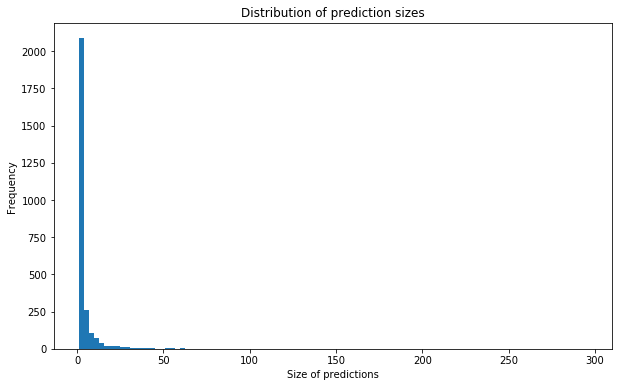

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(bins, bins=100)
axs.set_title('Distribution of prediction sizes')
axs.set_xlabel('Size of predictions')
axs.set_ylabel('Frequency')
fig

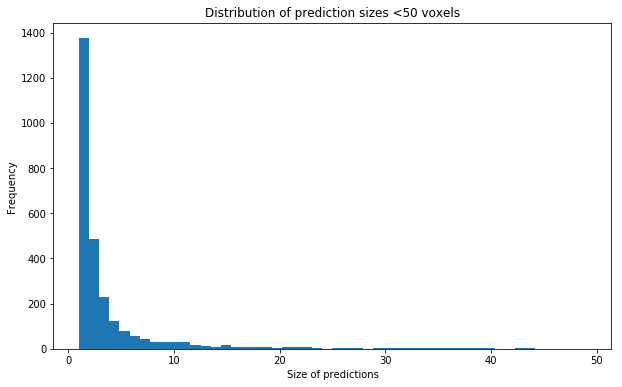

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(bins[bins < 50], bins=50)
axs.set_title('Distribution of prediction sizes <50 voxels')
axs.set_xlabel('Size of predictions')
axs.set_ylabel('Frequency')
fig

### For slicespan=1

In [6]:
bins = np.bincount(predictions_span_1.ravel())[1:]

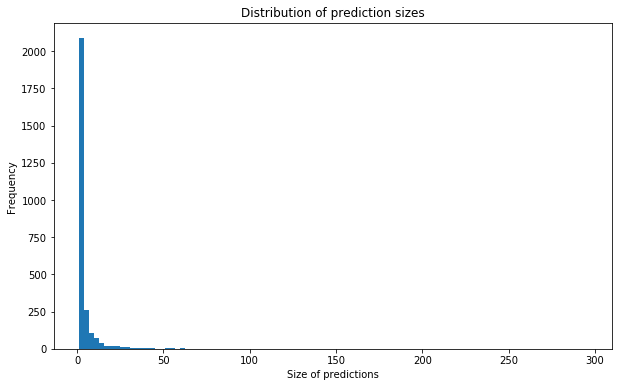

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(bins, bins=100)
axs.set_title('Distribution of prediction sizes')
axs.set_xlabel('Size of predictions')
axs.set_ylabel('Frequency')
fig

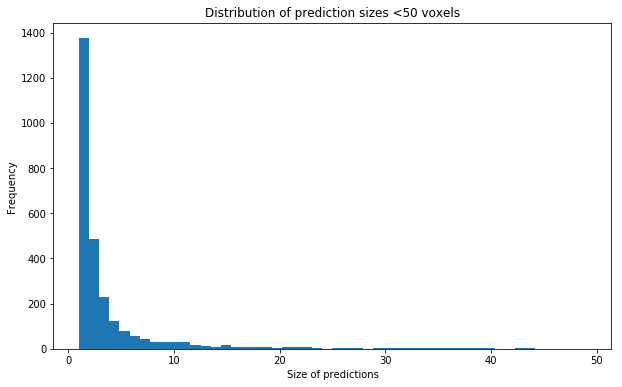

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.hist(bins[bins < 50], bins=50)
axs.set_title('Distribution of prediction sizes <50 voxels')
axs.set_xlabel('Size of predictions')
axs.set_ylabel('Frequency')
fig

## Look at it - predictions overlaid with annotations

* Red = annotations
* Green = predictions

### Slicespan = 2

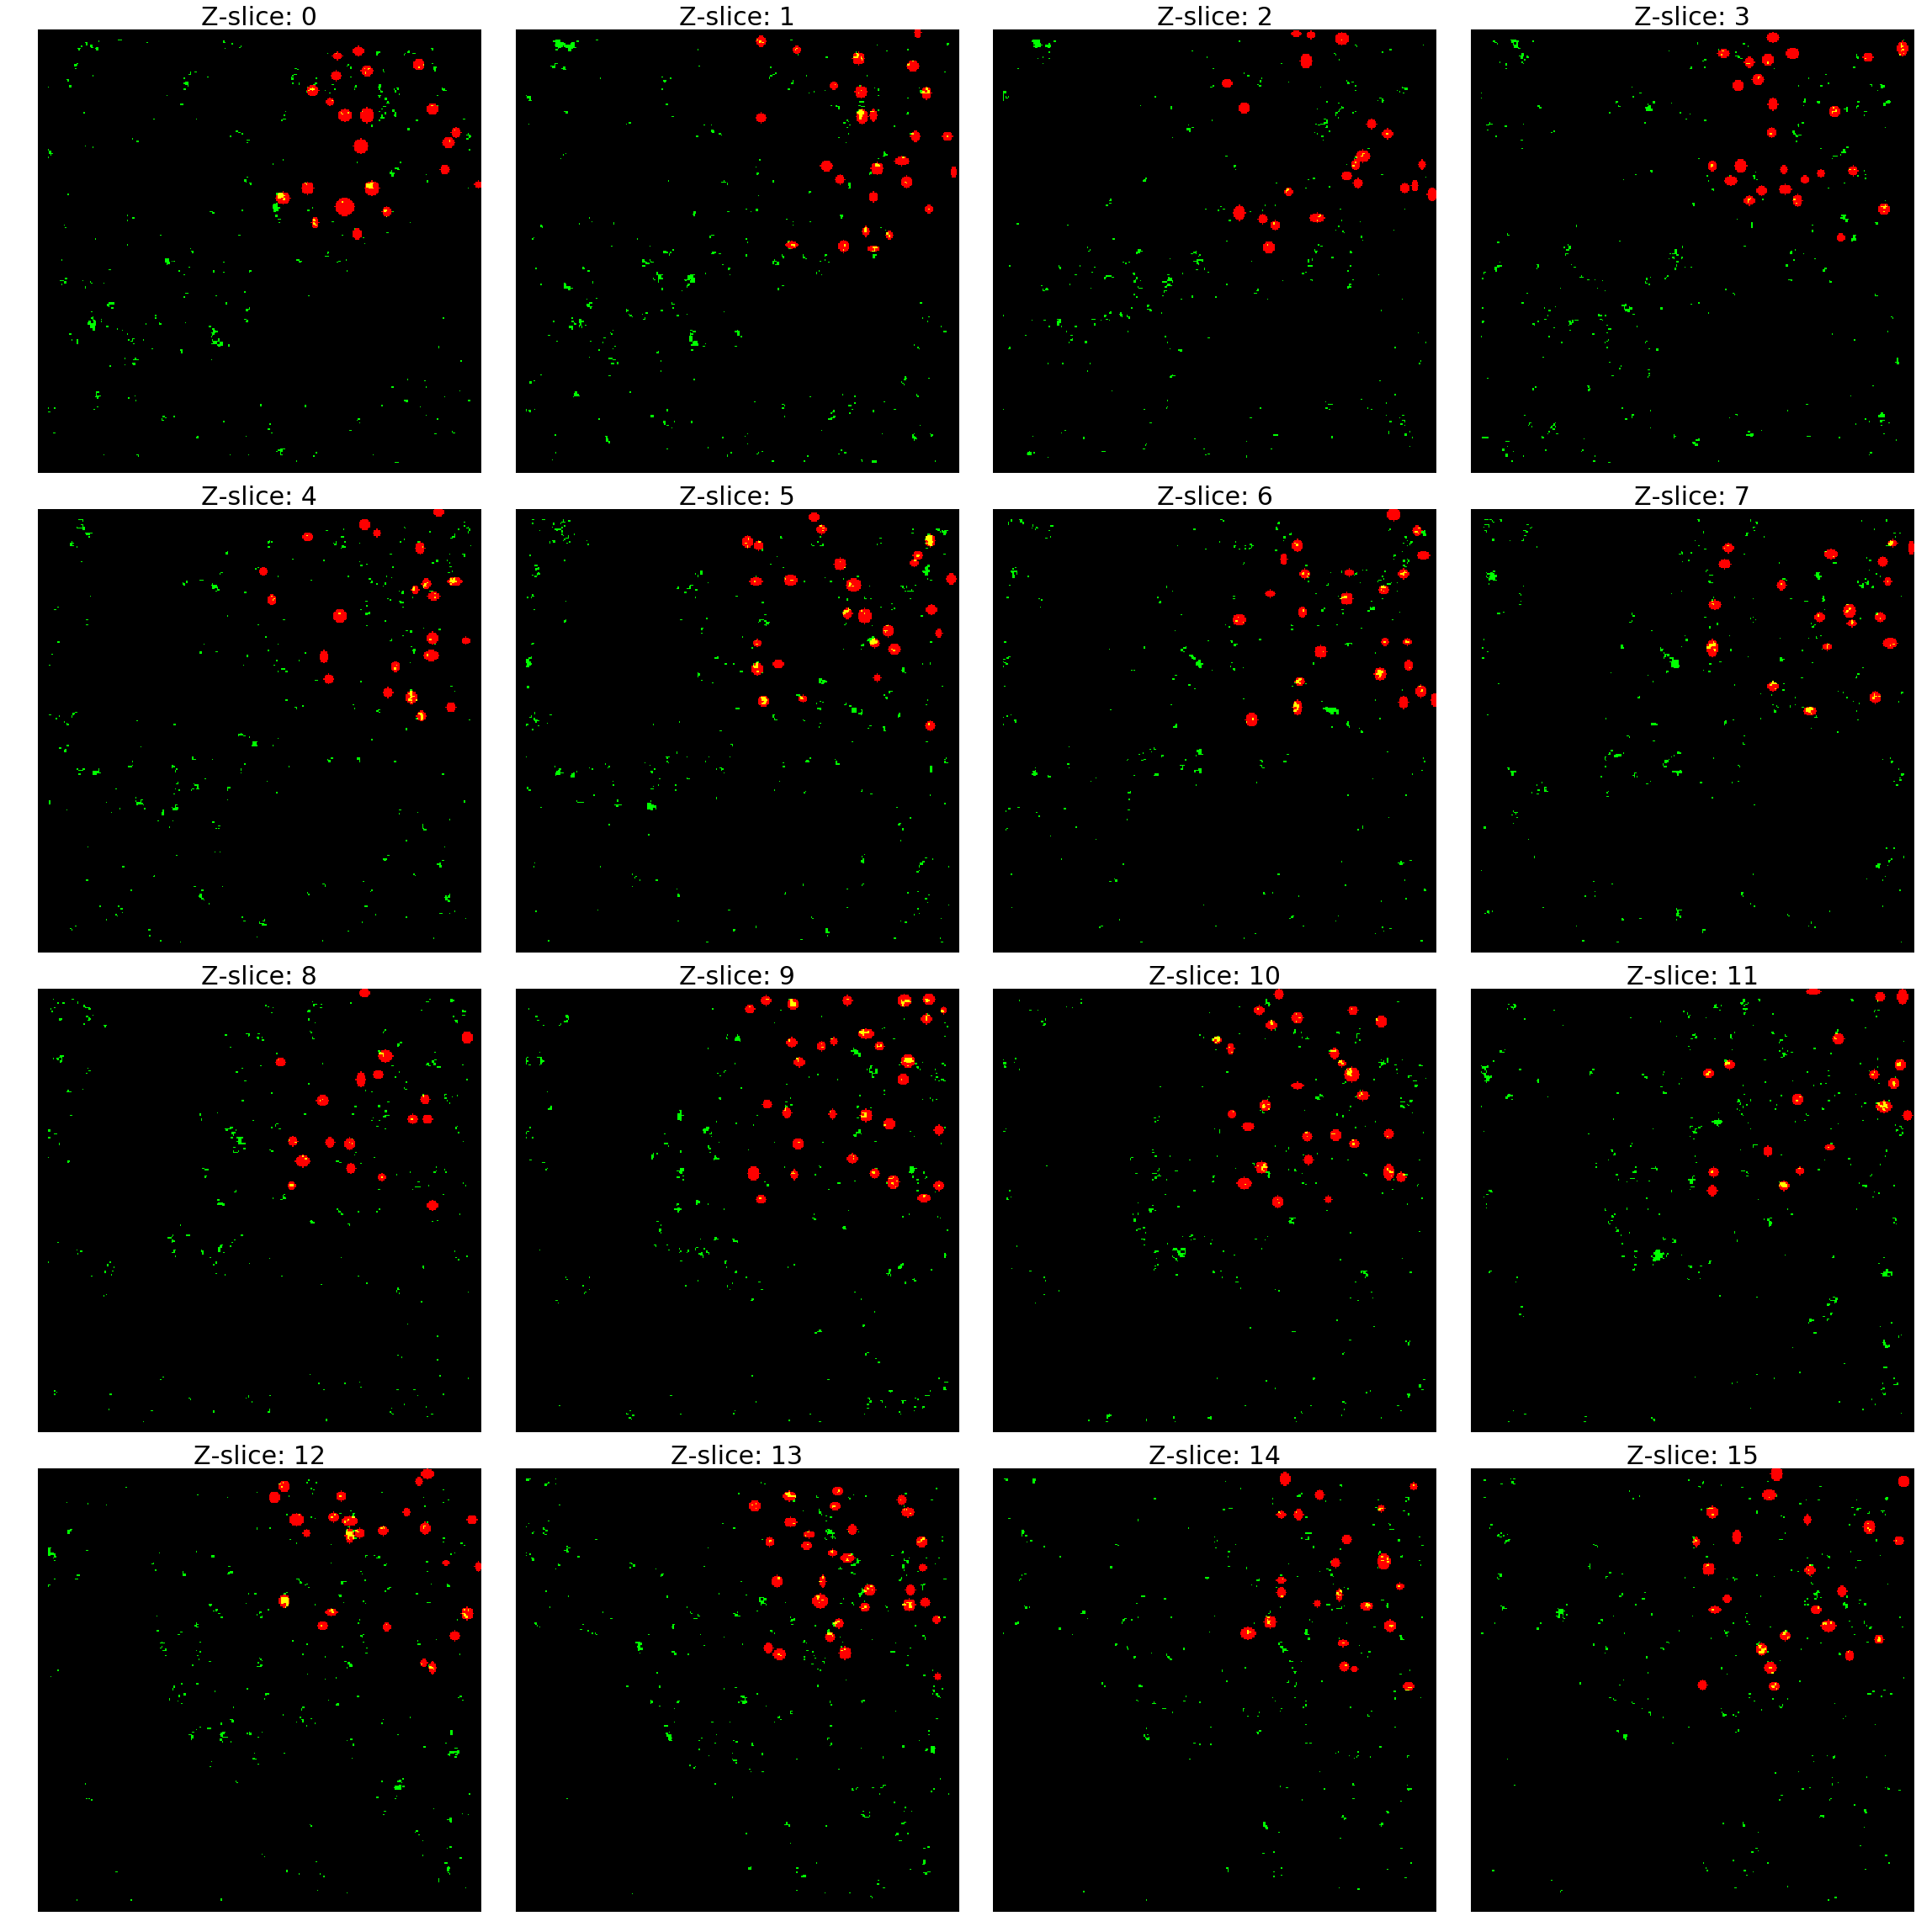

In [8]:
overlay = overlay_images(annotation, predictions_span_2)

fig = plot_volume(overlay)

fig

### For slicespan=1

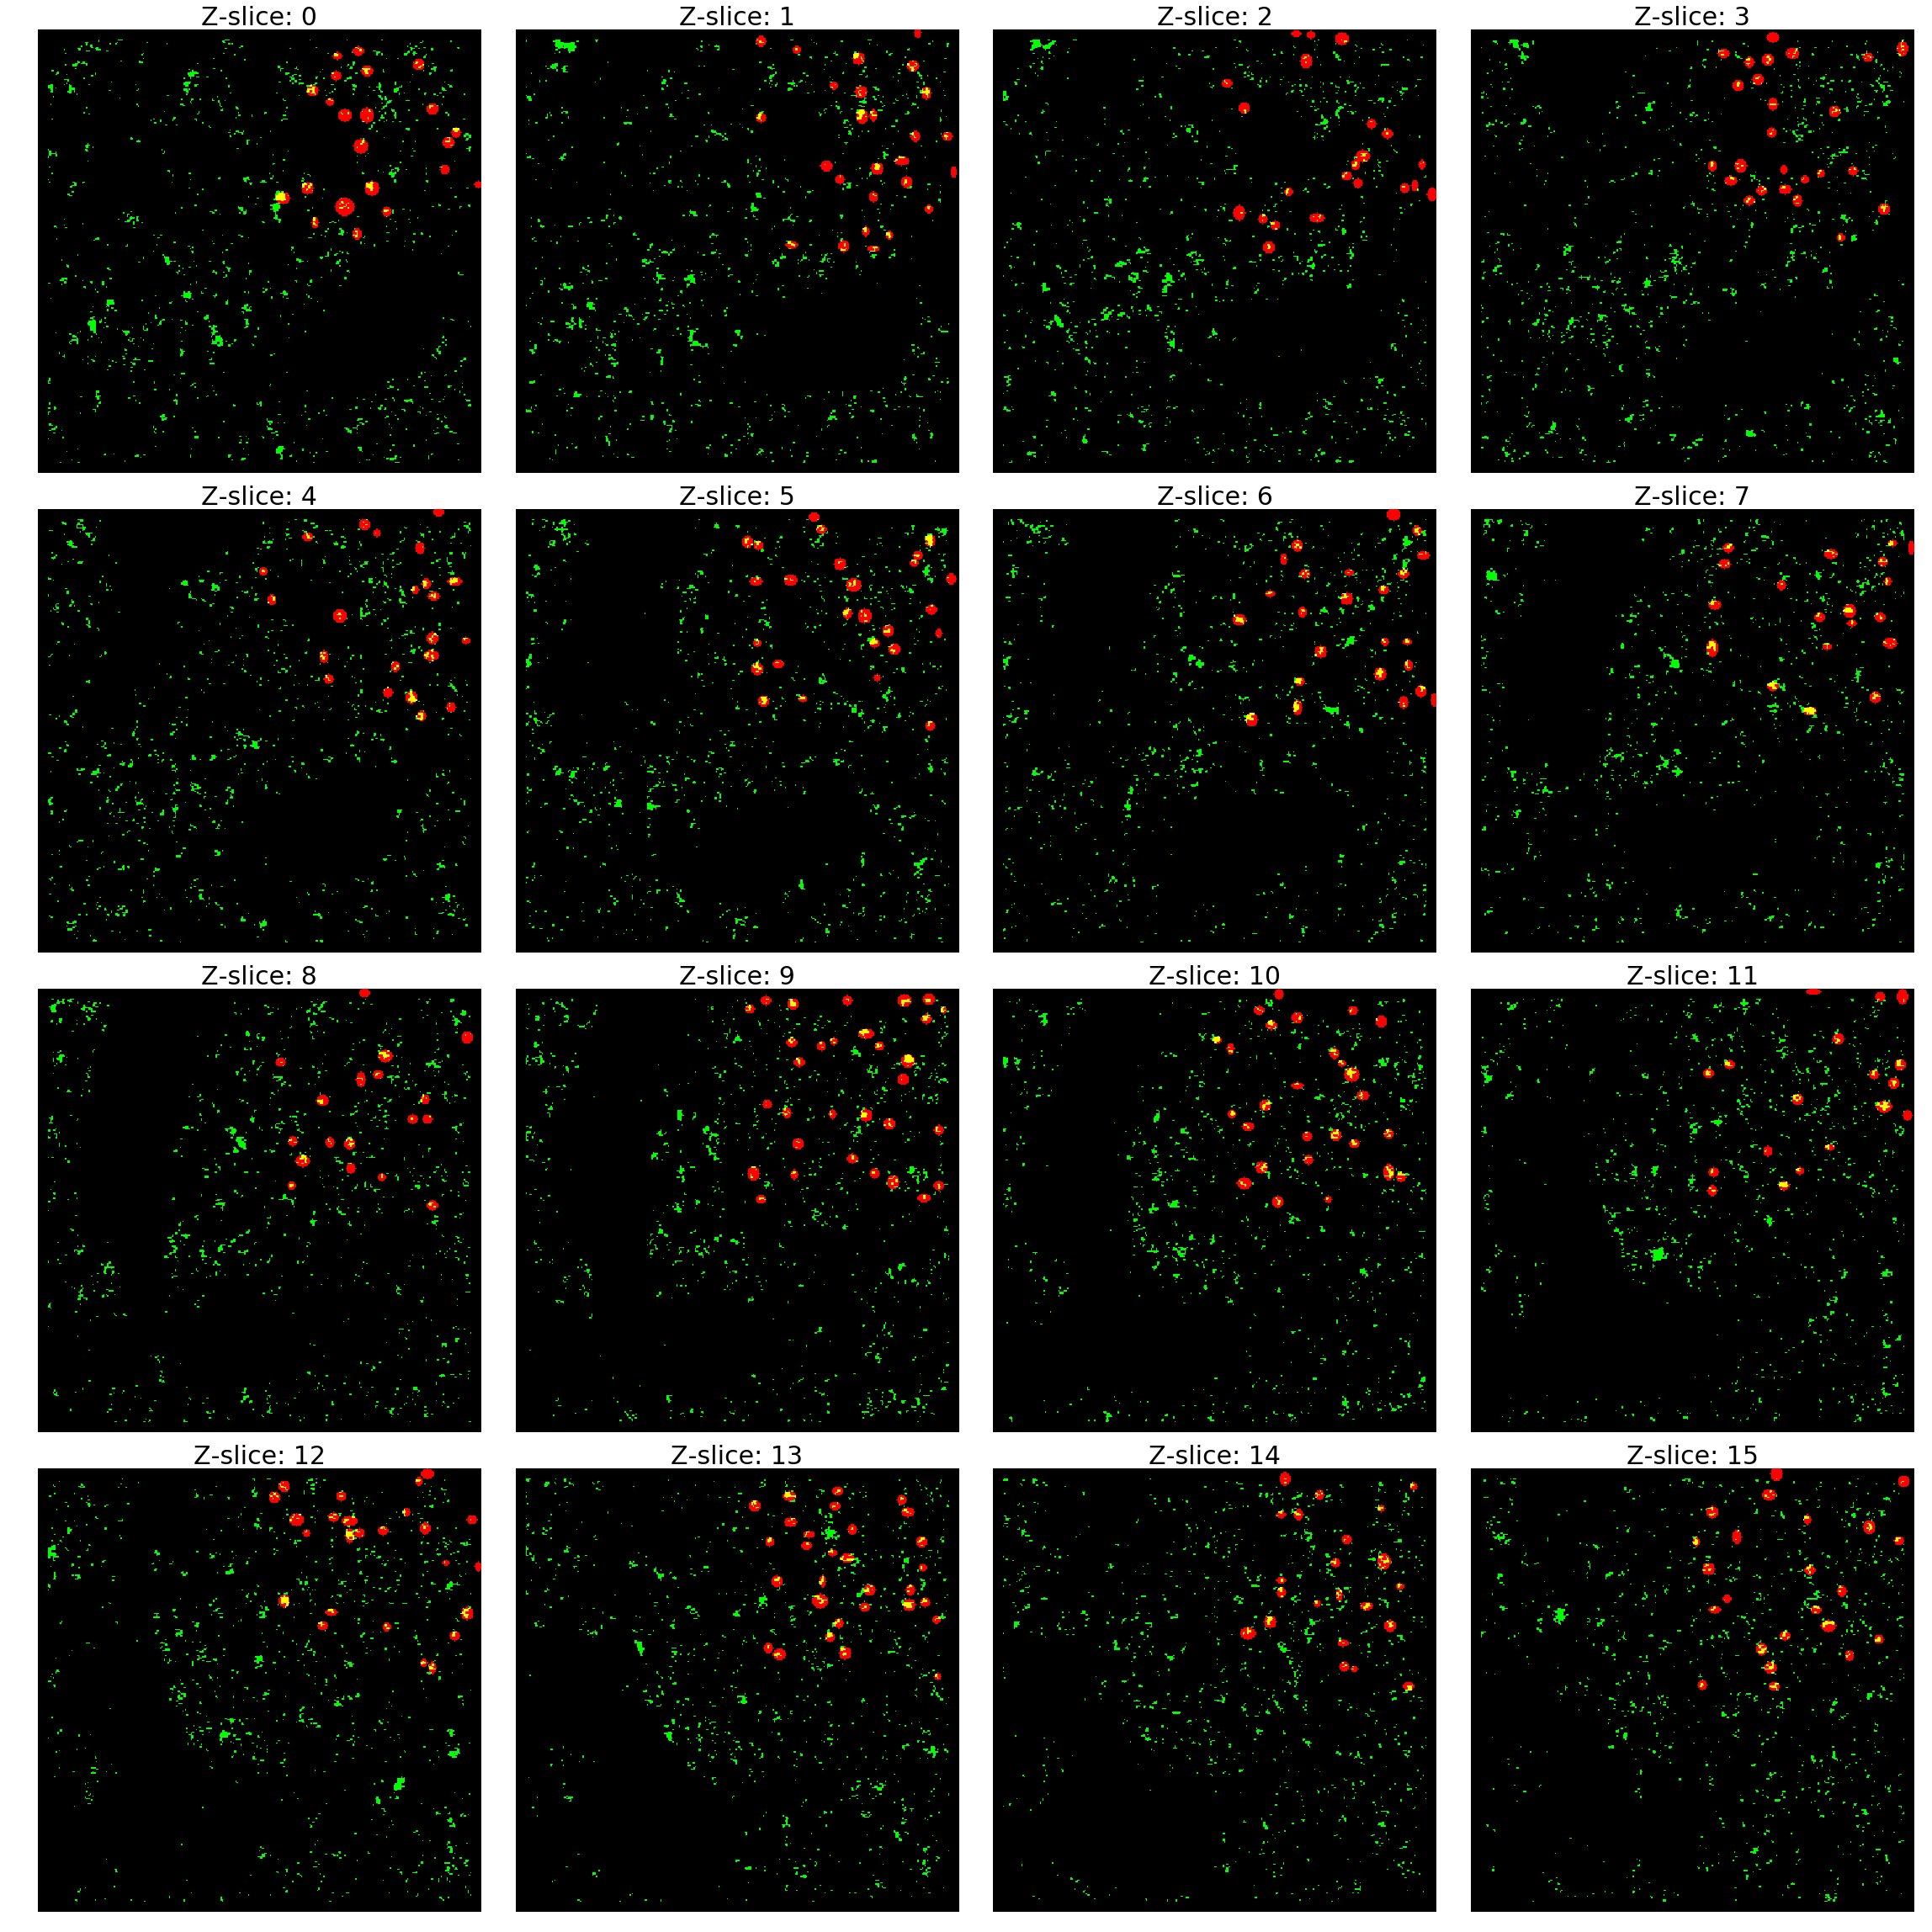

In [9]:
overlay = overlay_images(annotation, predictions_span_1)

fig = plot_volume(overlay)

fig

## Look at it - Remove predictions that are too small

### Slicespan = 2

Remove predictions with sizes less than 20

In [10]:
img_arr = [remove_labels(predictions_span_2, i) for i in range(1, 21)]

See how many predictions are left after removing small things

In [11]:
for idx, img in enumerate(img_arr):
    n = len(np.unique(img.ravel())[1:])
    print('Voxel size: {}\t Number of predictions: {}'.format(idx+1, n))

Voxel size: 1	 Number of predictions: 1337
Voxel size: 2	 Number of predictions: 853
Voxel size: 3	 Number of predictions: 624
Voxel size: 4	 Number of predictions: 502
Voxel size: 5	 Number of predictions: 422
Voxel size: 6	 Number of predictions: 366
Voxel size: 7	 Number of predictions: 322
Voxel size: 8	 Number of predictions: 290
Voxel size: 9	 Number of predictions: 259
Voxel size: 10	 Number of predictions: 230
Voxel size: 11	 Number of predictions: 200
Voxel size: 12	 Number of predictions: 185
Voxel size: 13	 Number of predictions: 174
Voxel size: 14	 Number of predictions: 164
Voxel size: 15	 Number of predictions: 147
Voxel size: 16	 Number of predictions: 140
Voxel size: 17	 Number of predictions: 133
Voxel size: 18	 Number of predictions: 125
Voxel size: 19	 Number of predictions: 117
Voxel size: 20	 Number of predictions: 112


Plot overlay images

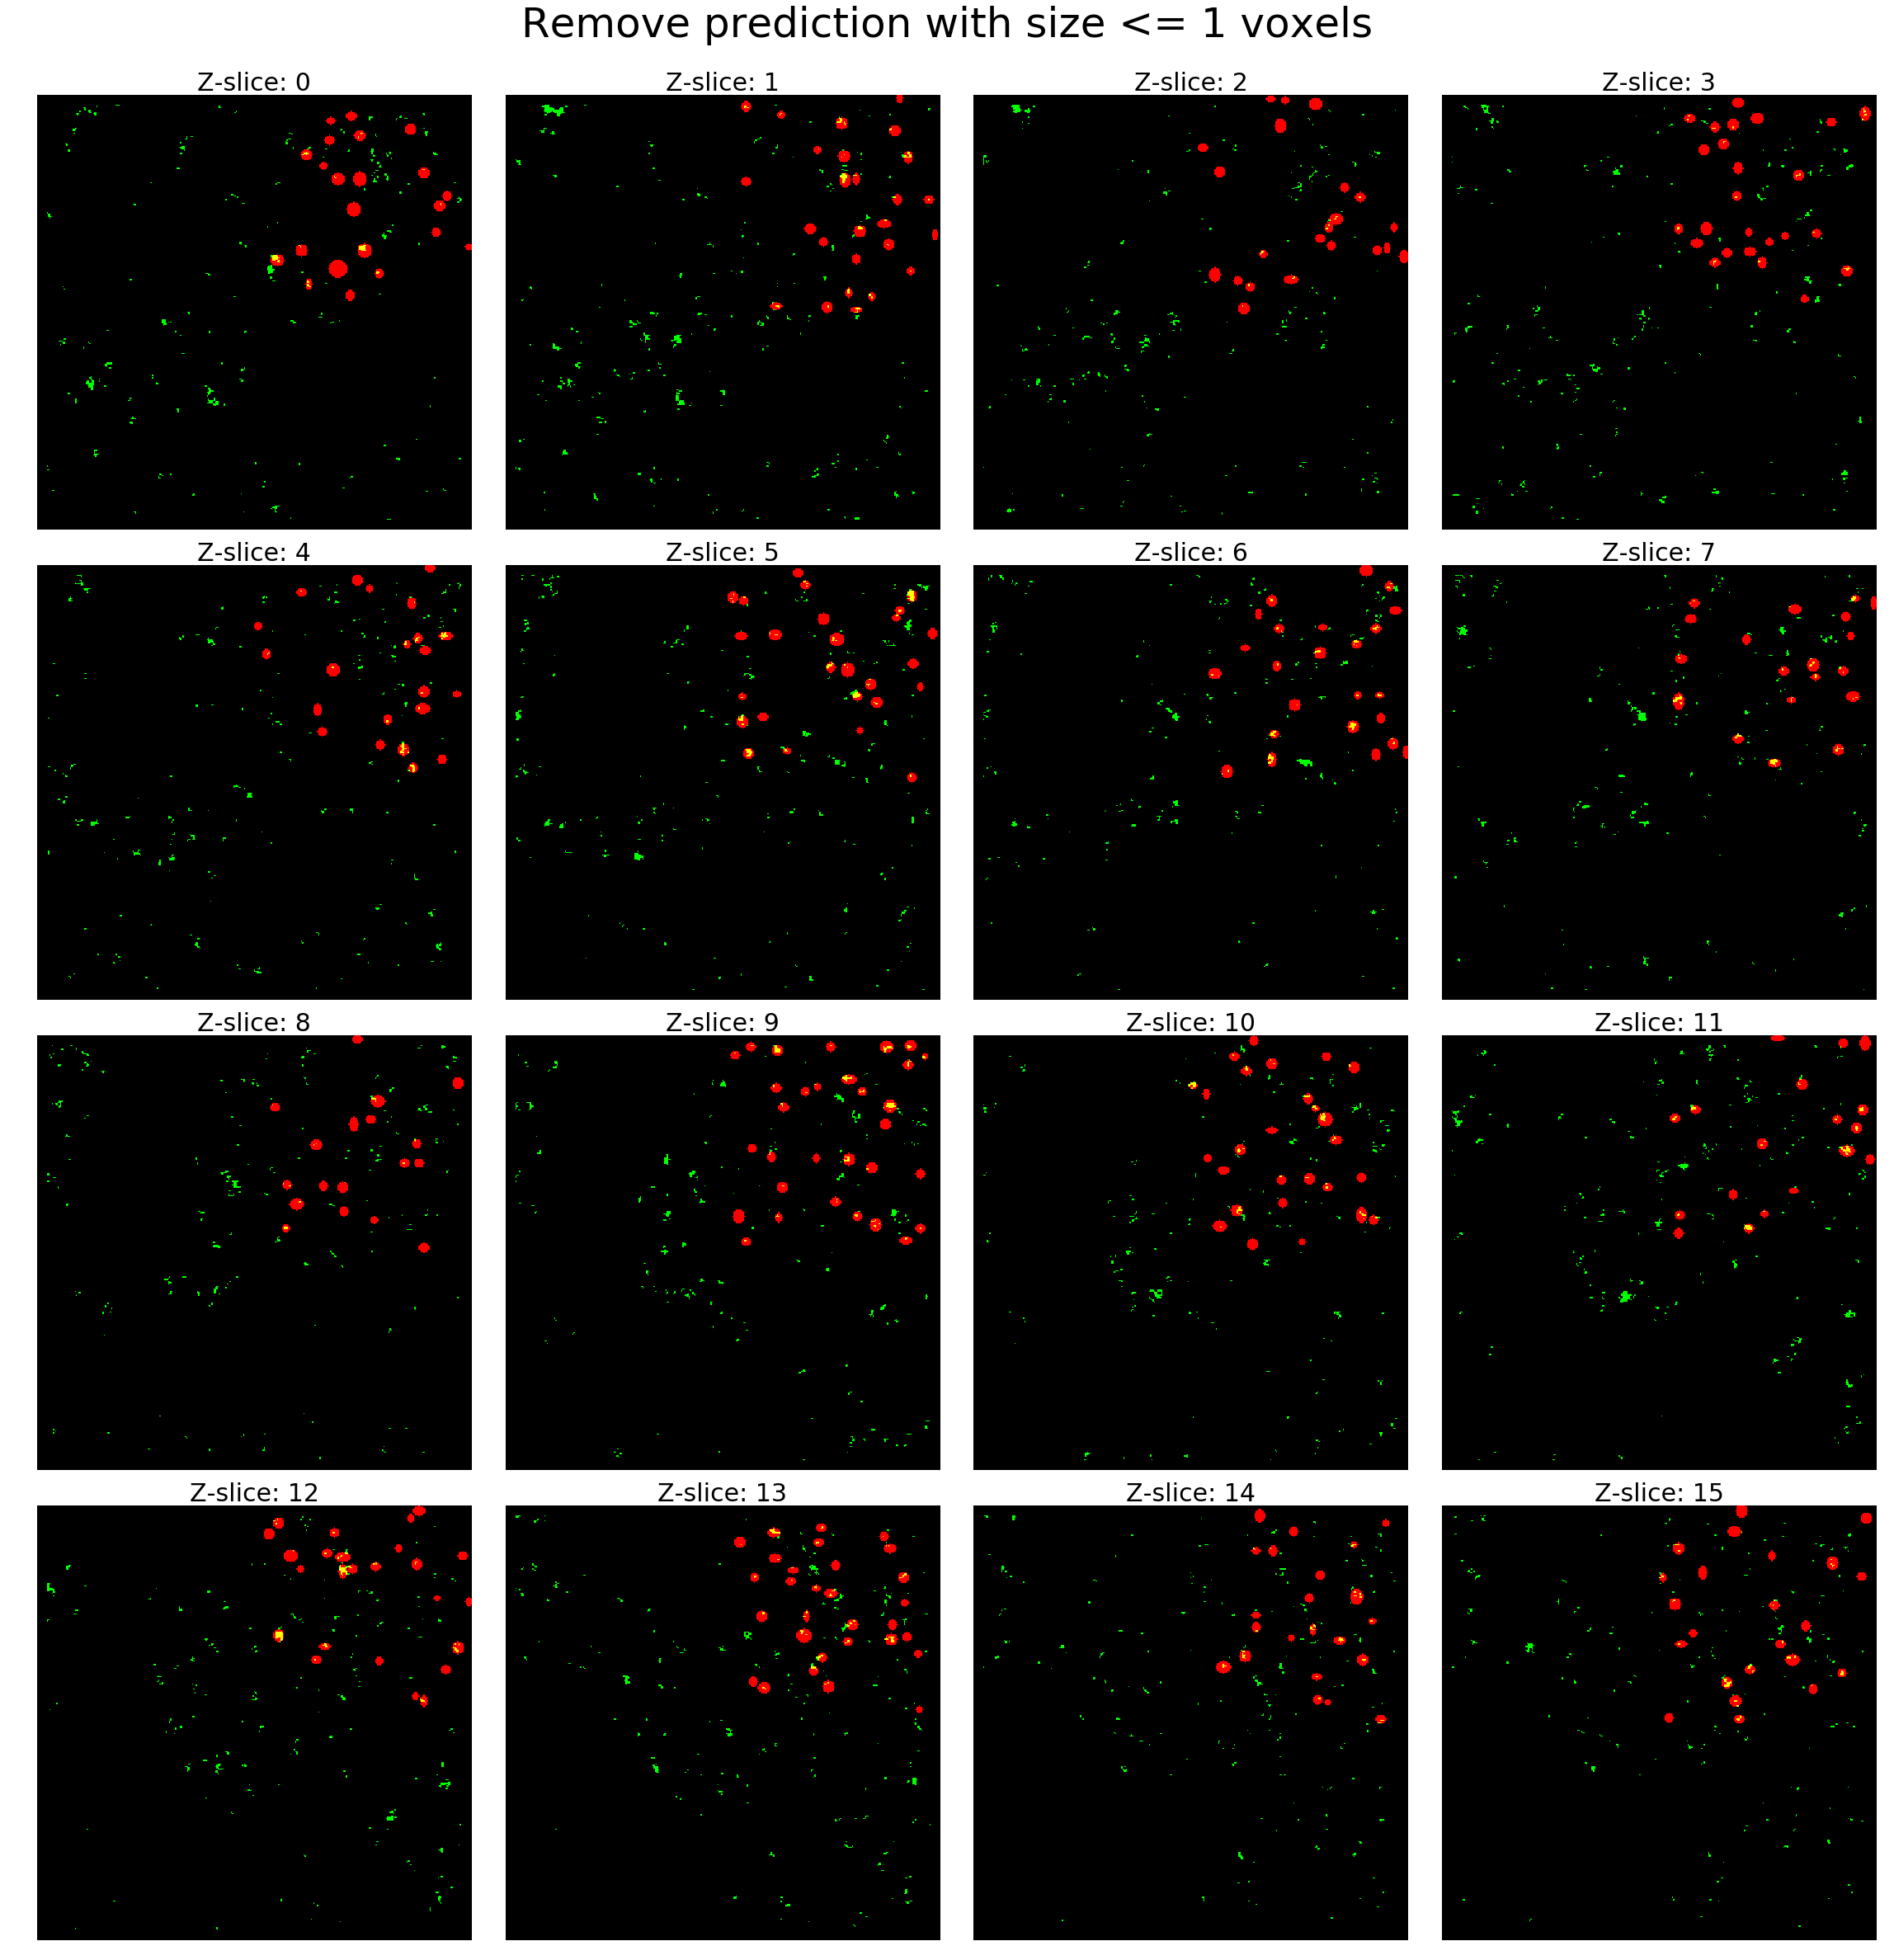

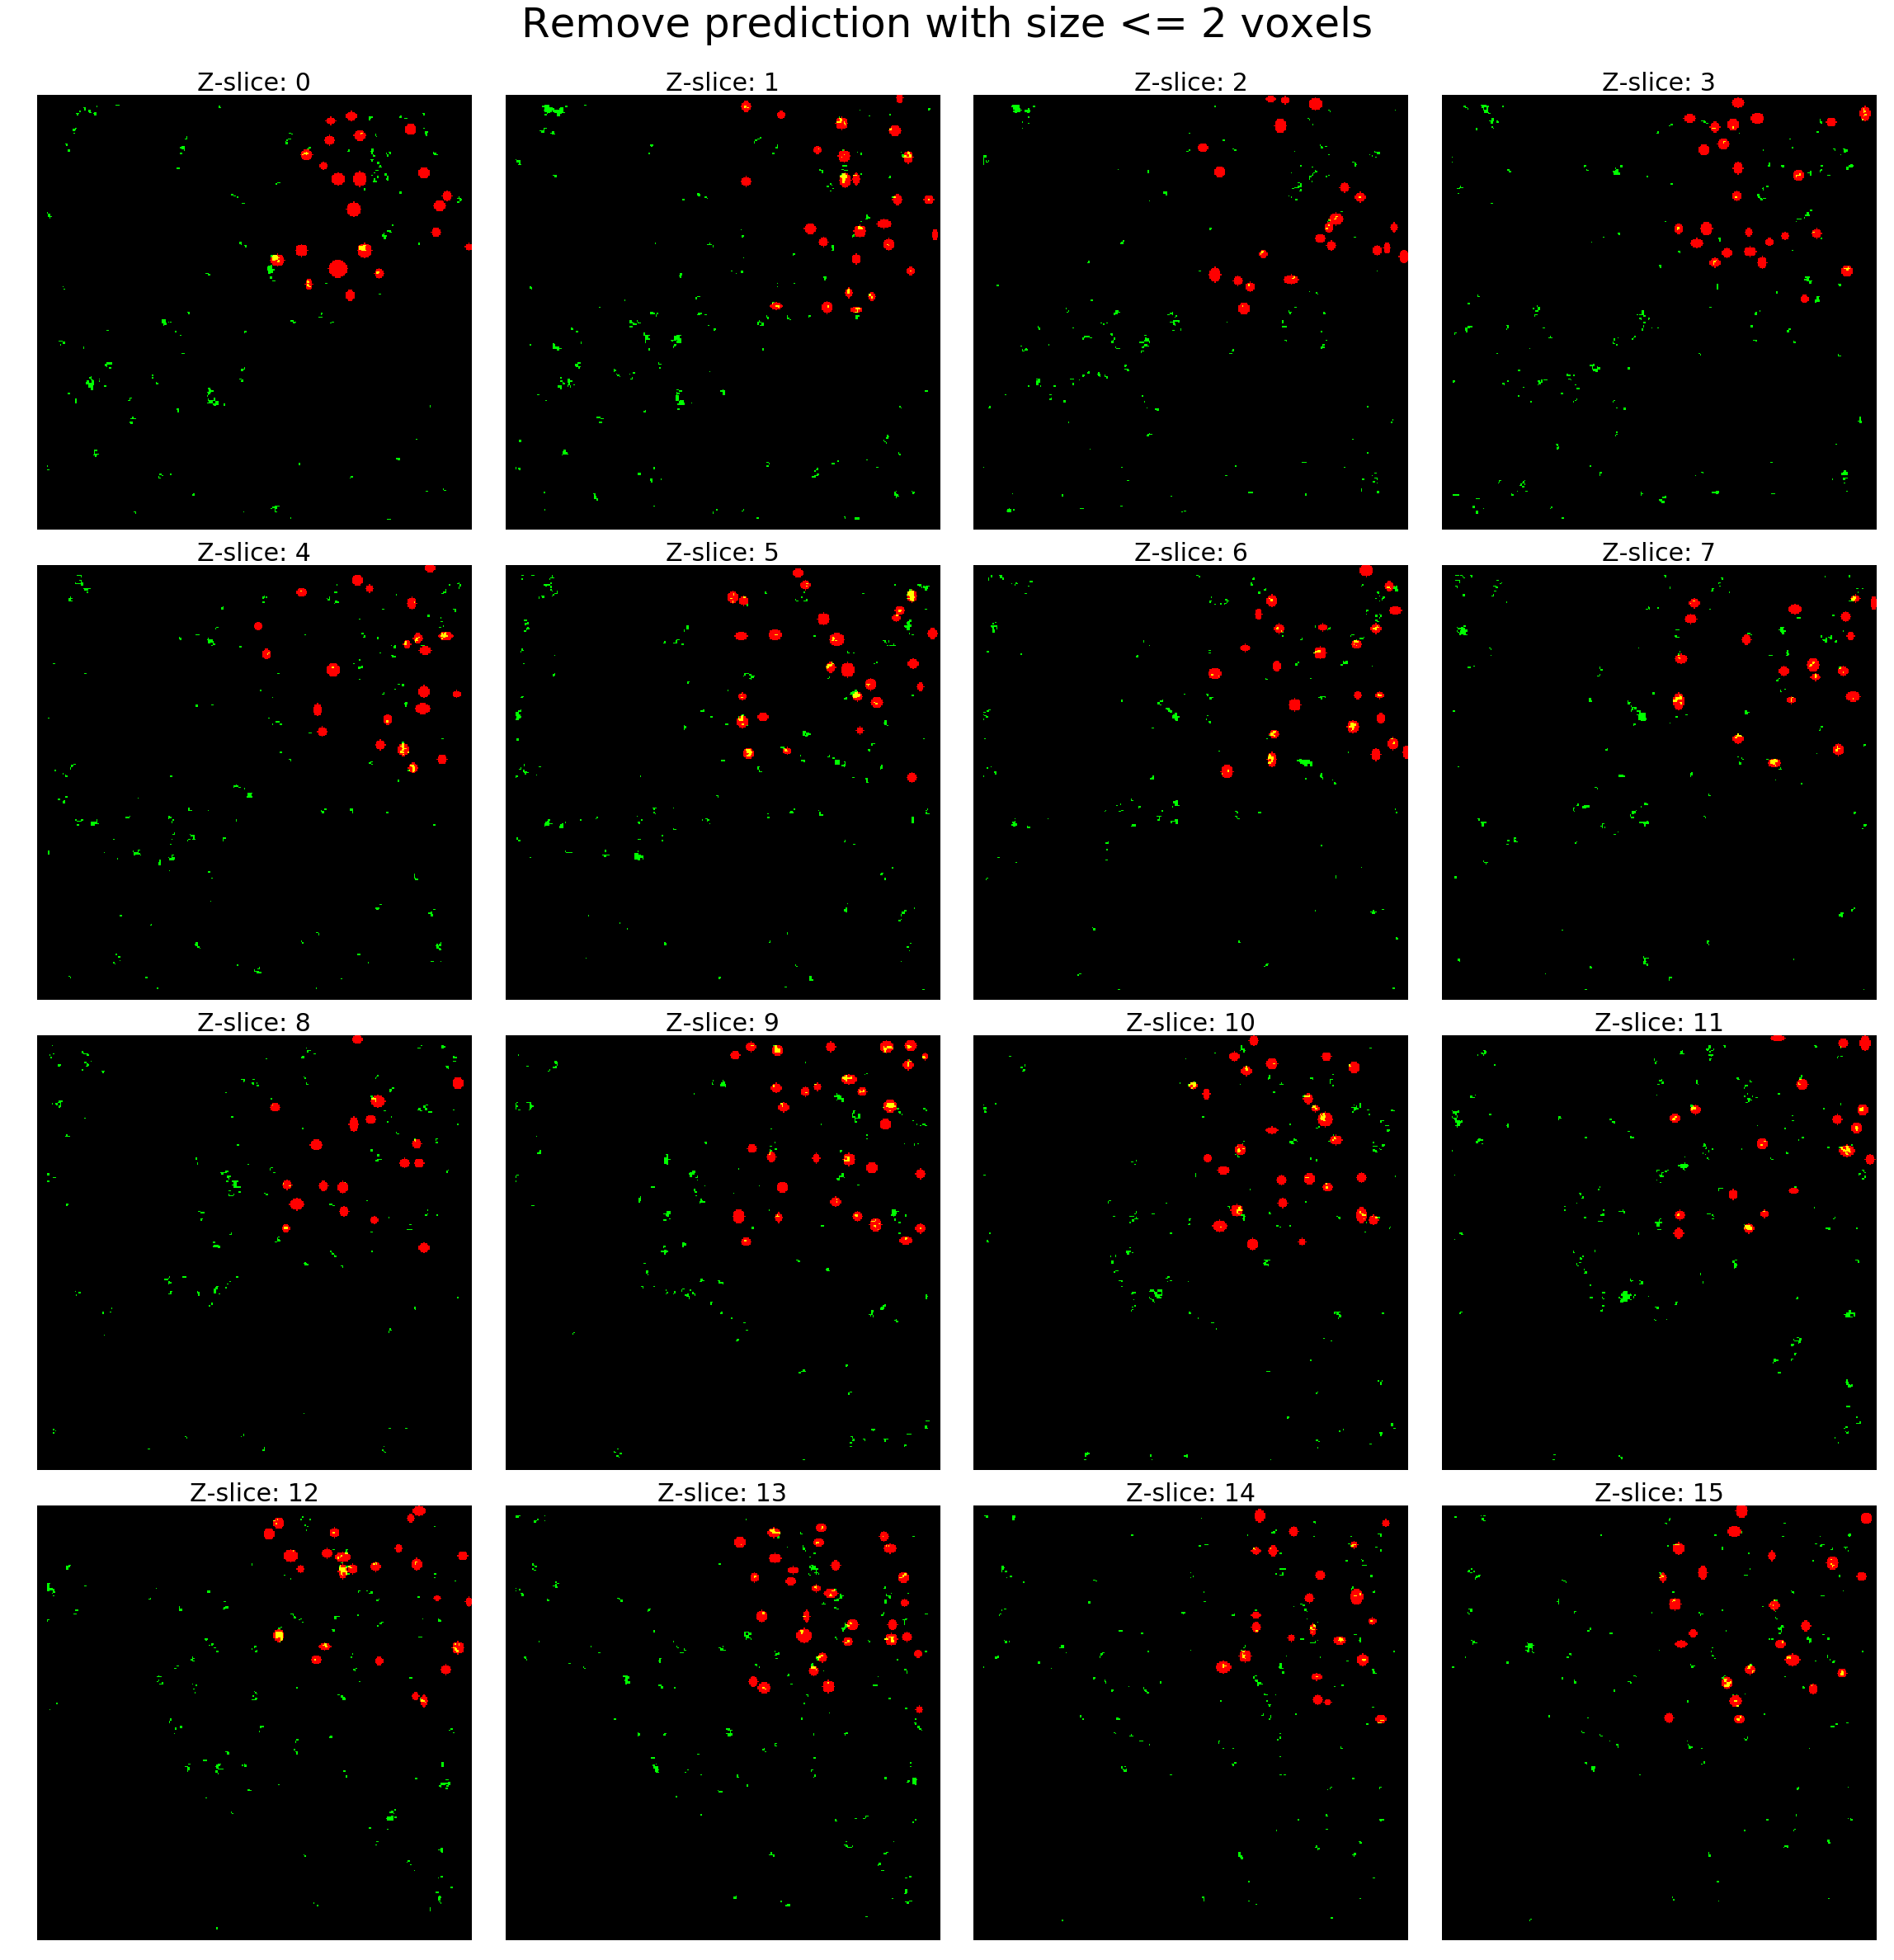

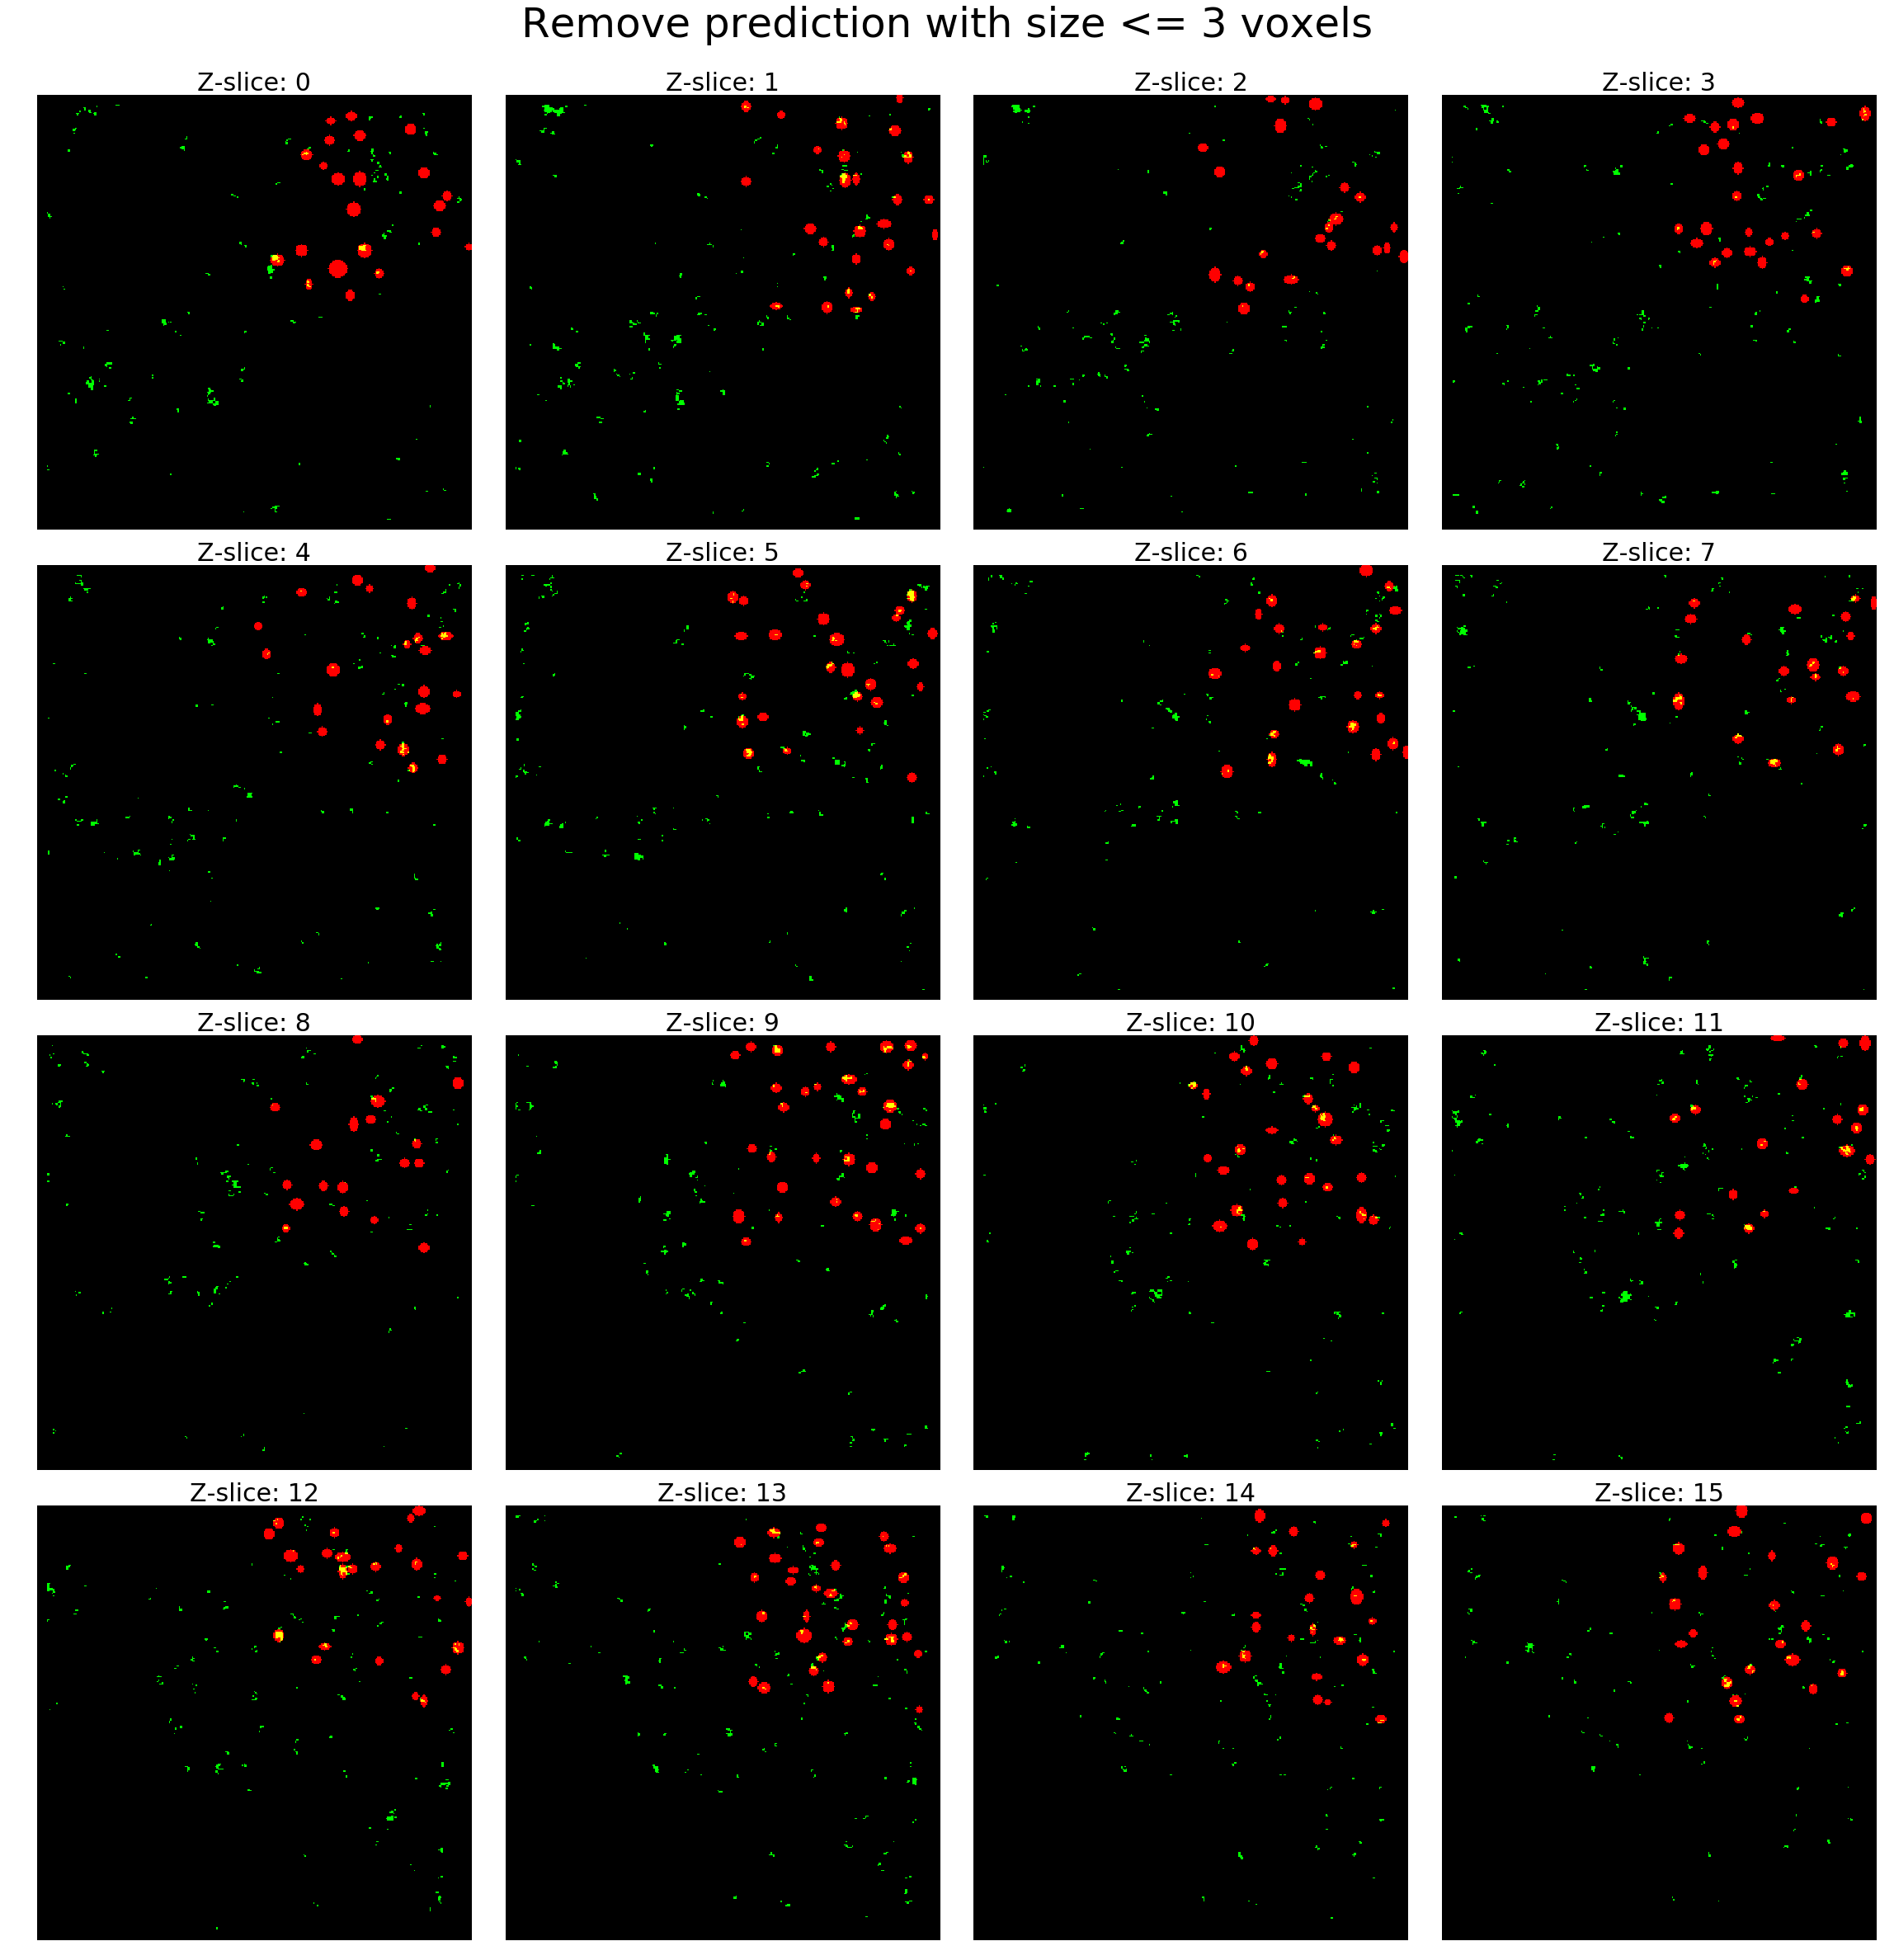

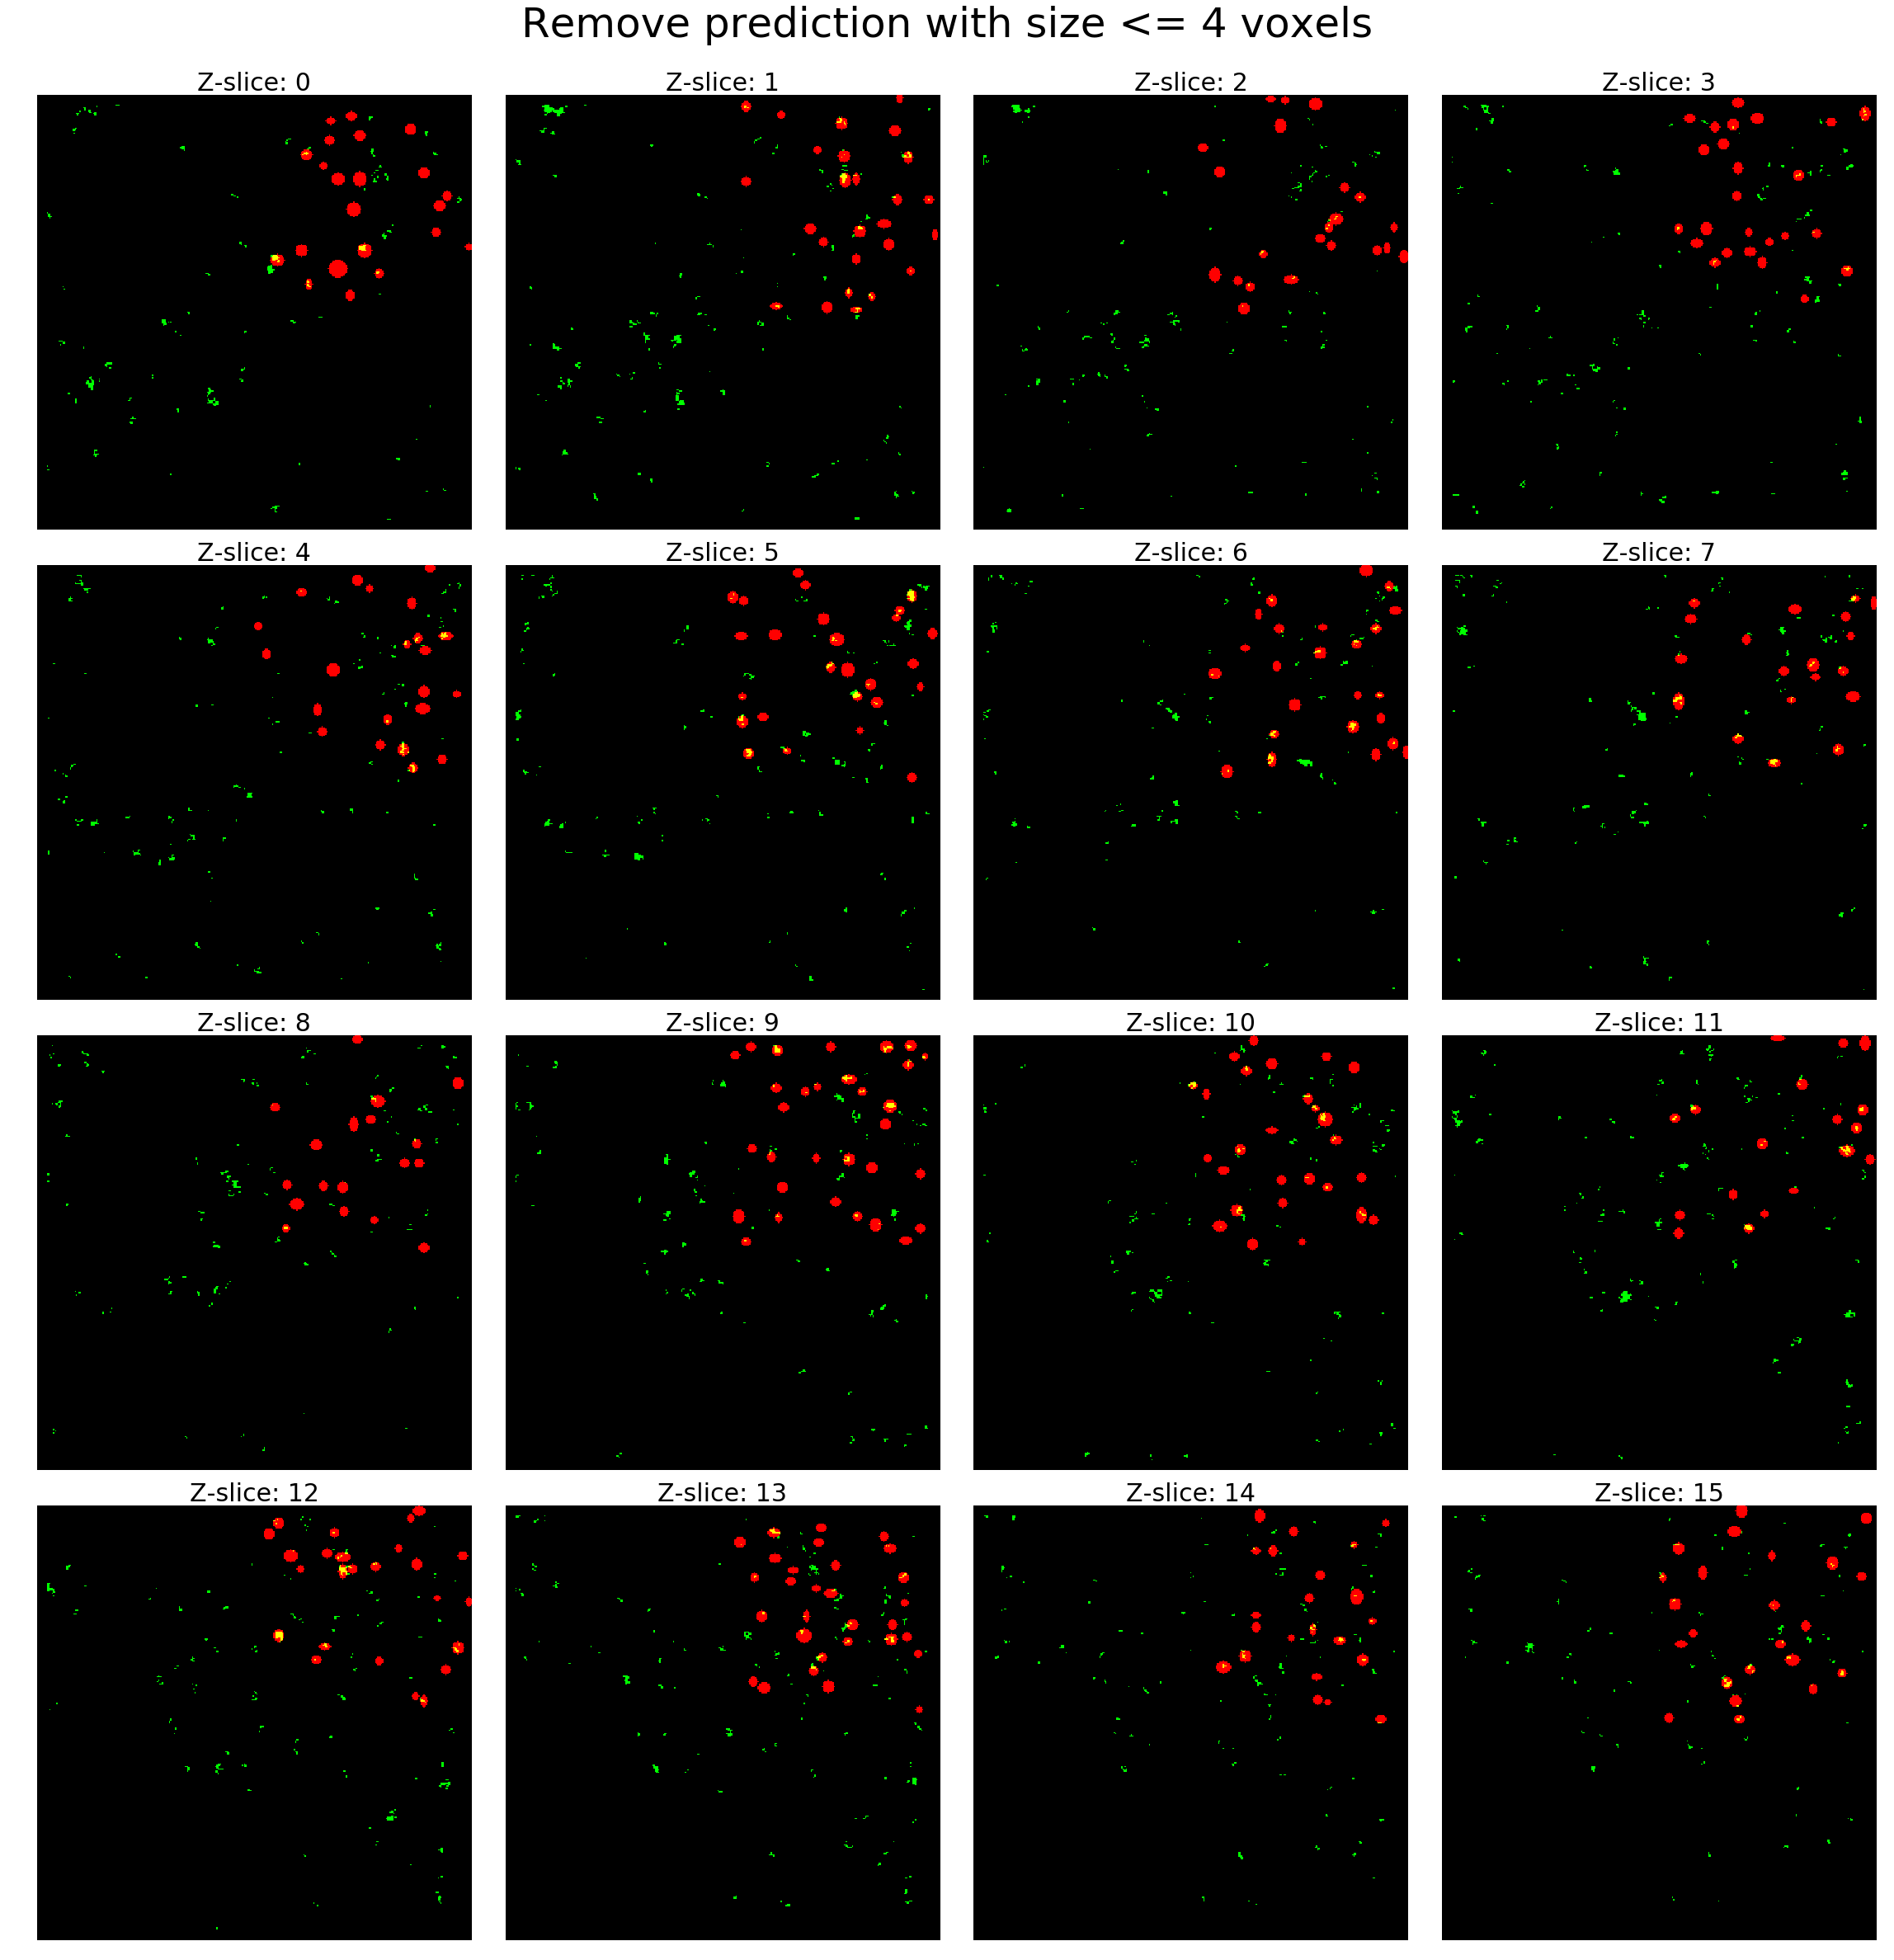

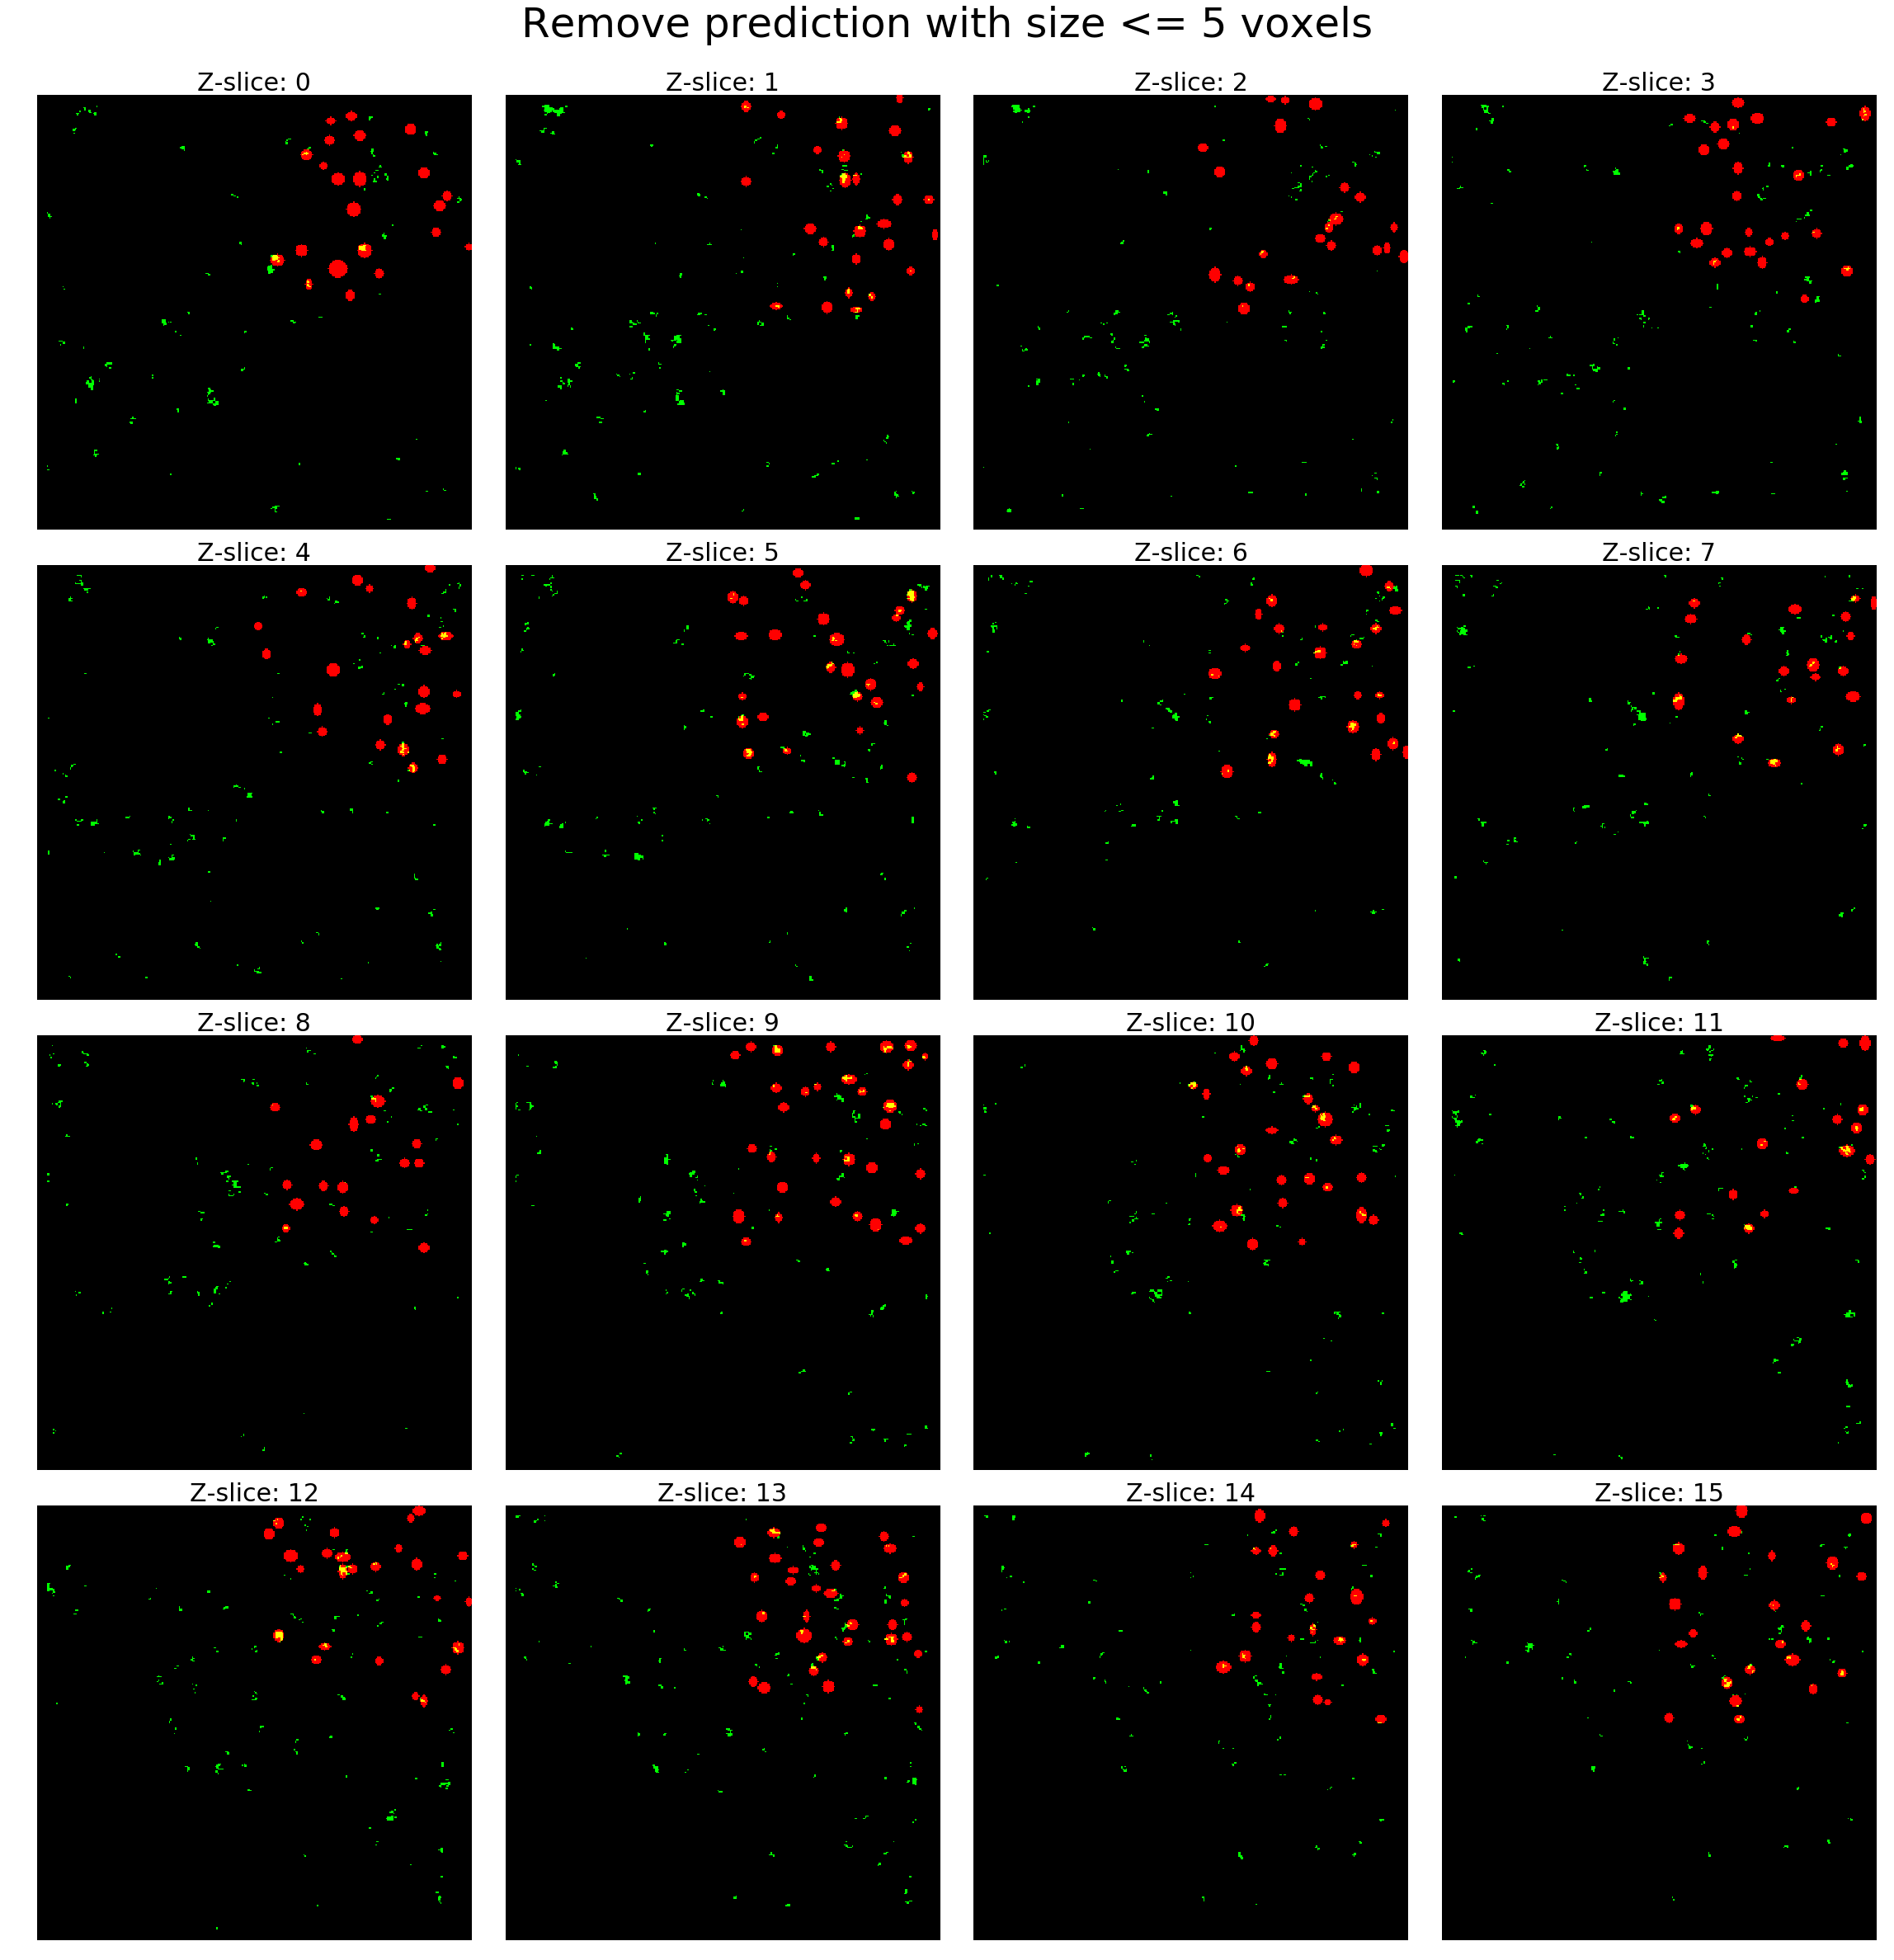

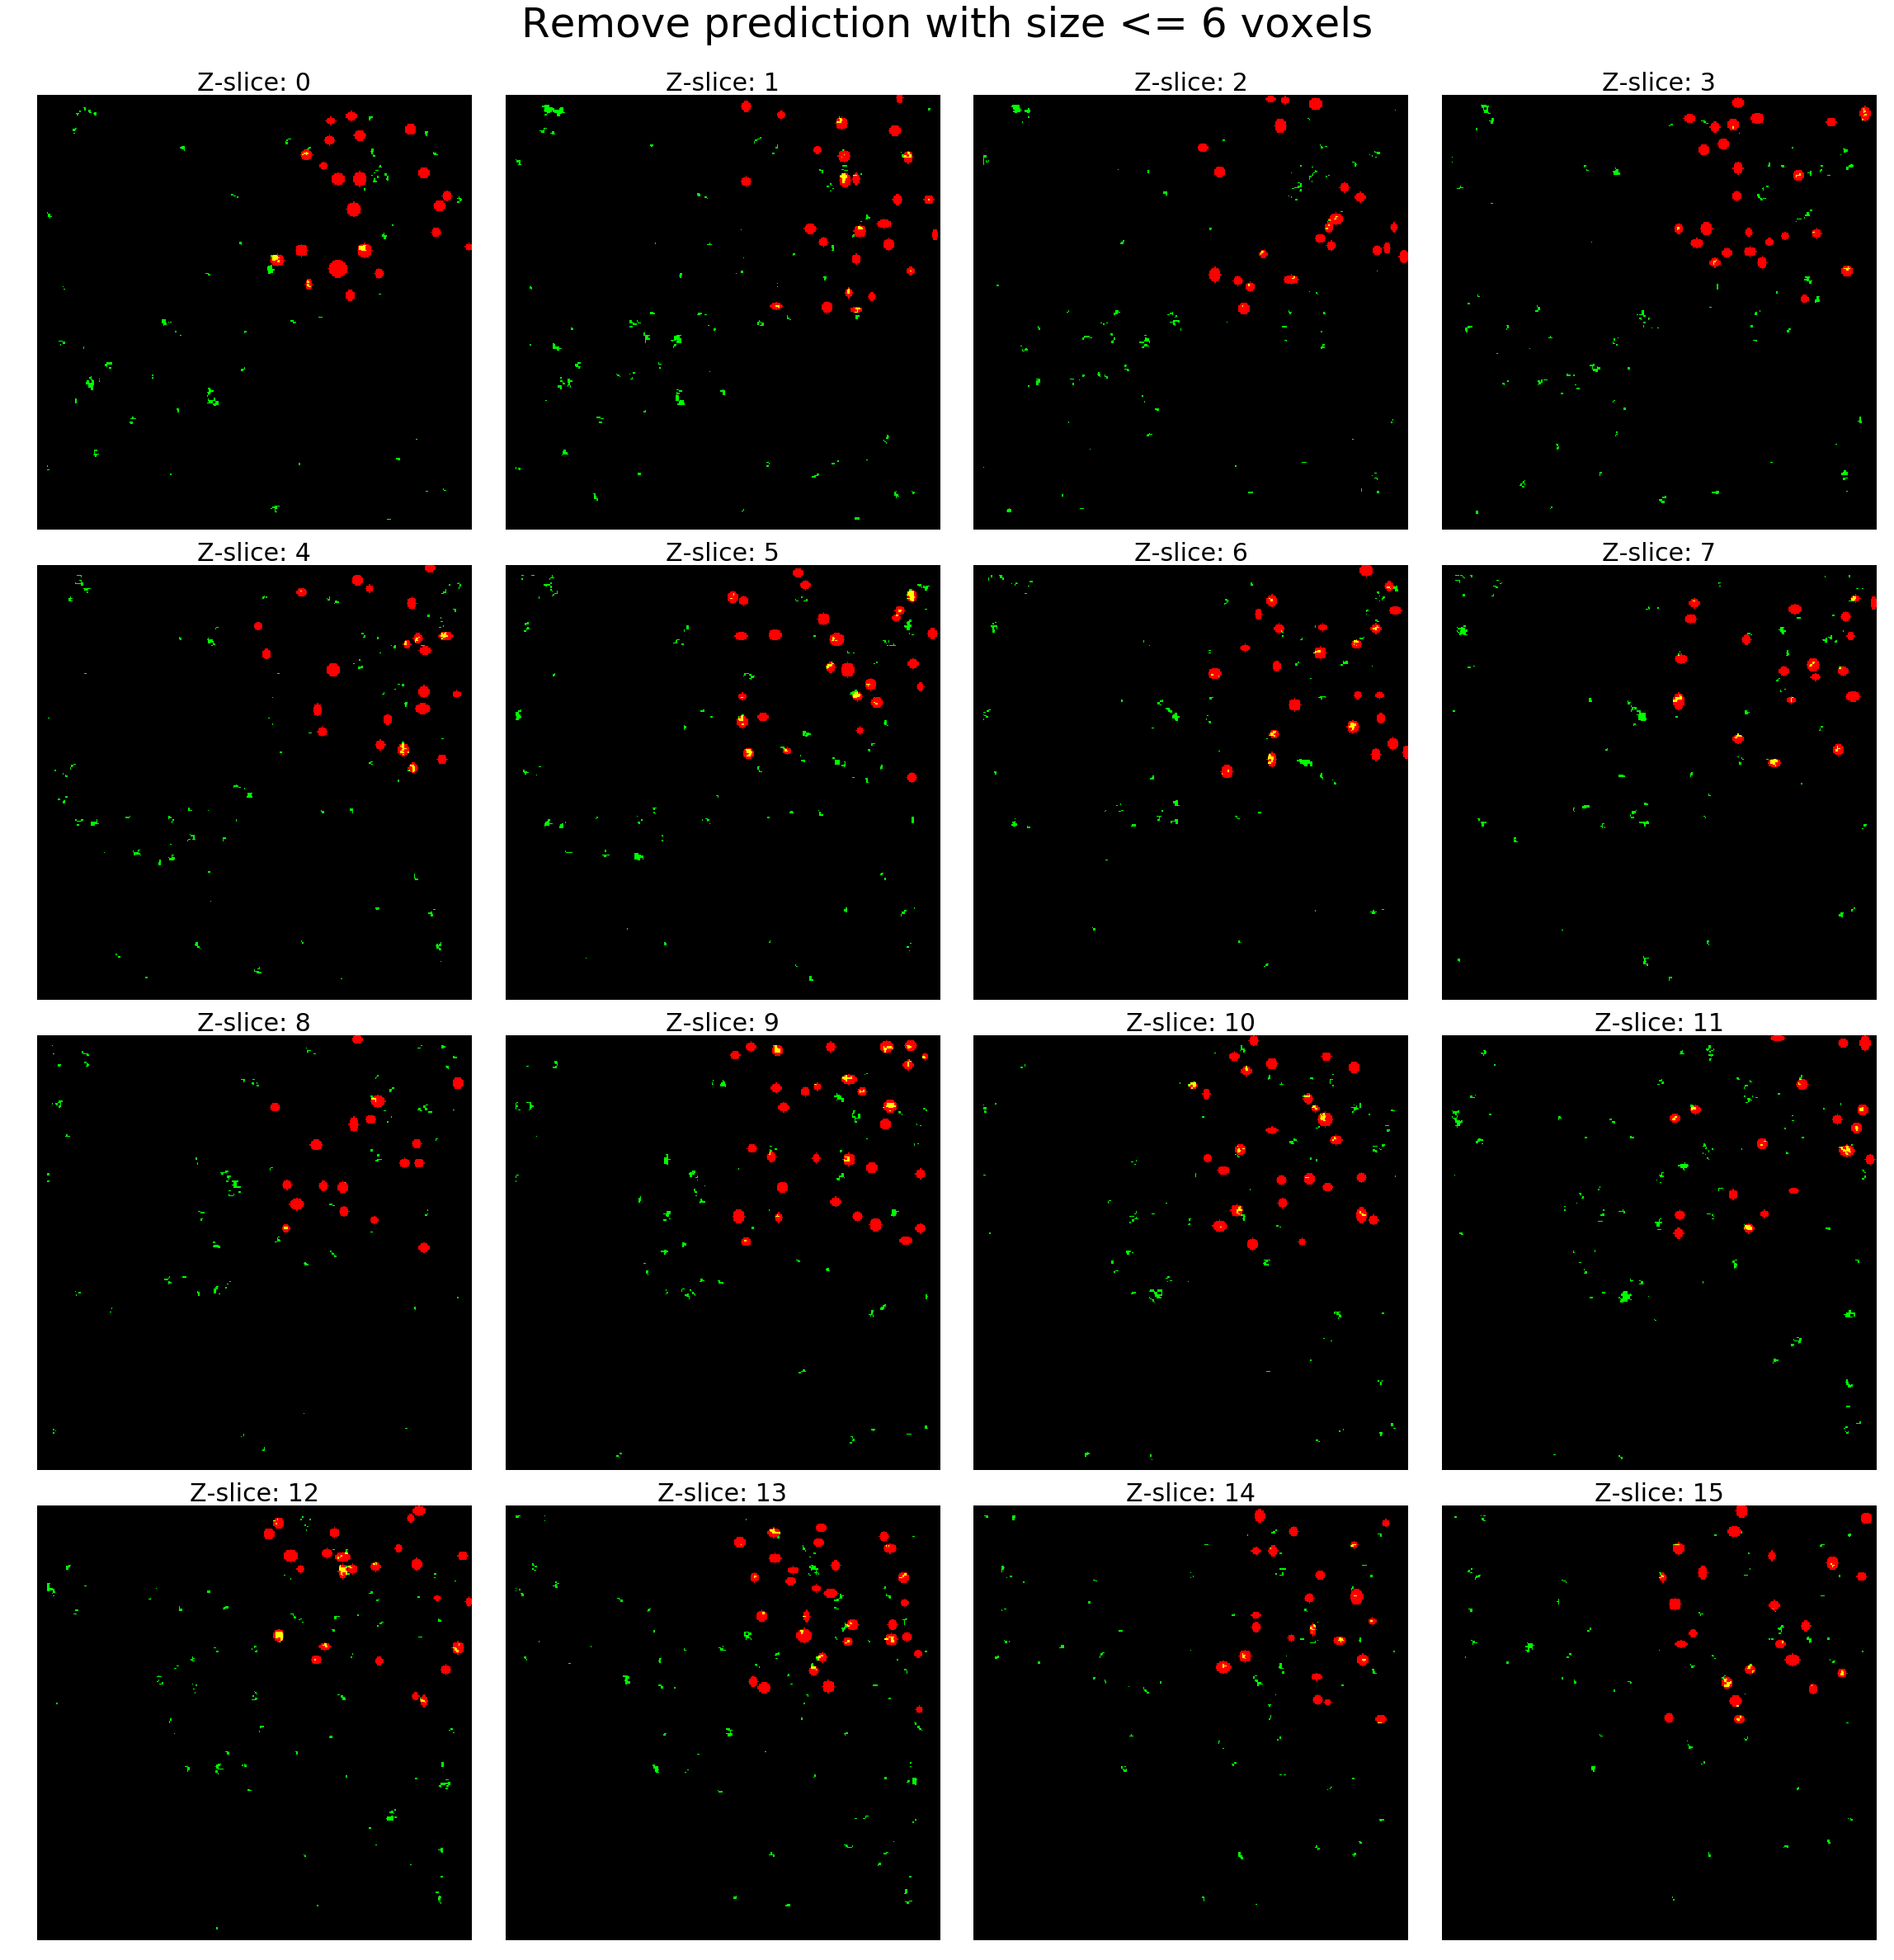

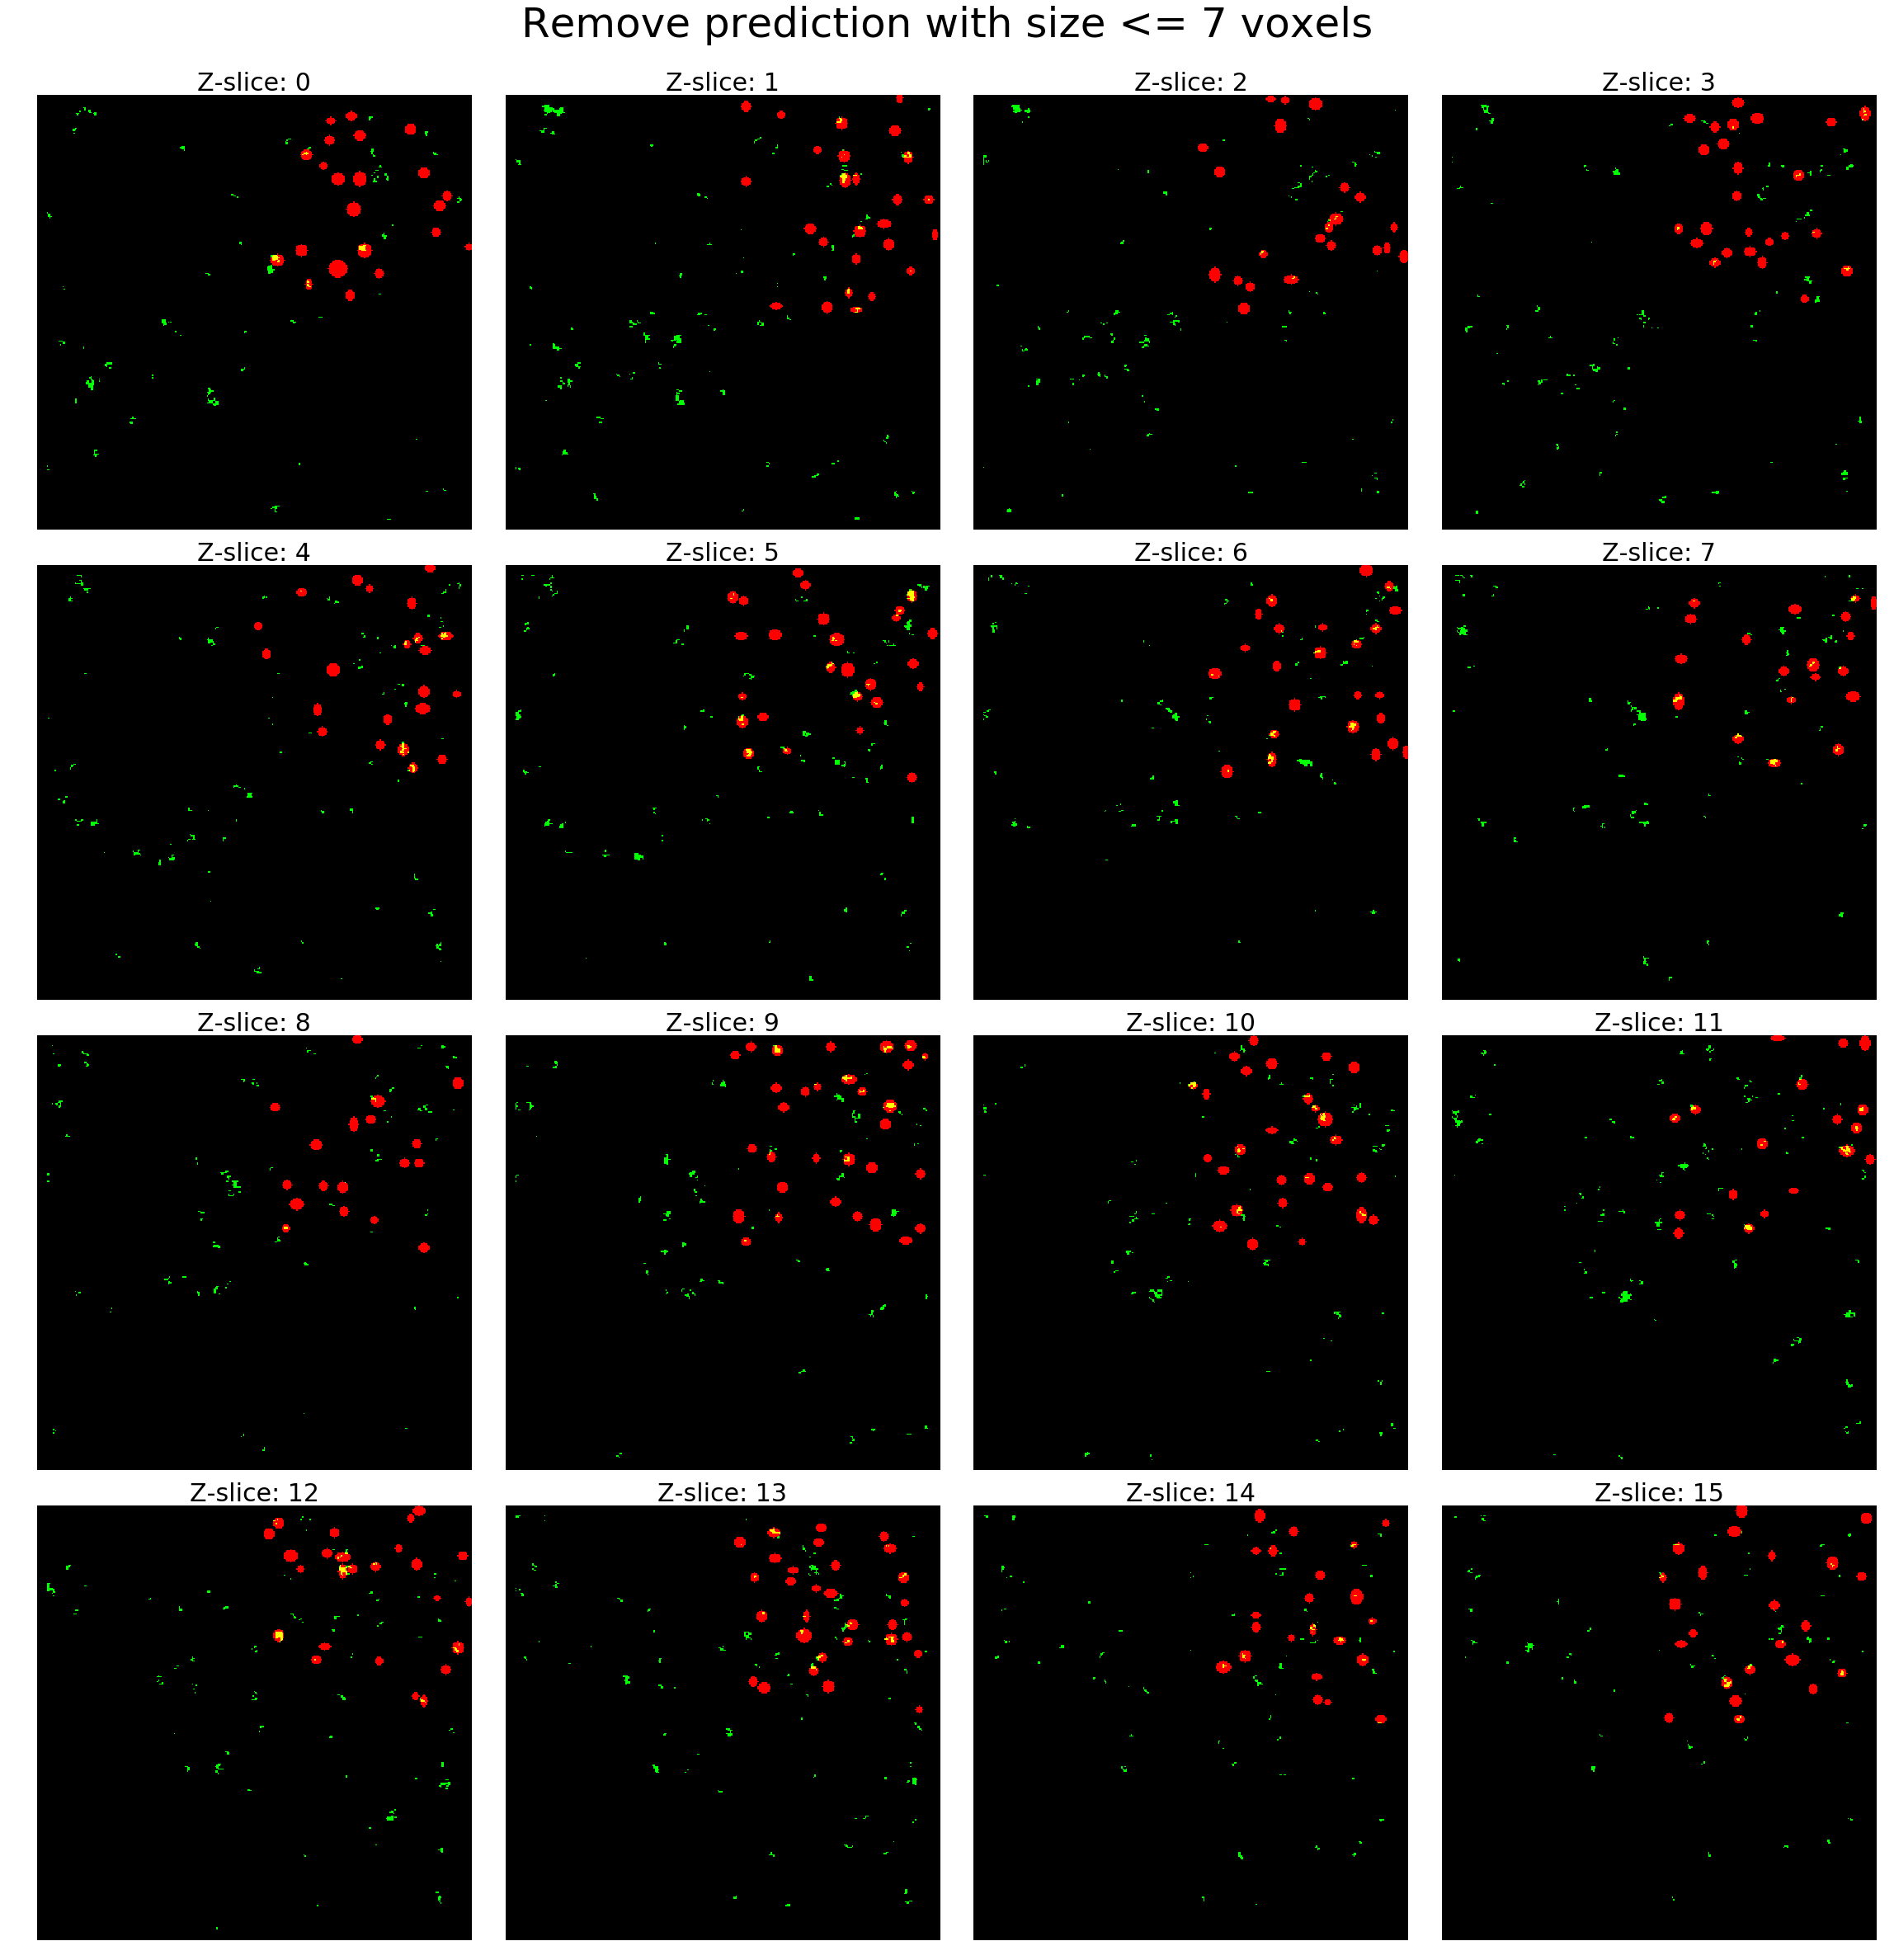

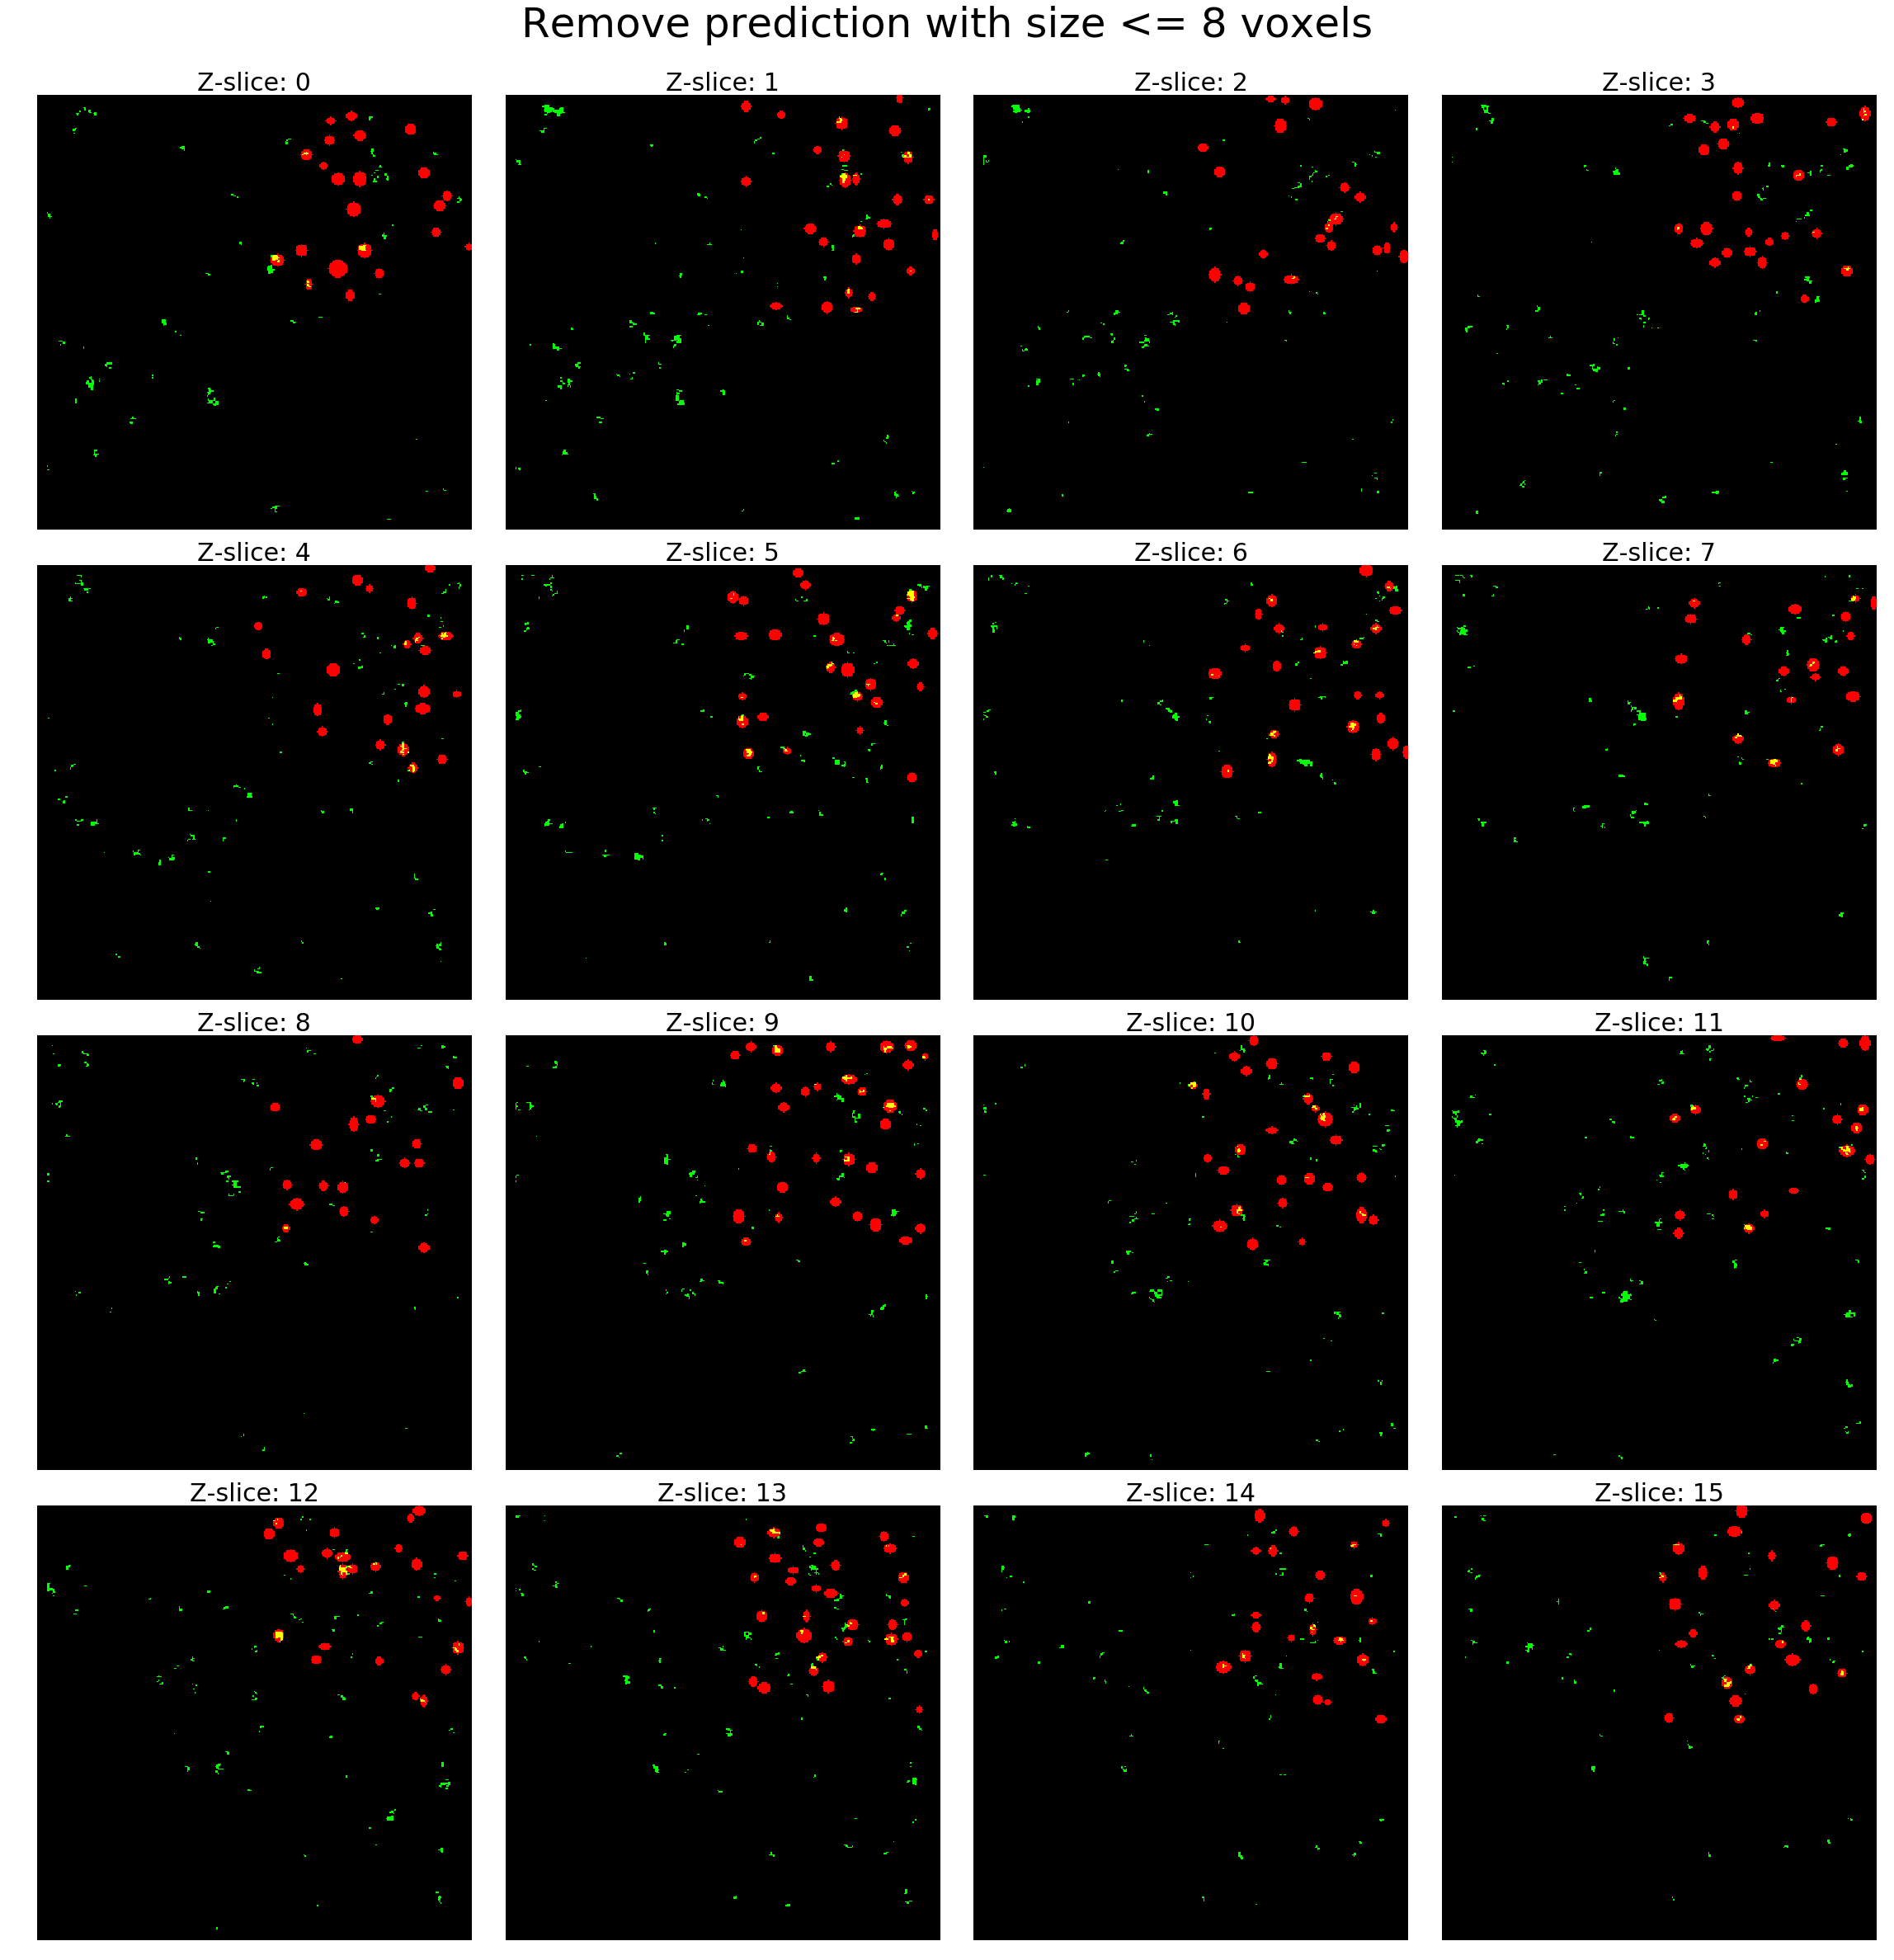

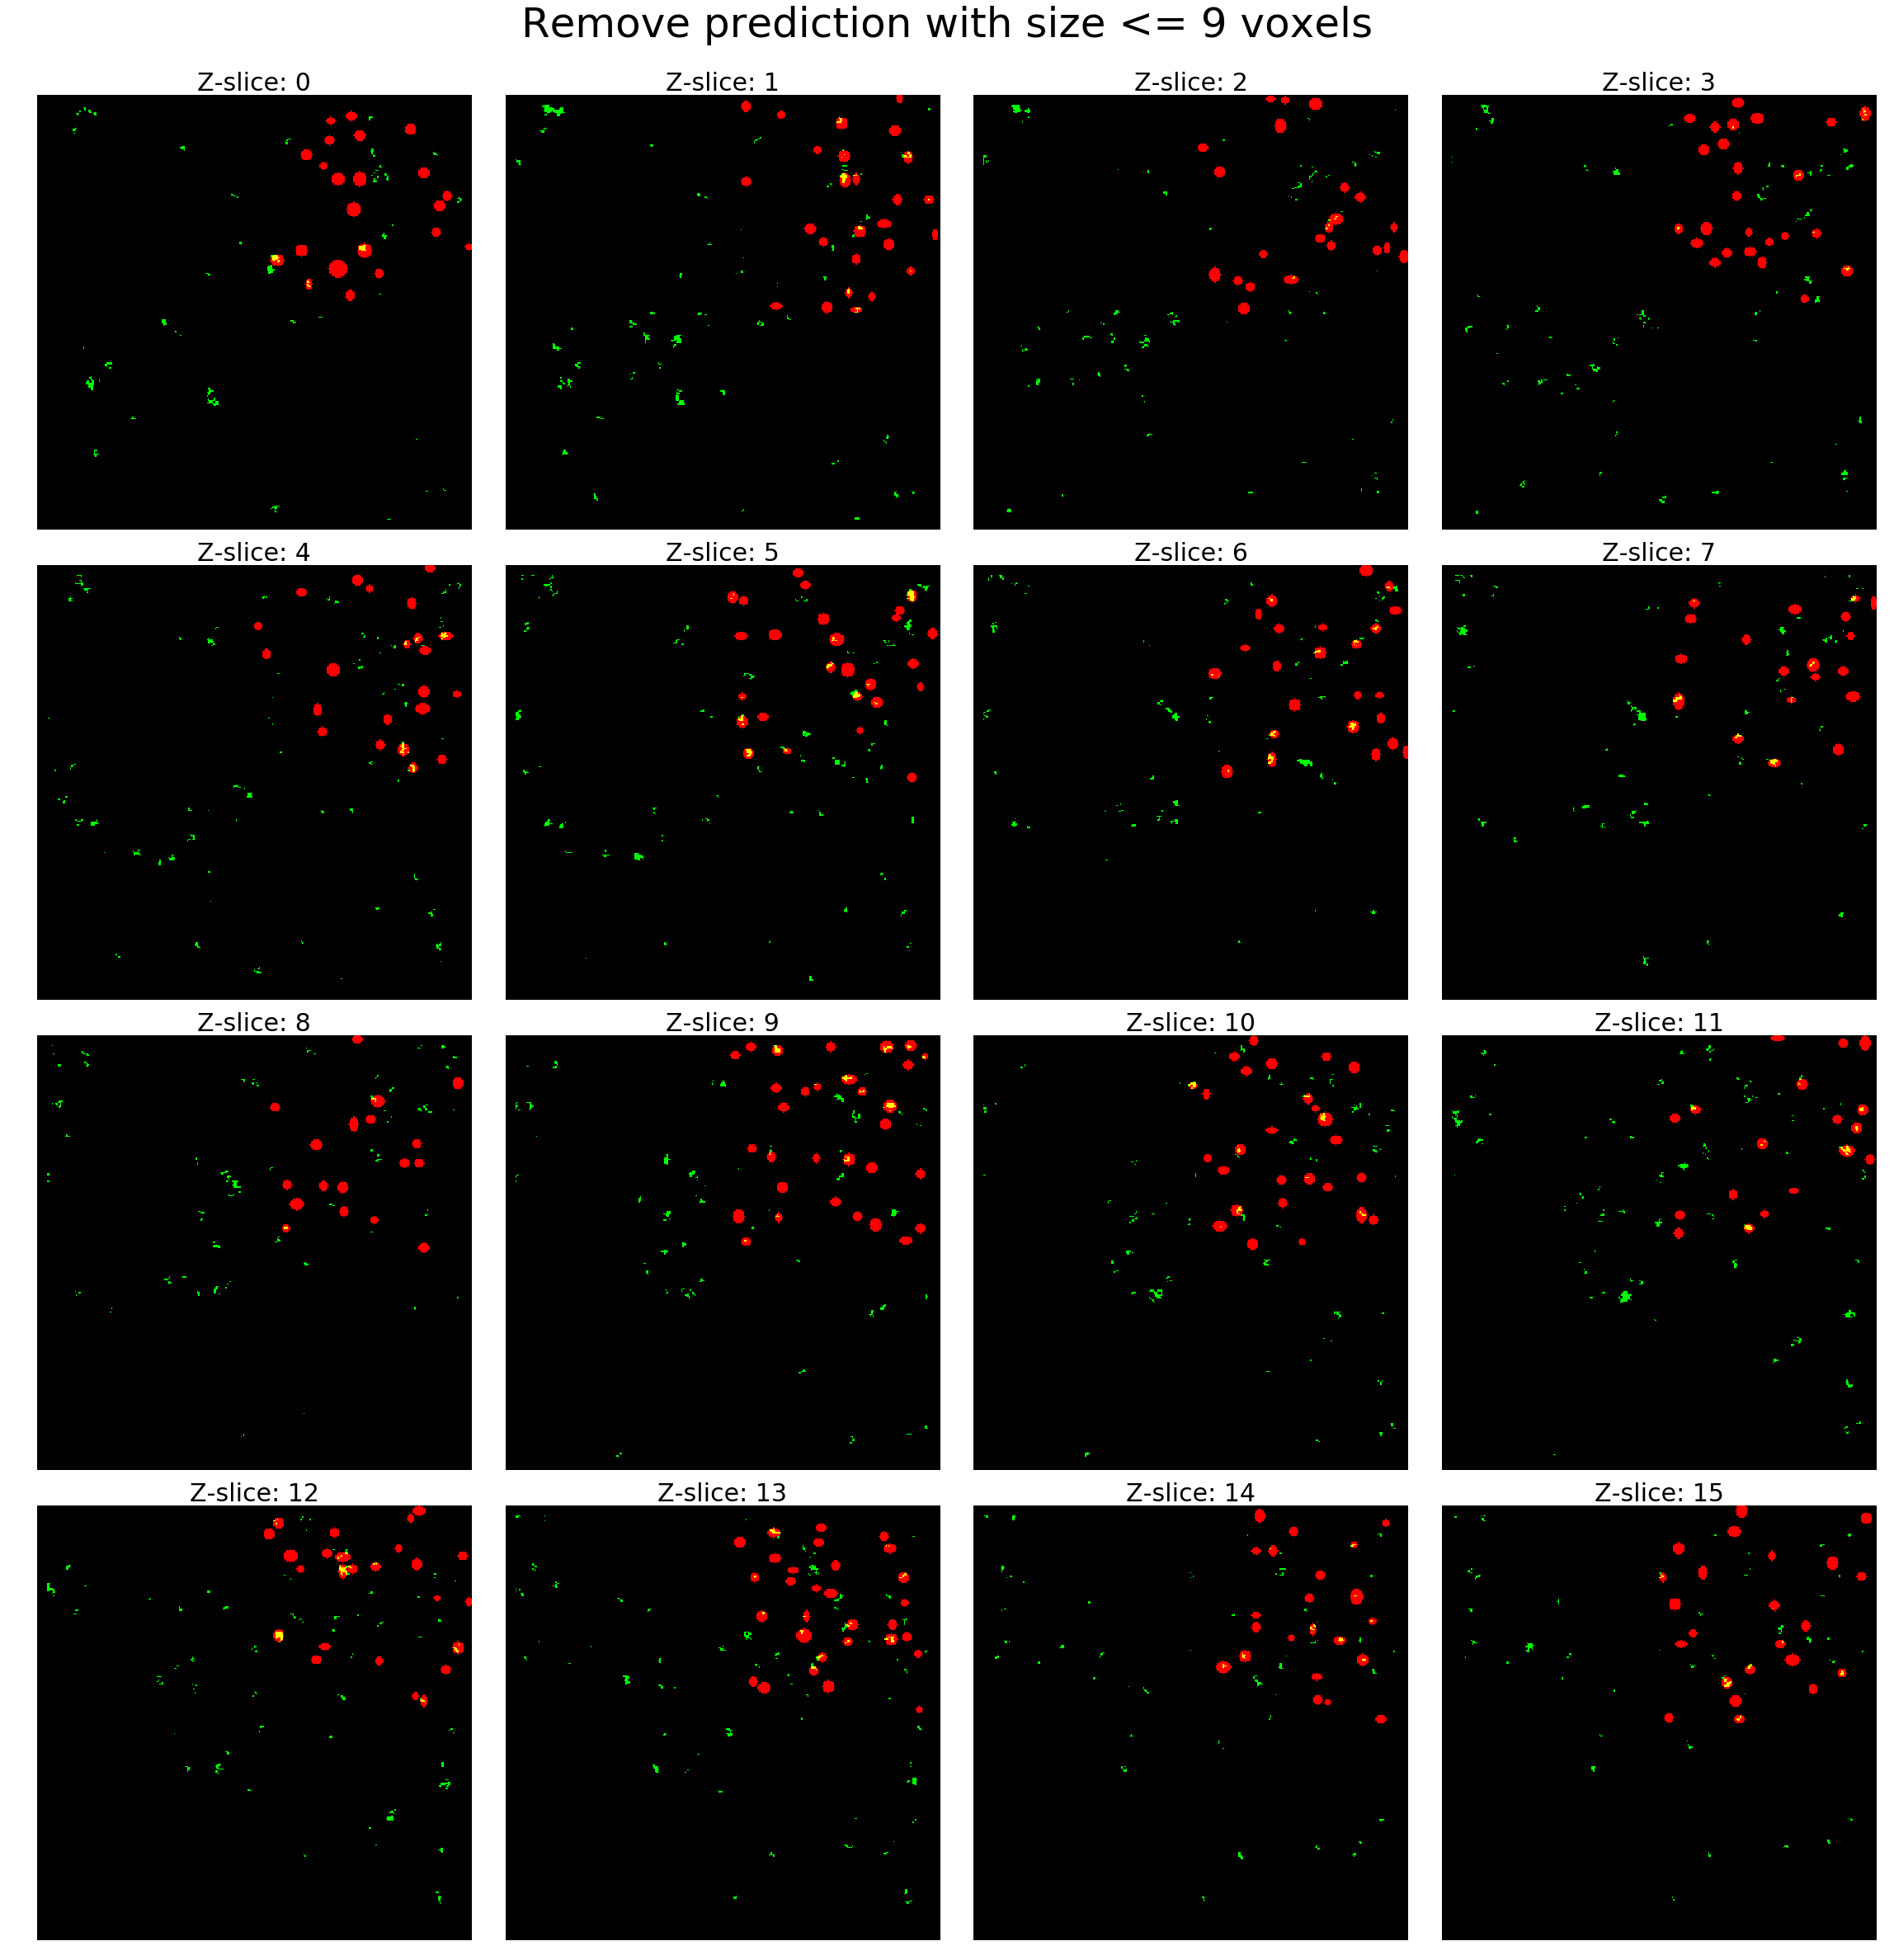

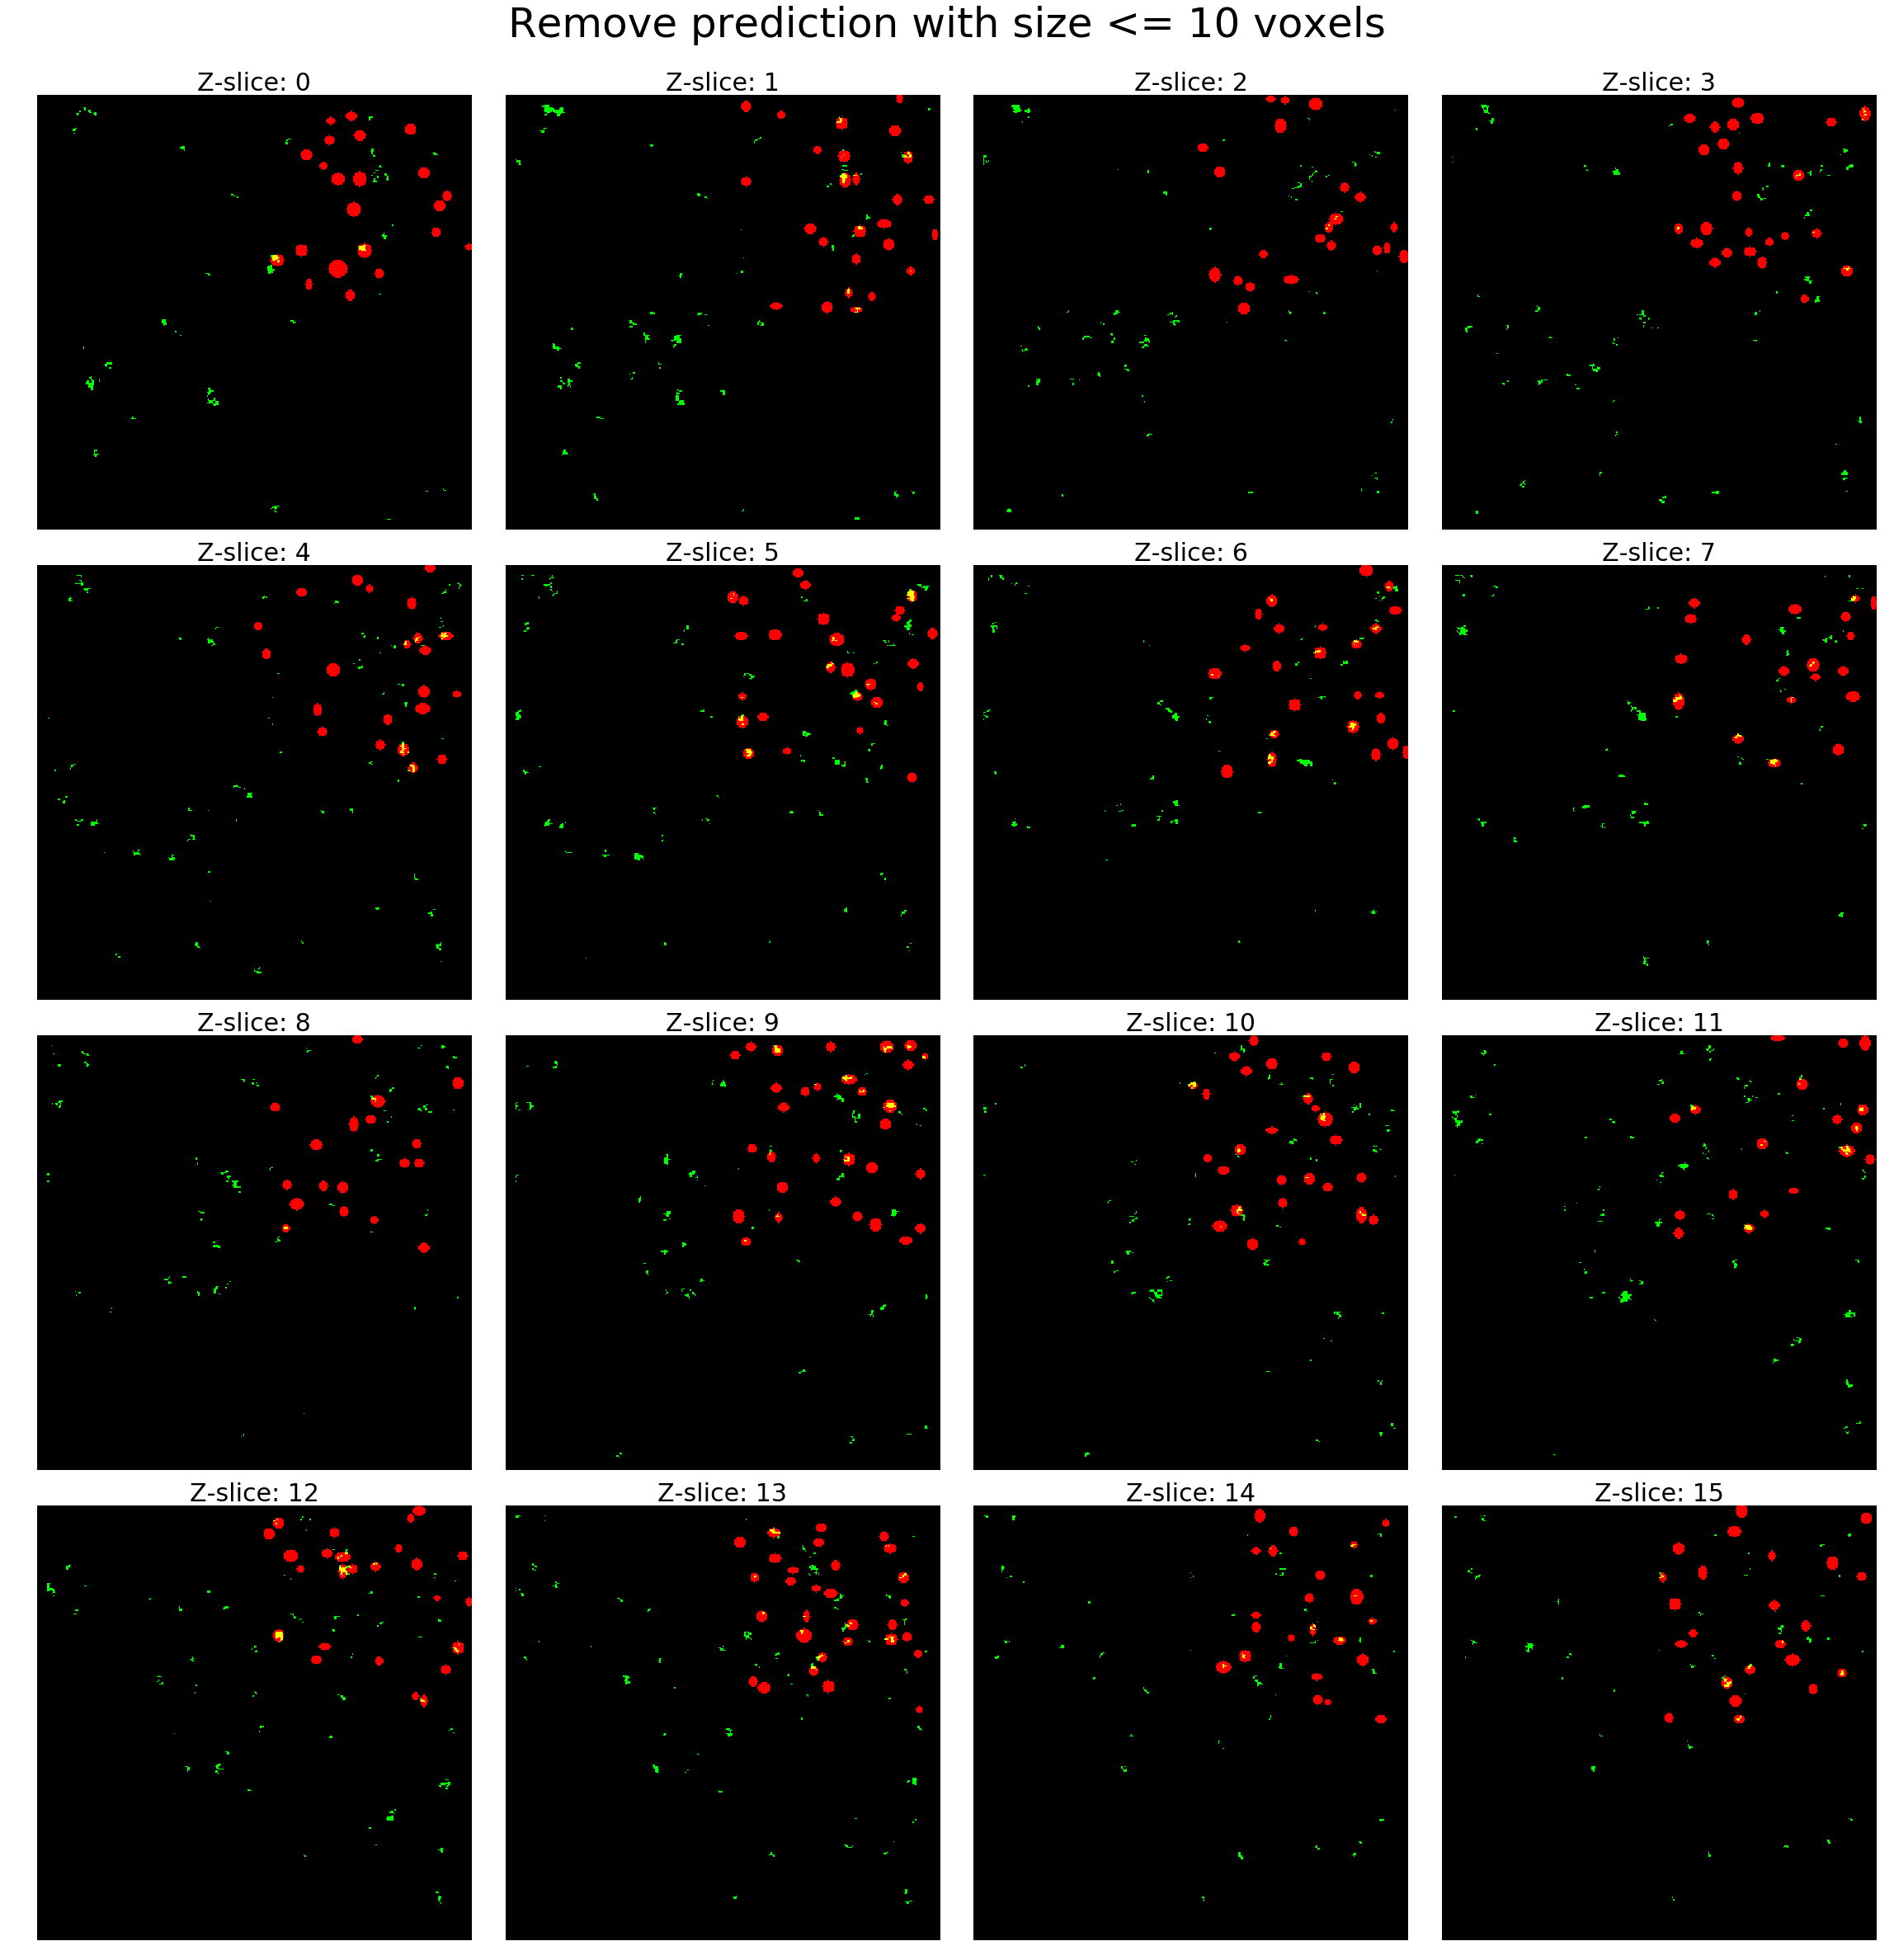

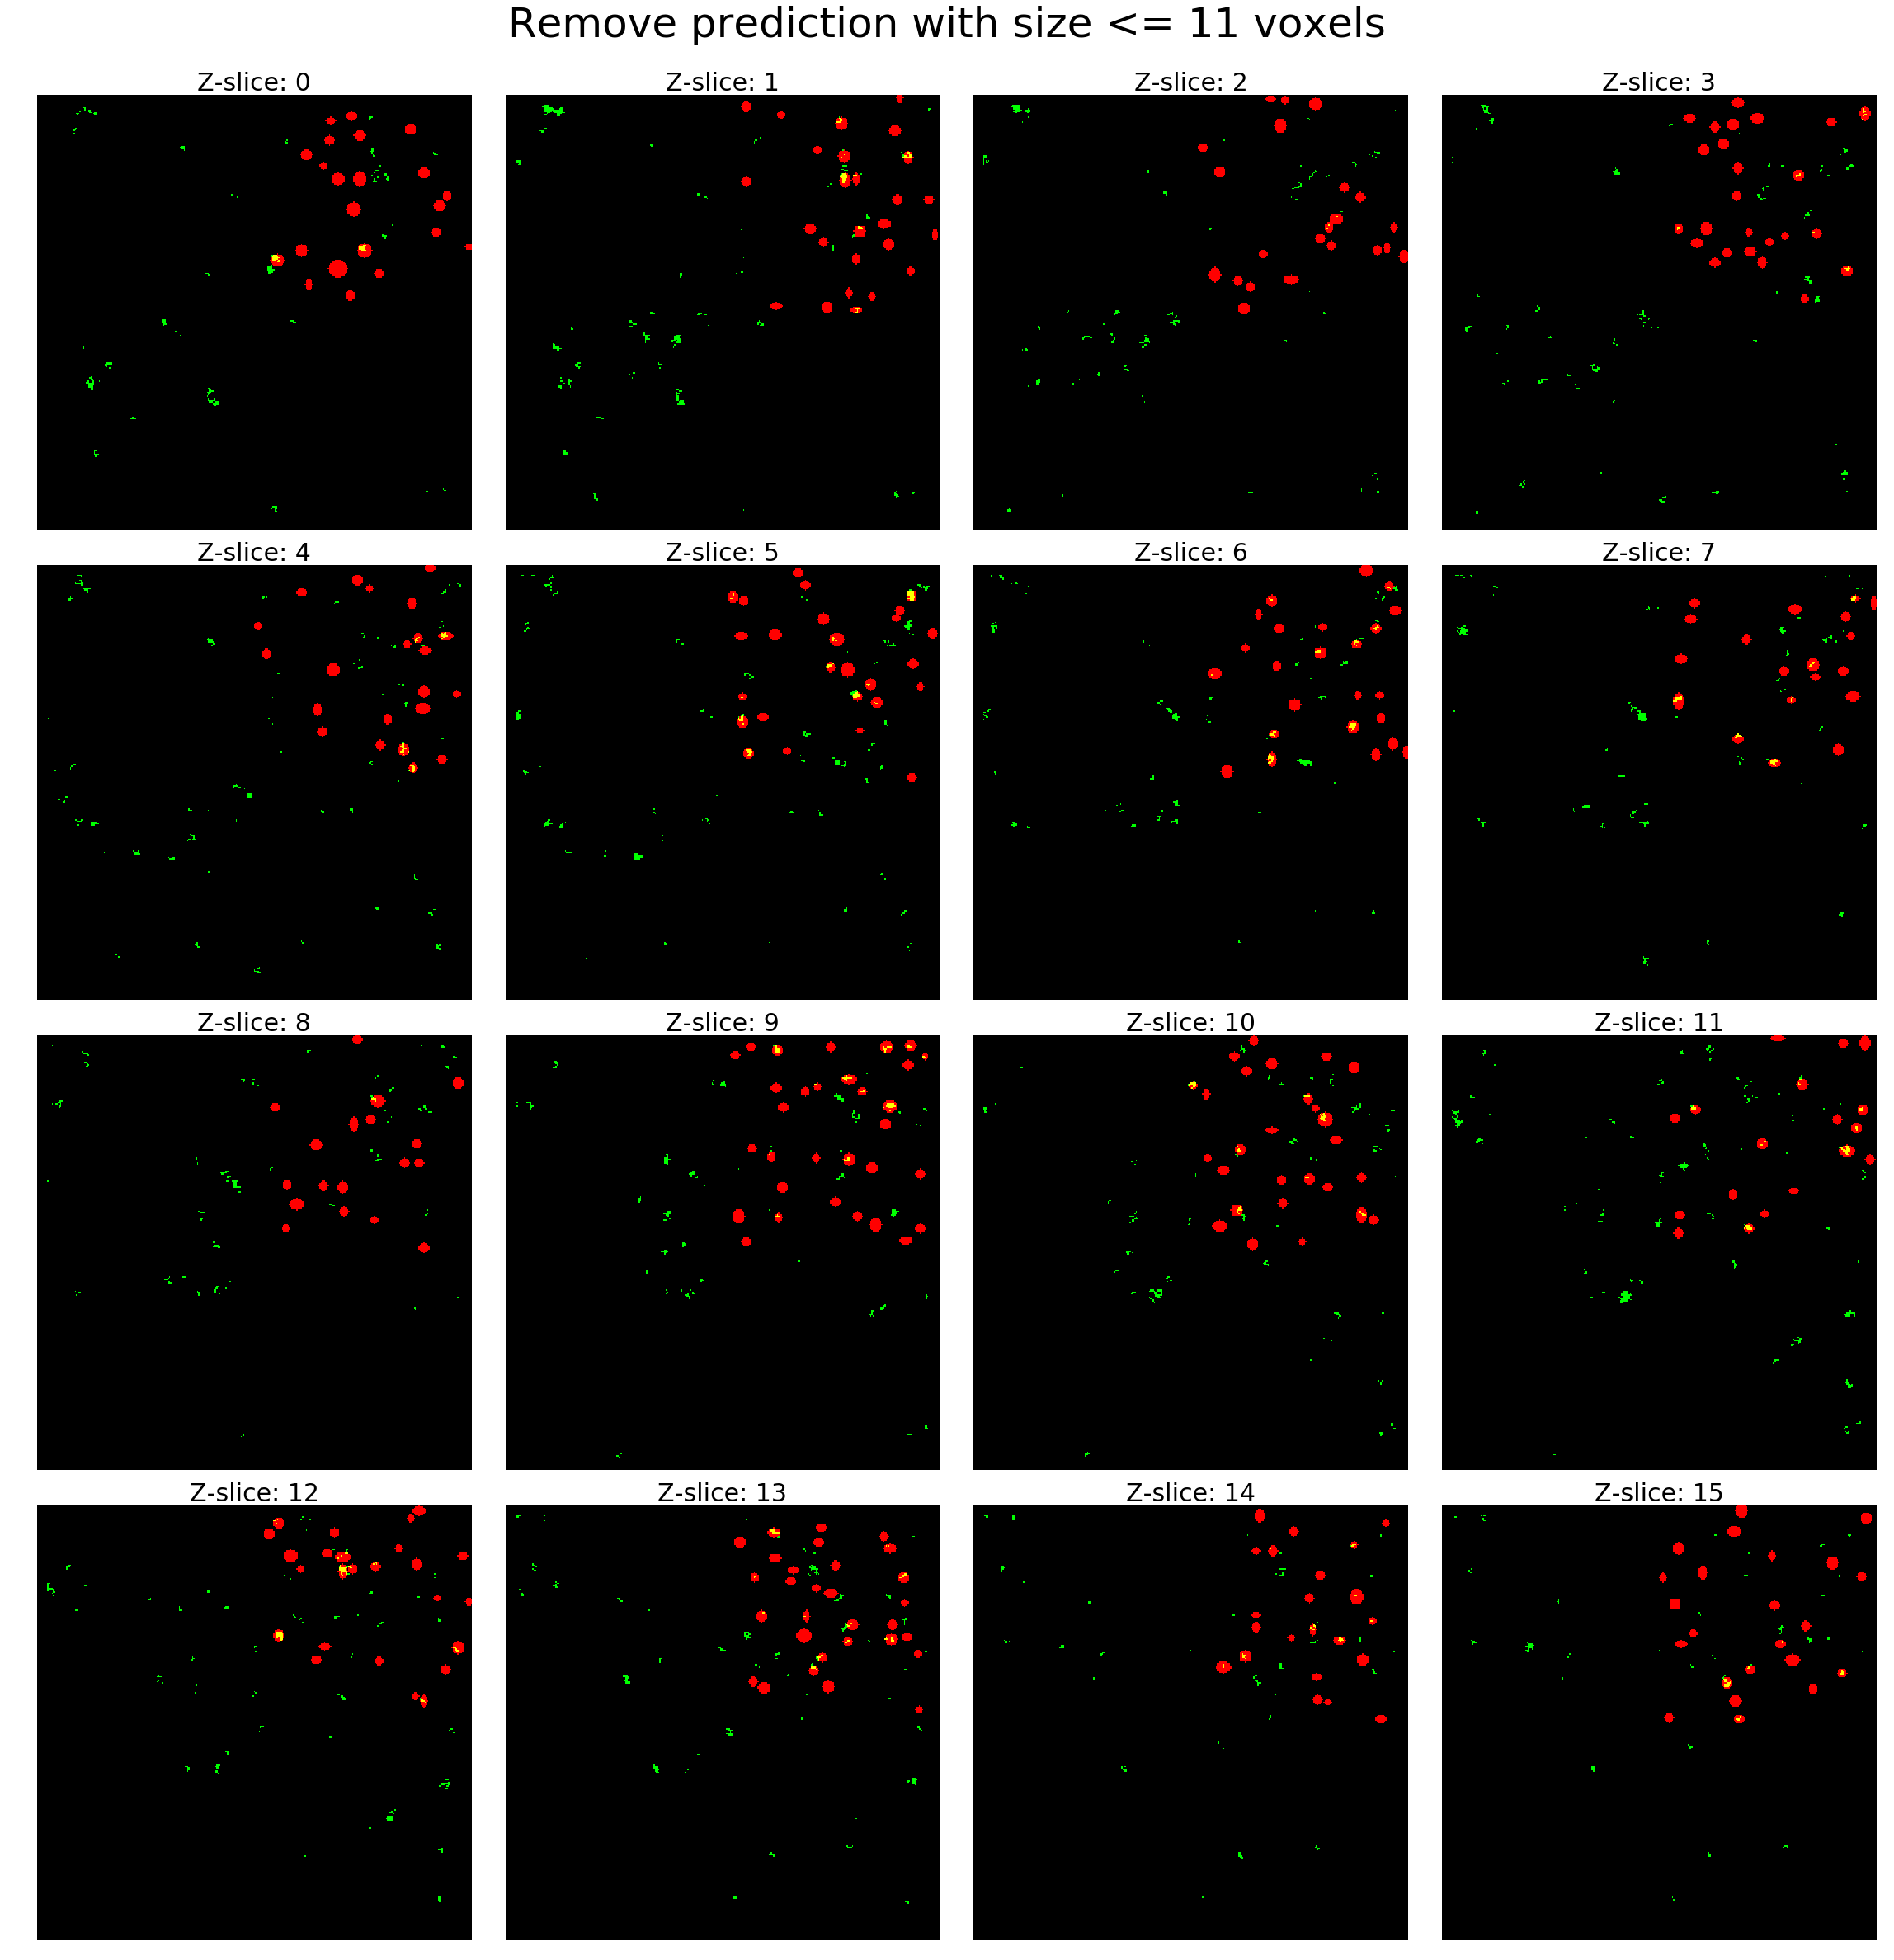

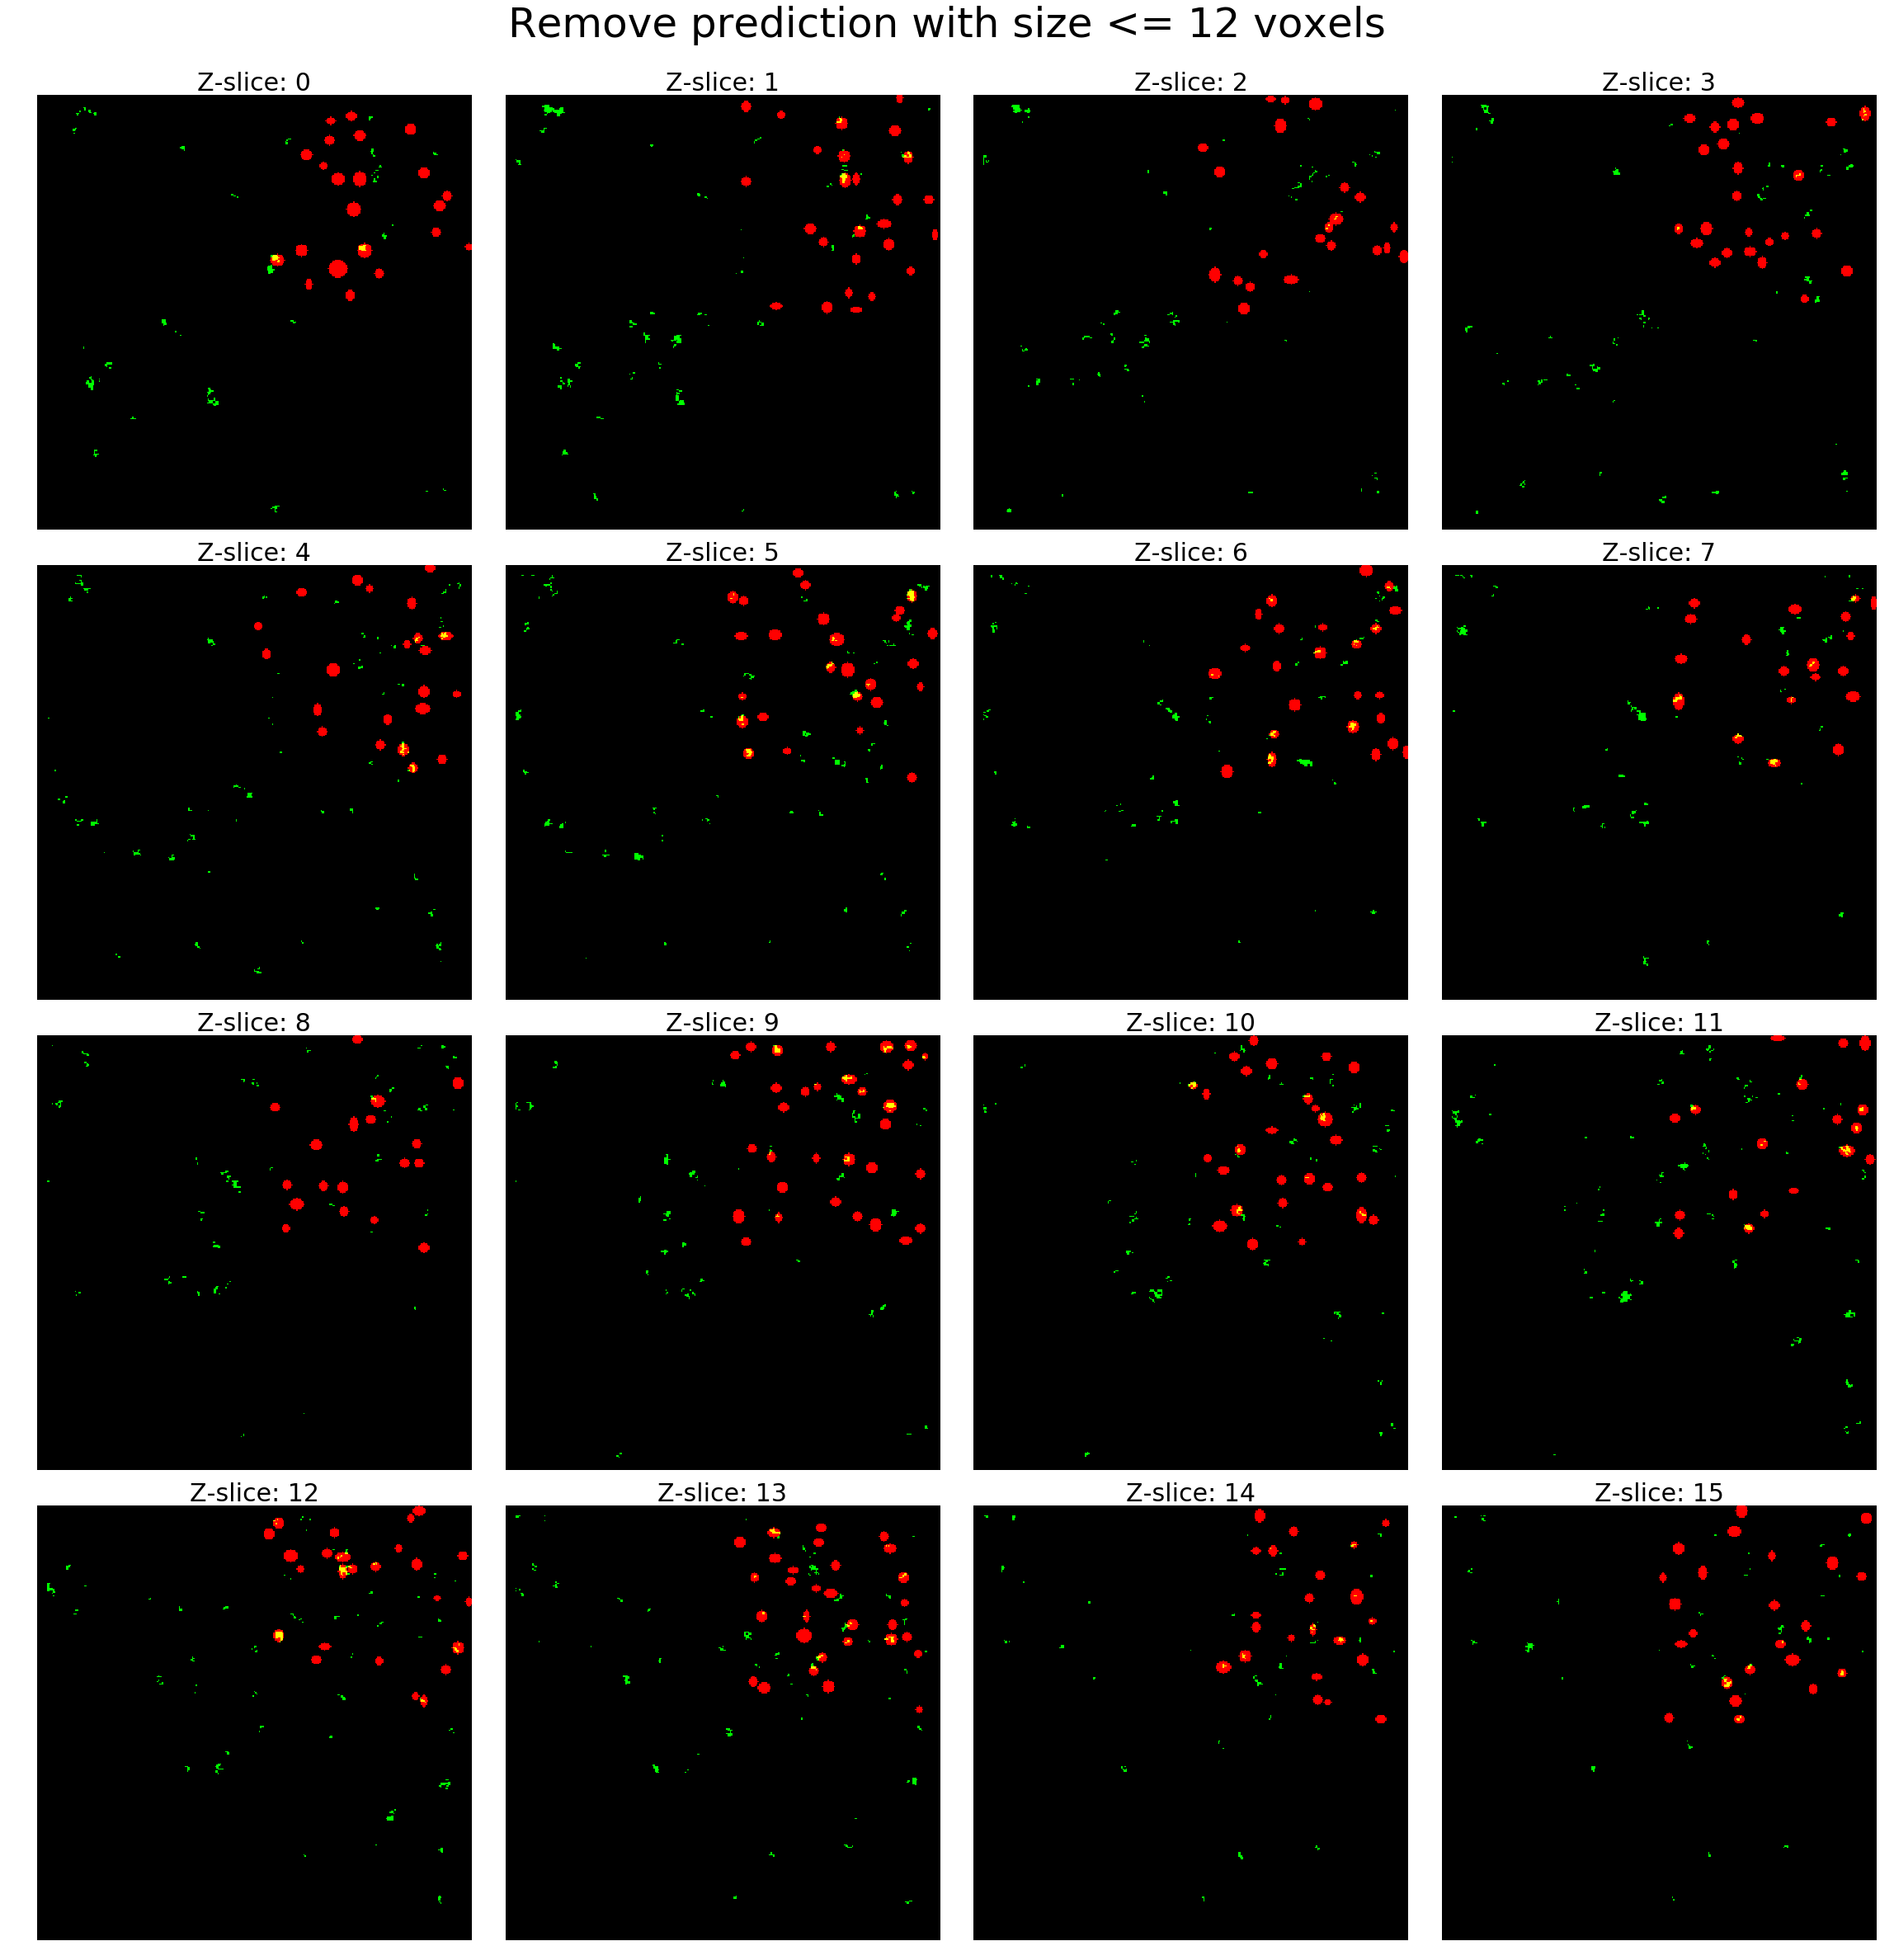

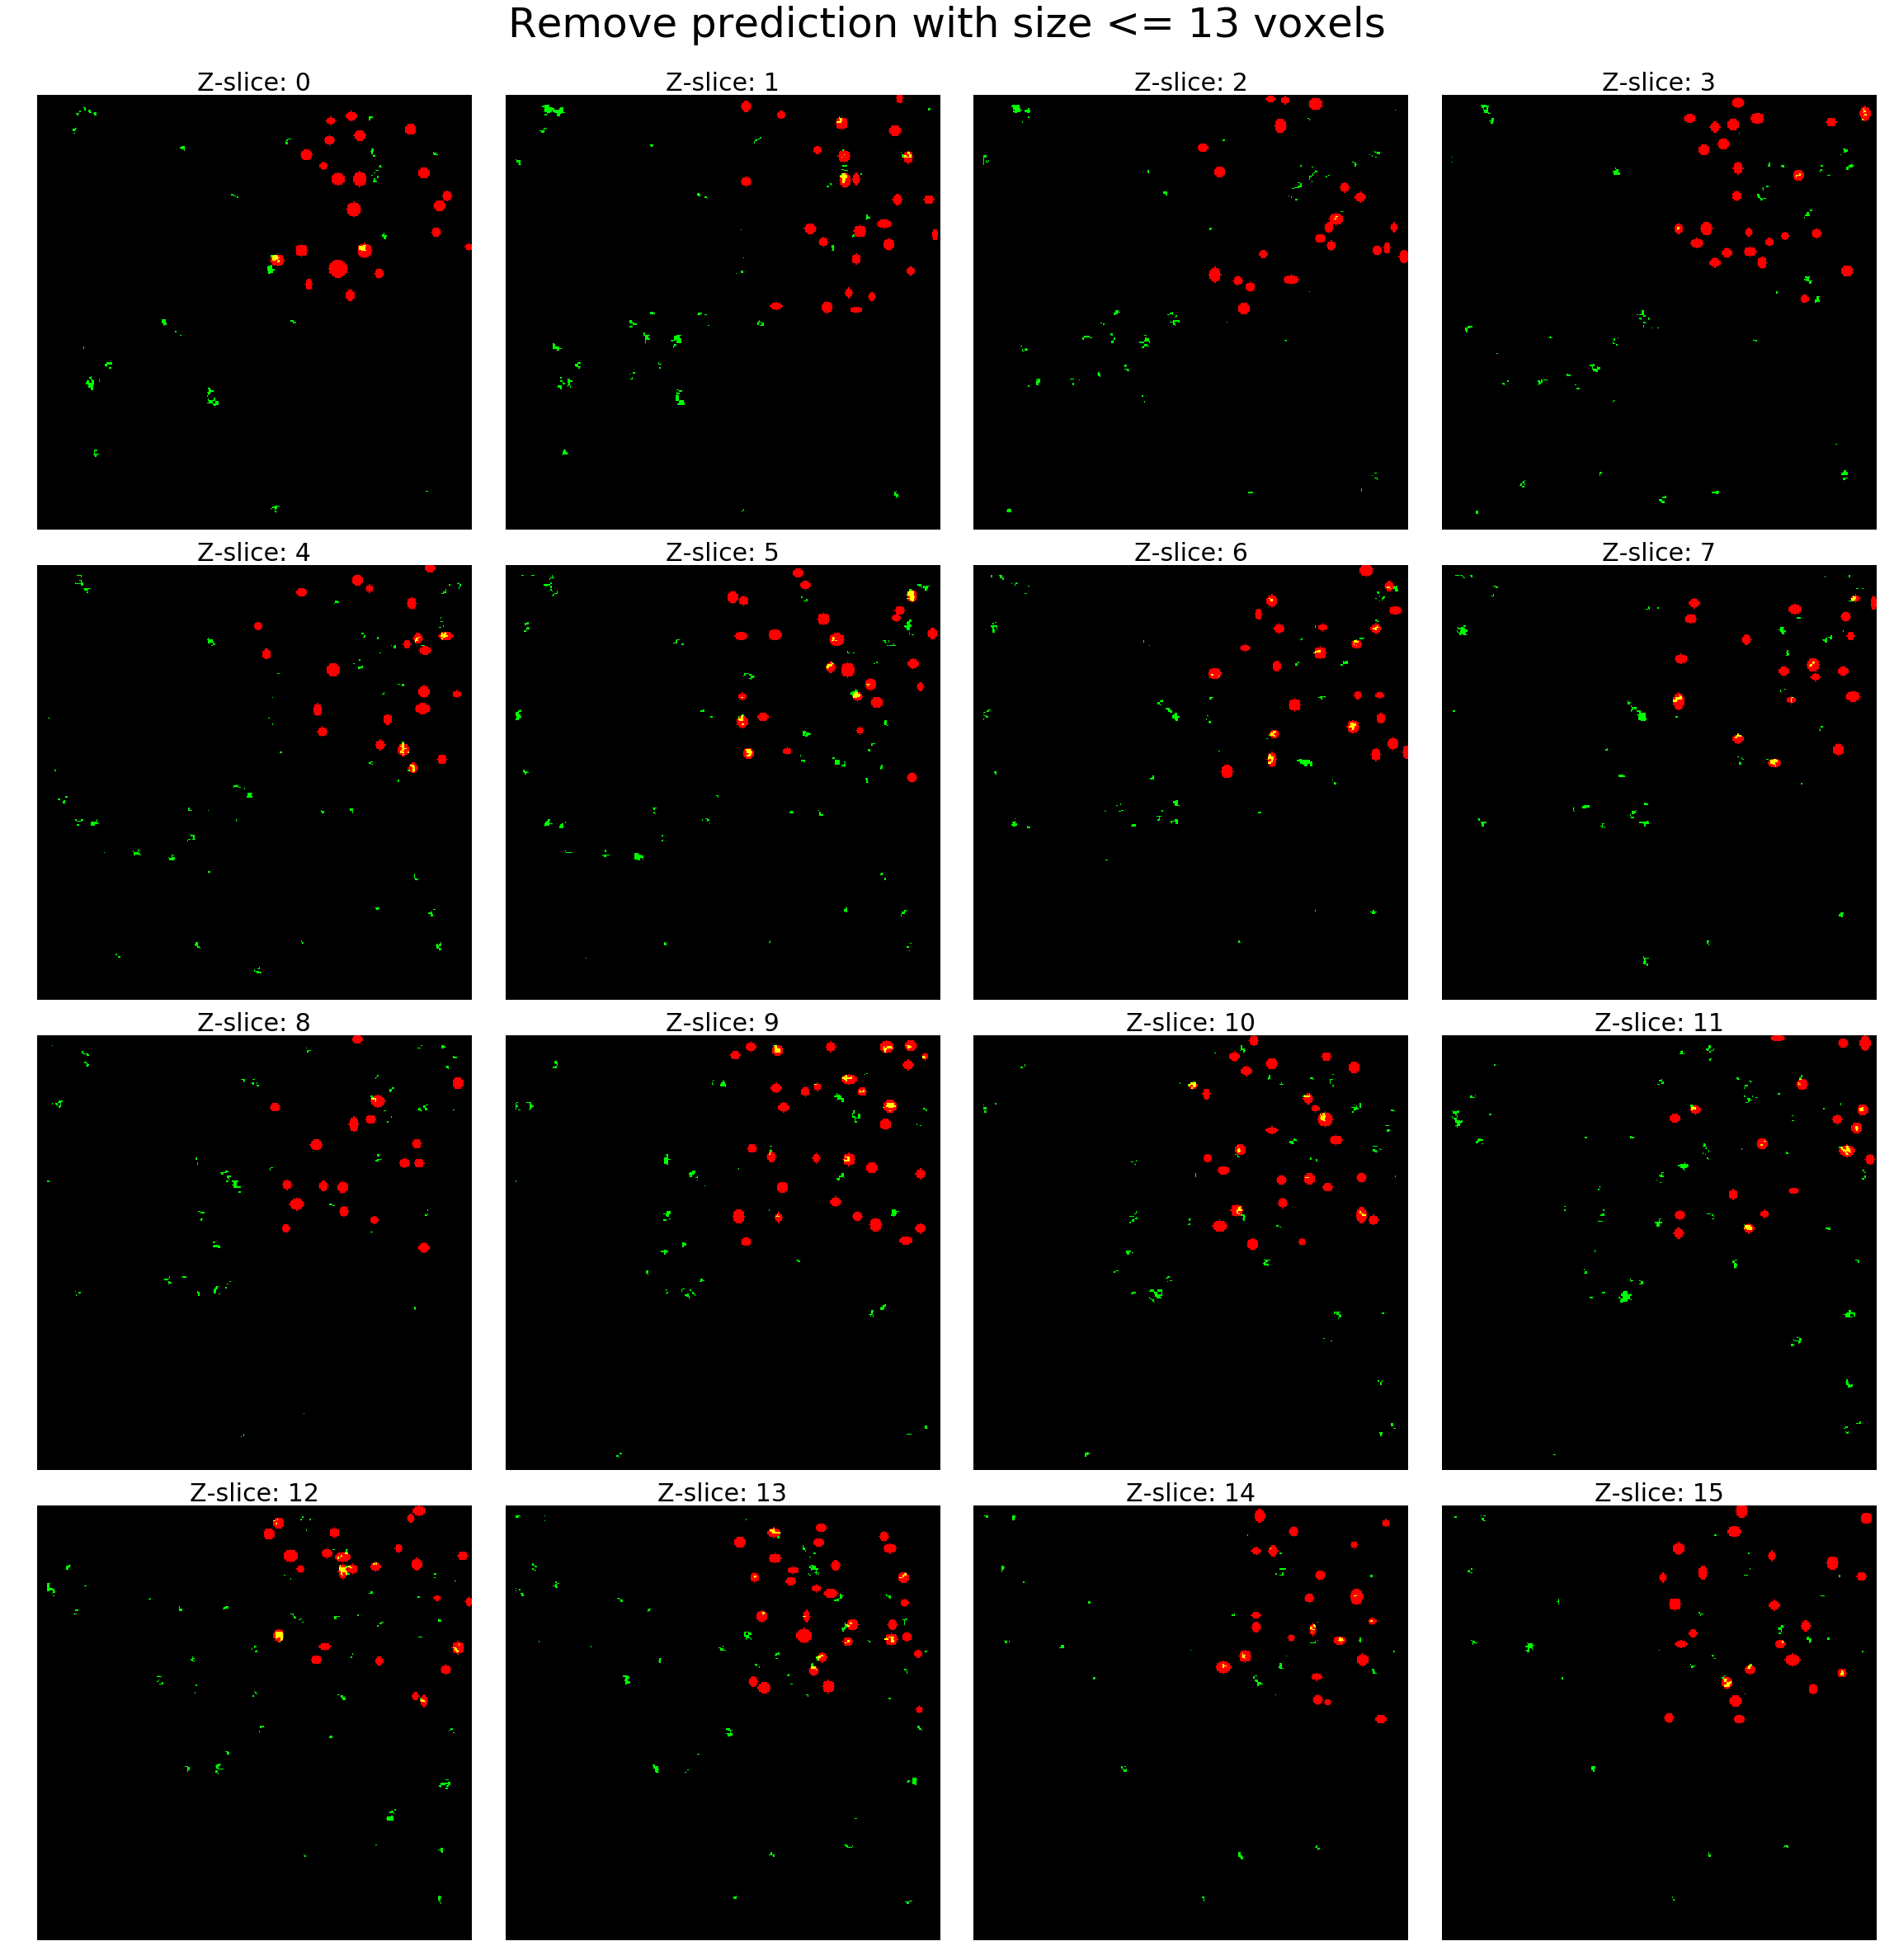

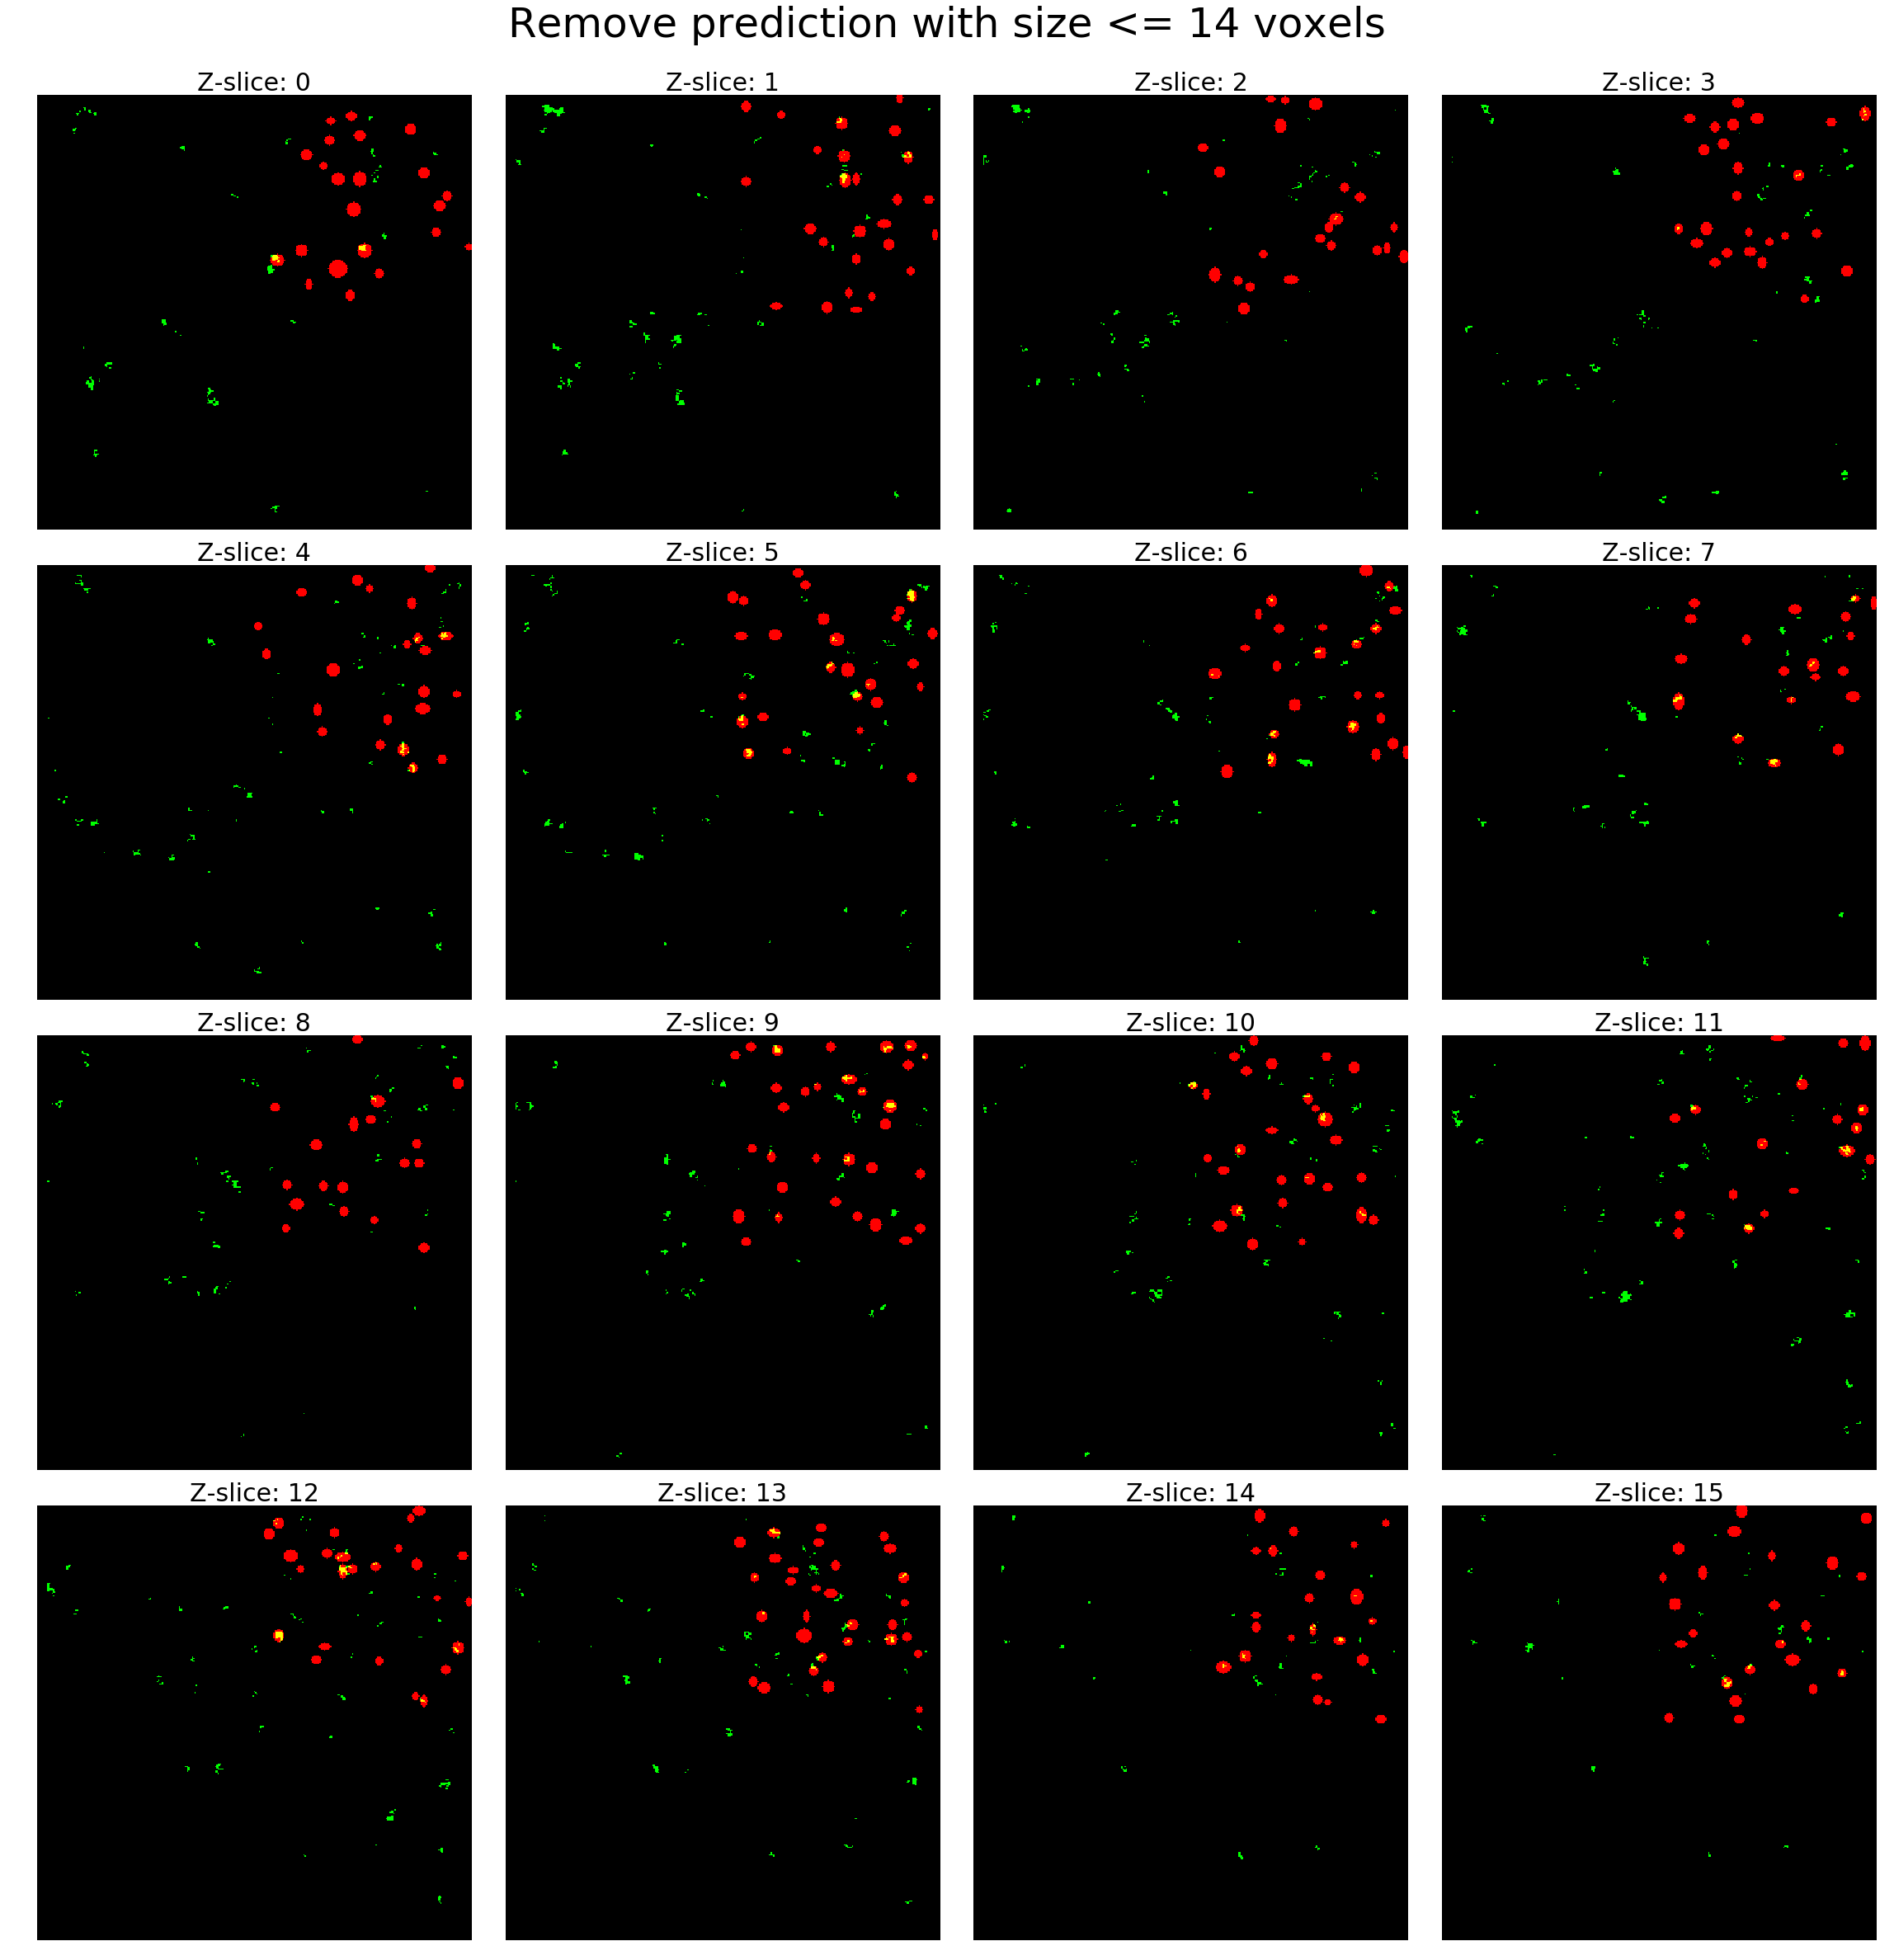

/Users/jaewonc78/Envs/nomads/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


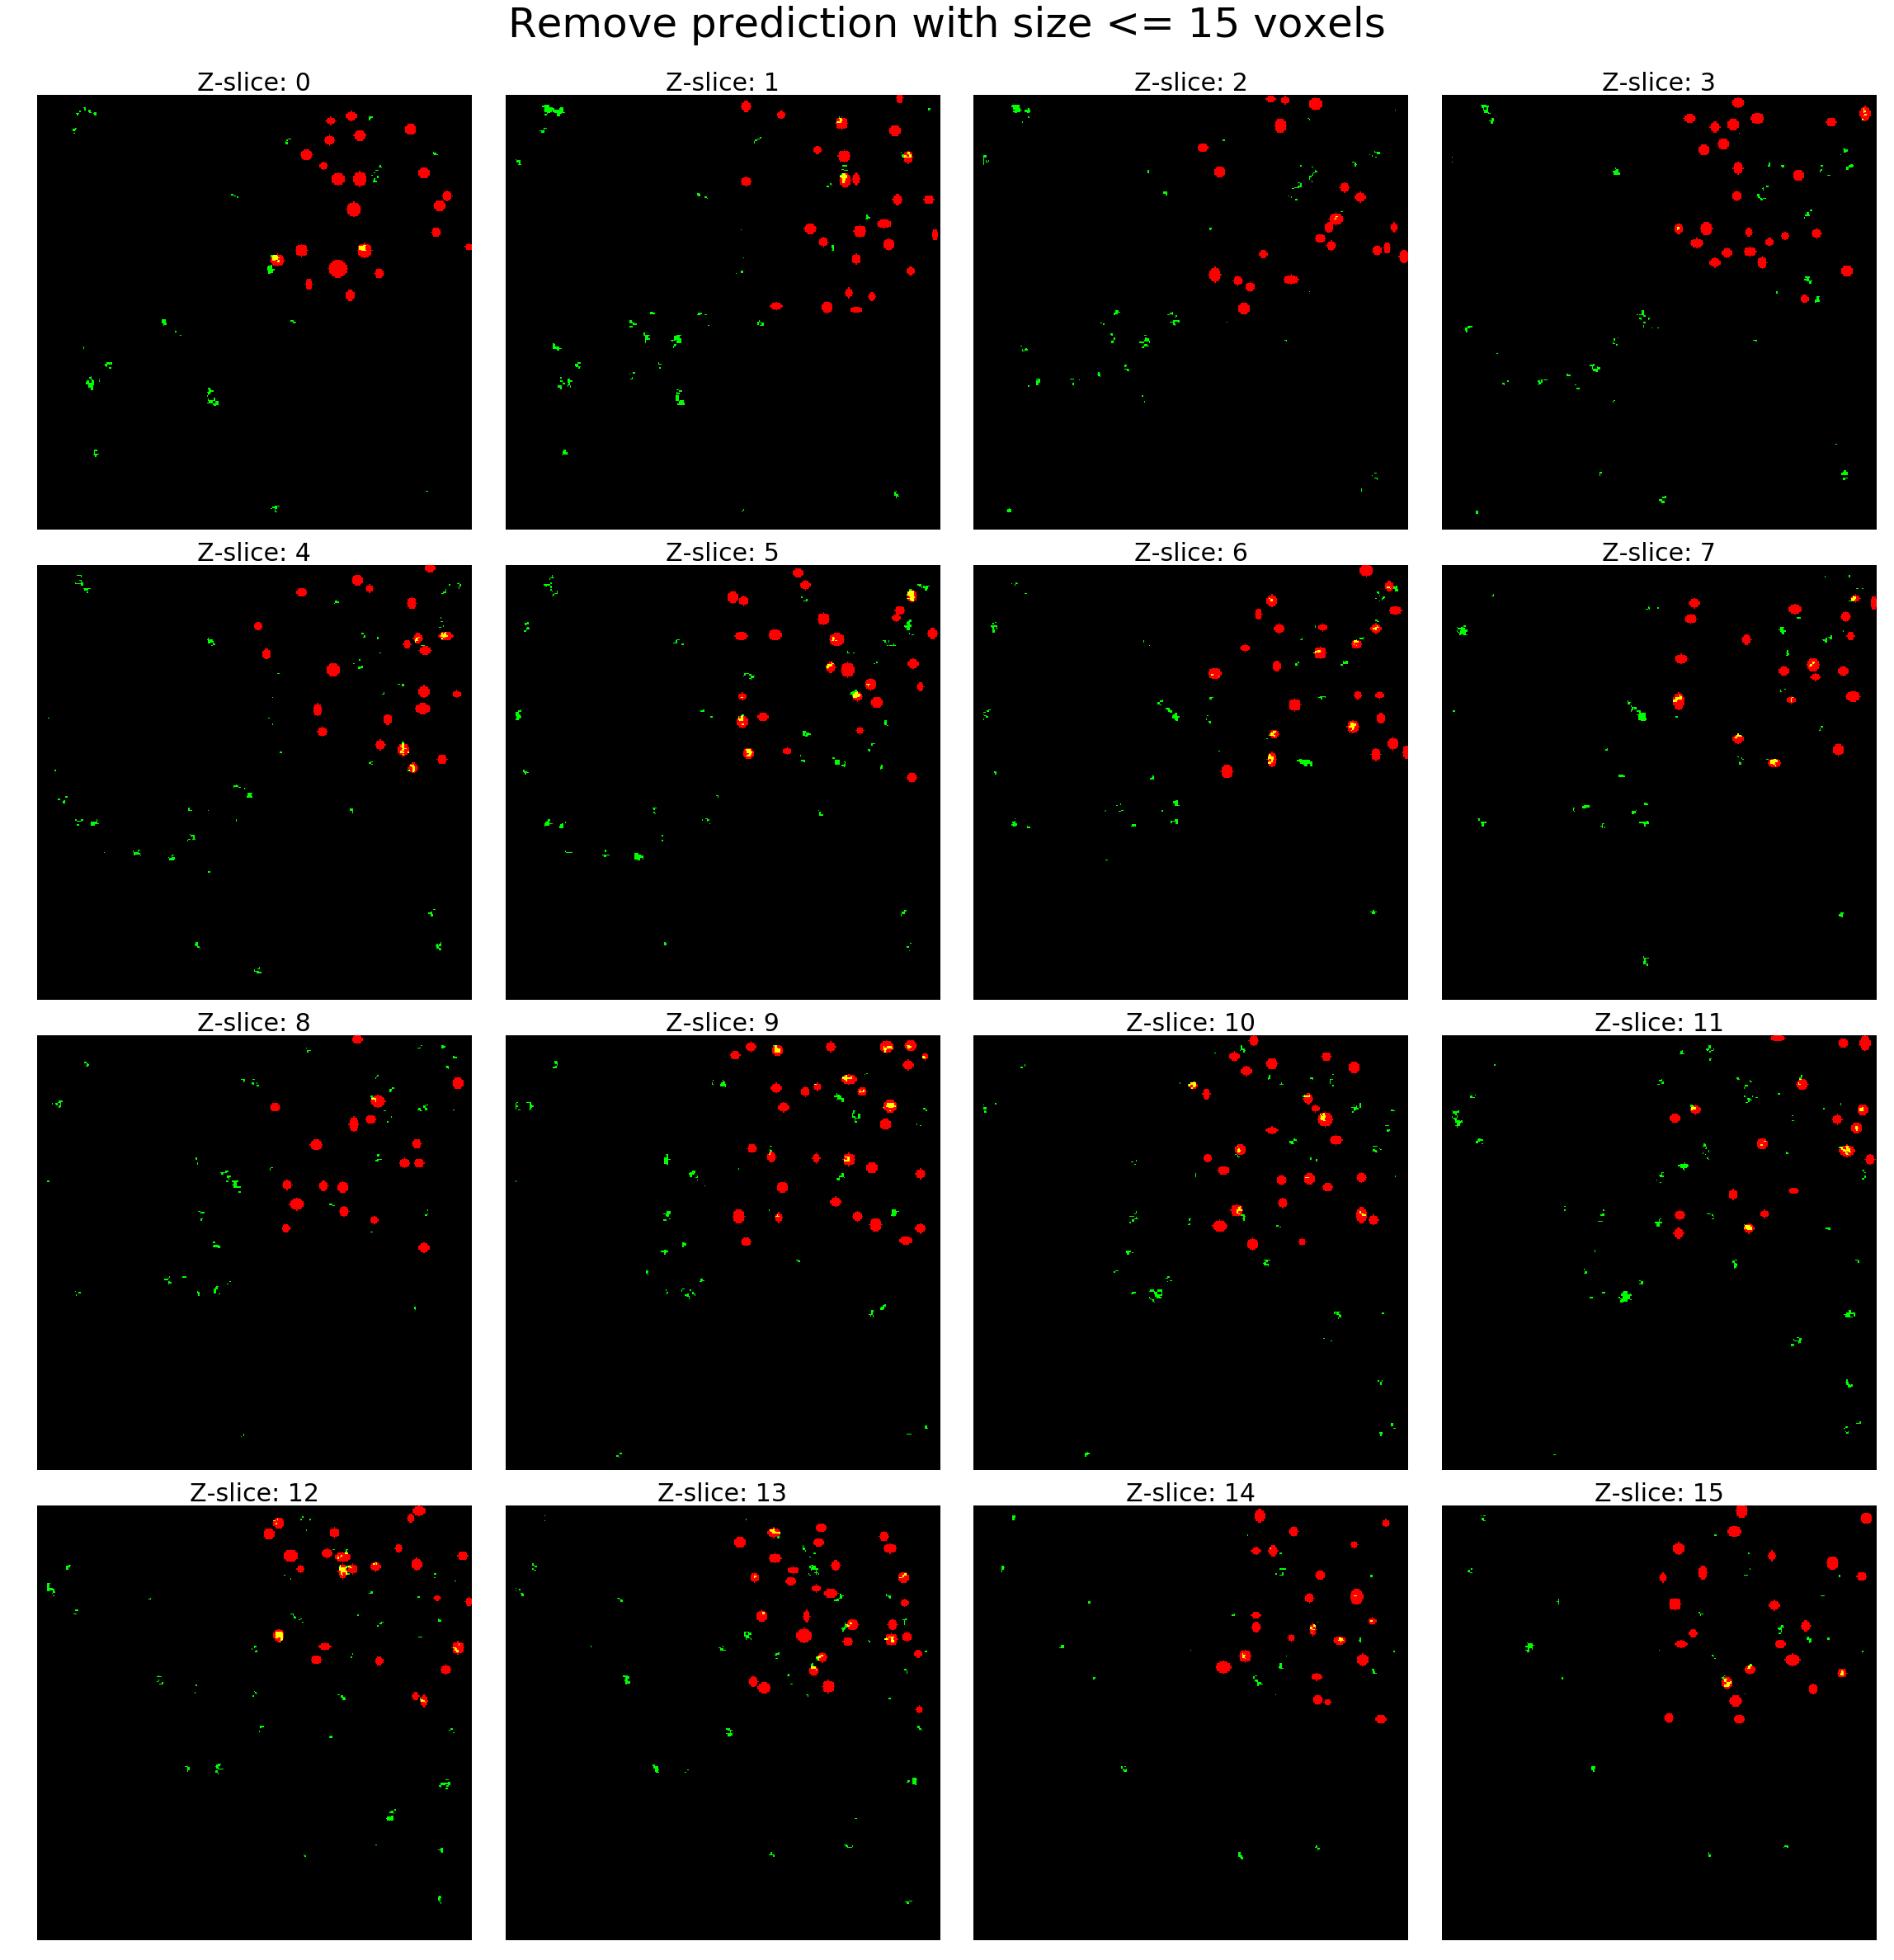

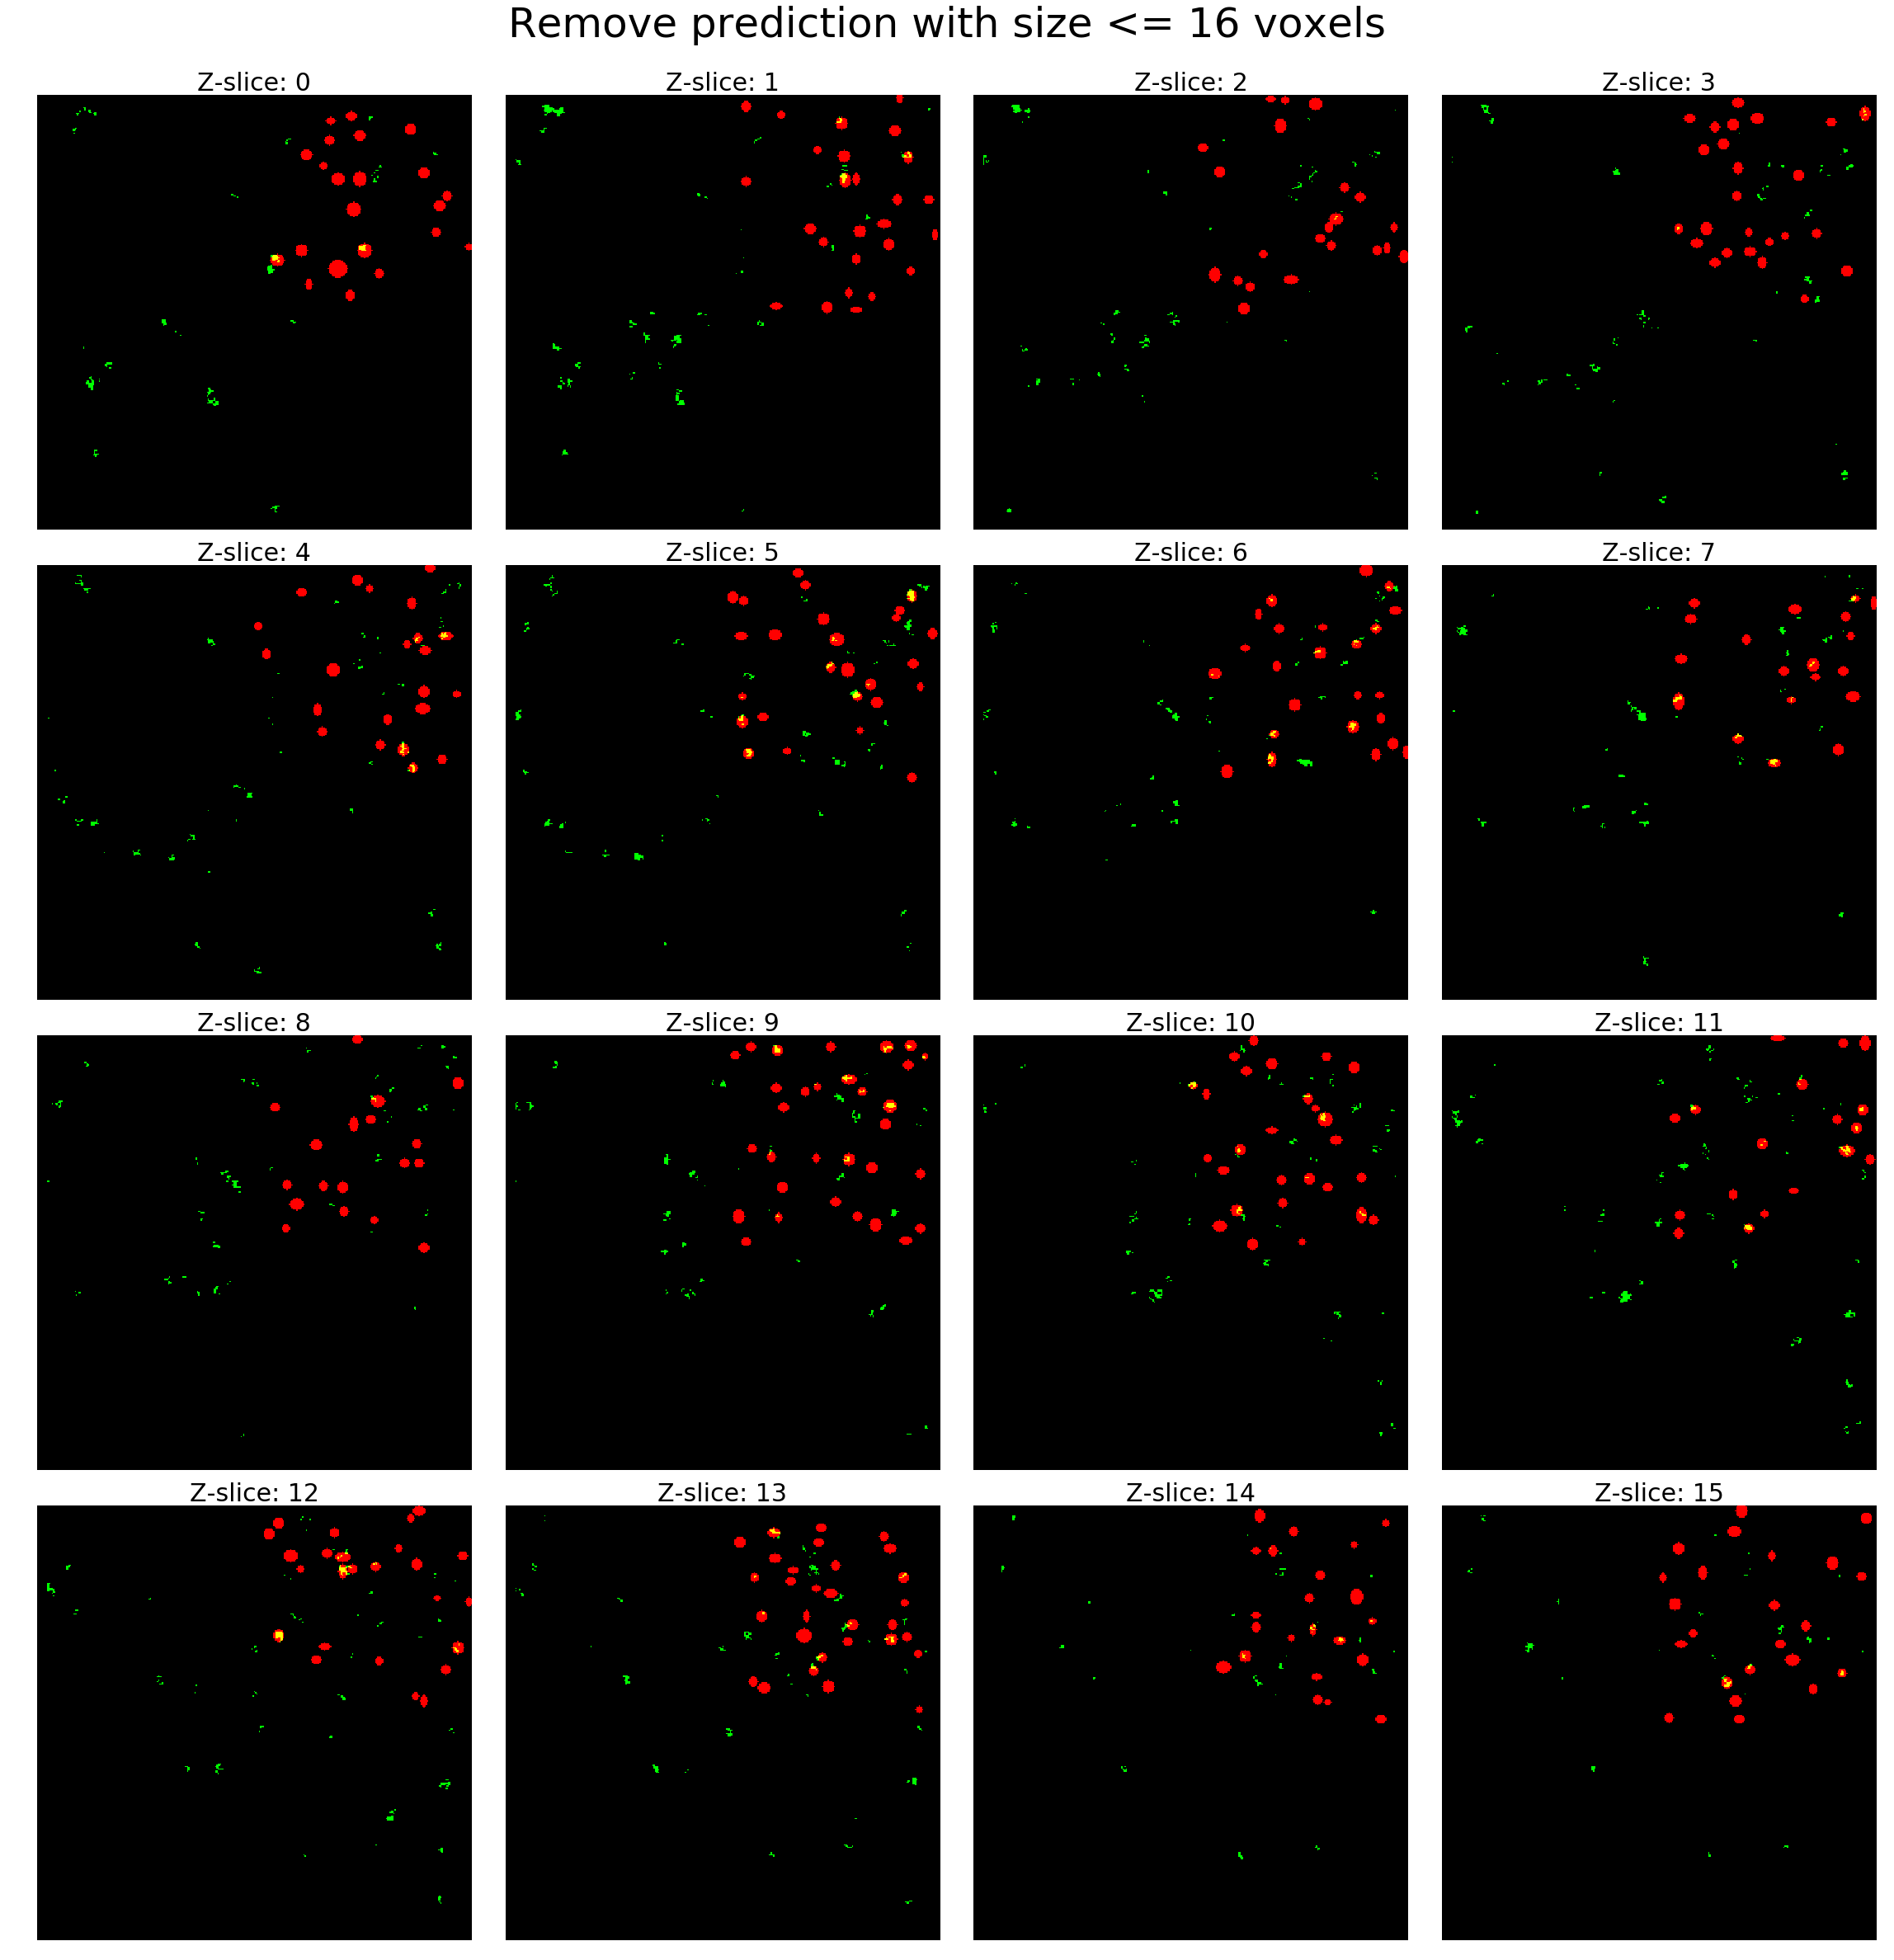

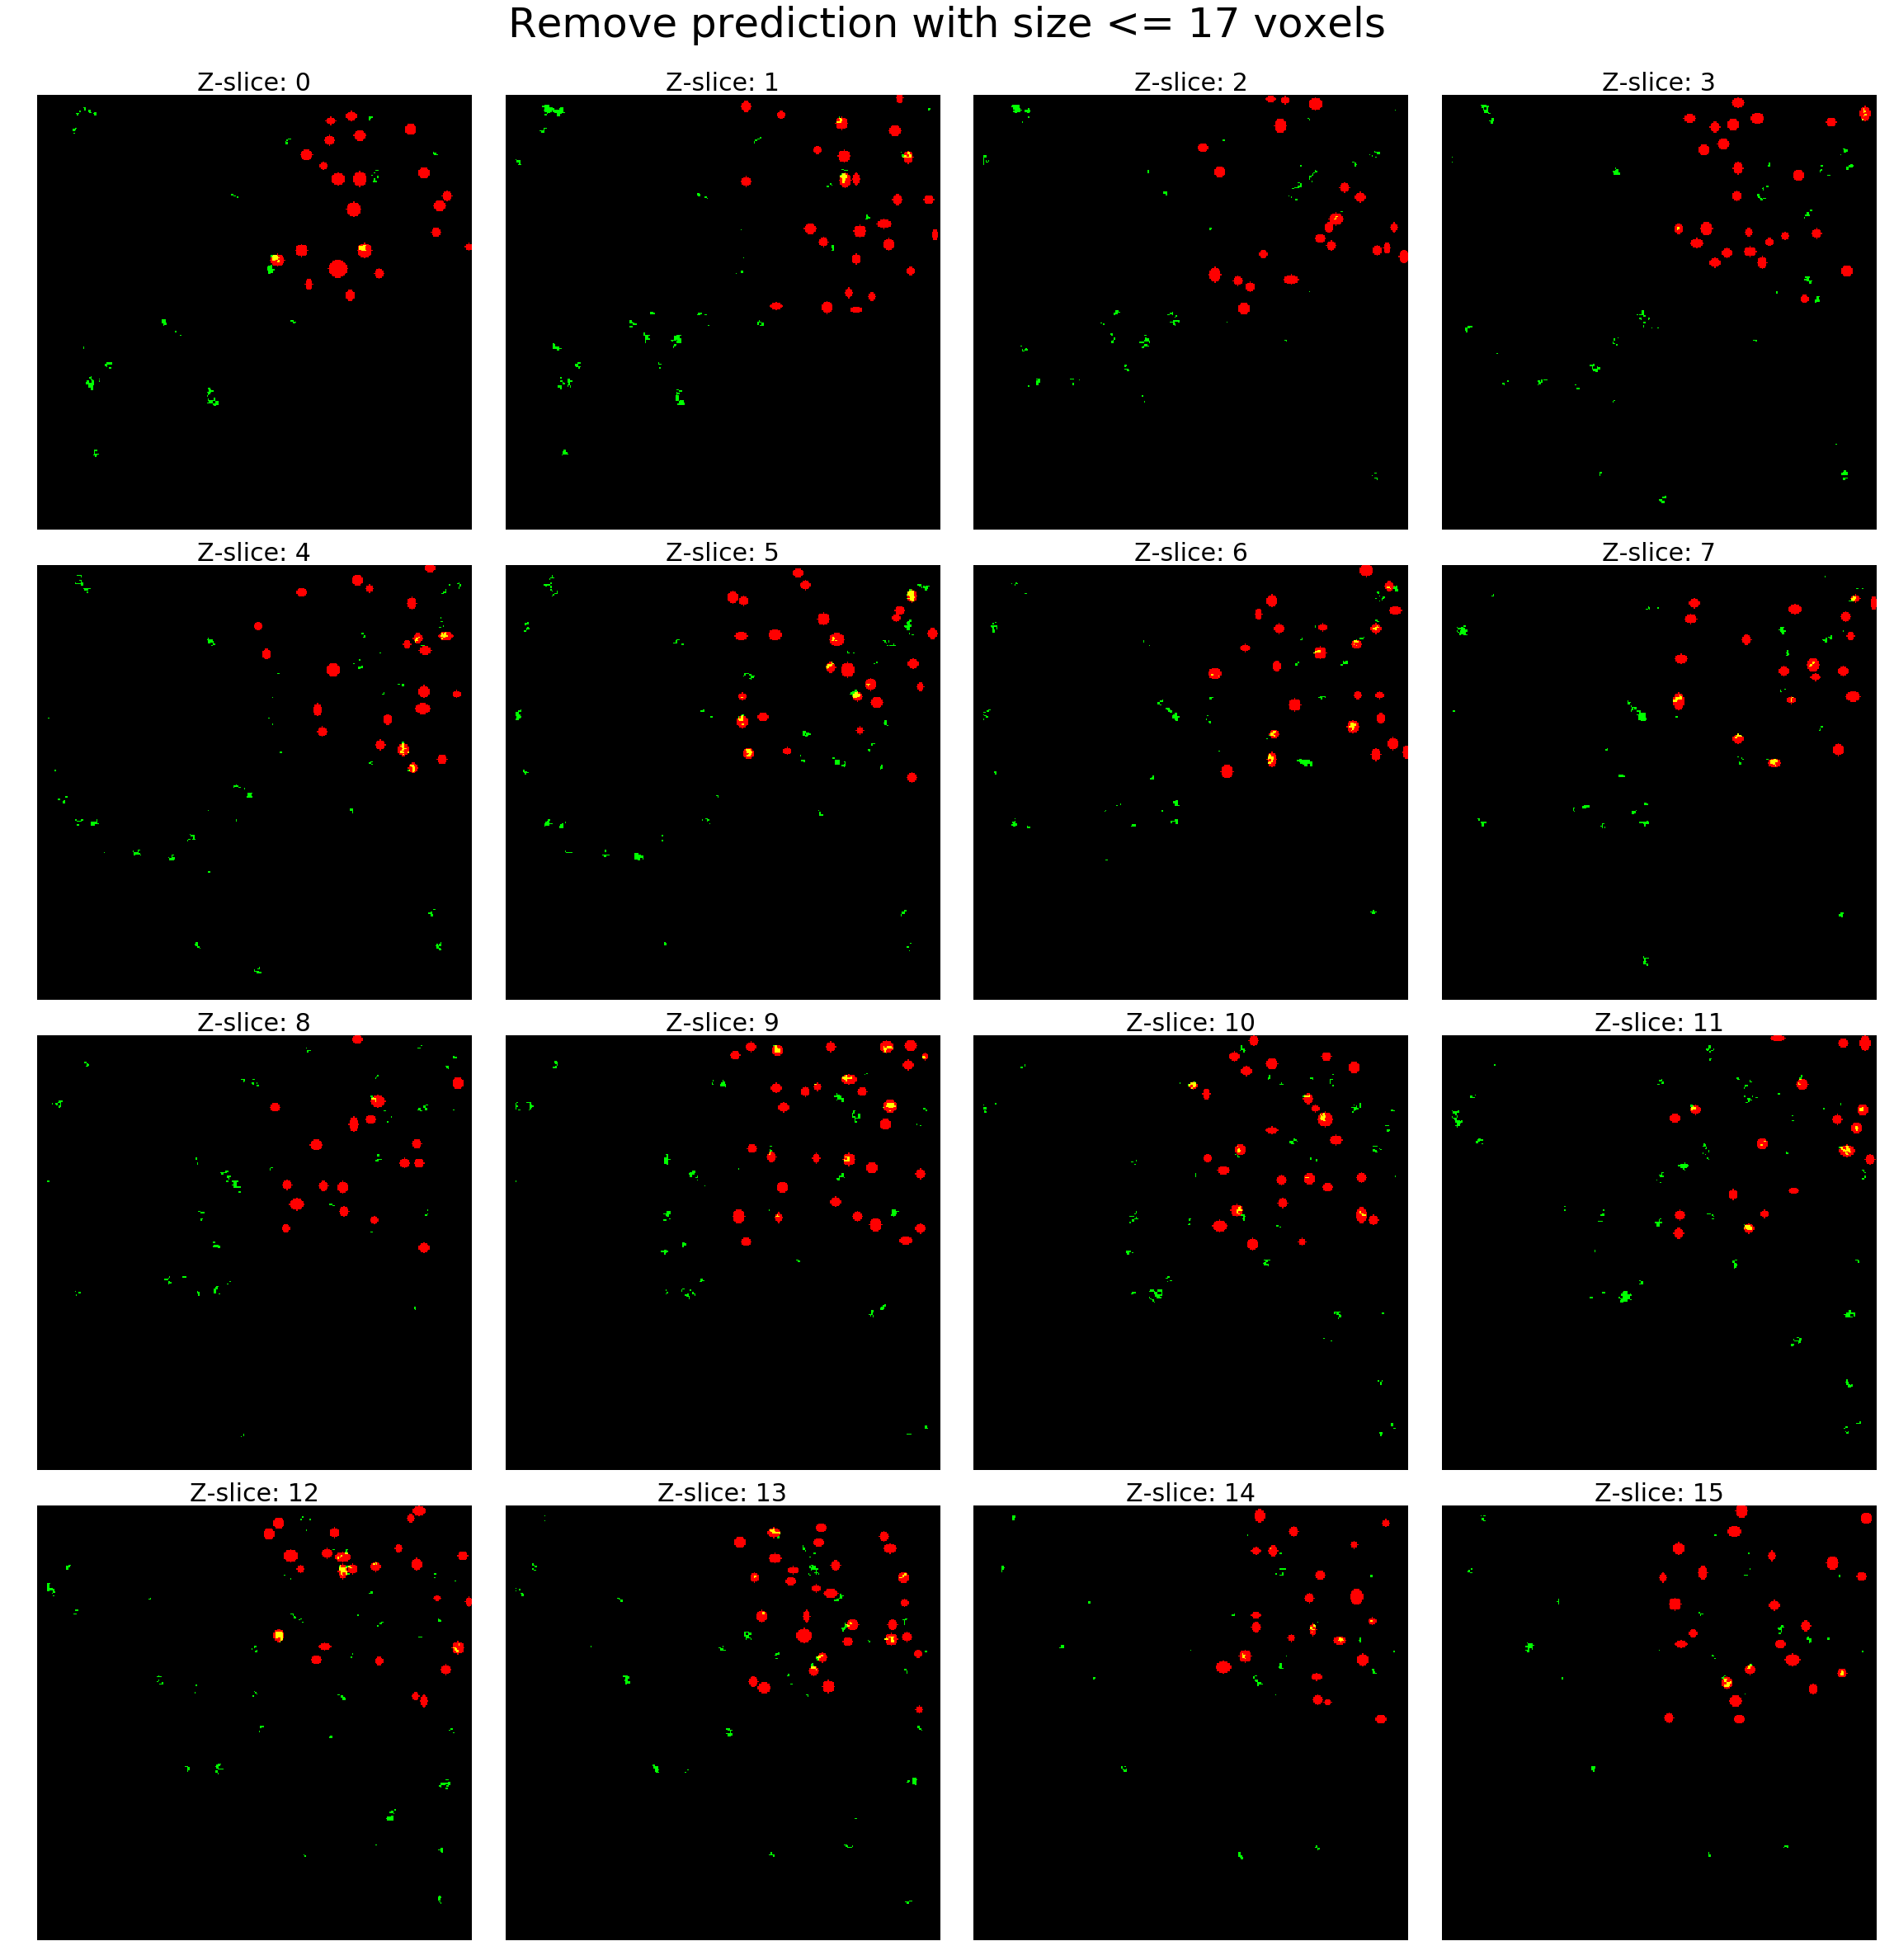

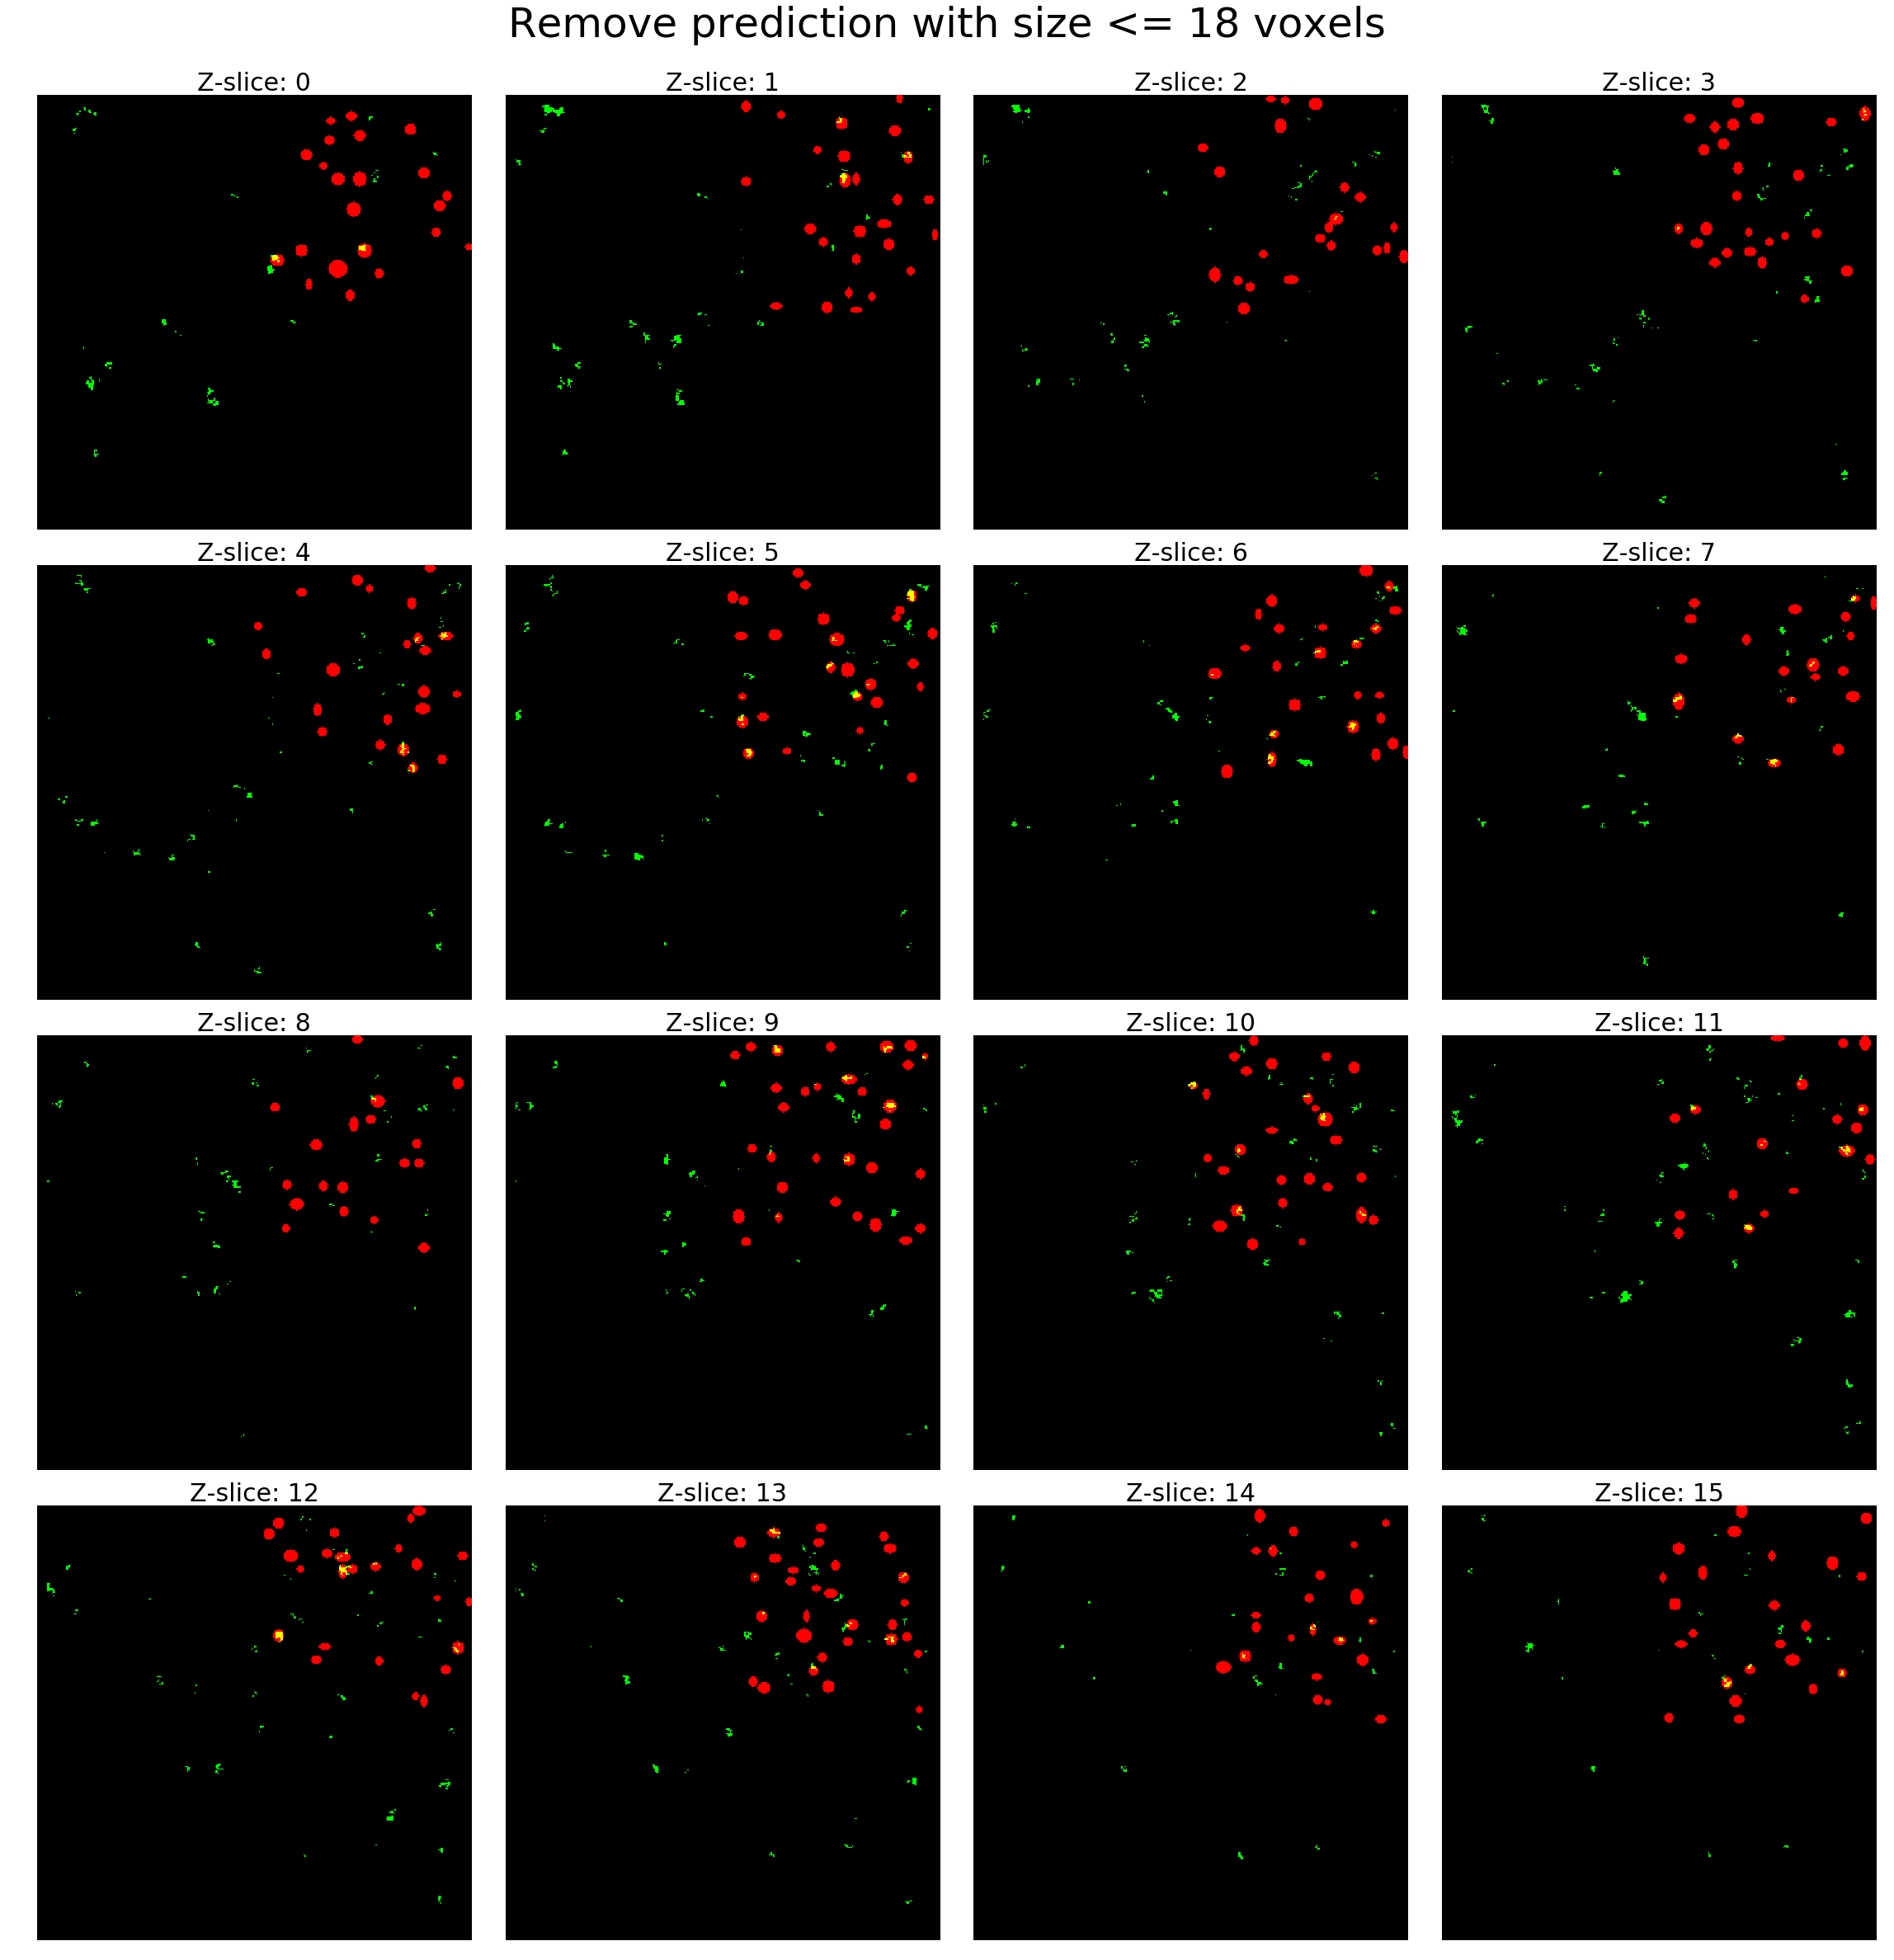

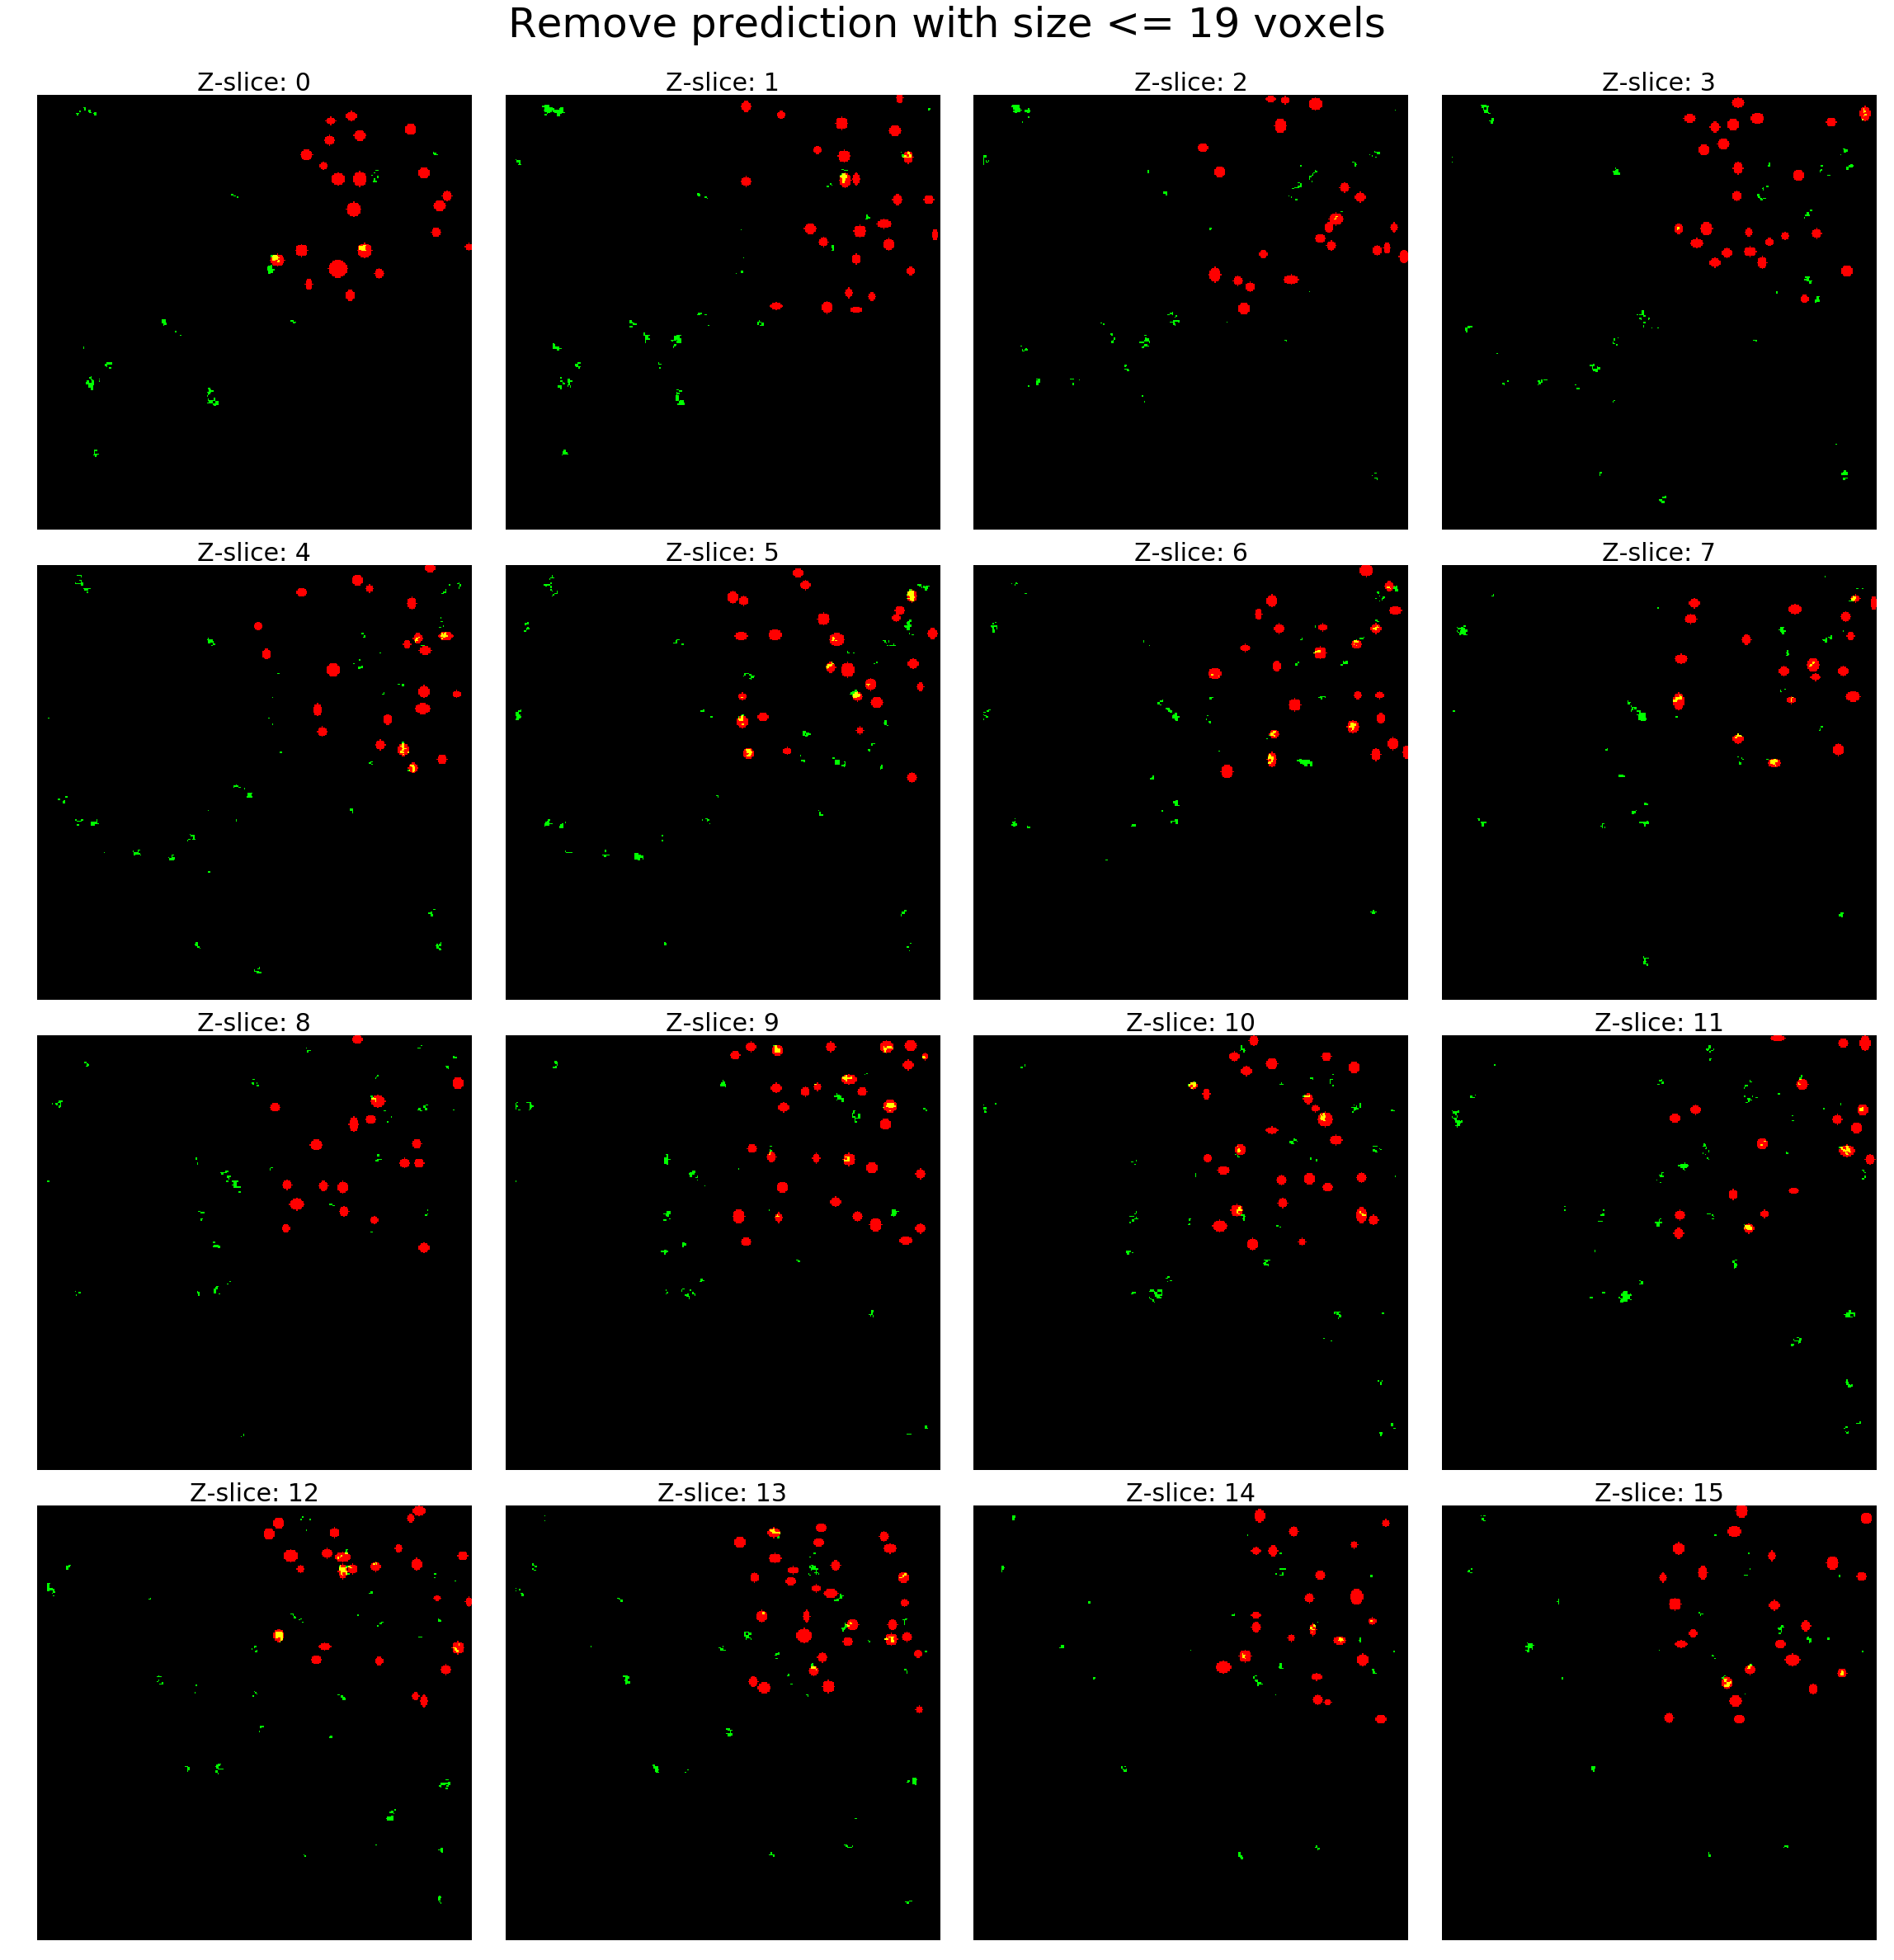

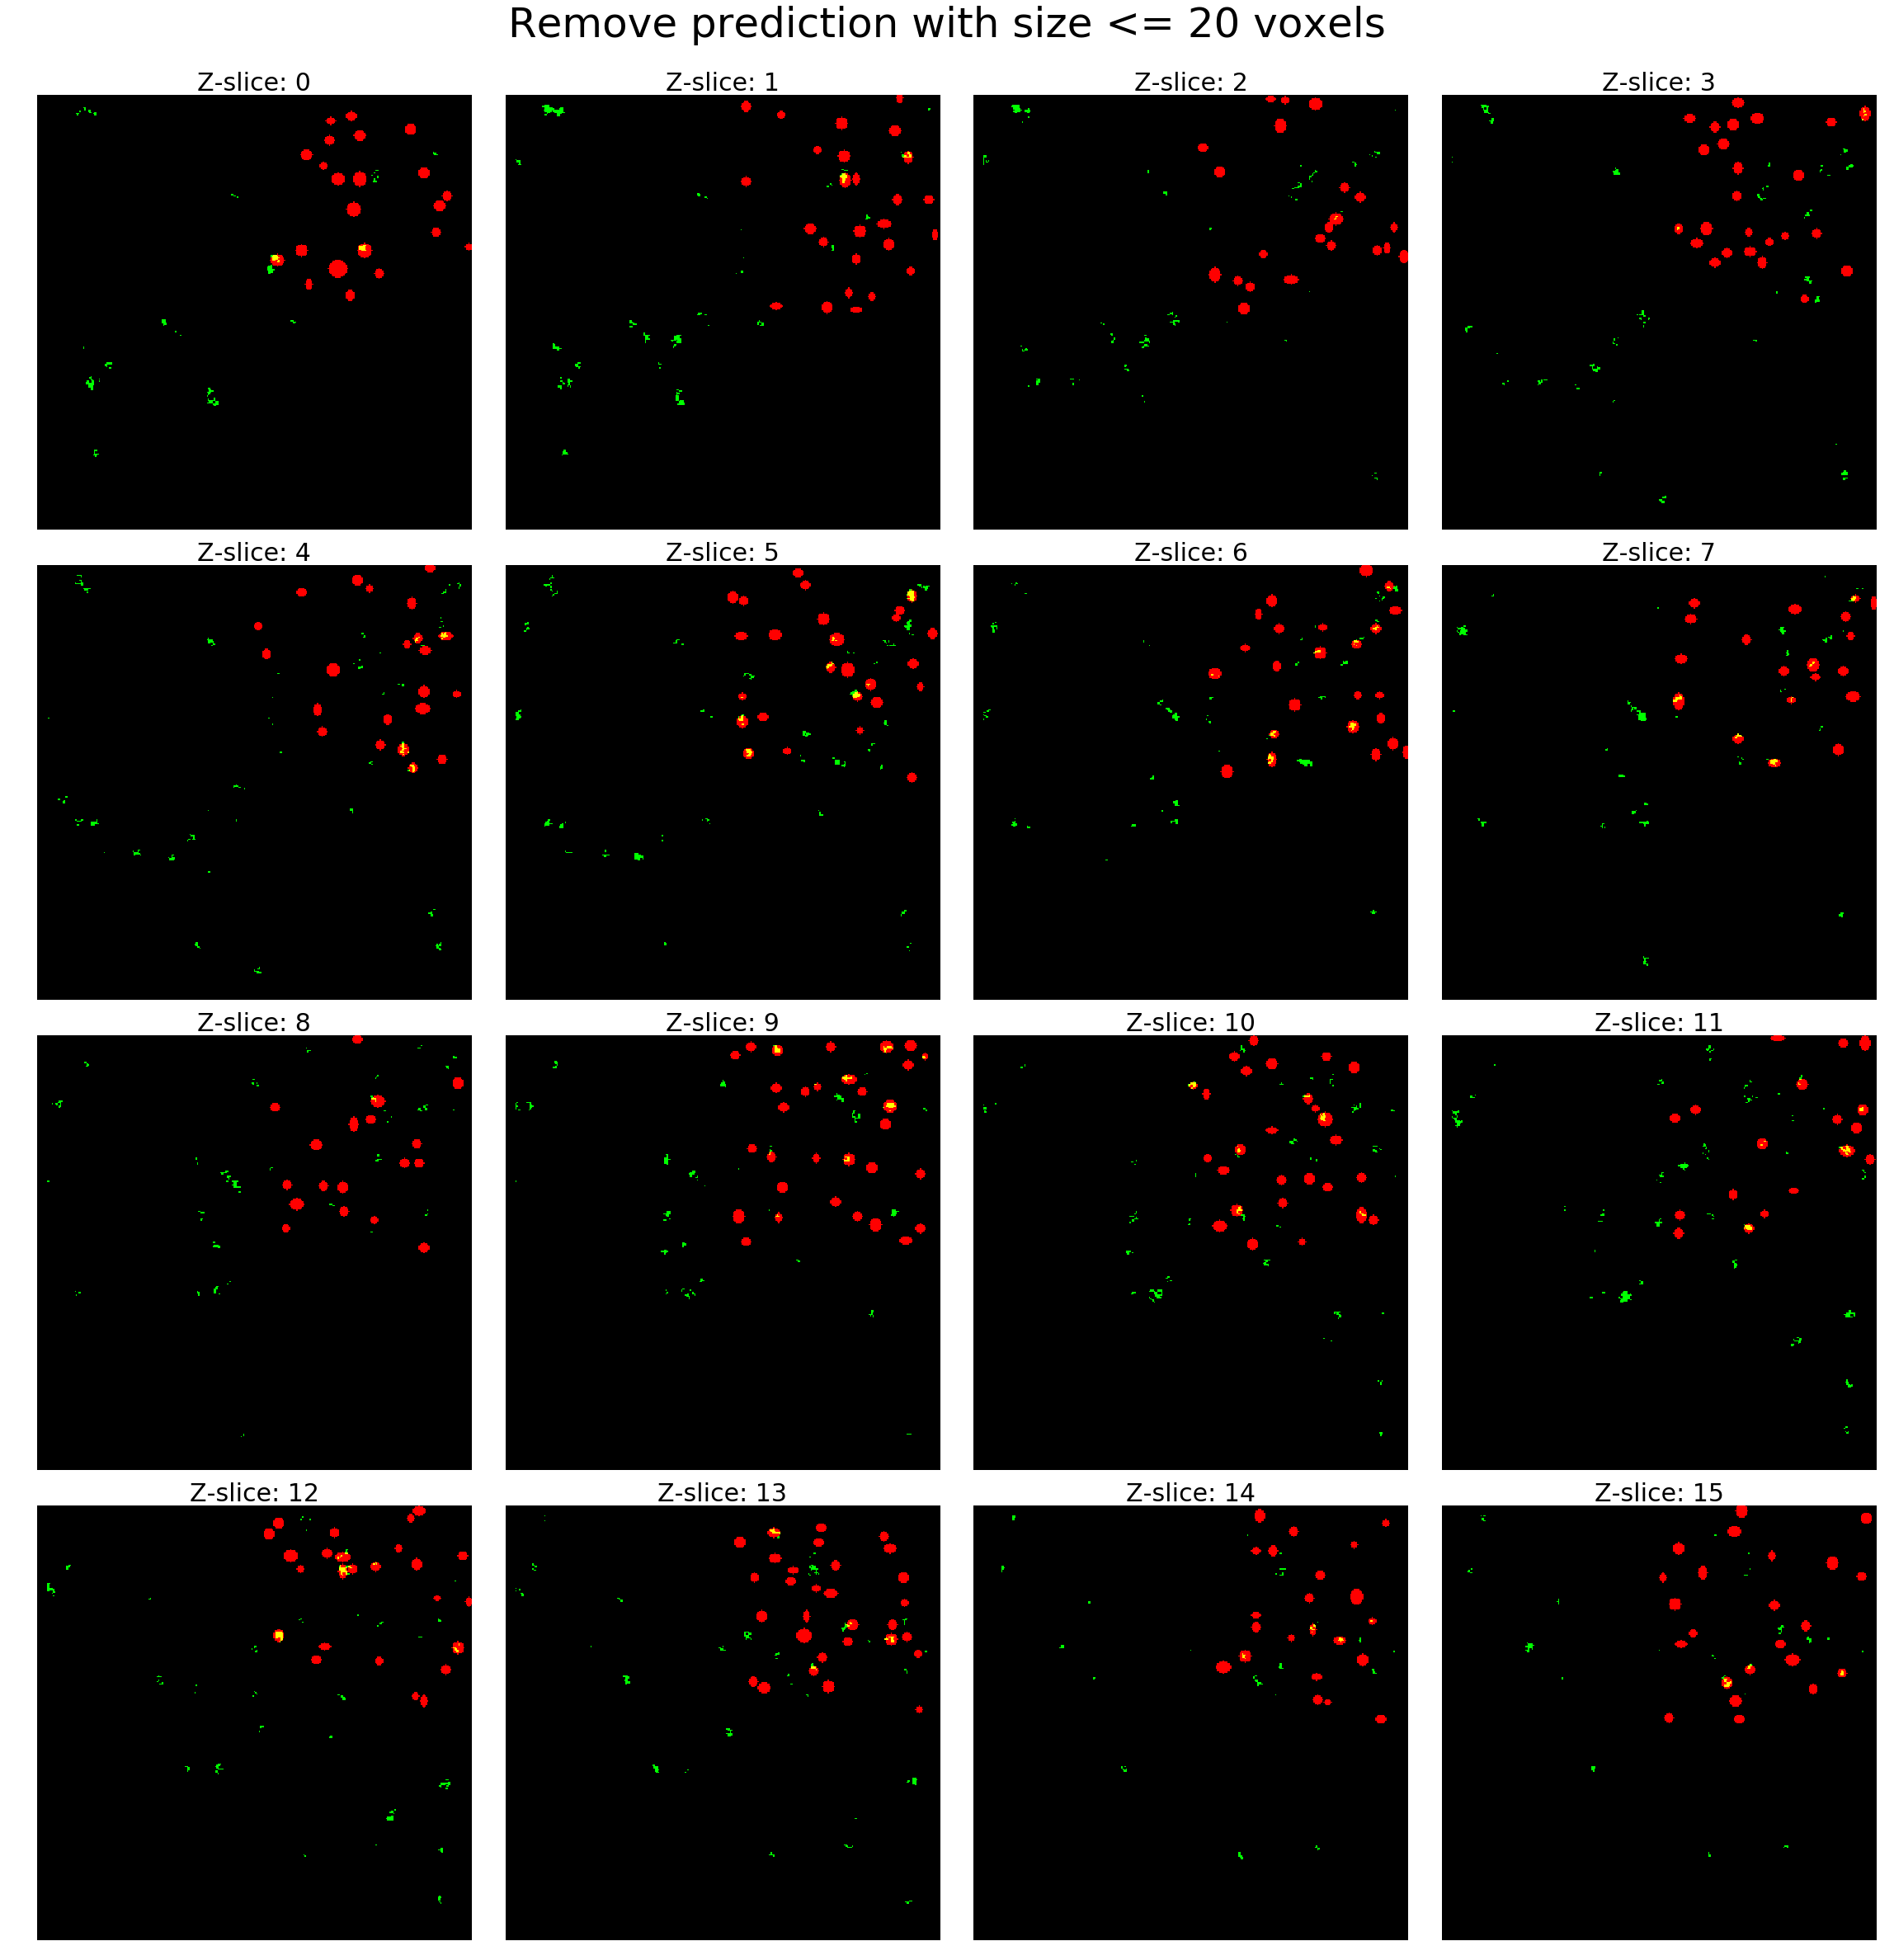

In [12]:
for idx, img in enumerate(img_arr):
    title = 'Remove prediction with size <= {} voxels'.format(idx + 1)
    overlay = overlay_images(annotation, img)
    fig = plot_volume(overlay, title=title)
    display.display(fig)

## For slicespan=1

Remove predictions with sizes less than 20

In [13]:
img_arr = [remove_labels(predictions_span_1, i) for i in range(1, 21)]

See how many predictions are left after removing small things

In [14]:
for idx, img in enumerate(img_arr):
    n = len(np.unique(img.ravel())[1:])
    print('Voxel size: {}\t Number of predictions: {}'.format(idx+1, n))

Voxel size: 1	 Number of predictions: 4170
Voxel size: 2	 Number of predictions: 2542
Voxel size: 3	 Number of predictions: 1864
Voxel size: 4	 Number of predictions: 1450
Voxel size: 5	 Number of predictions: 1160
Voxel size: 6	 Number of predictions: 994
Voxel size: 7	 Number of predictions: 855
Voxel size: 8	 Number of predictions: 771
Voxel size: 9	 Number of predictions: 700
Voxel size: 10	 Number of predictions: 638
Voxel size: 11	 Number of predictions: 595
Voxel size: 12	 Number of predictions: 541
Voxel size: 13	 Number of predictions: 509
Voxel size: 14	 Number of predictions: 475
Voxel size: 15	 Number of predictions: 457
Voxel size: 16	 Number of predictions: 429
Voxel size: 17	 Number of predictions: 407
Voxel size: 18	 Number of predictions: 382
Voxel size: 19	 Number of predictions: 360
Voxel size: 20	 Number of predictions: 341


Plot overlay images

/Users/jaewonc78/Envs/nomads/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


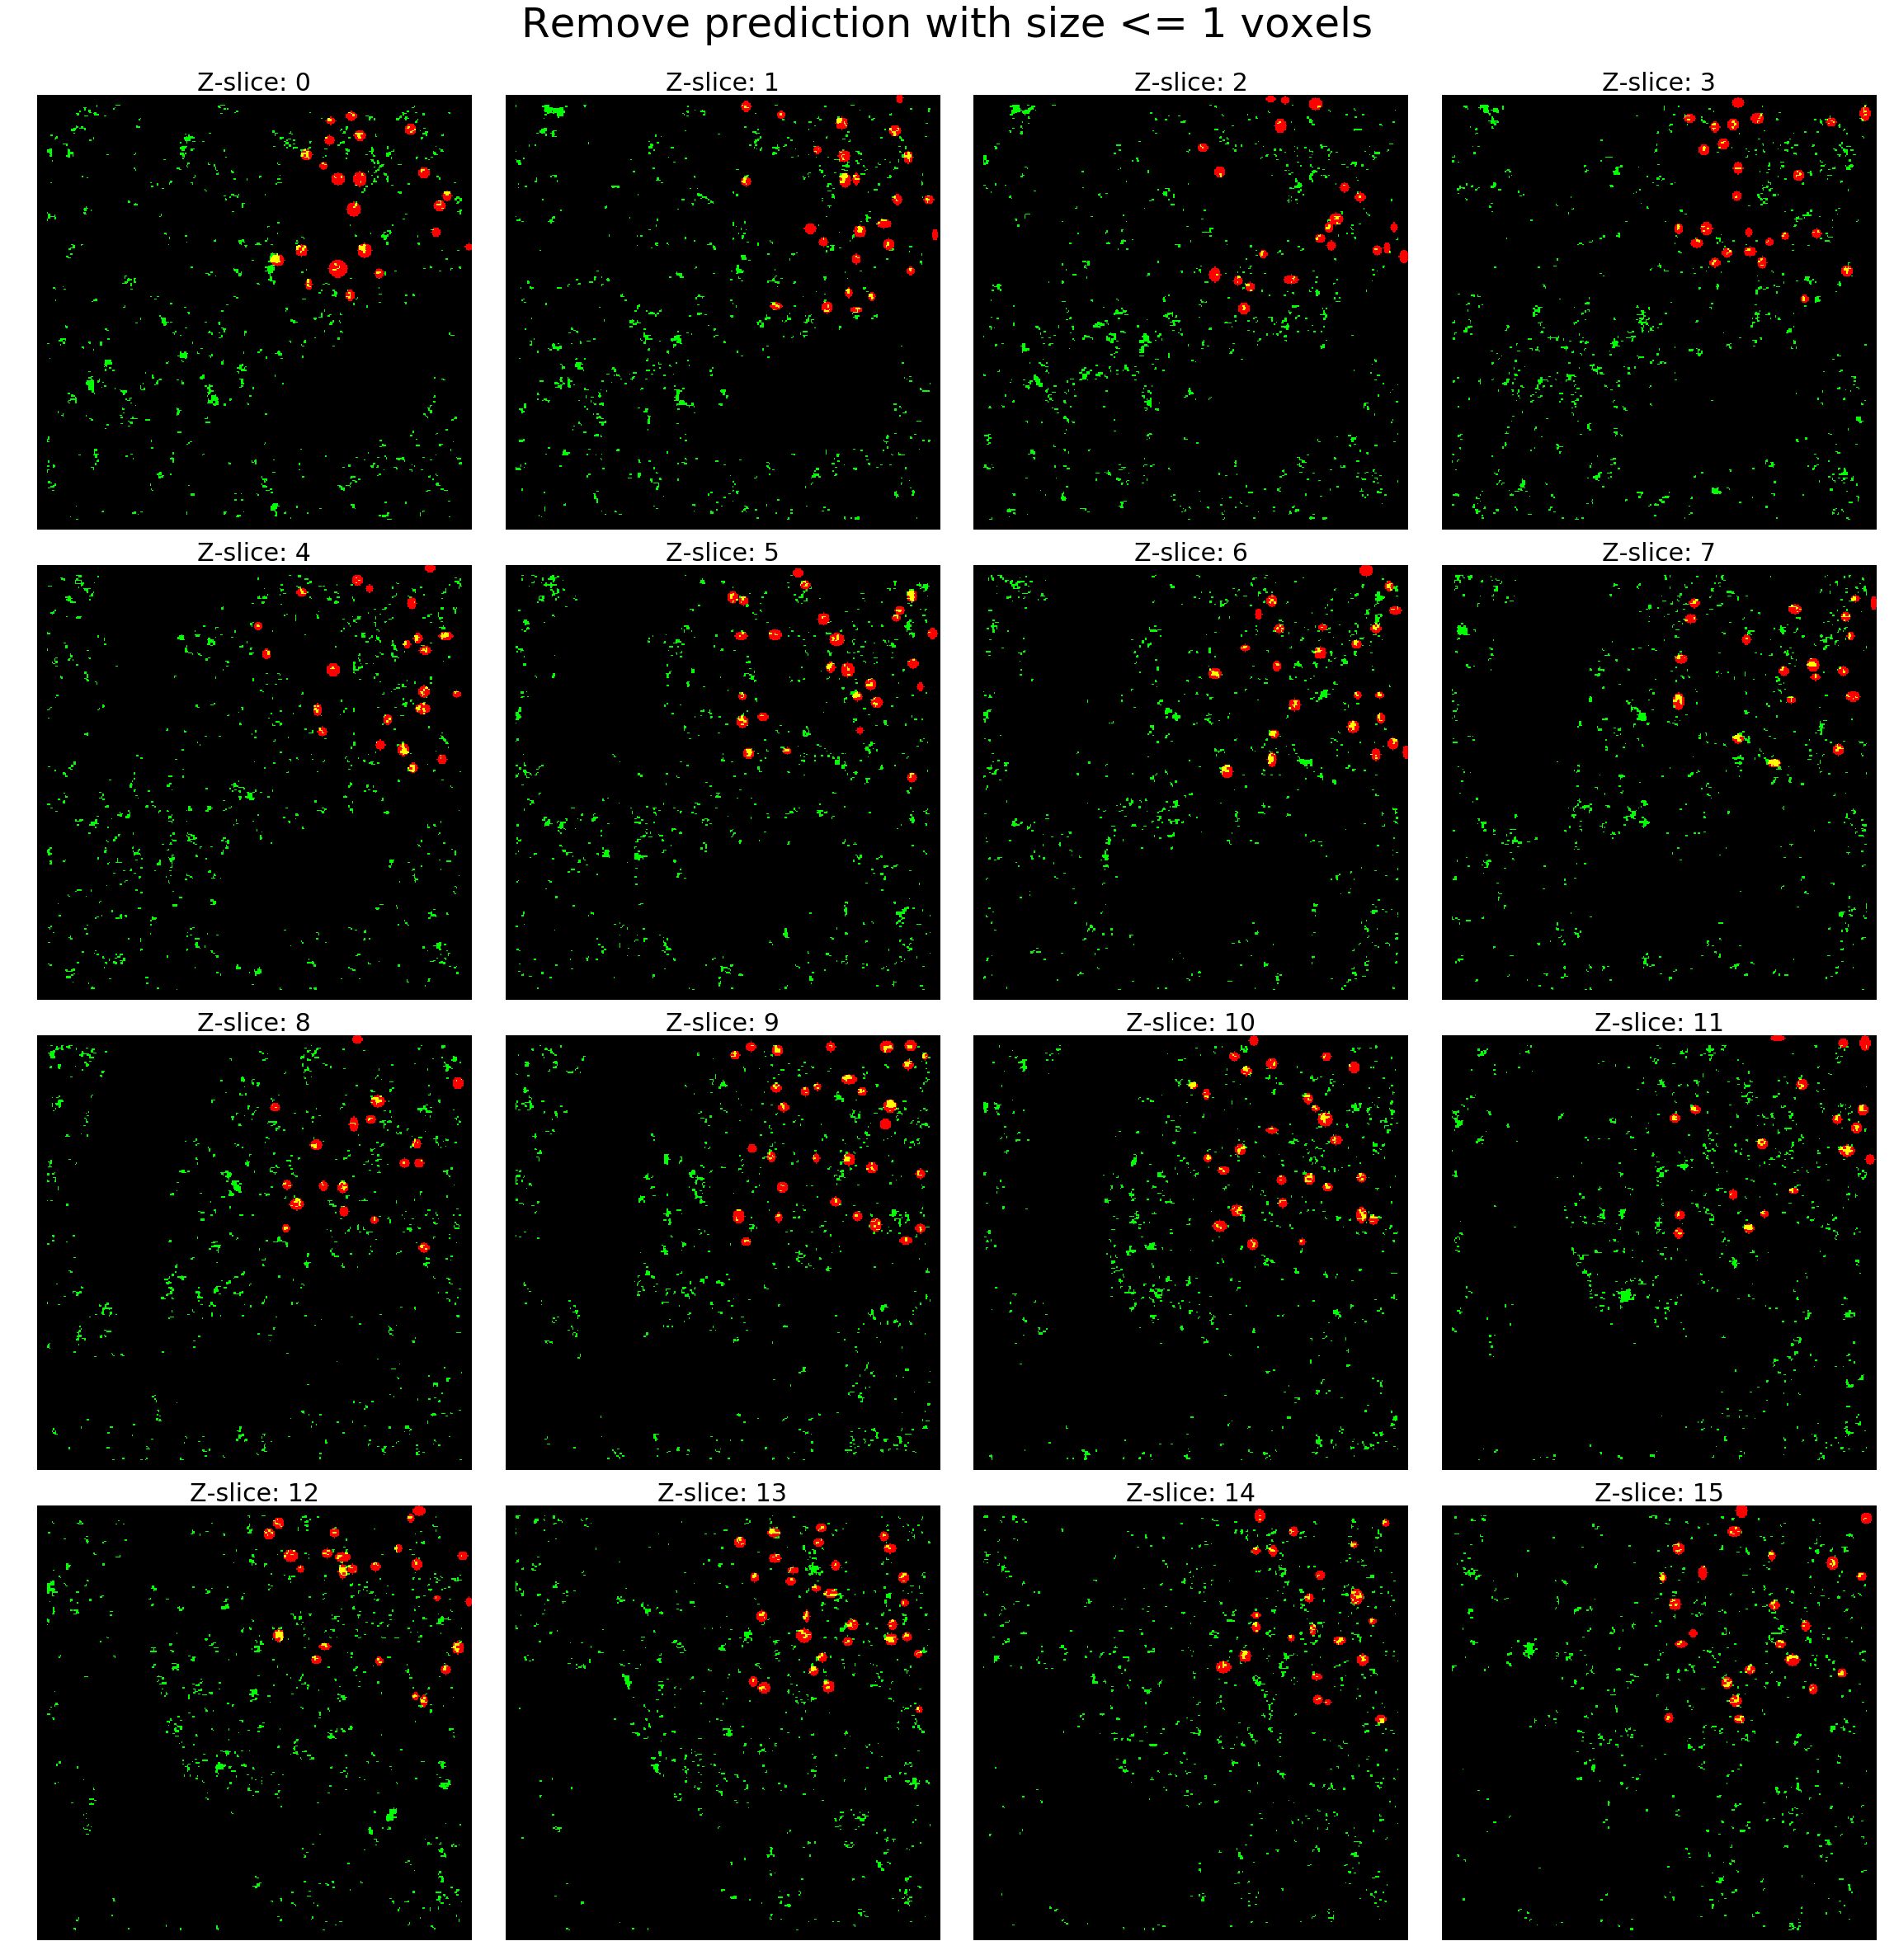

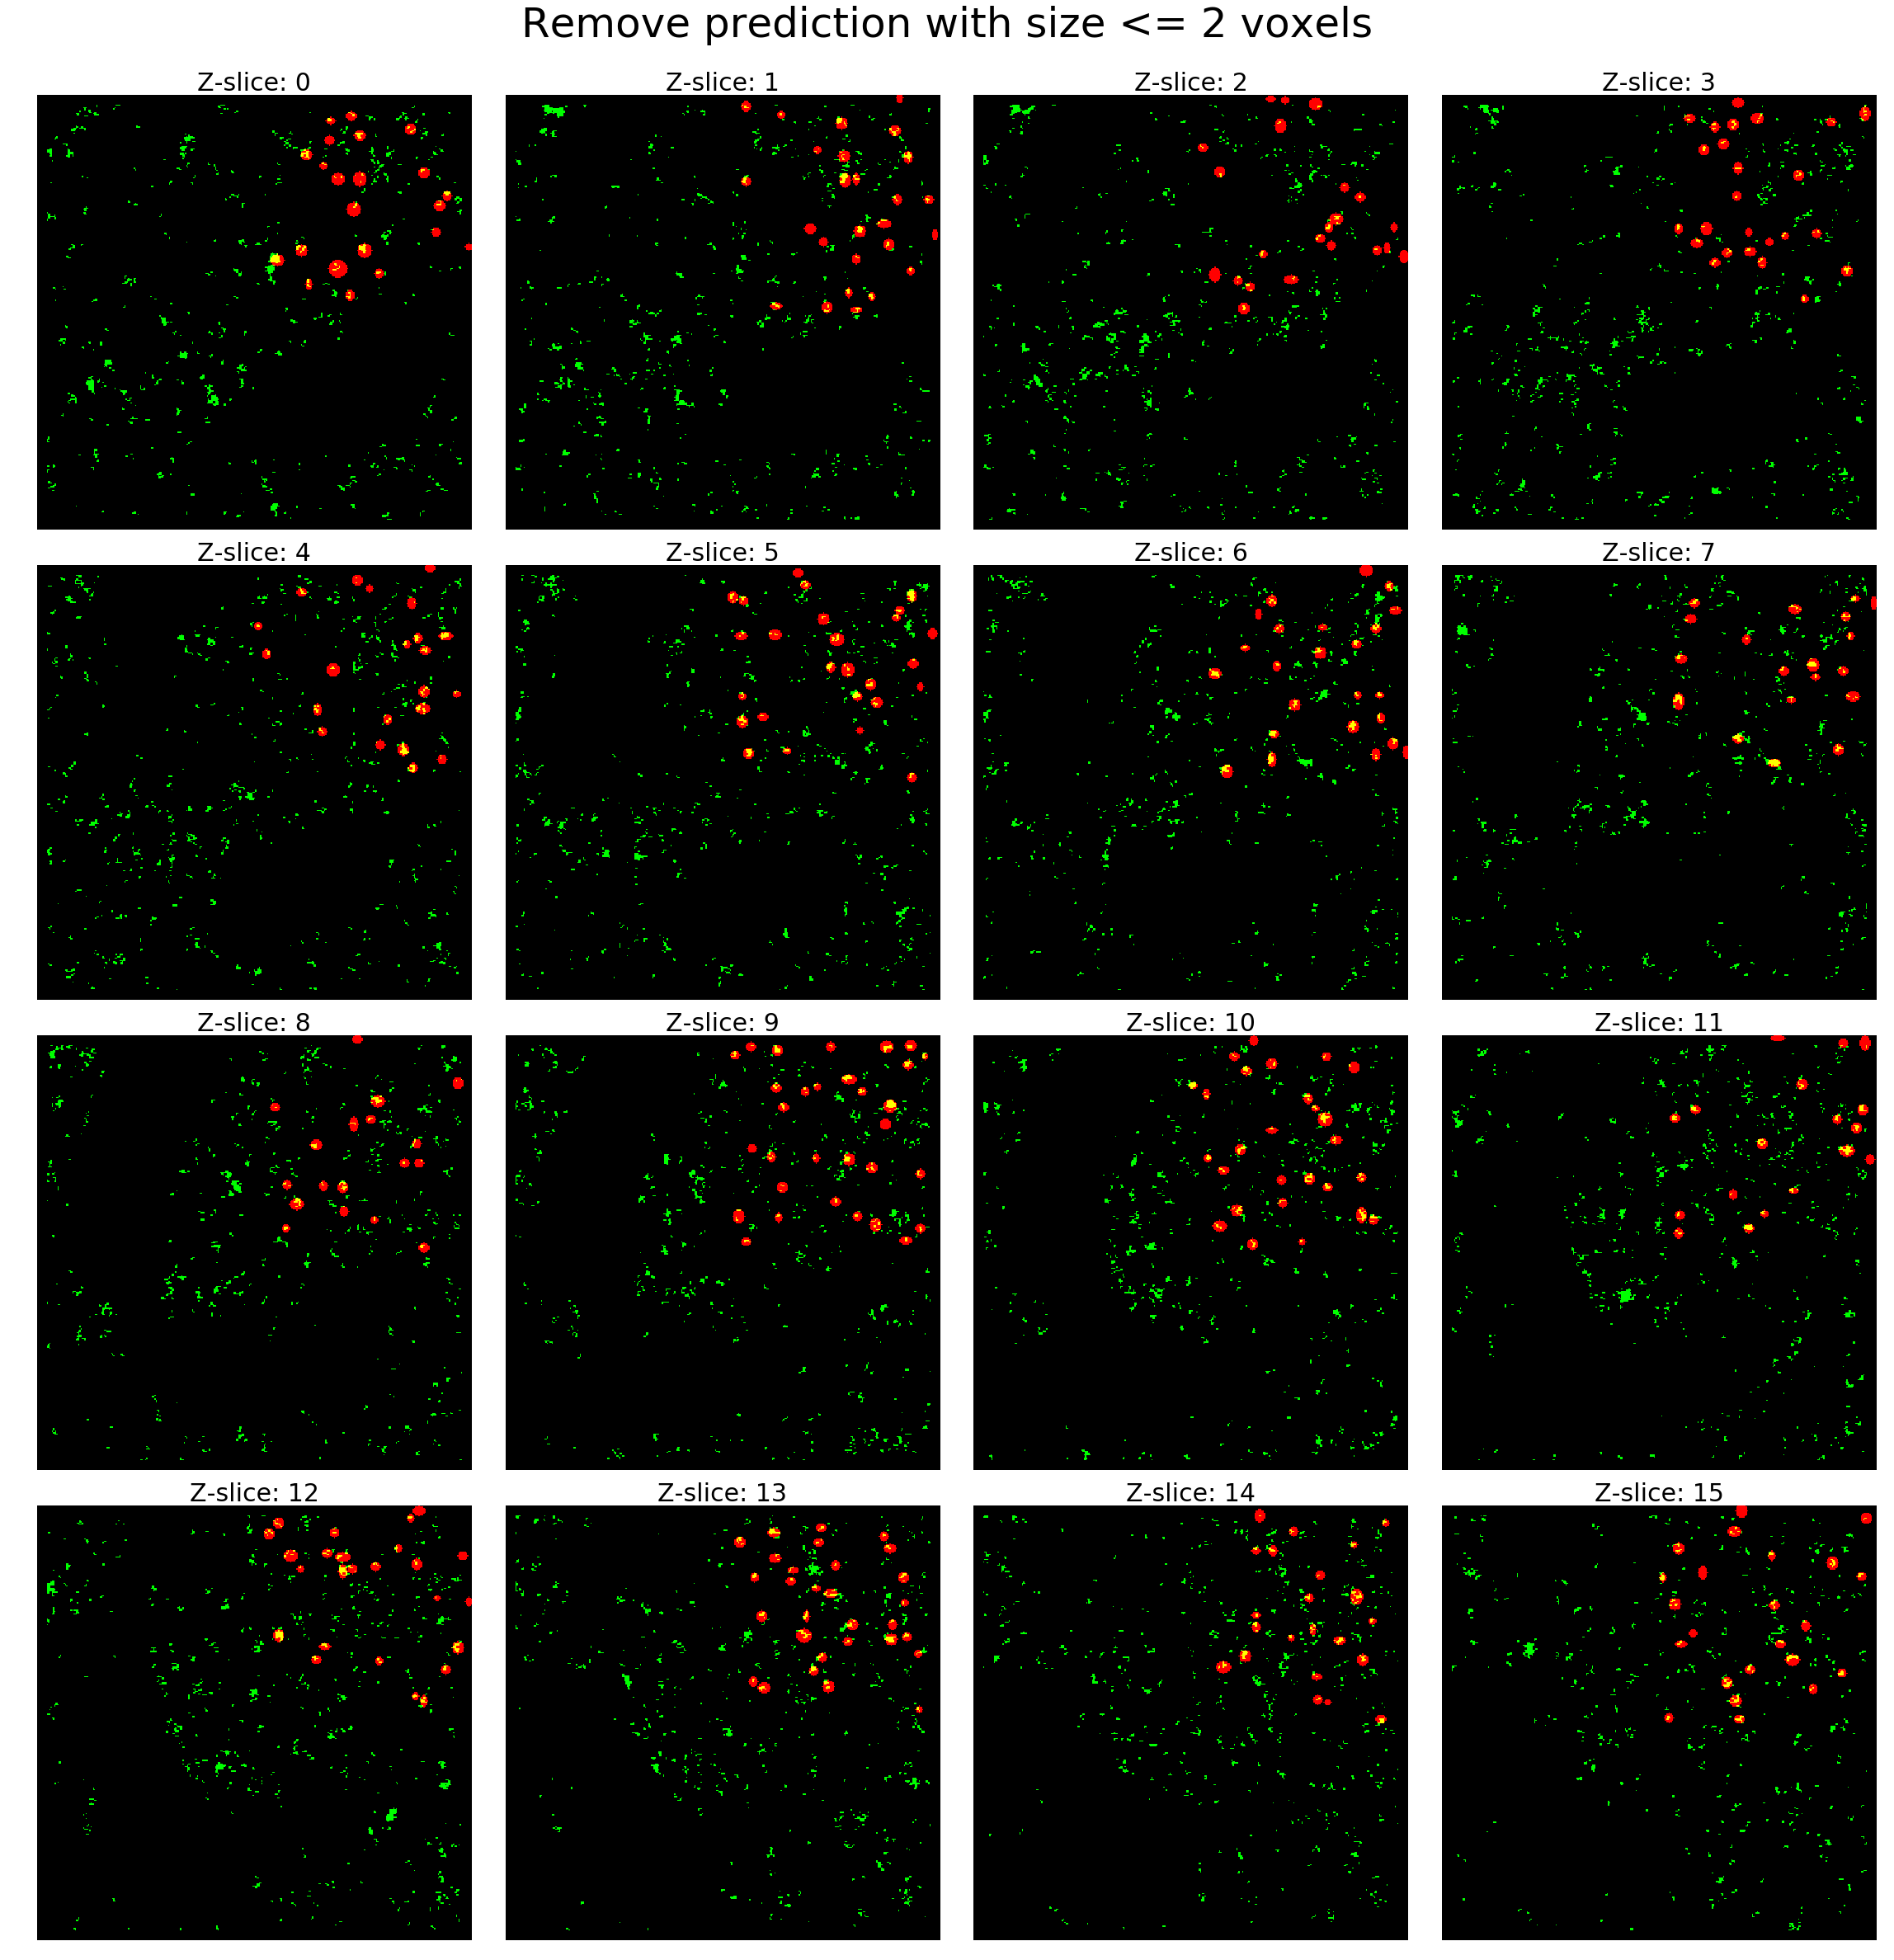

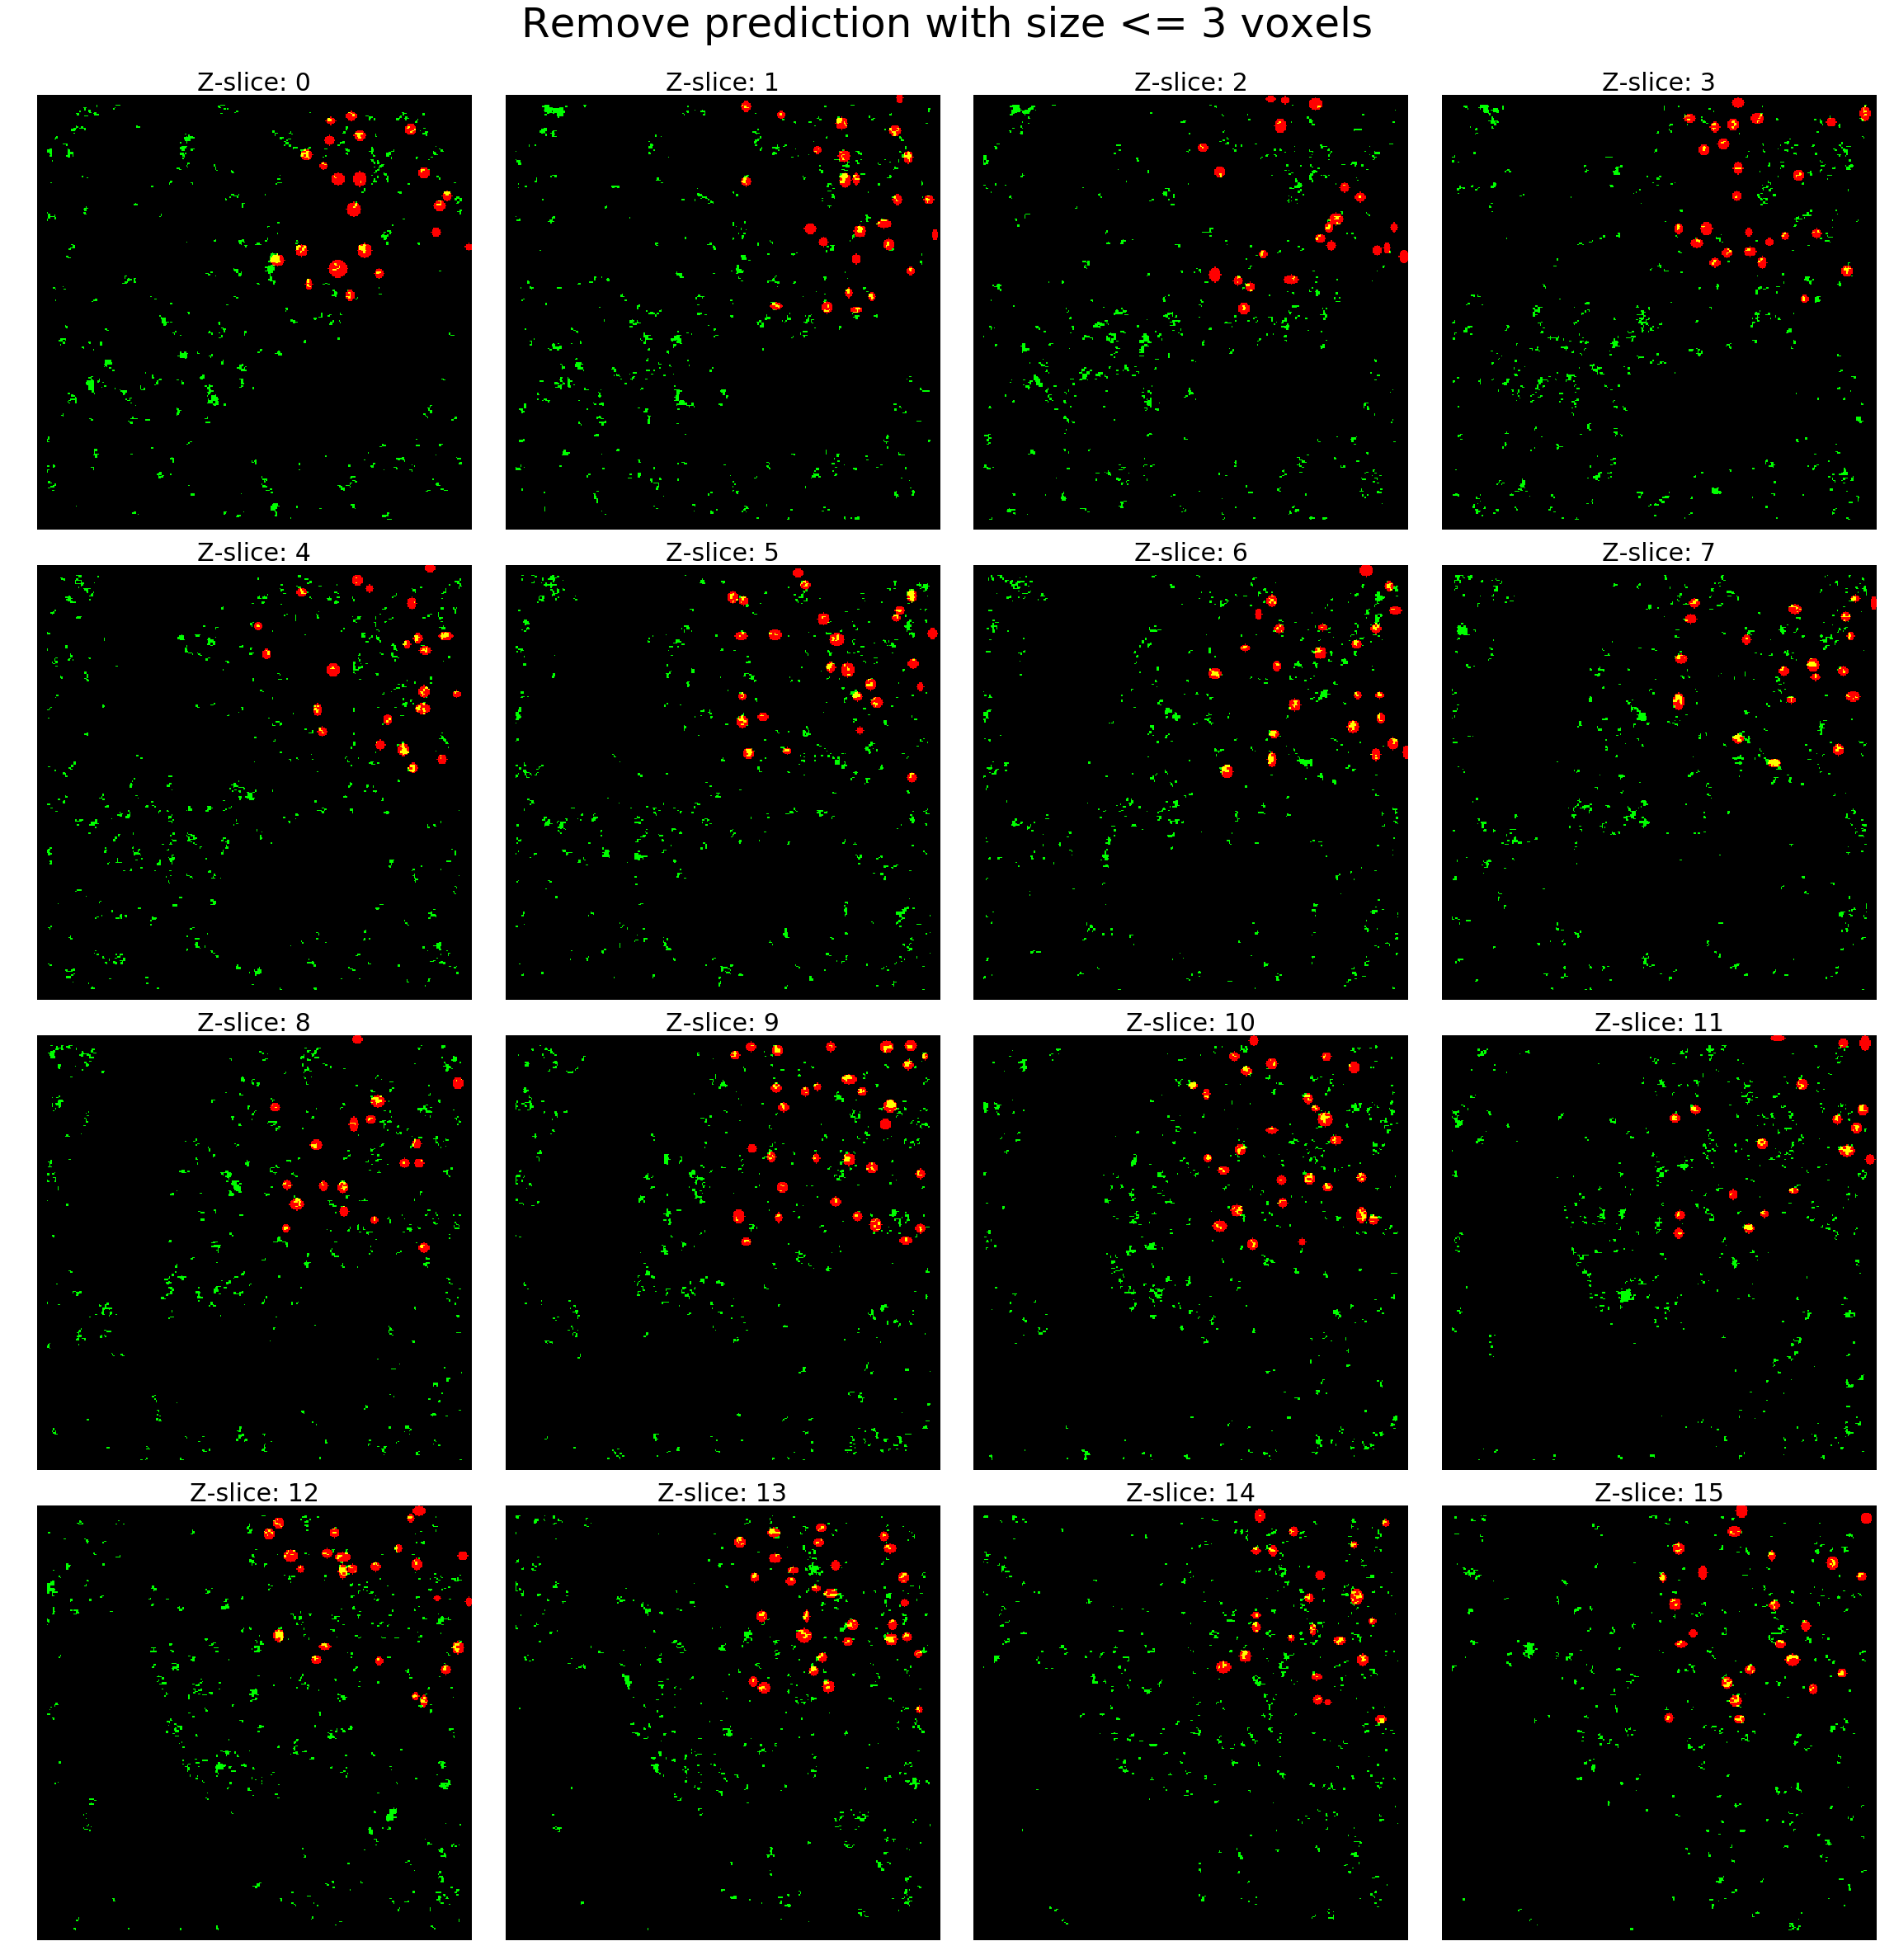

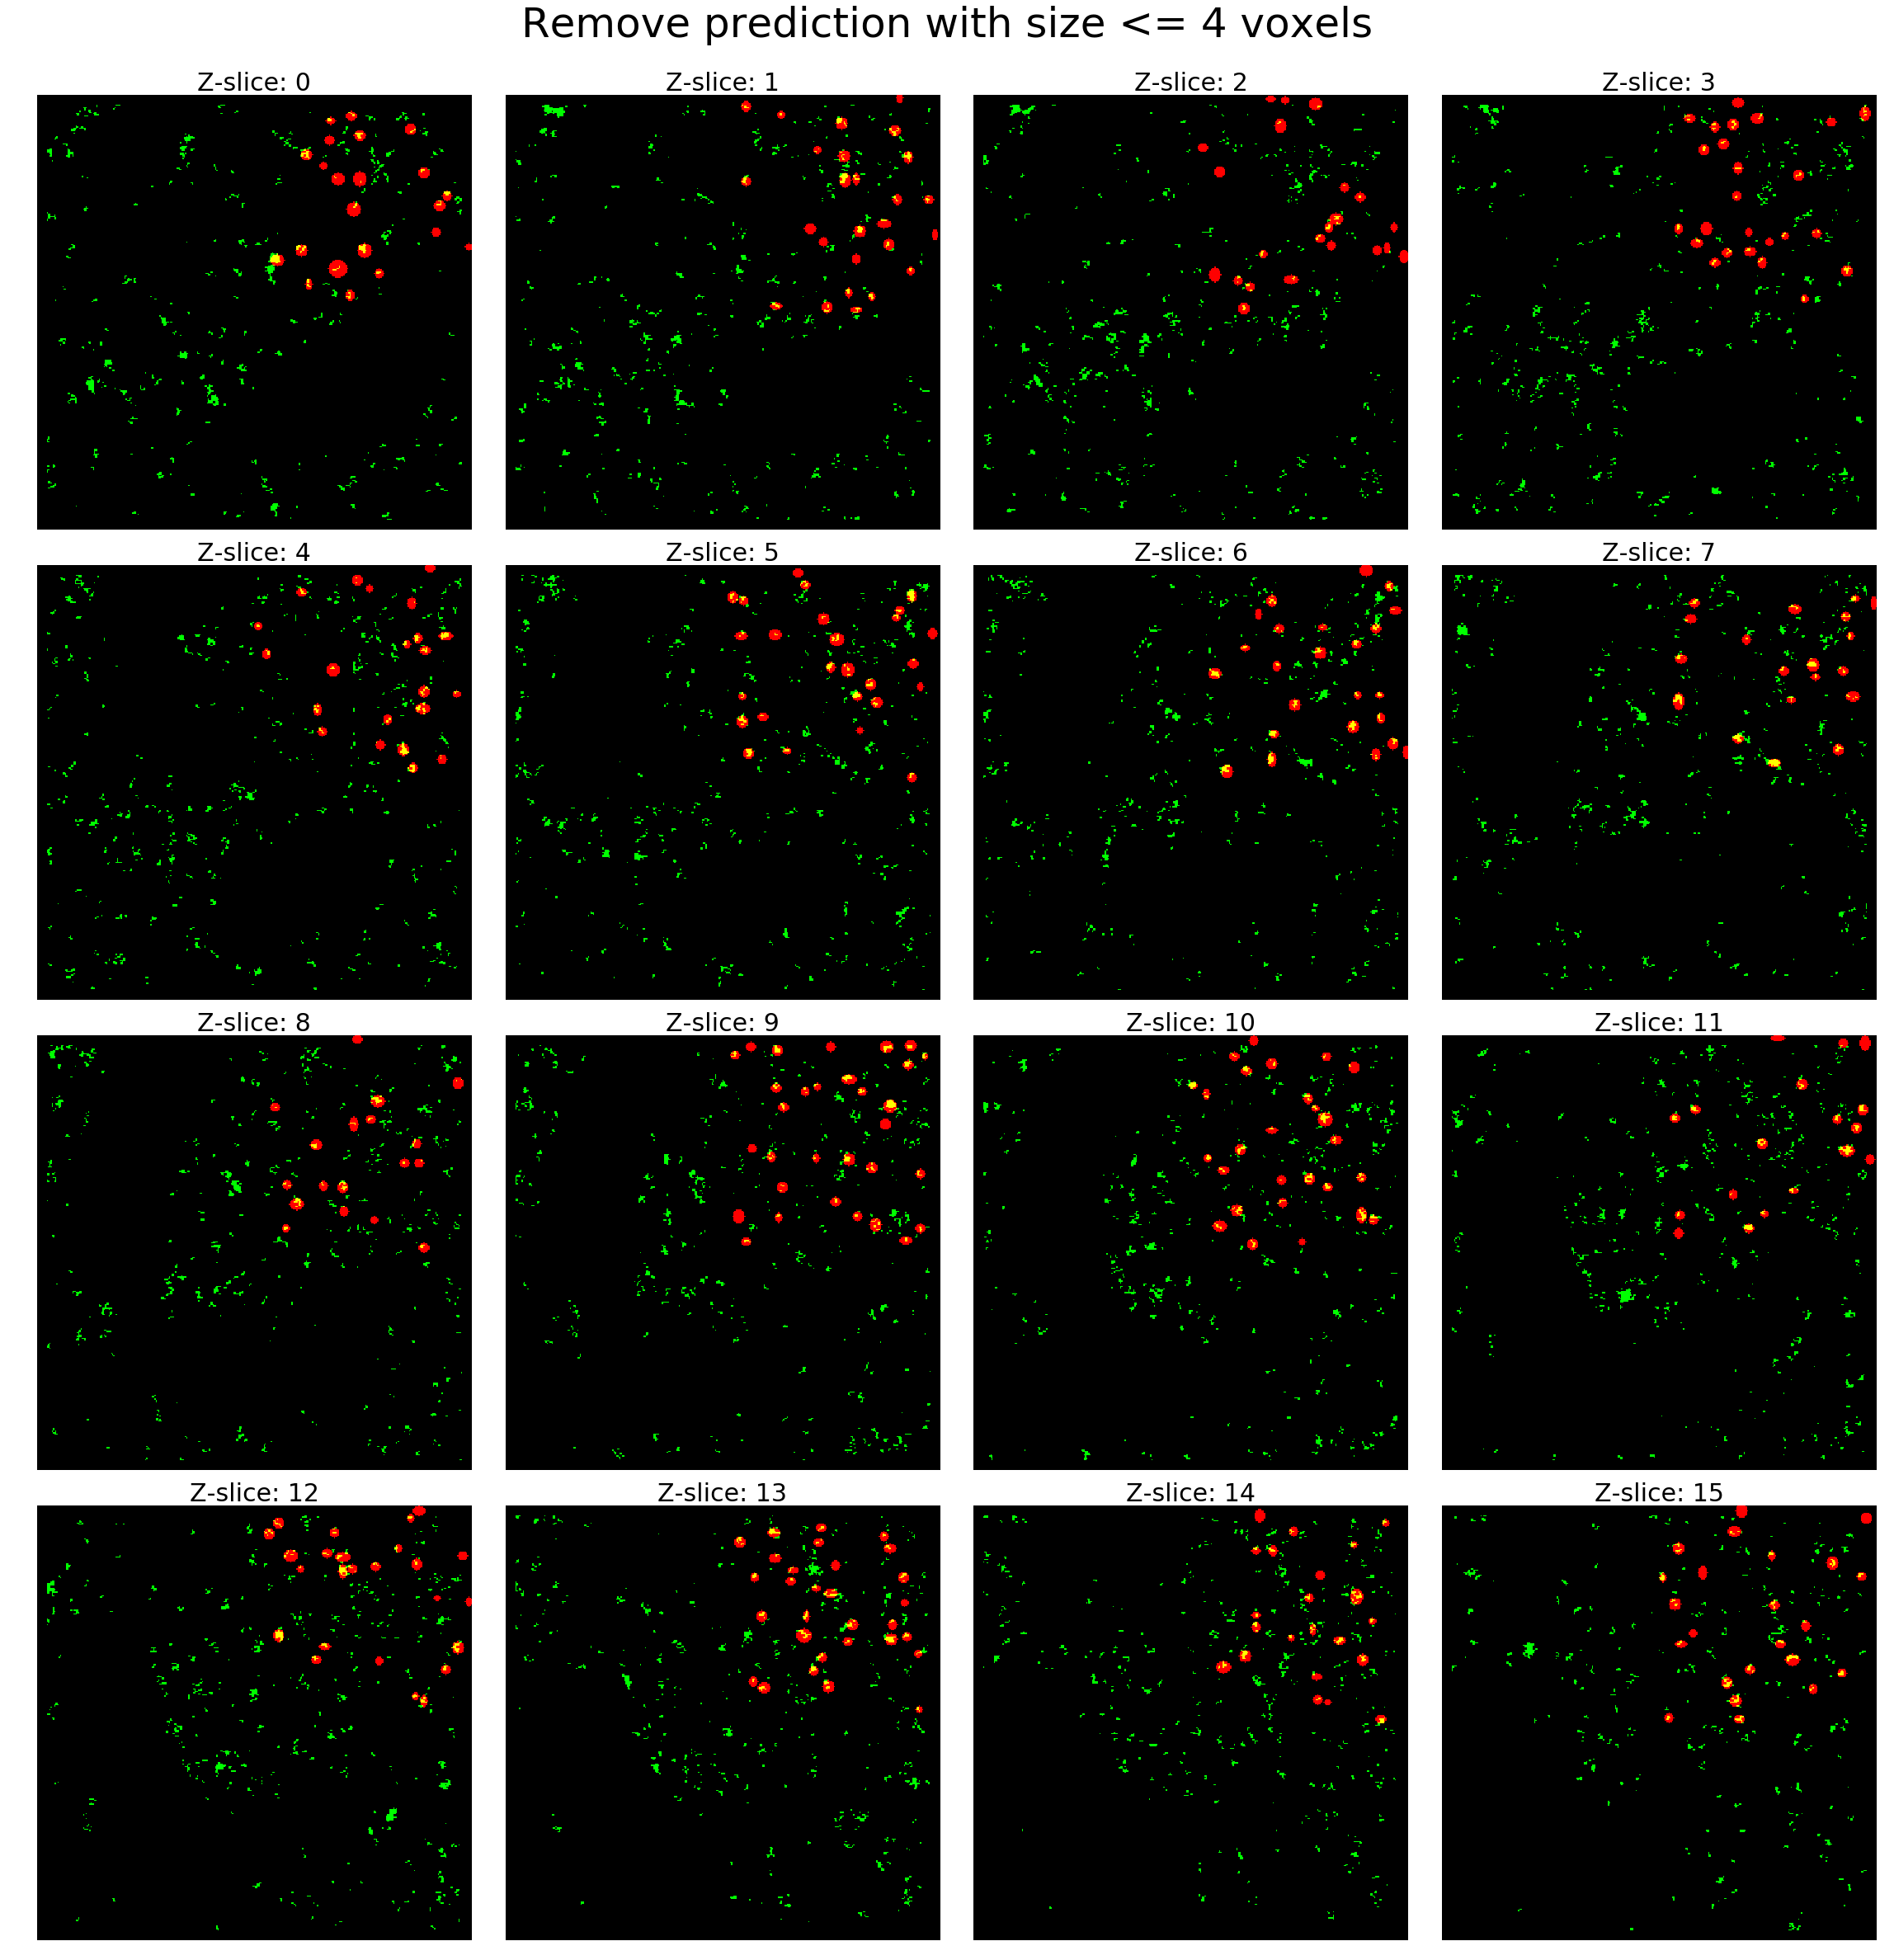

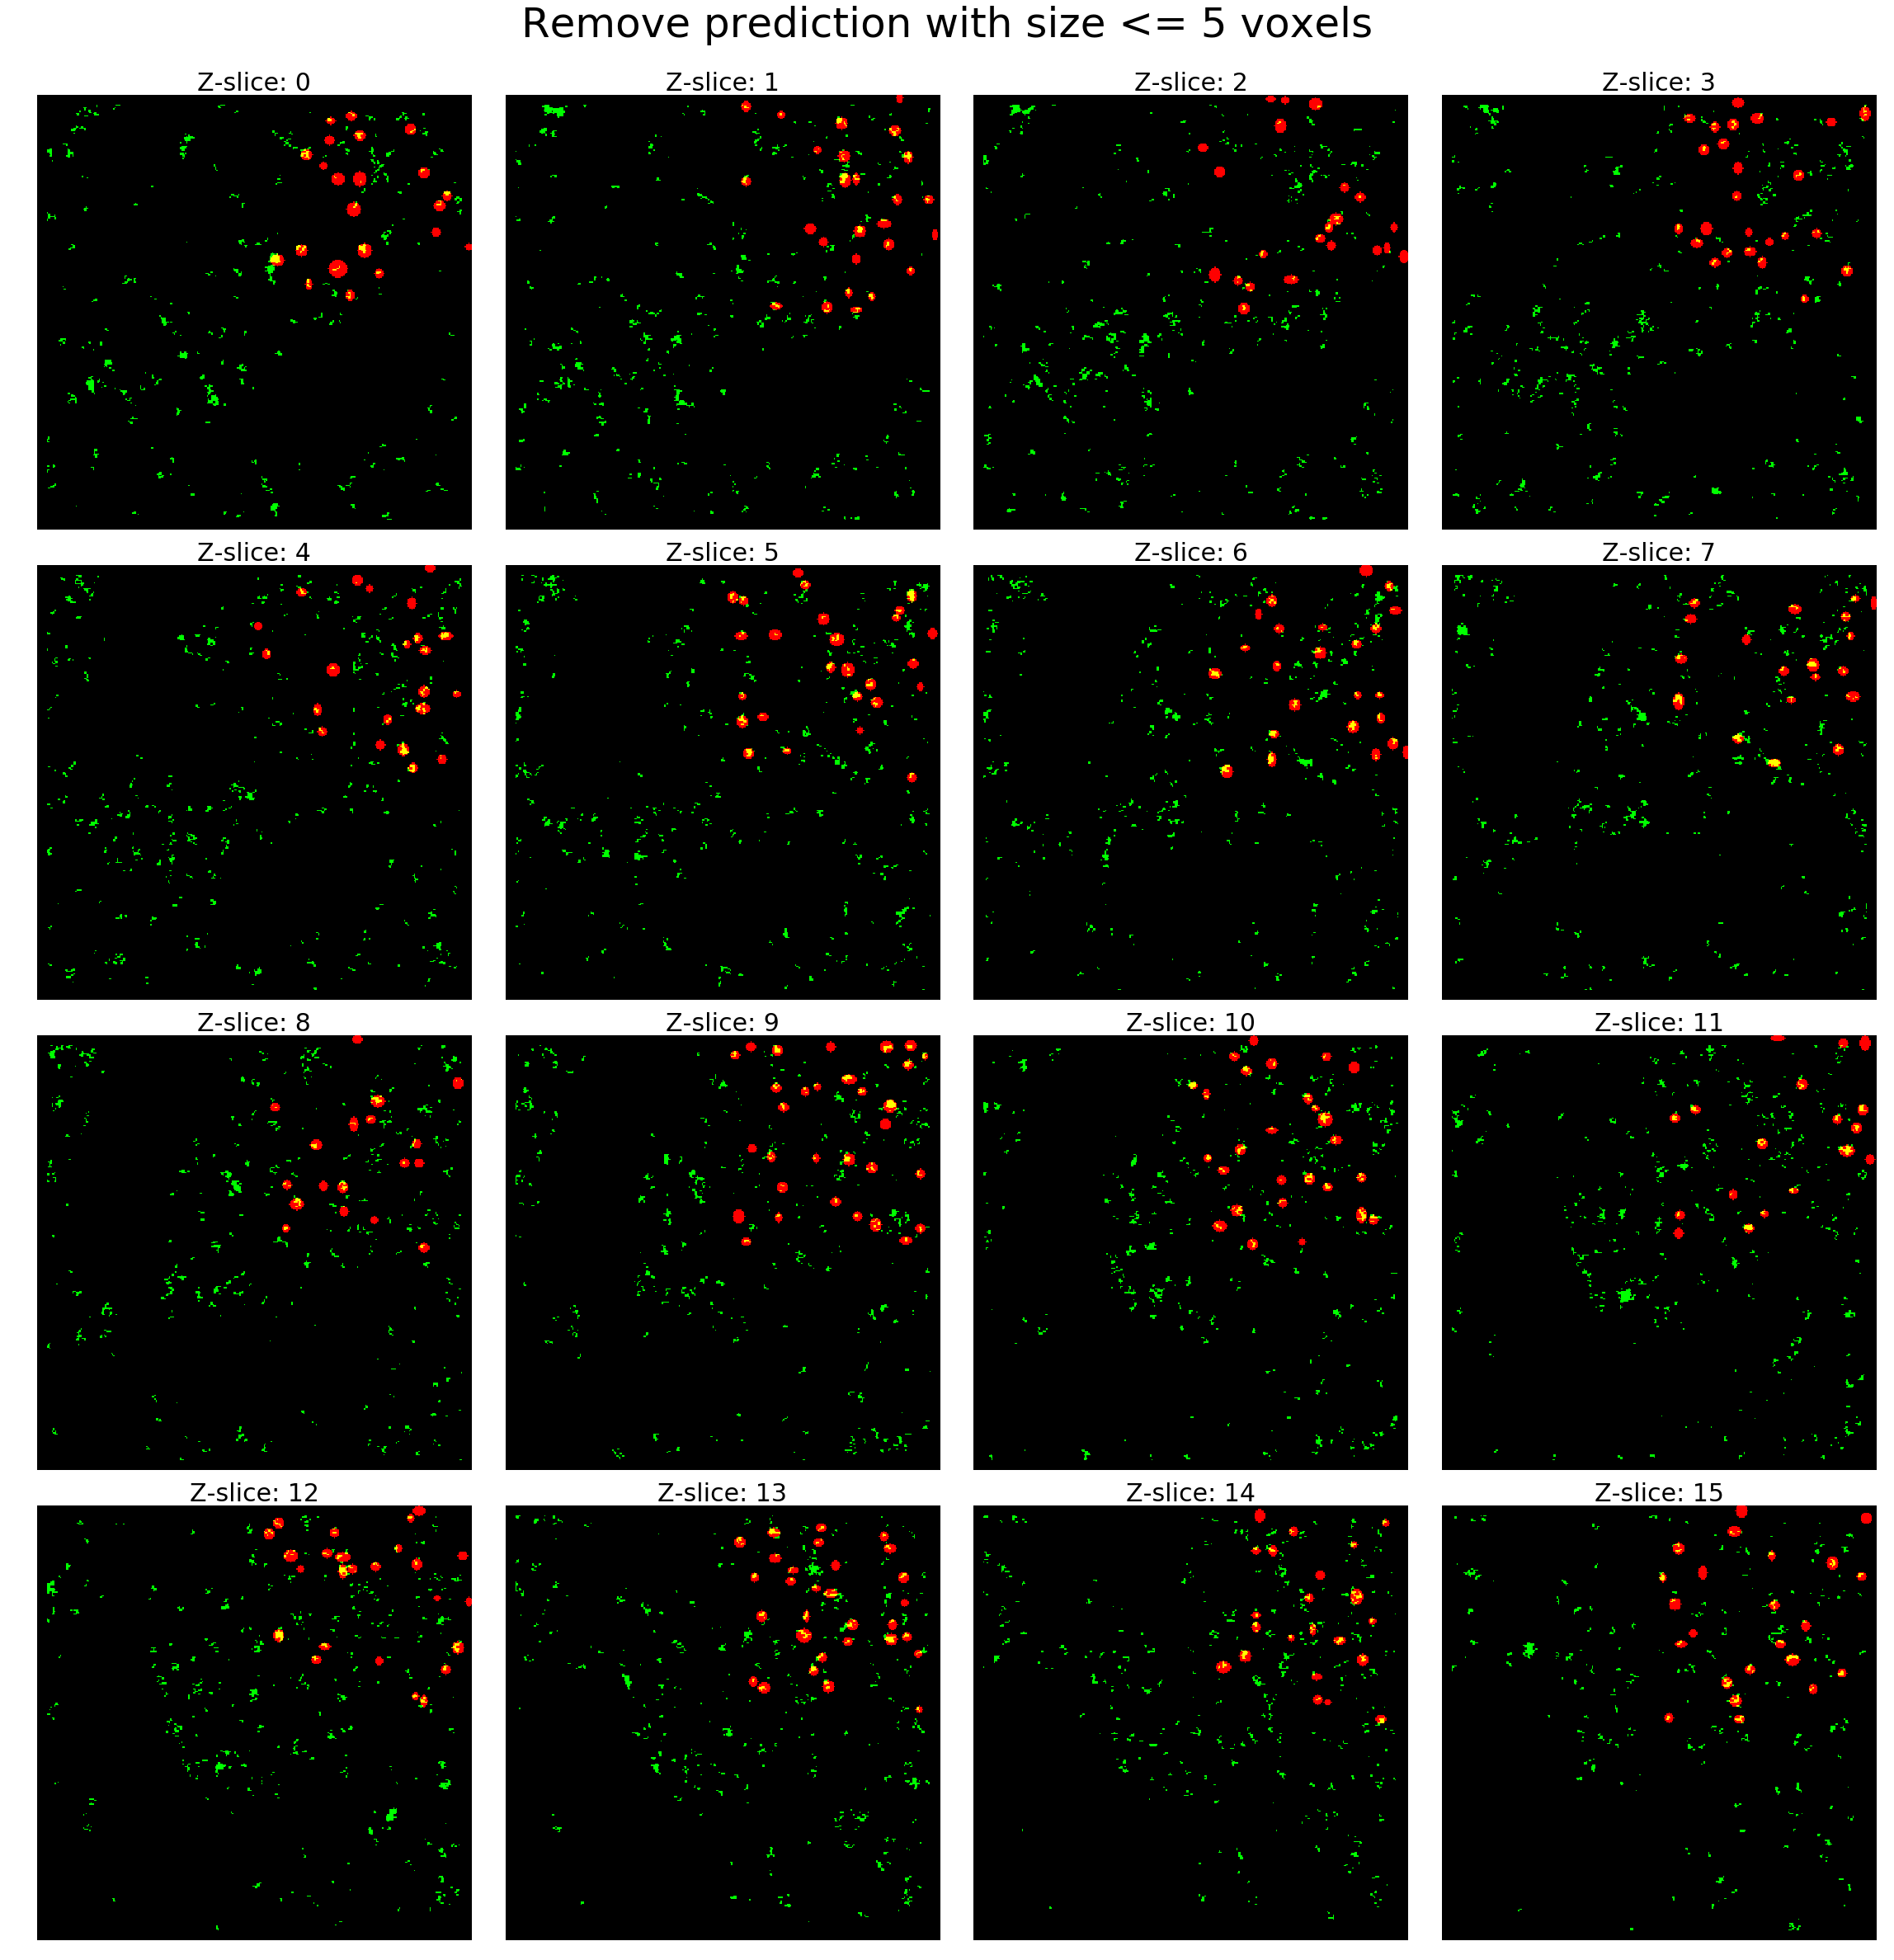

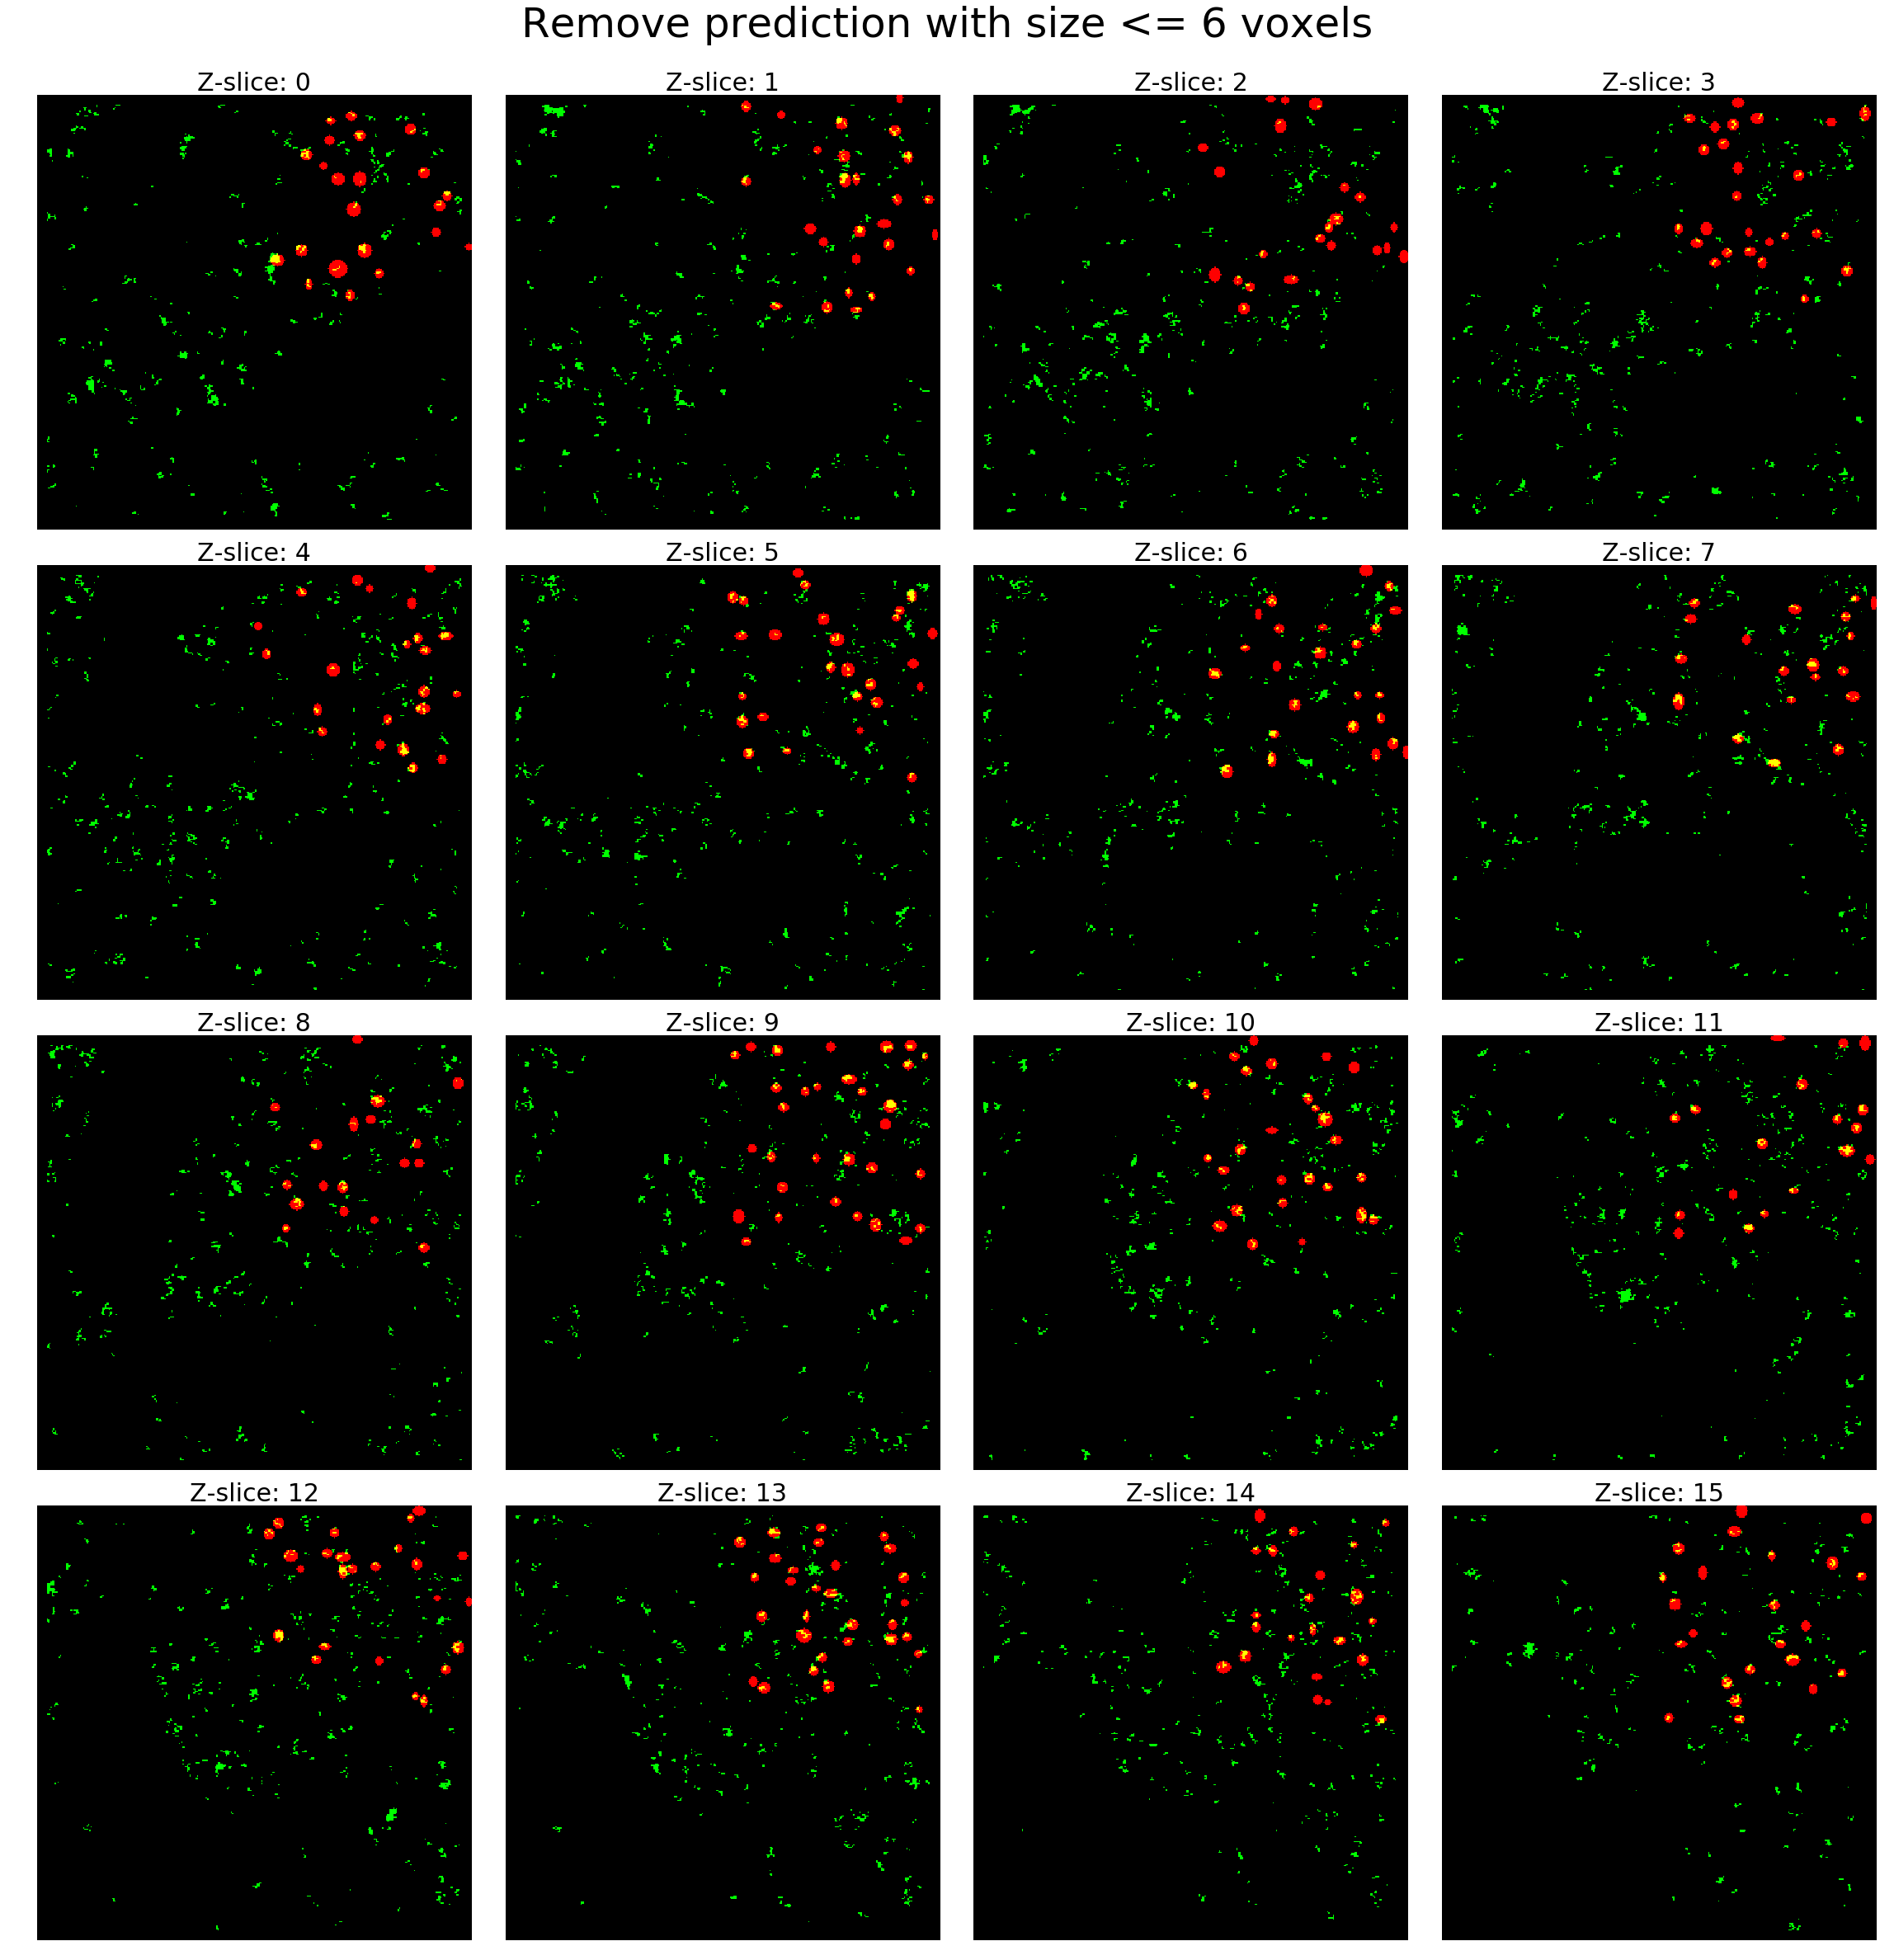

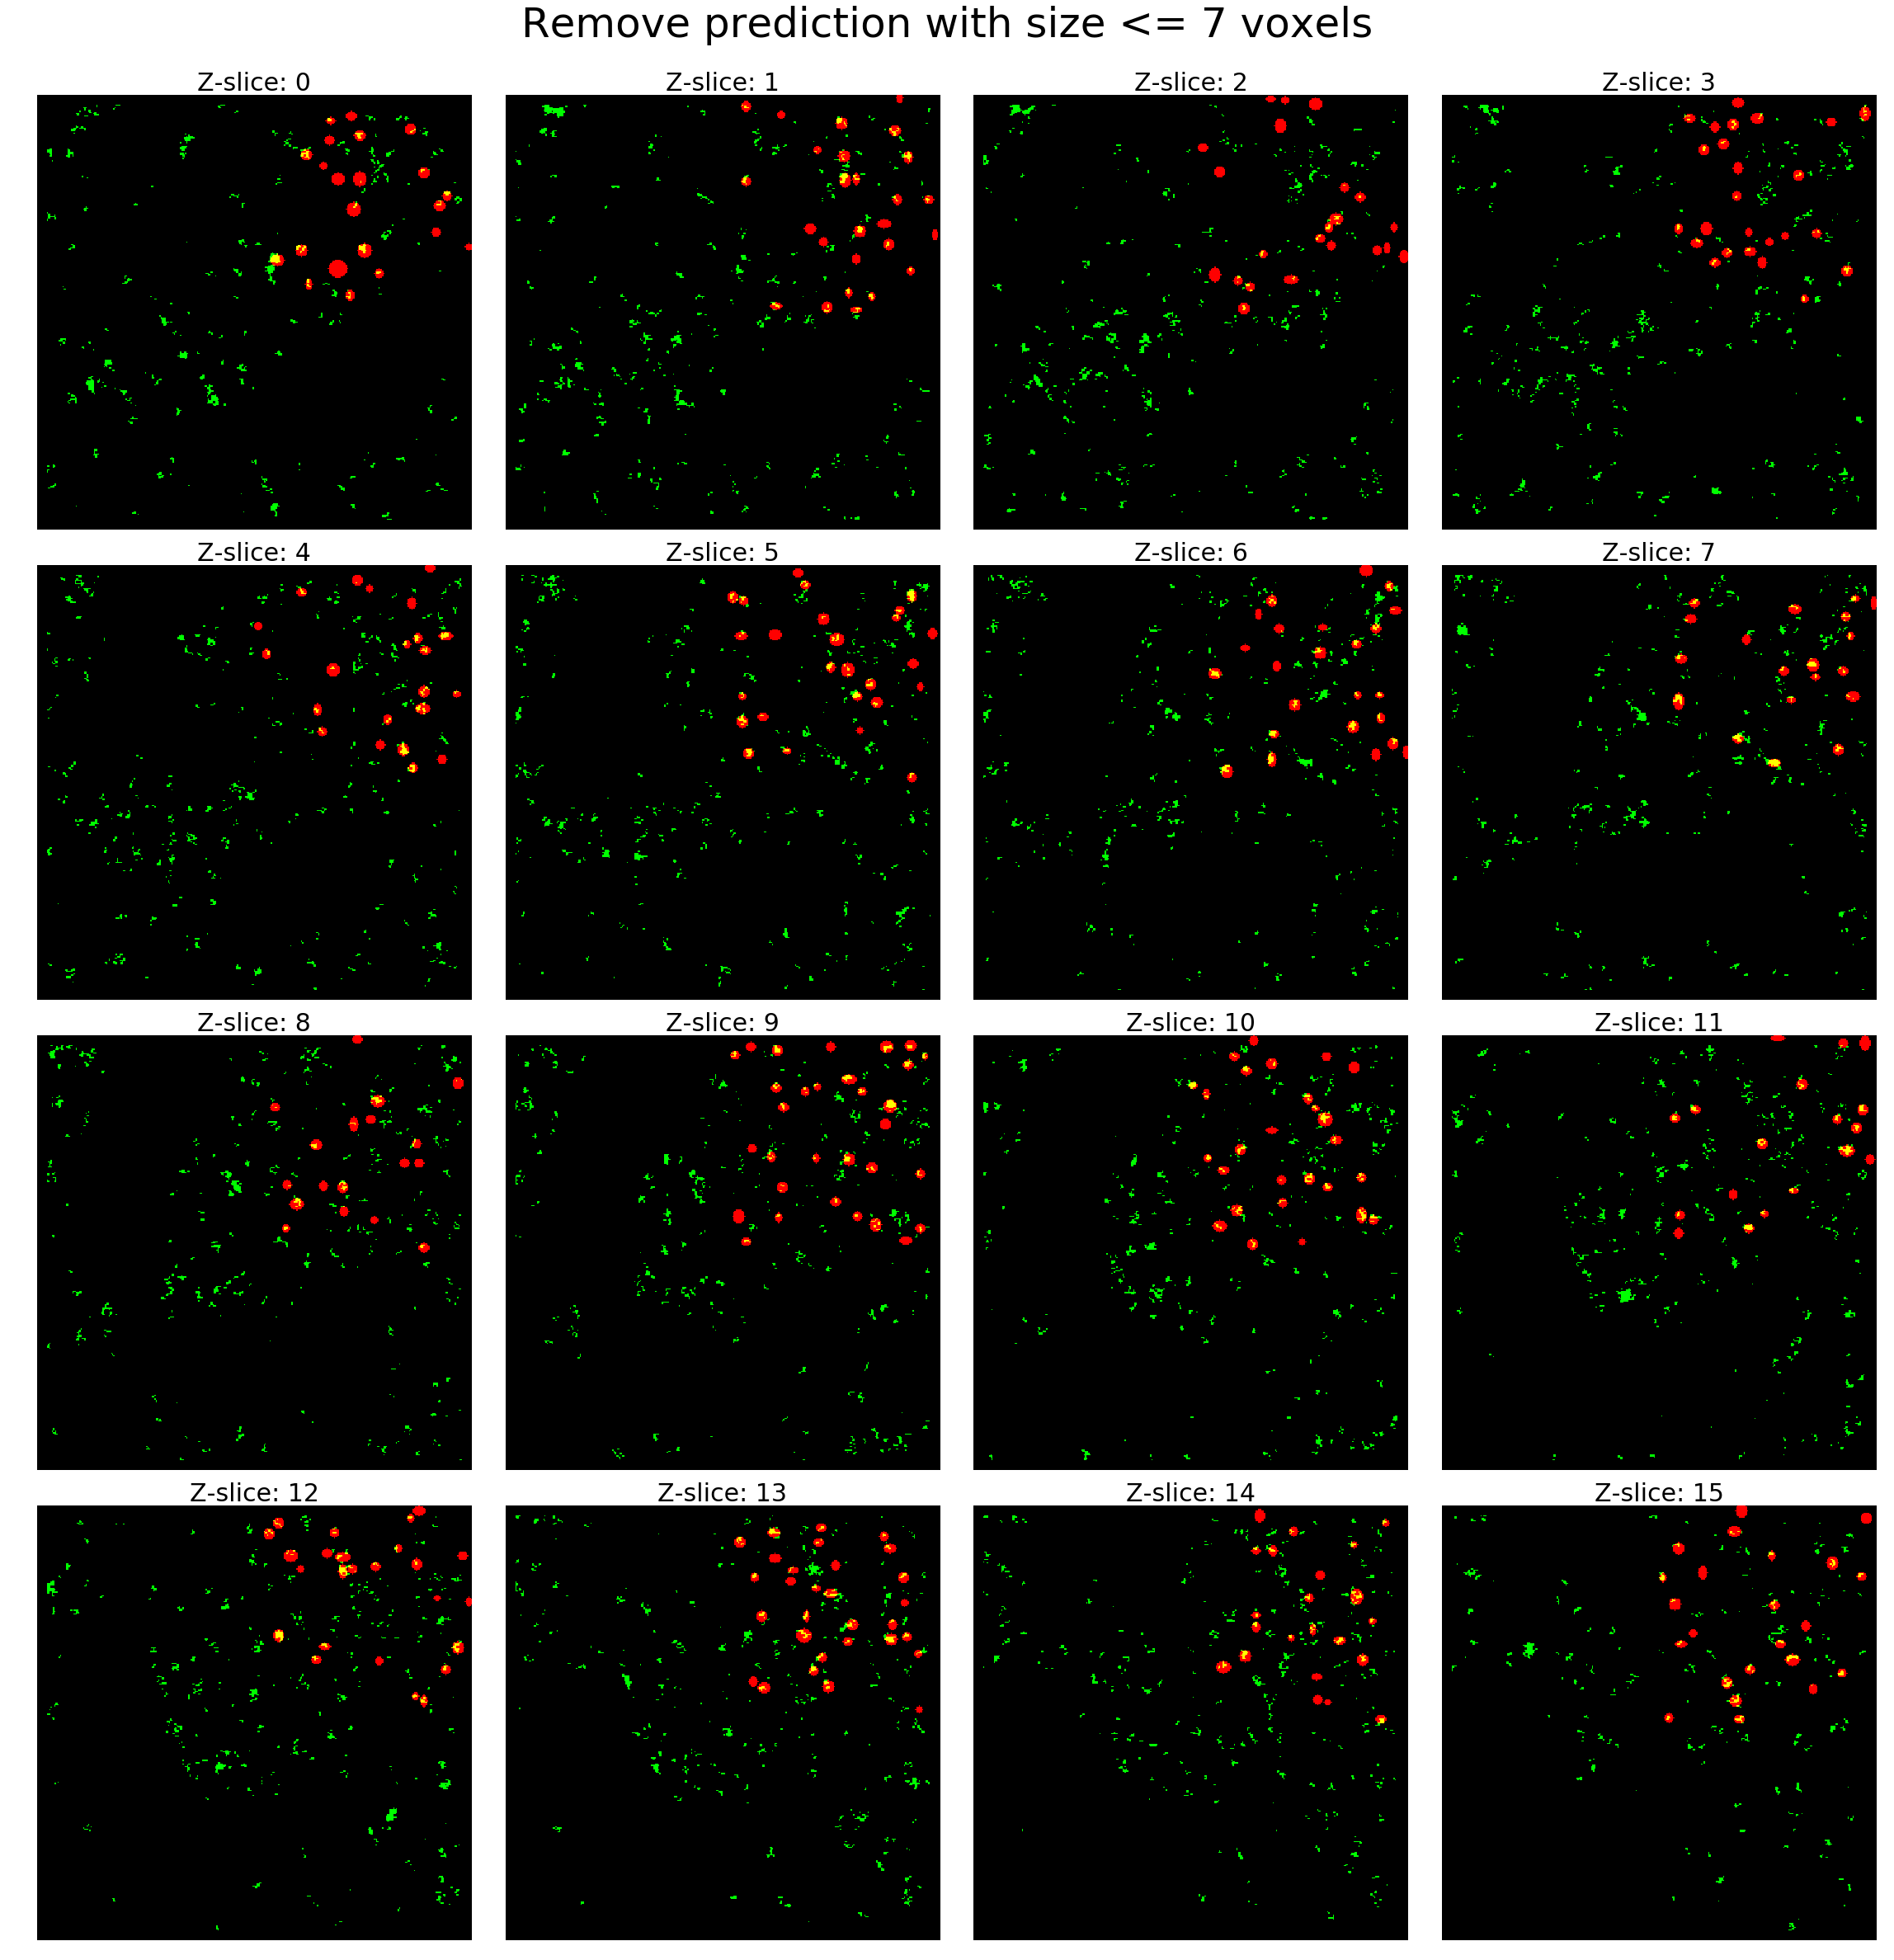

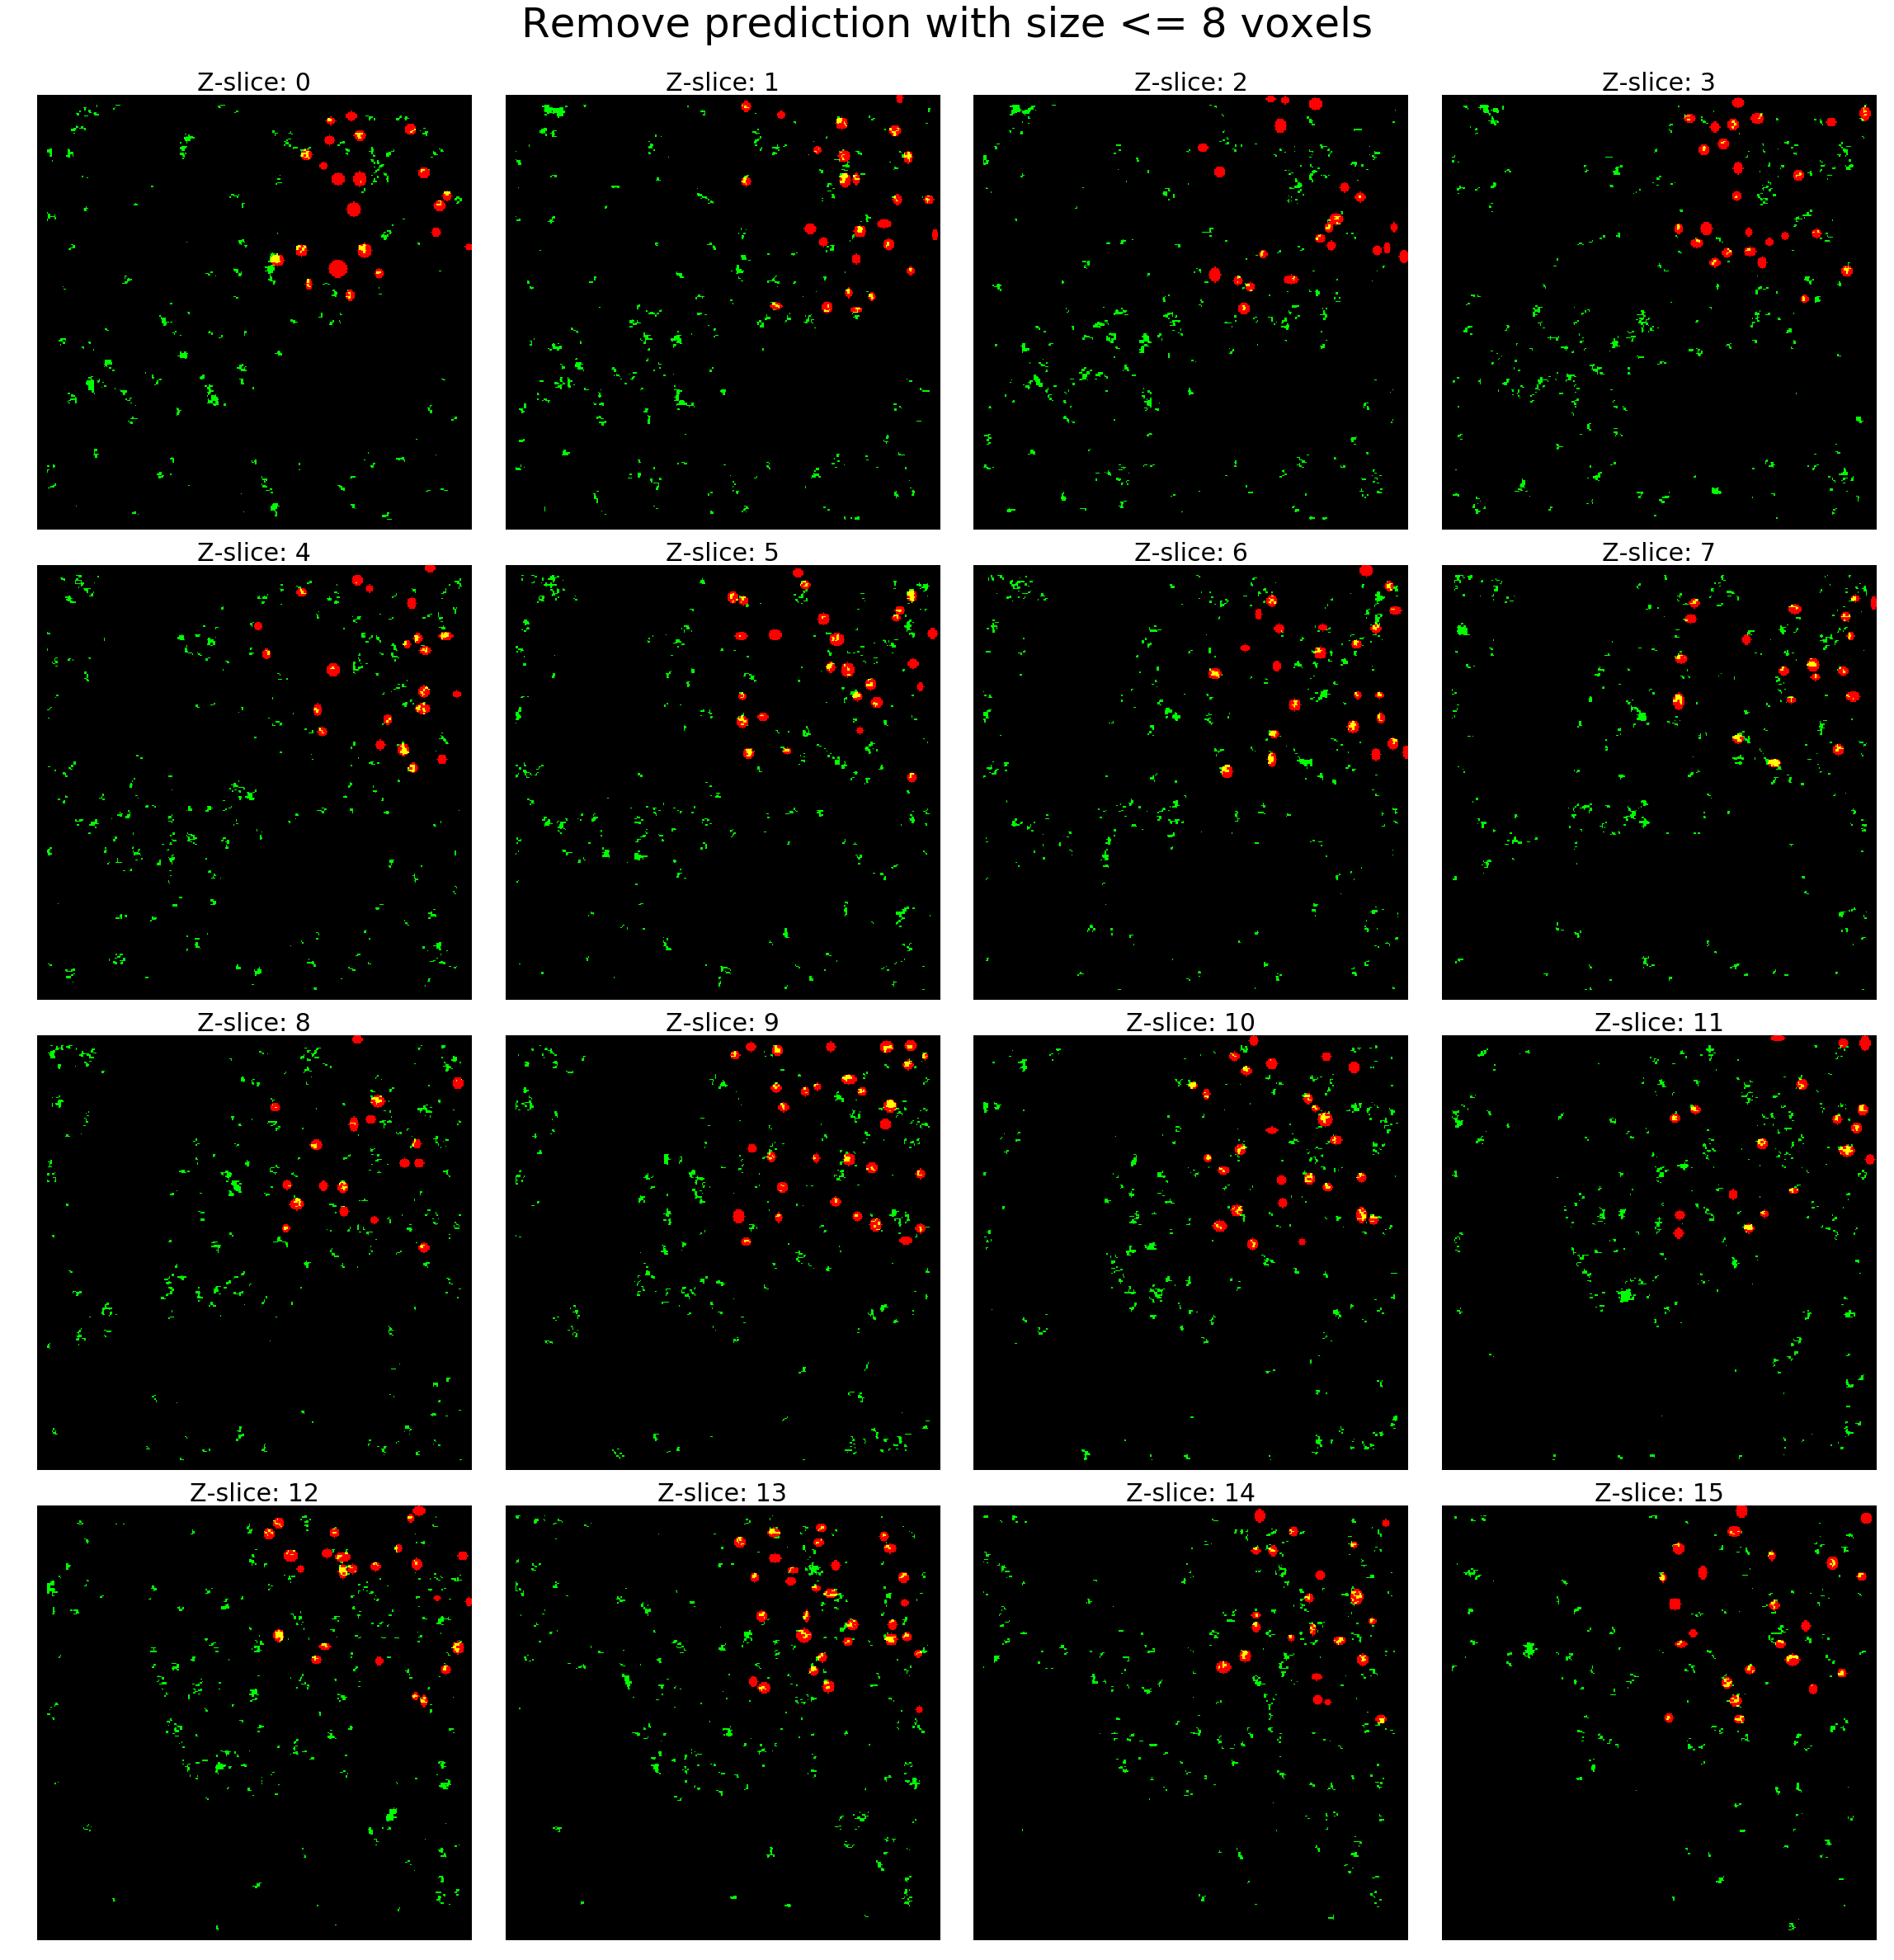

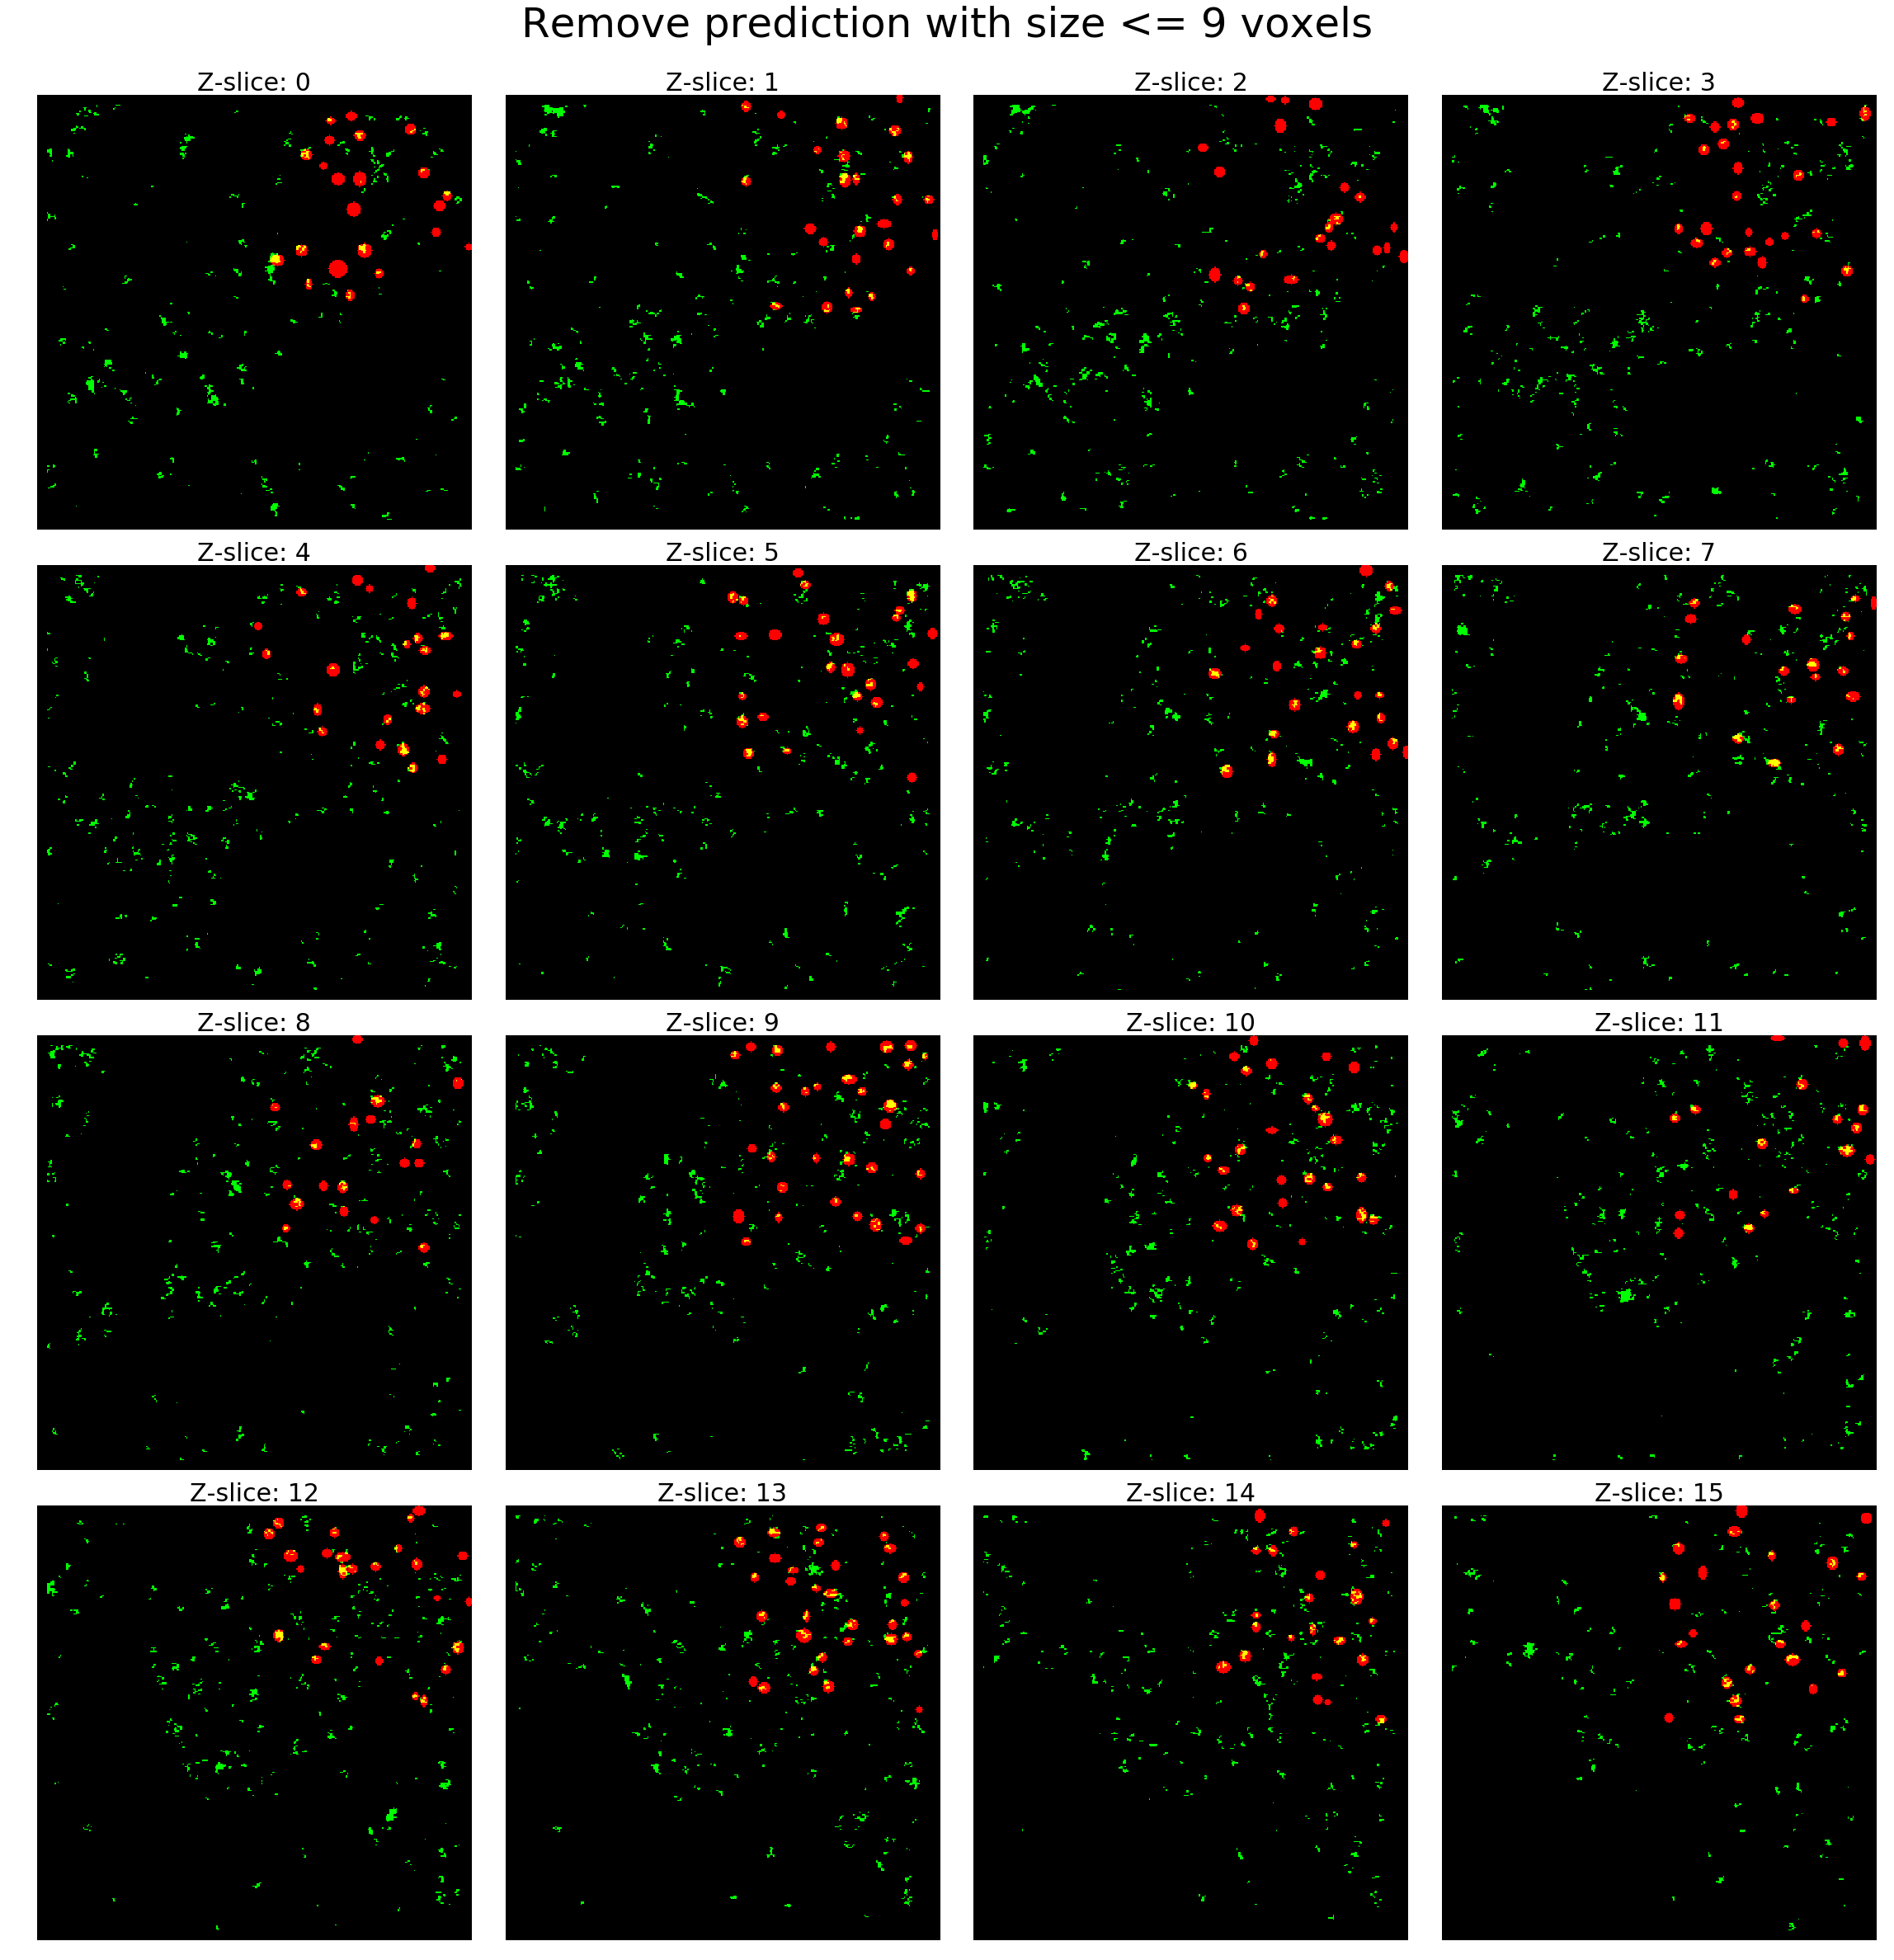

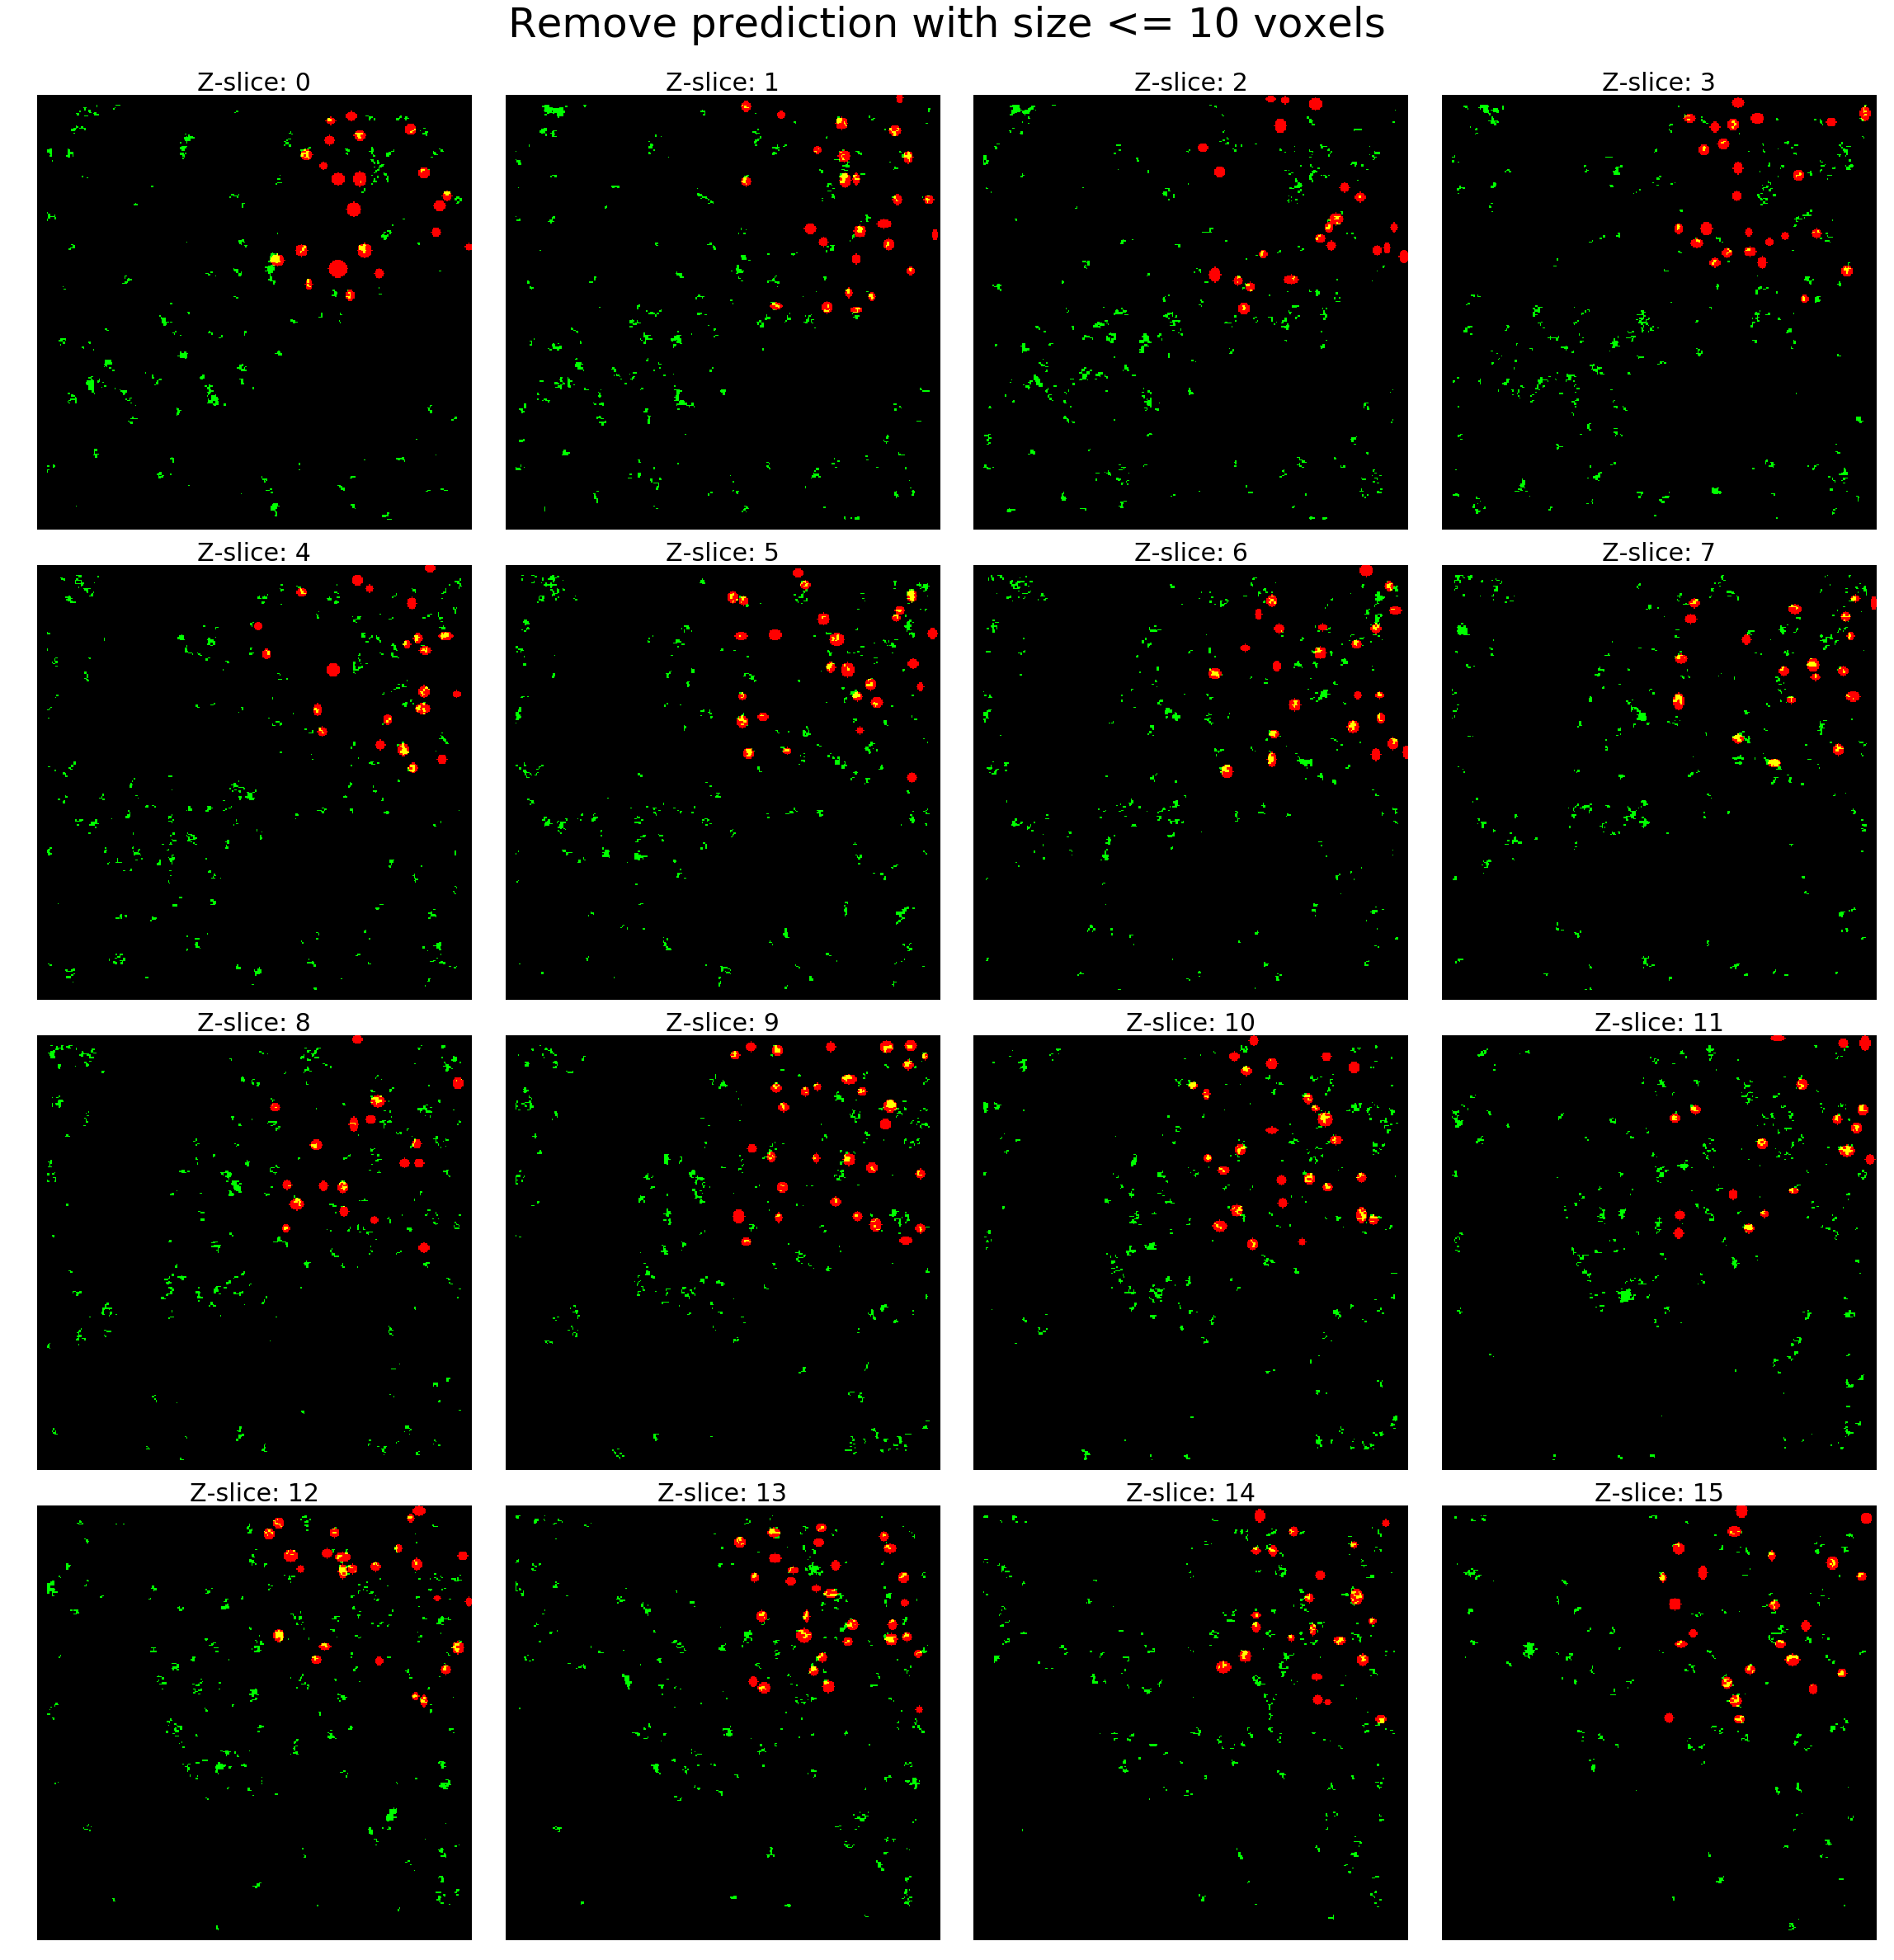

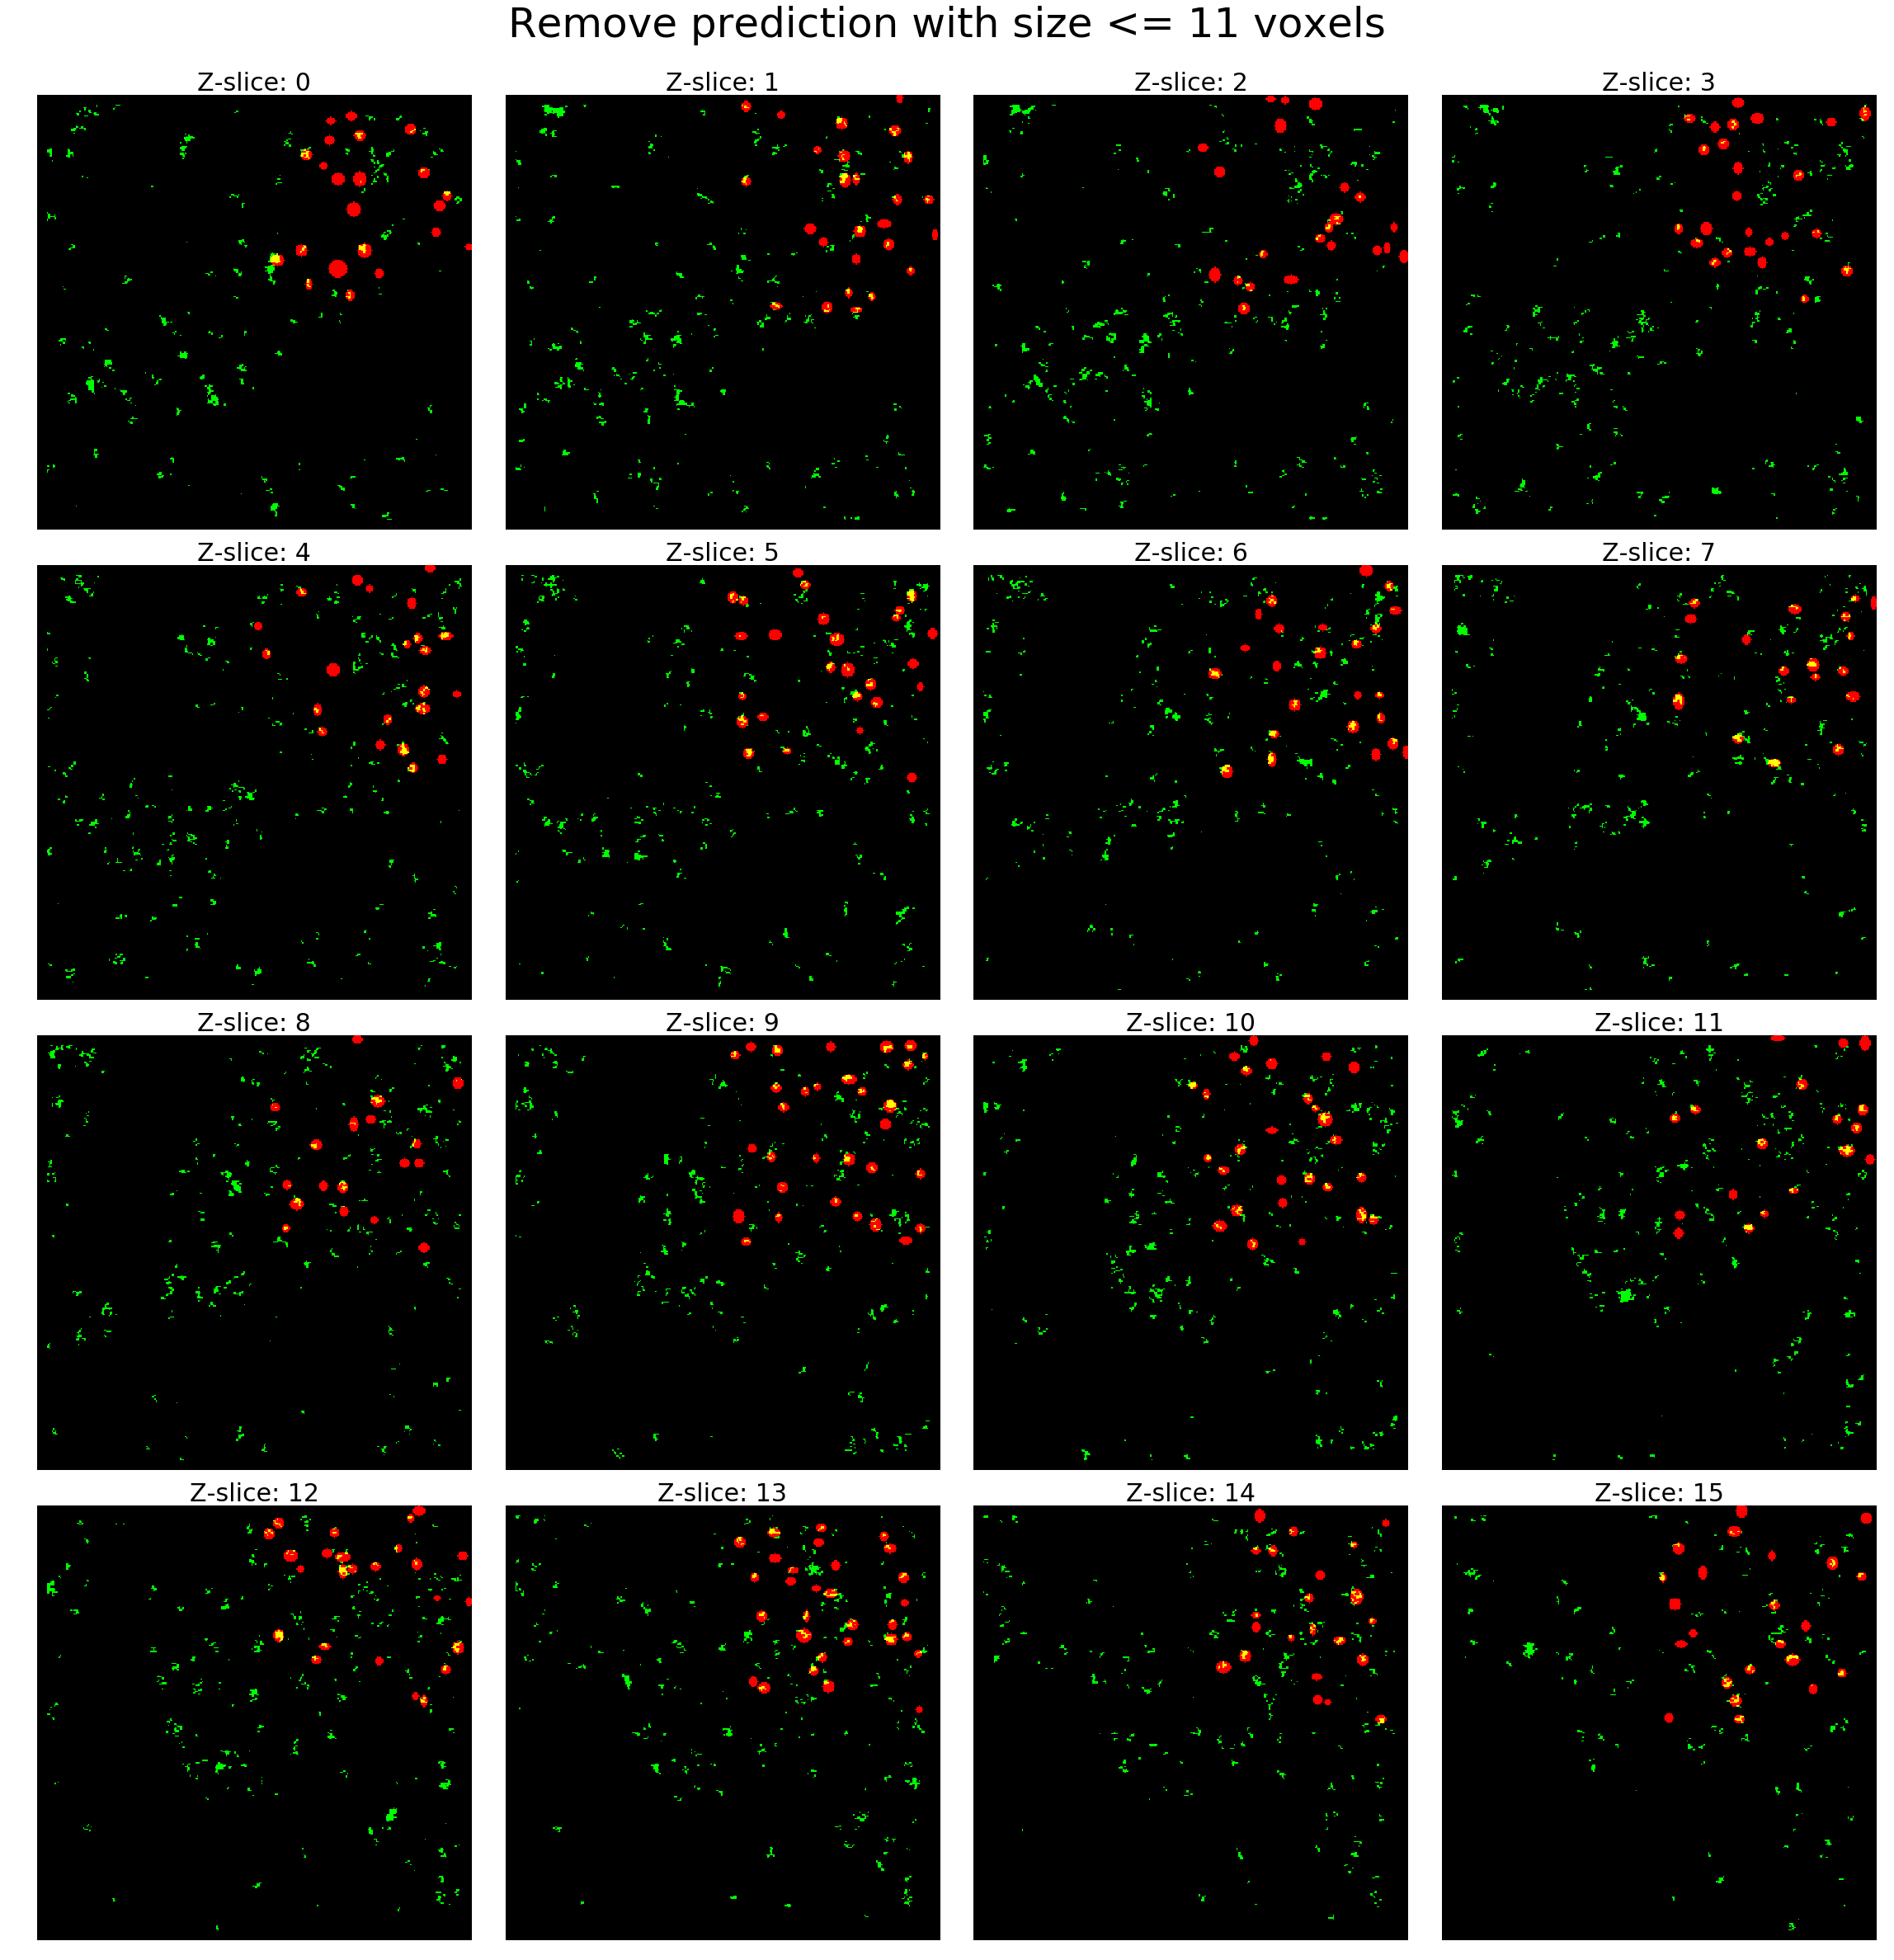

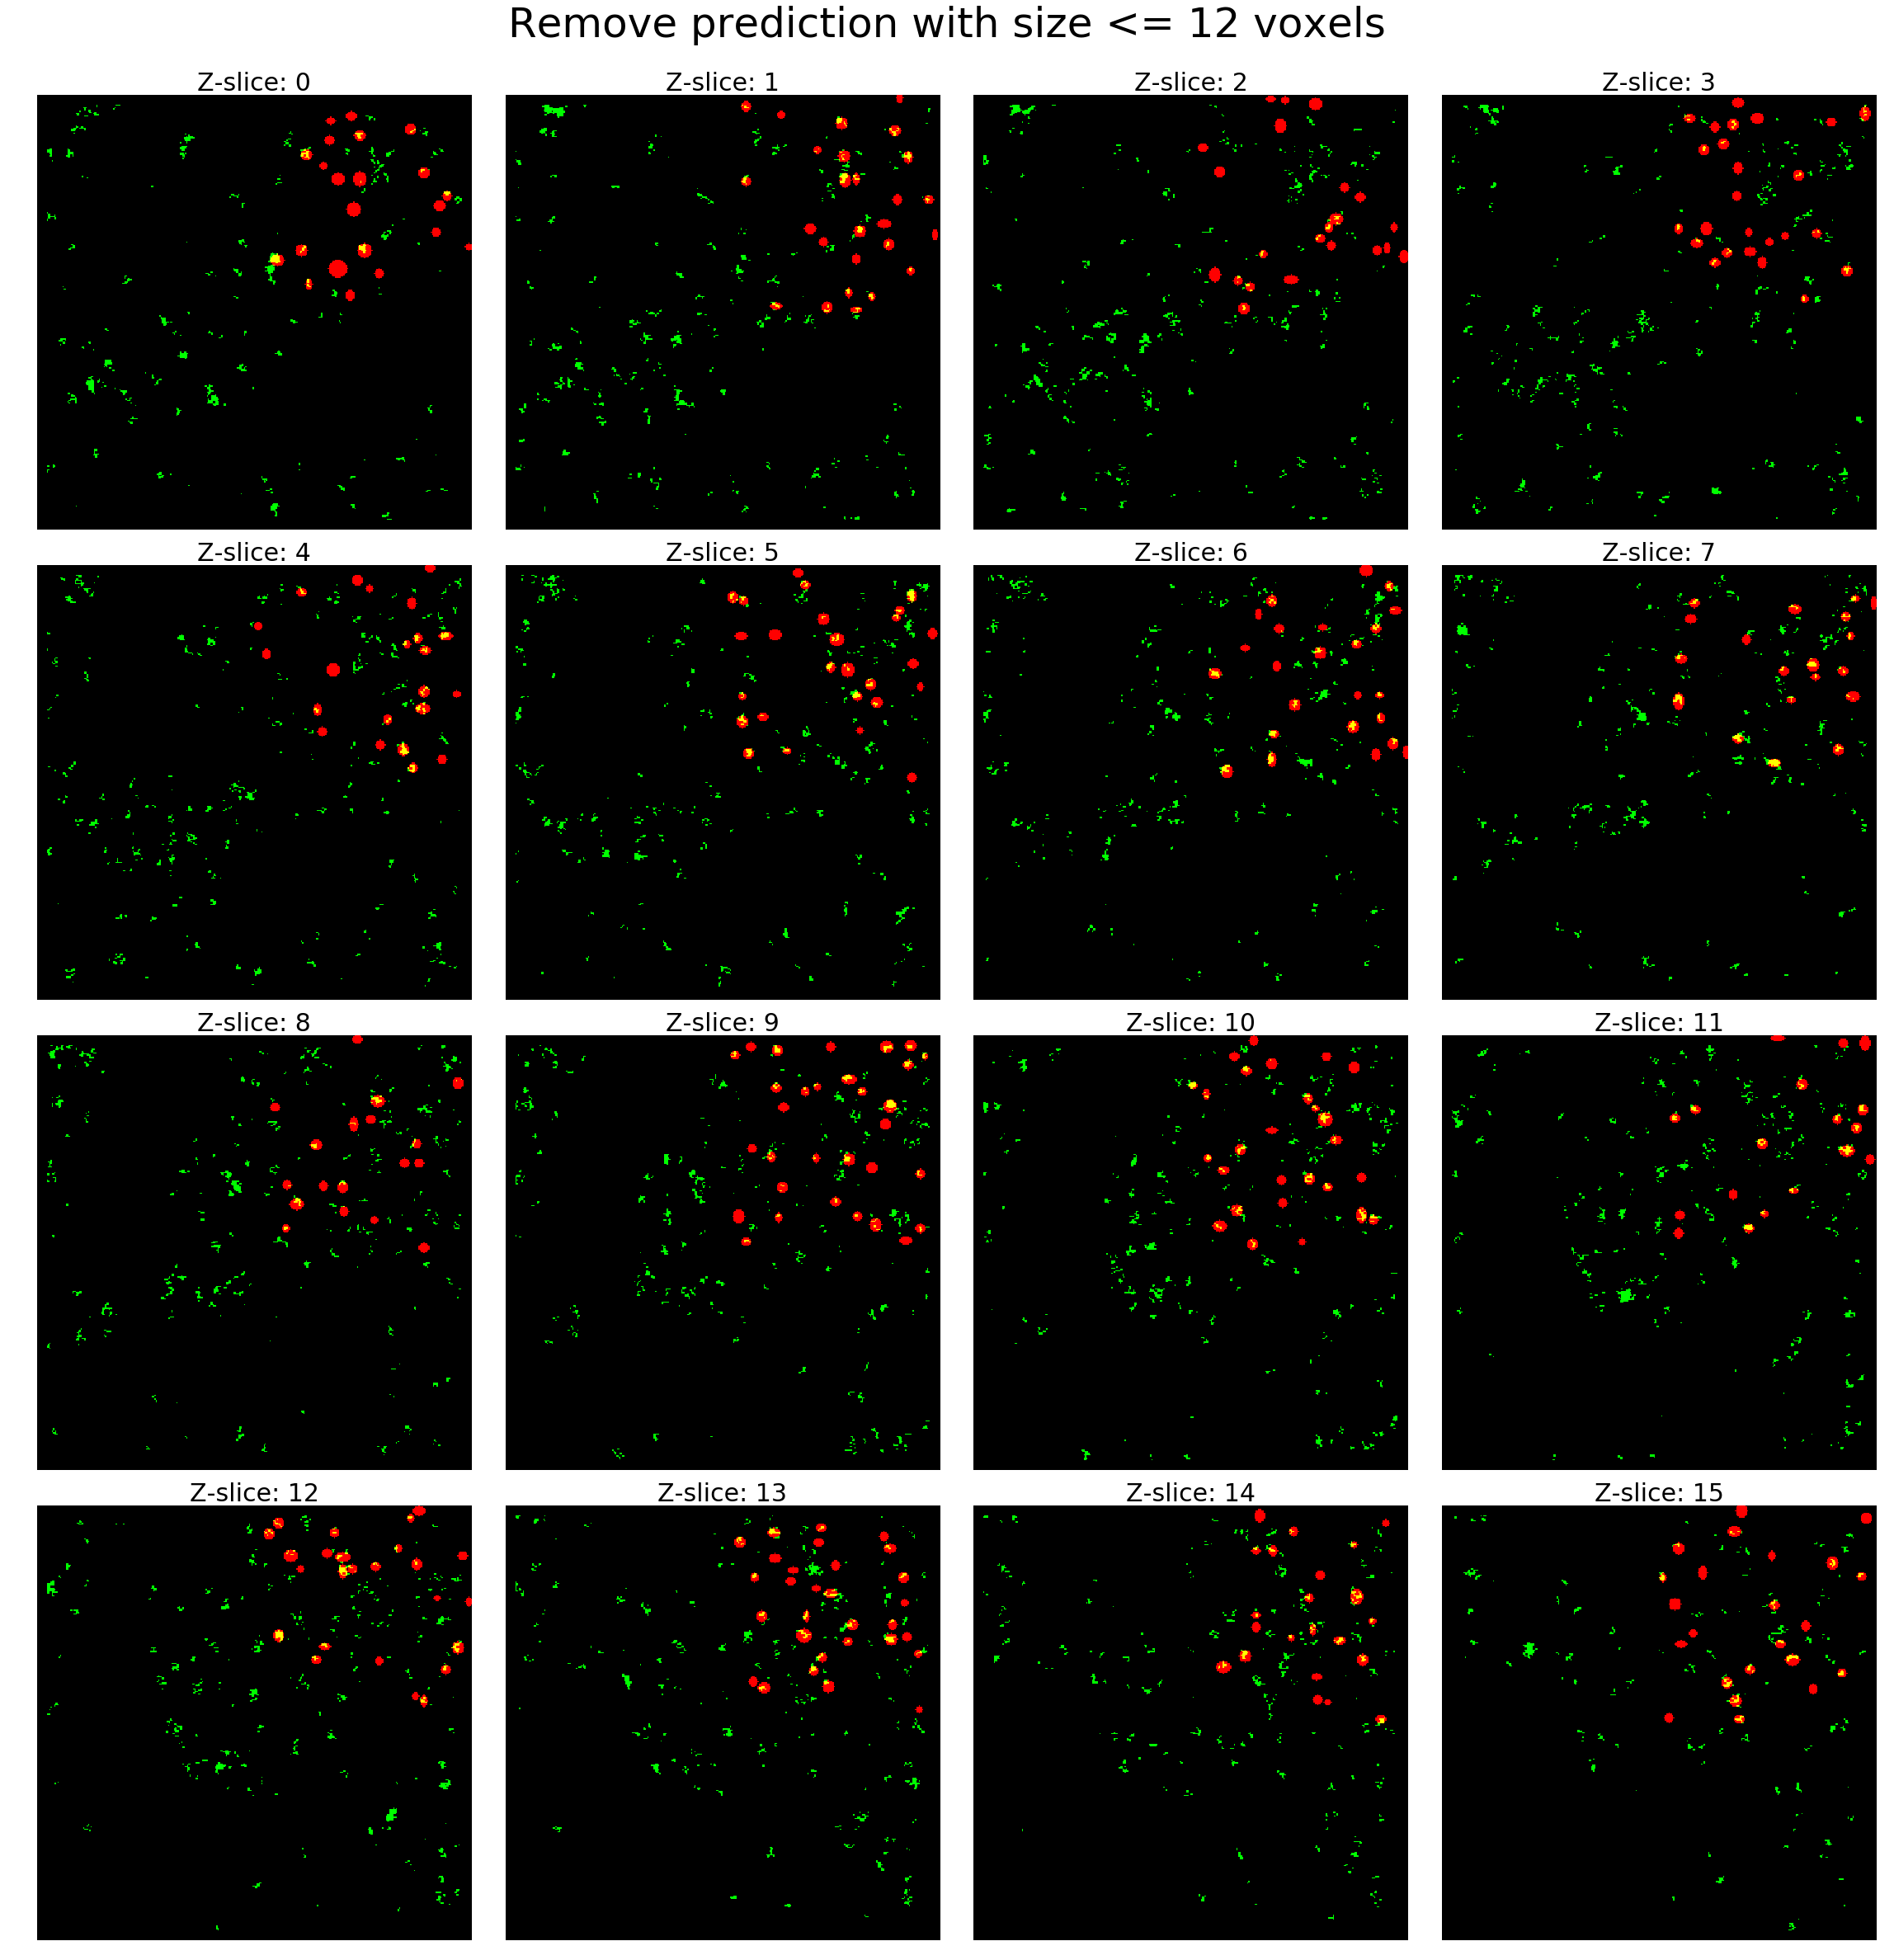

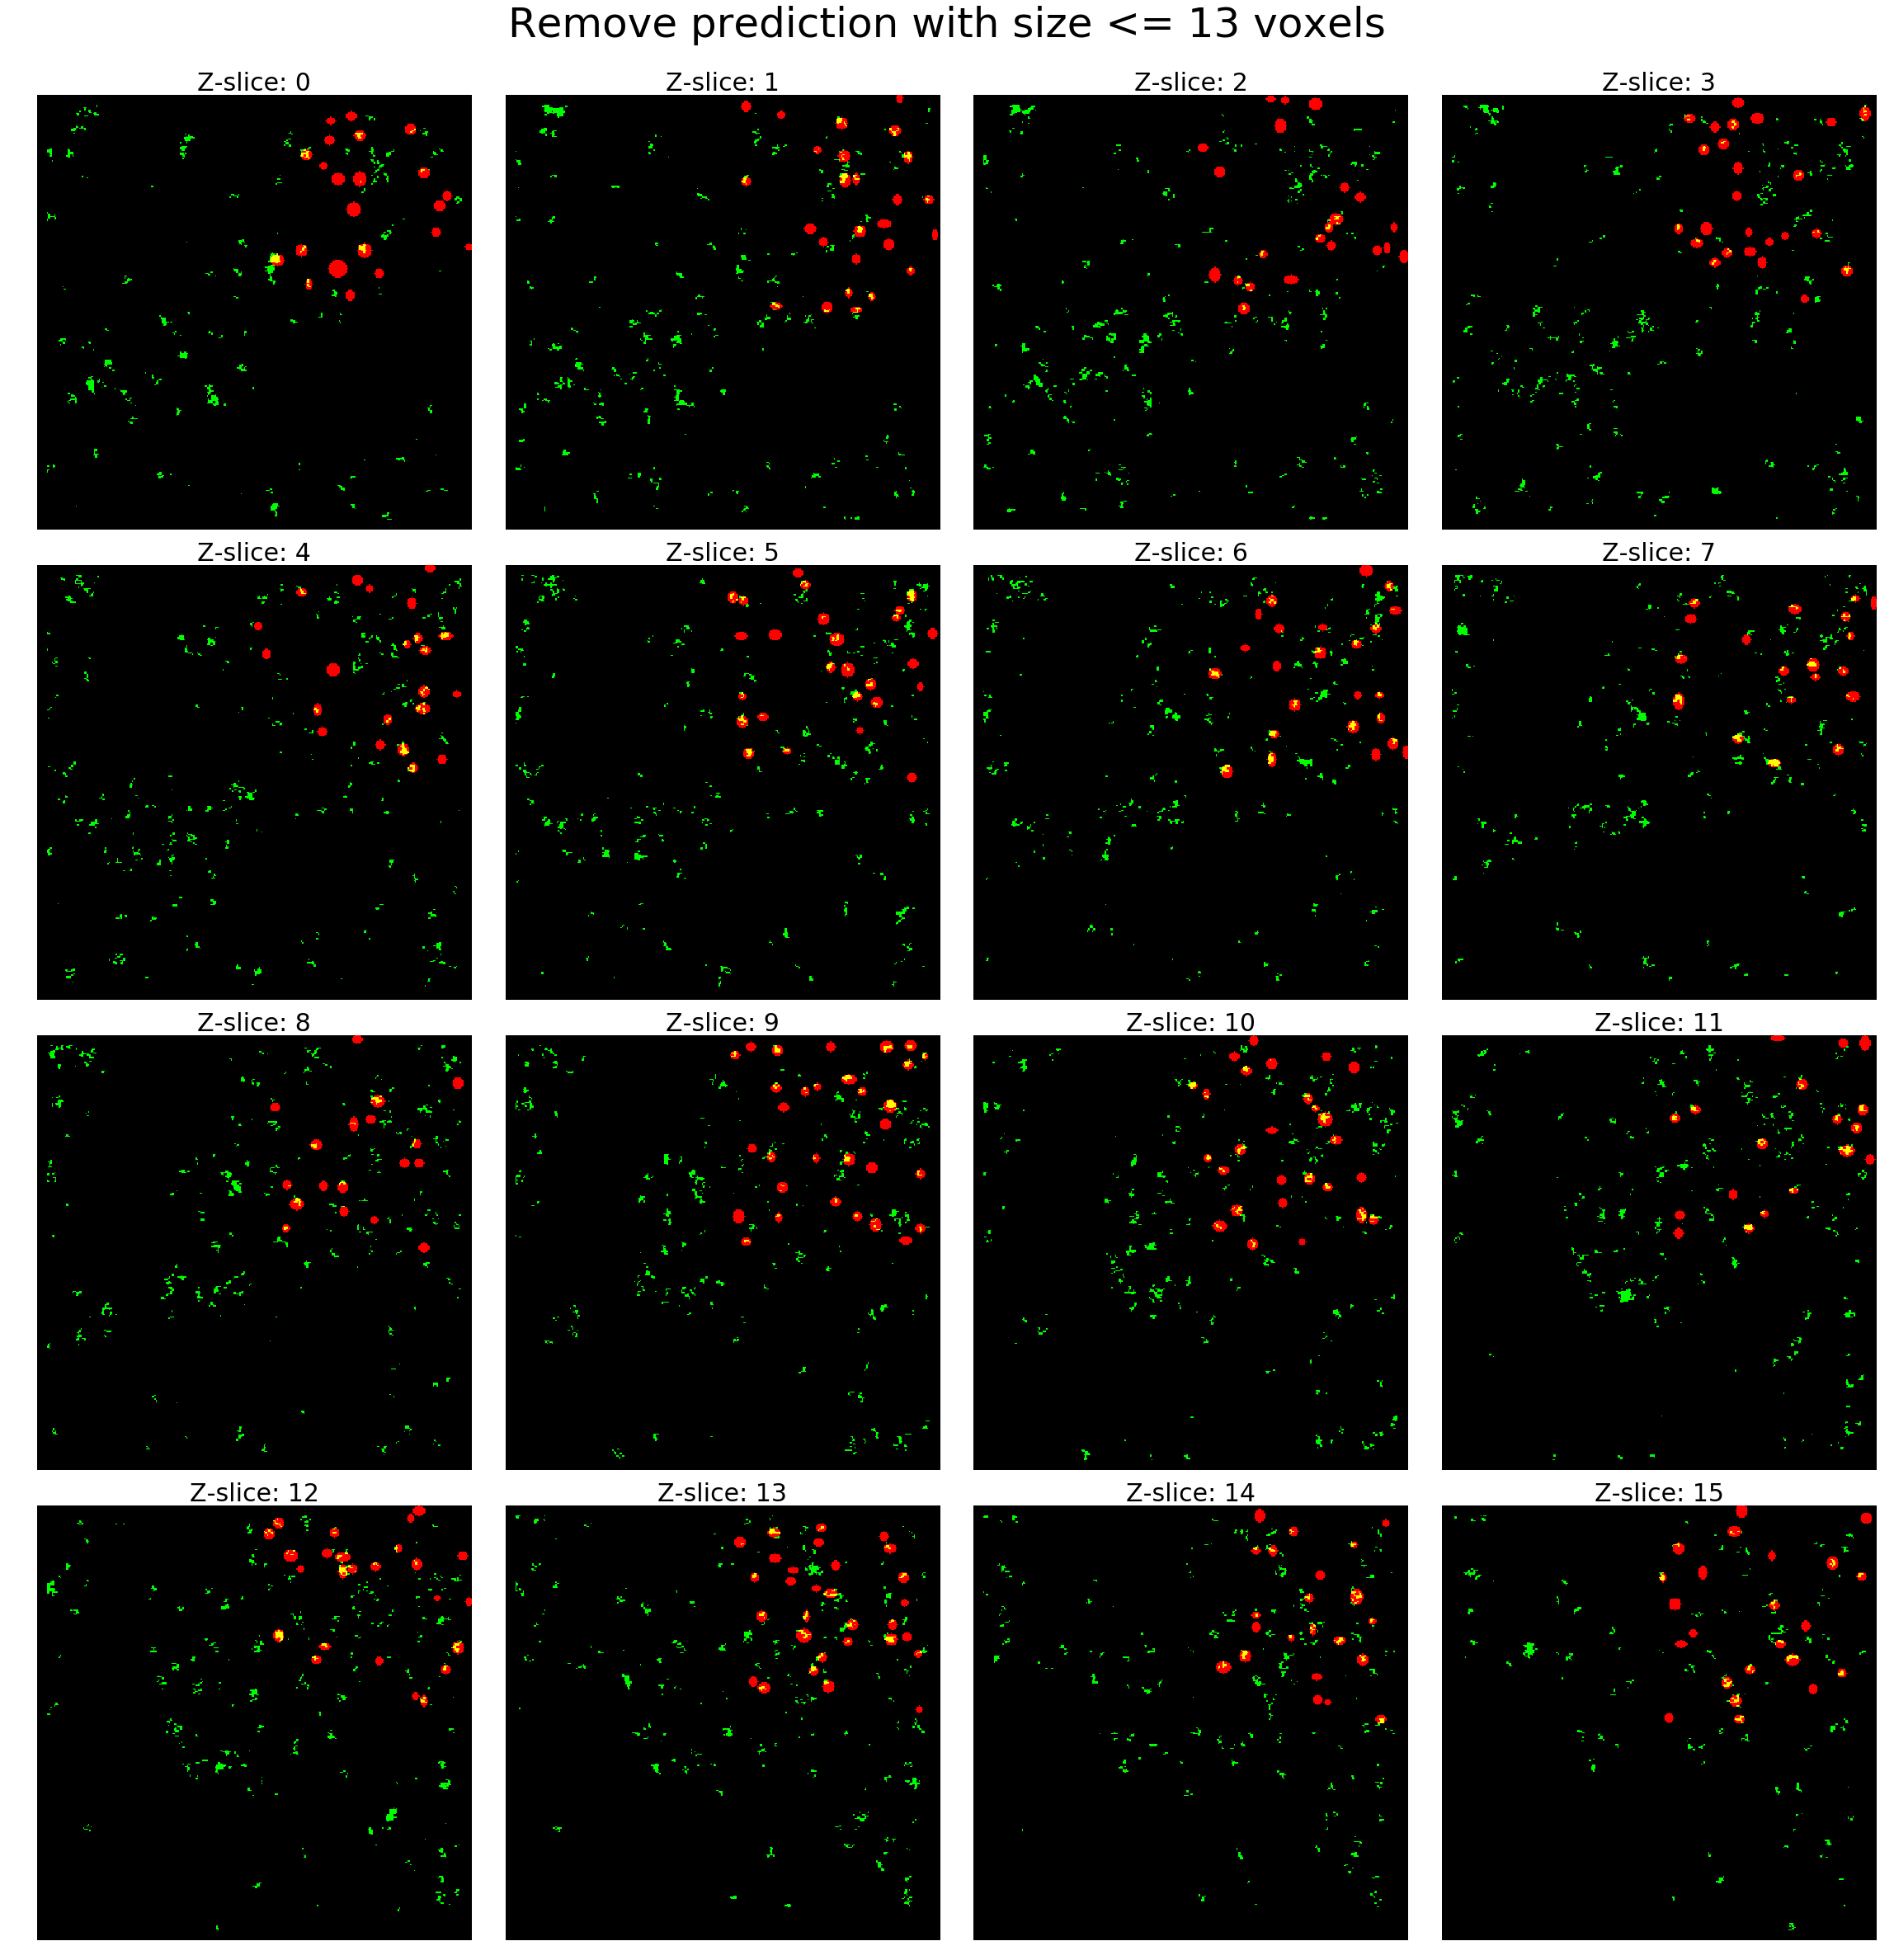

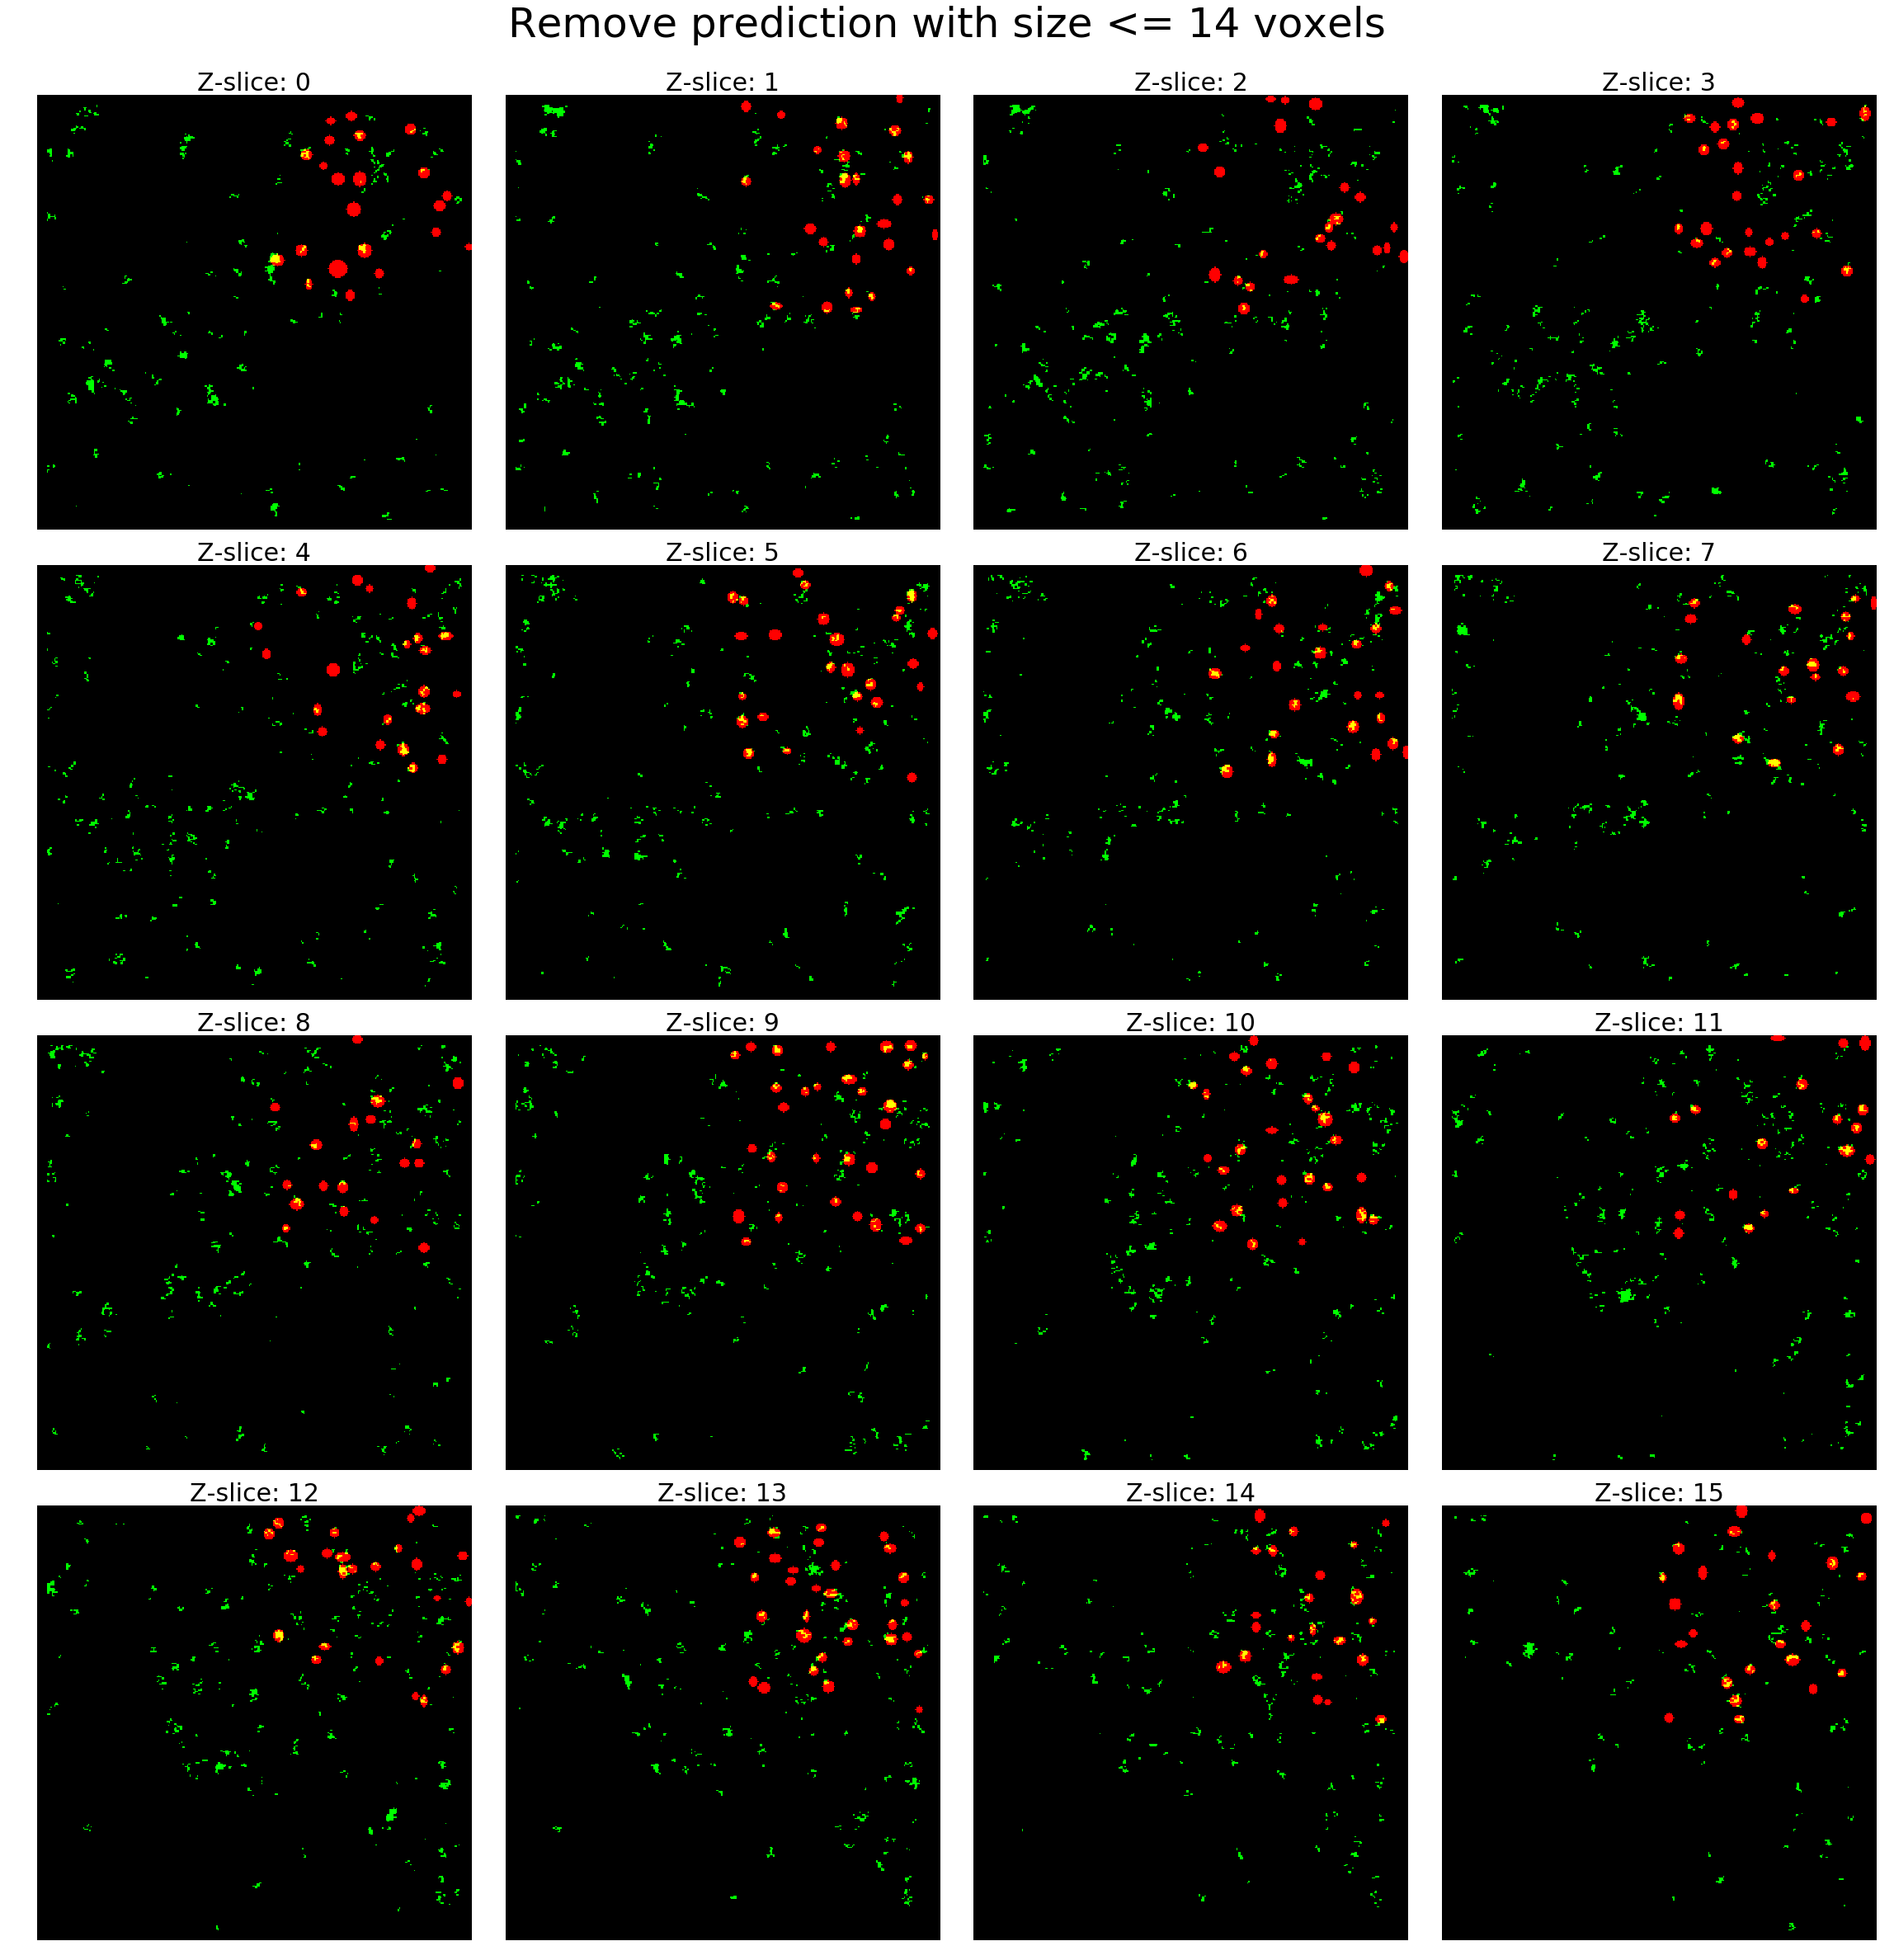

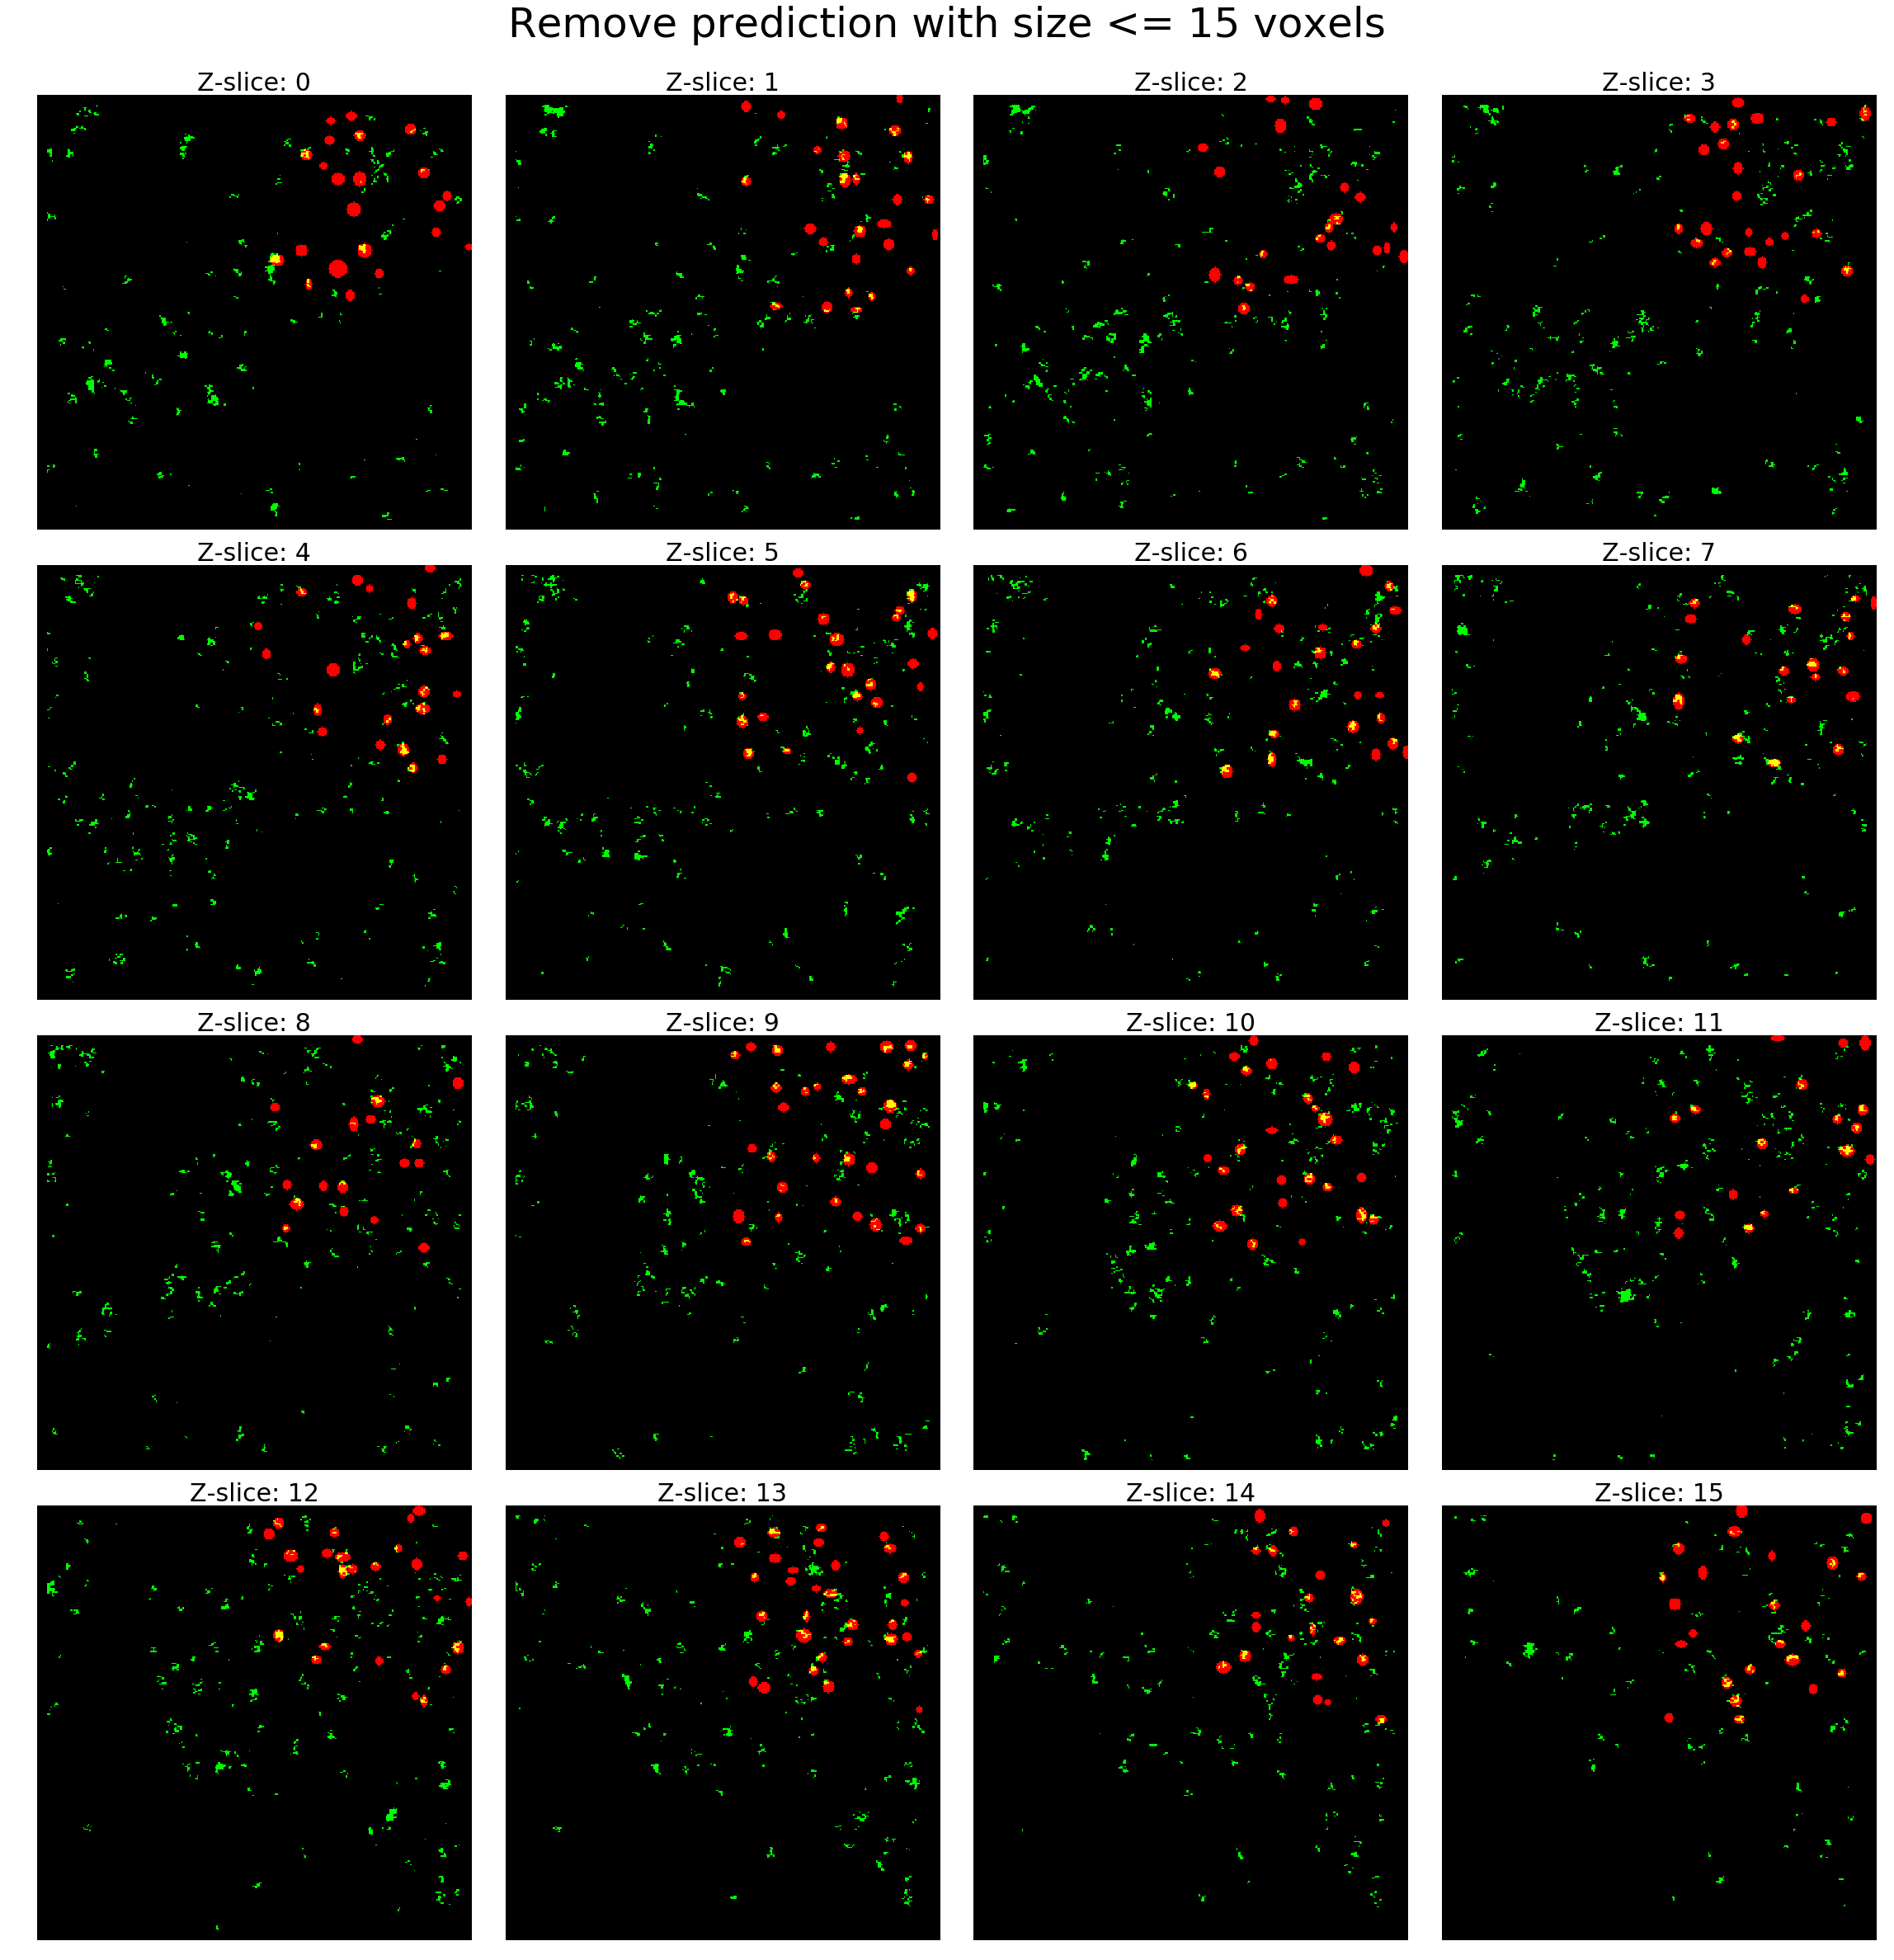

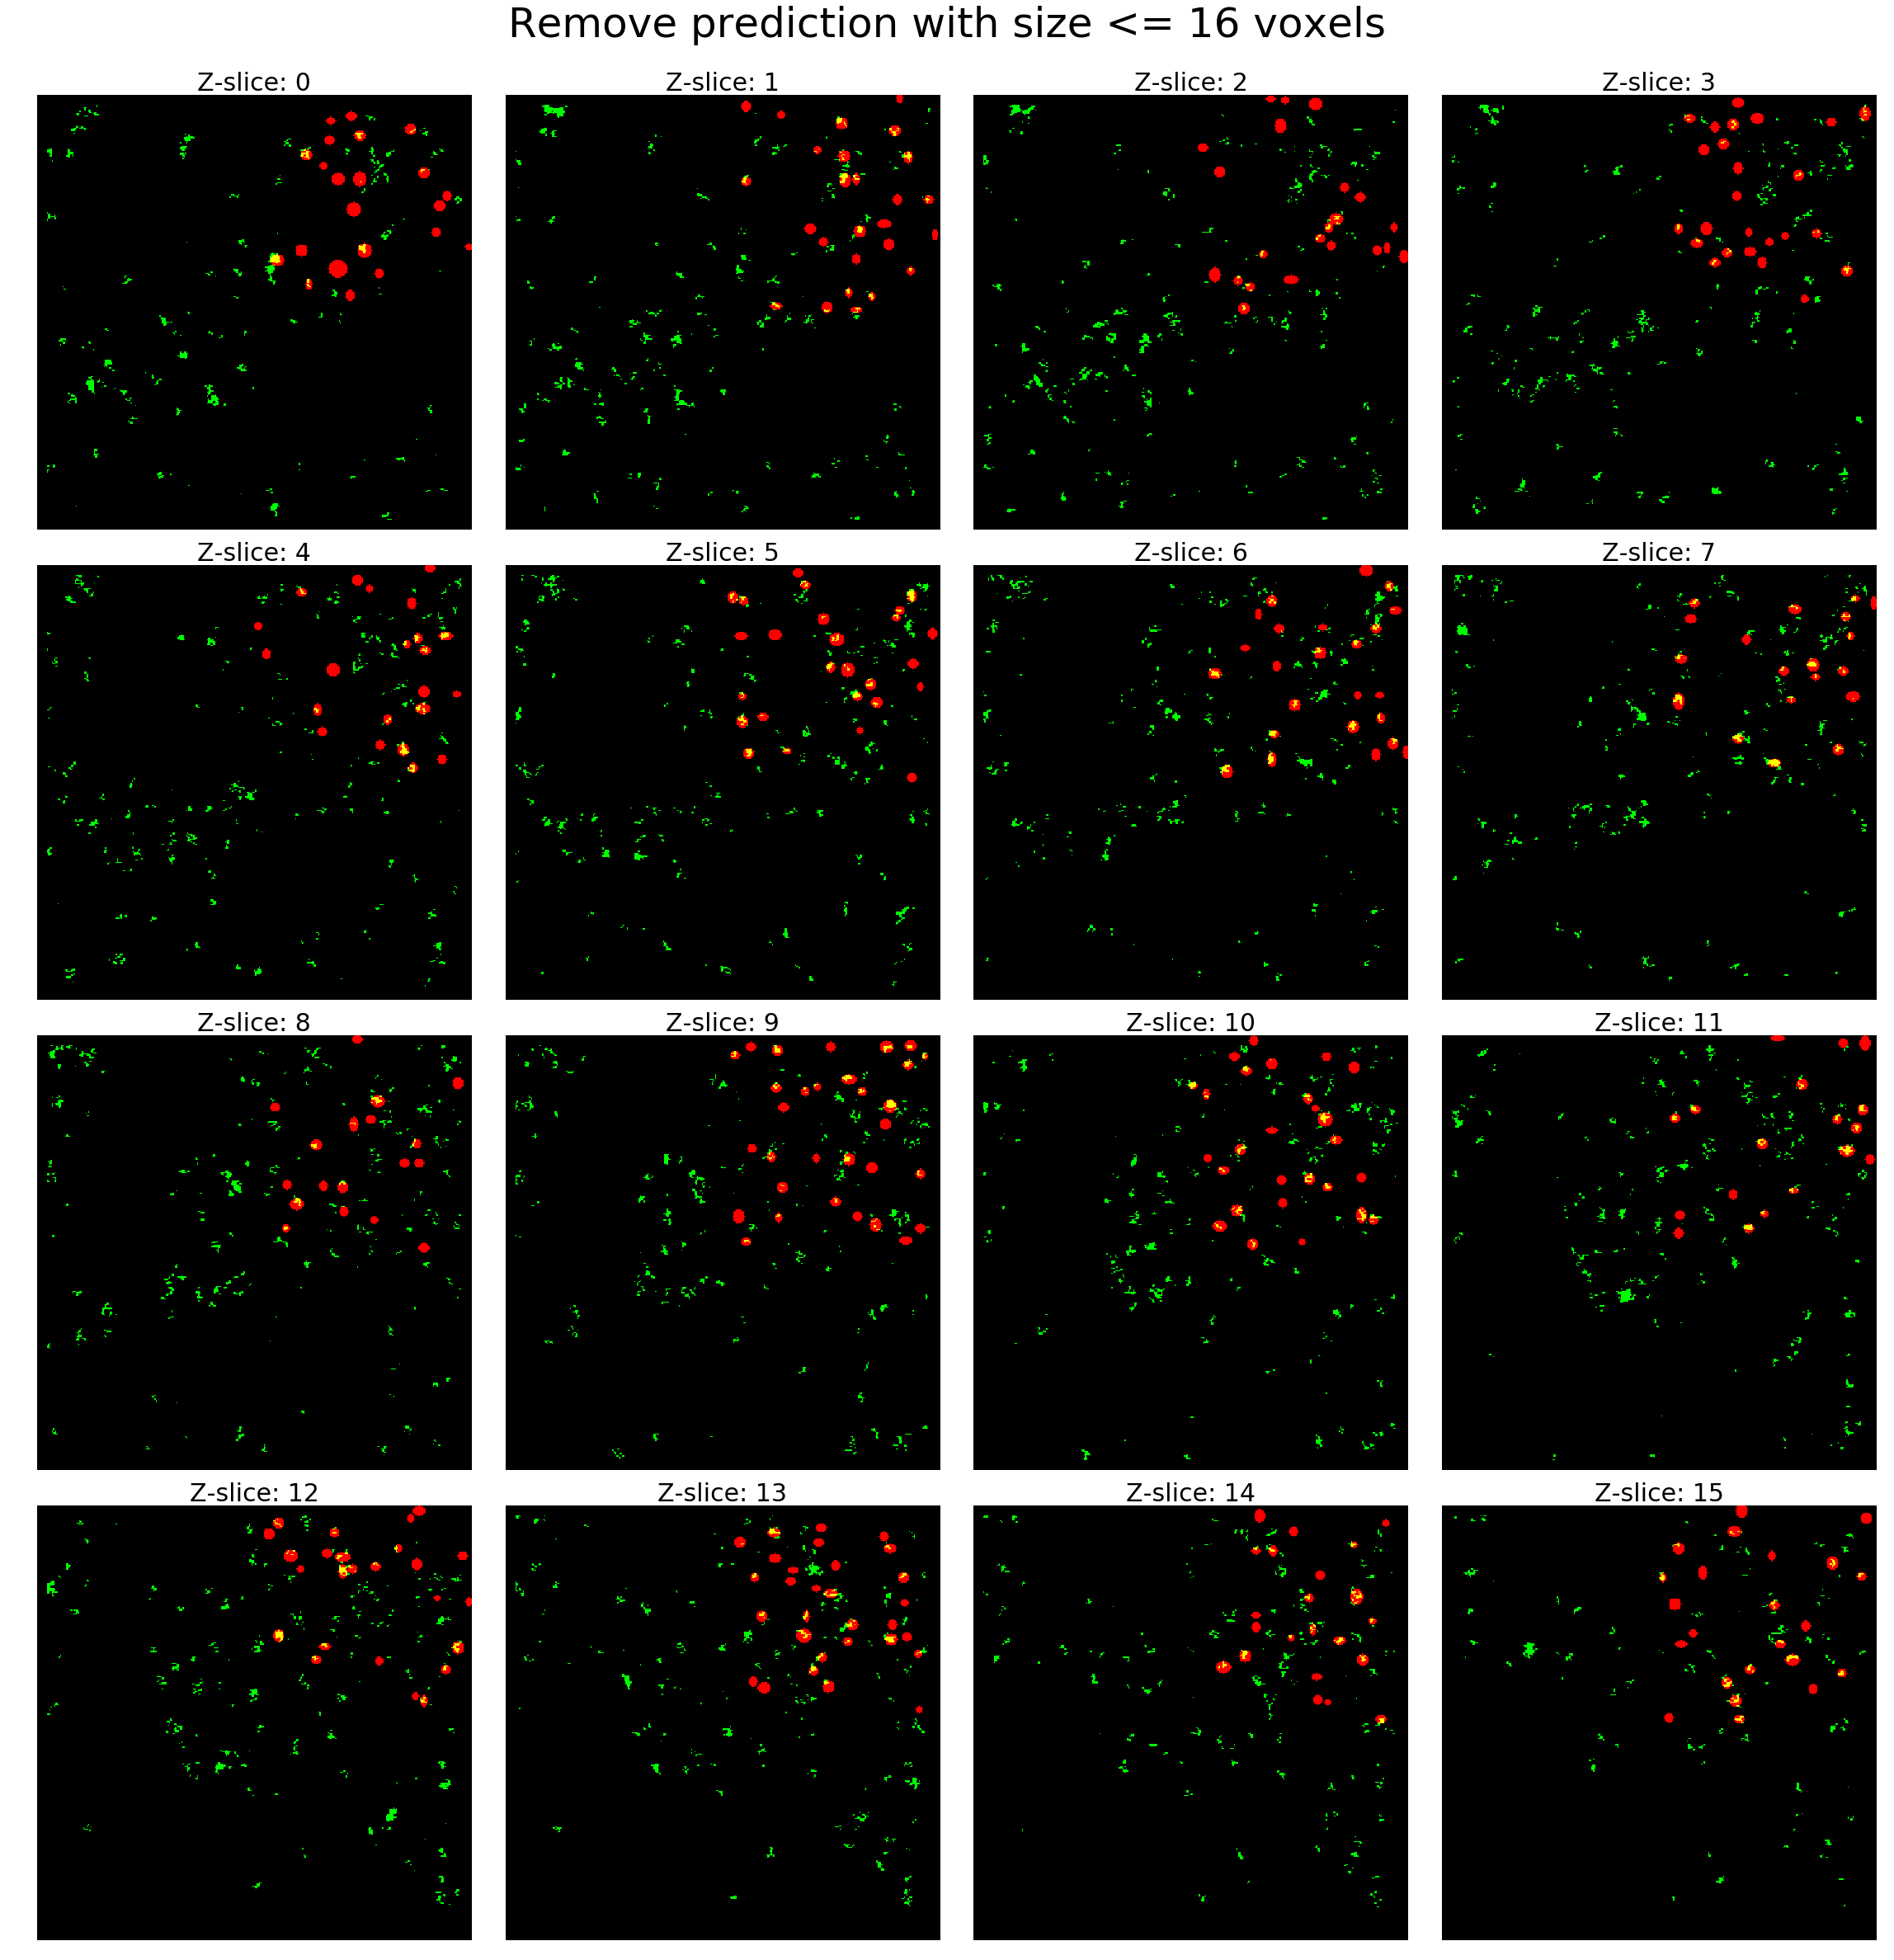

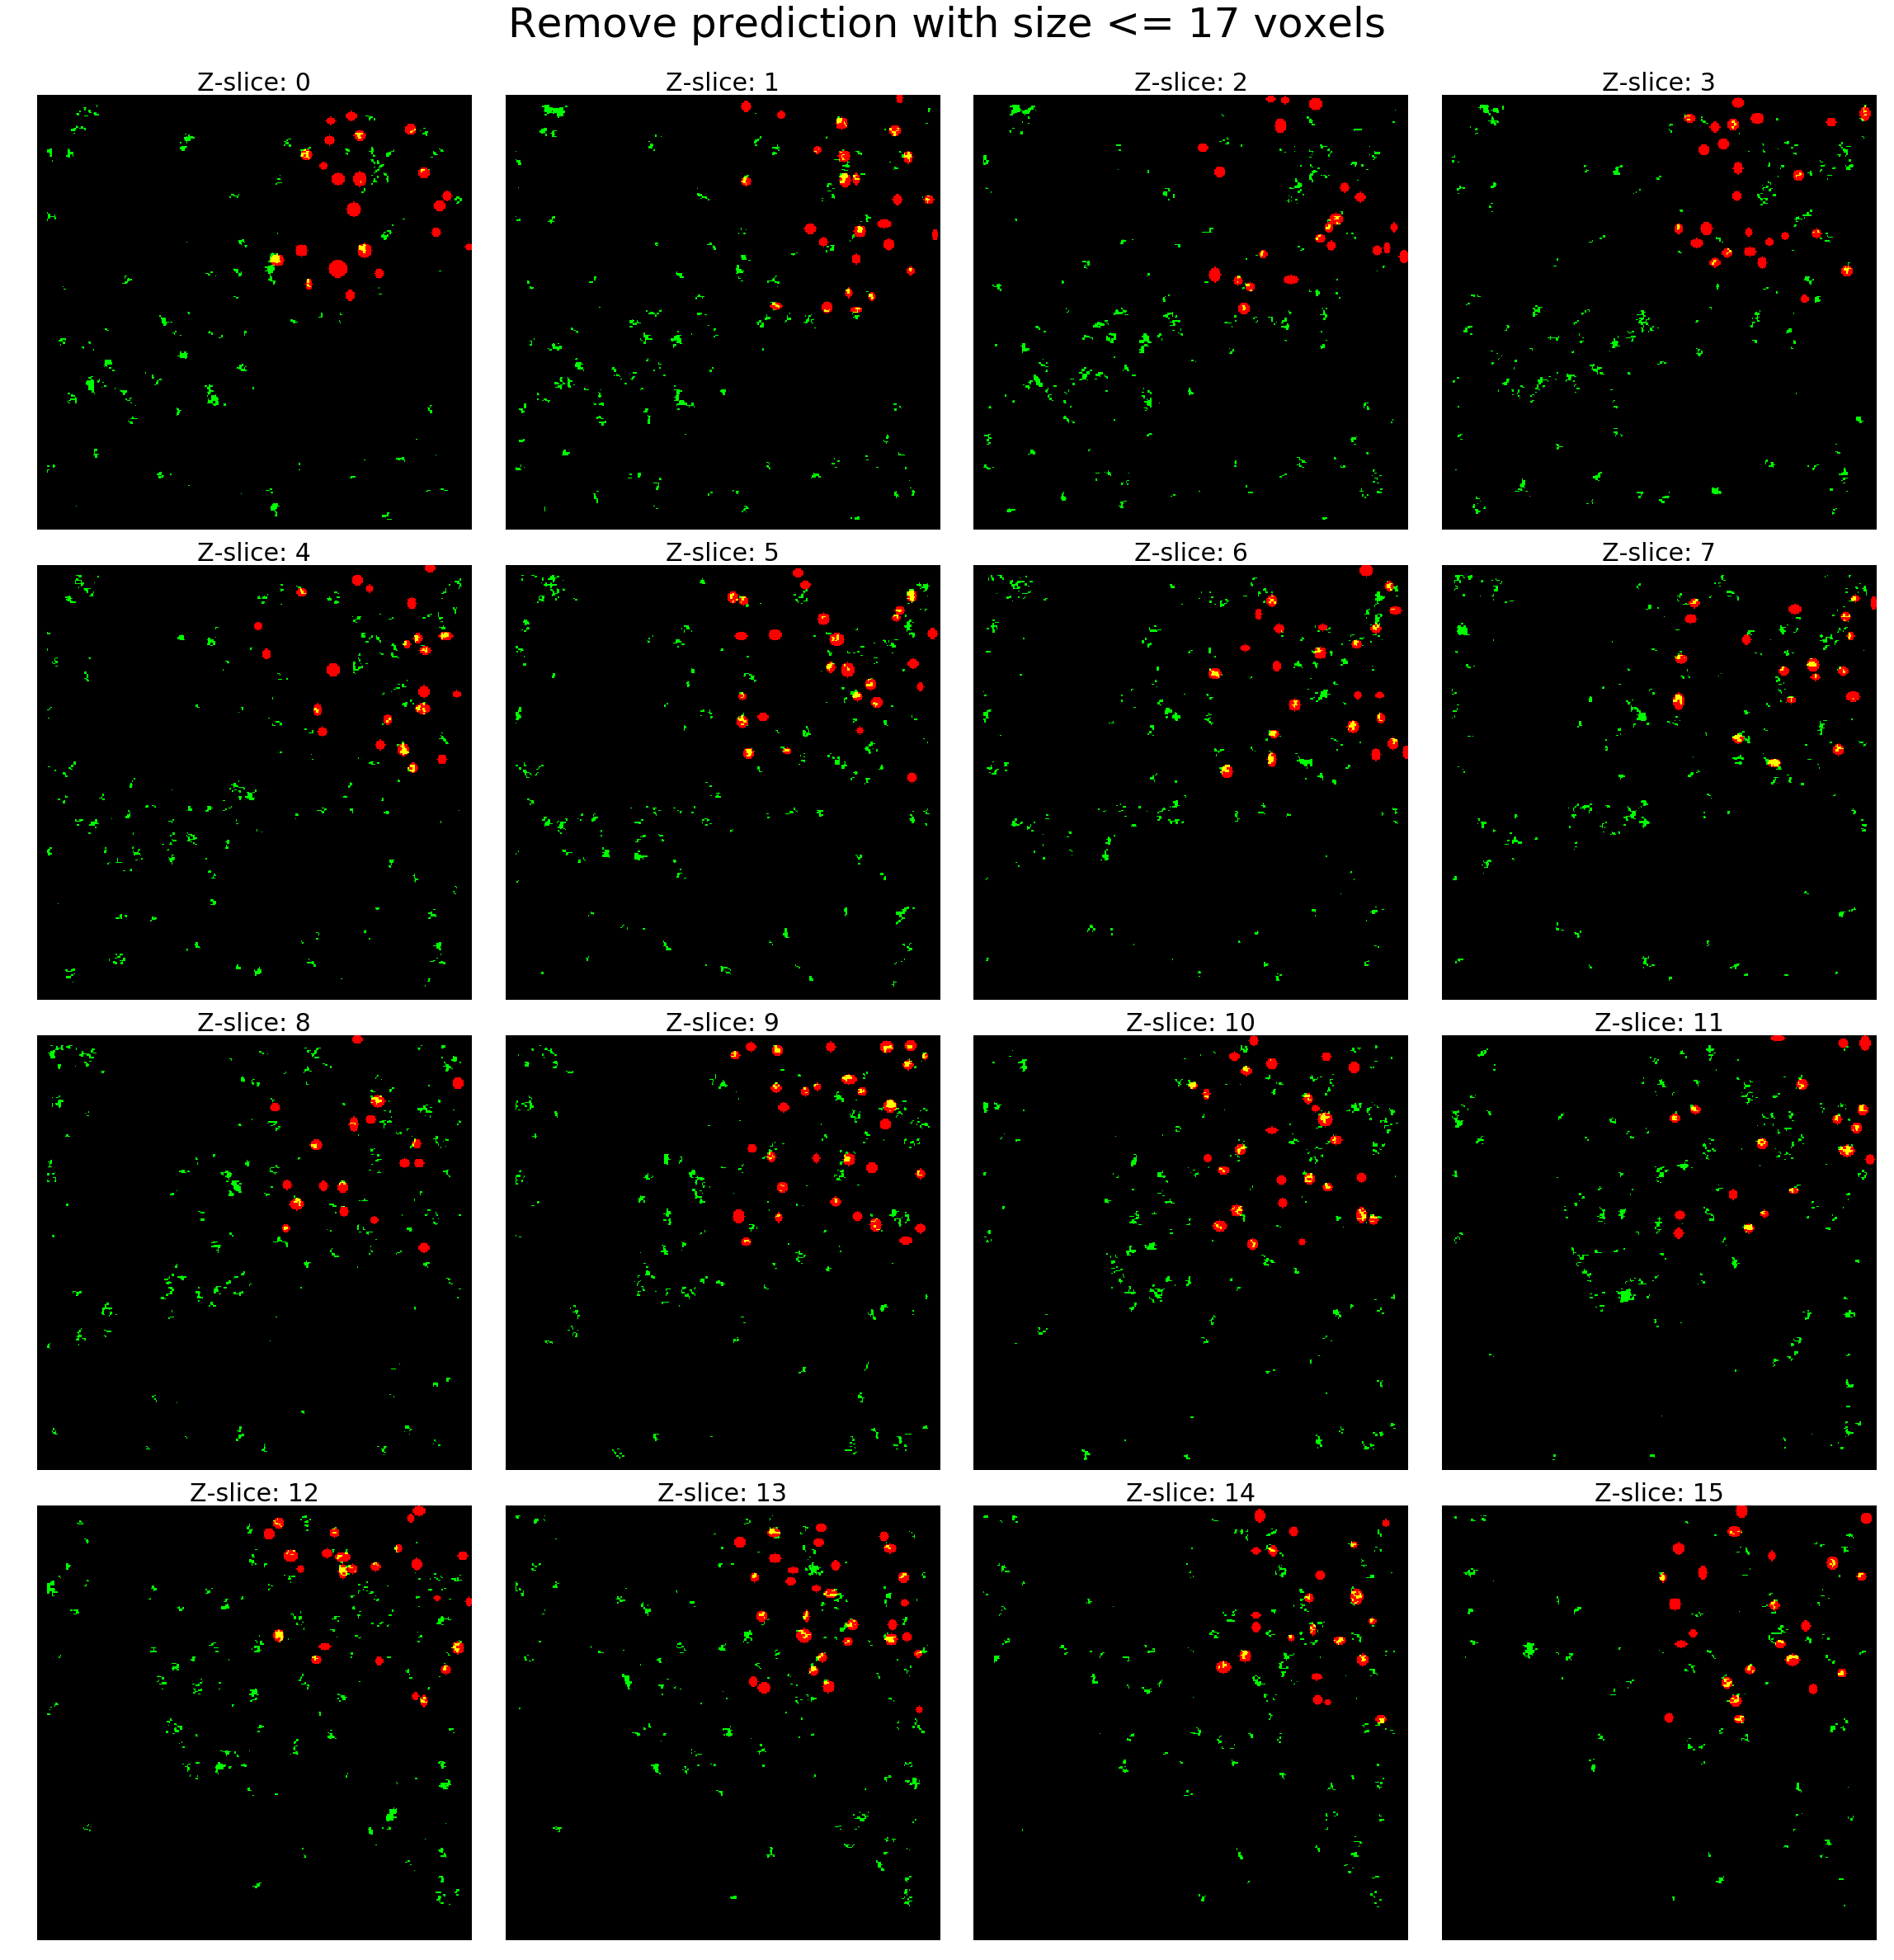

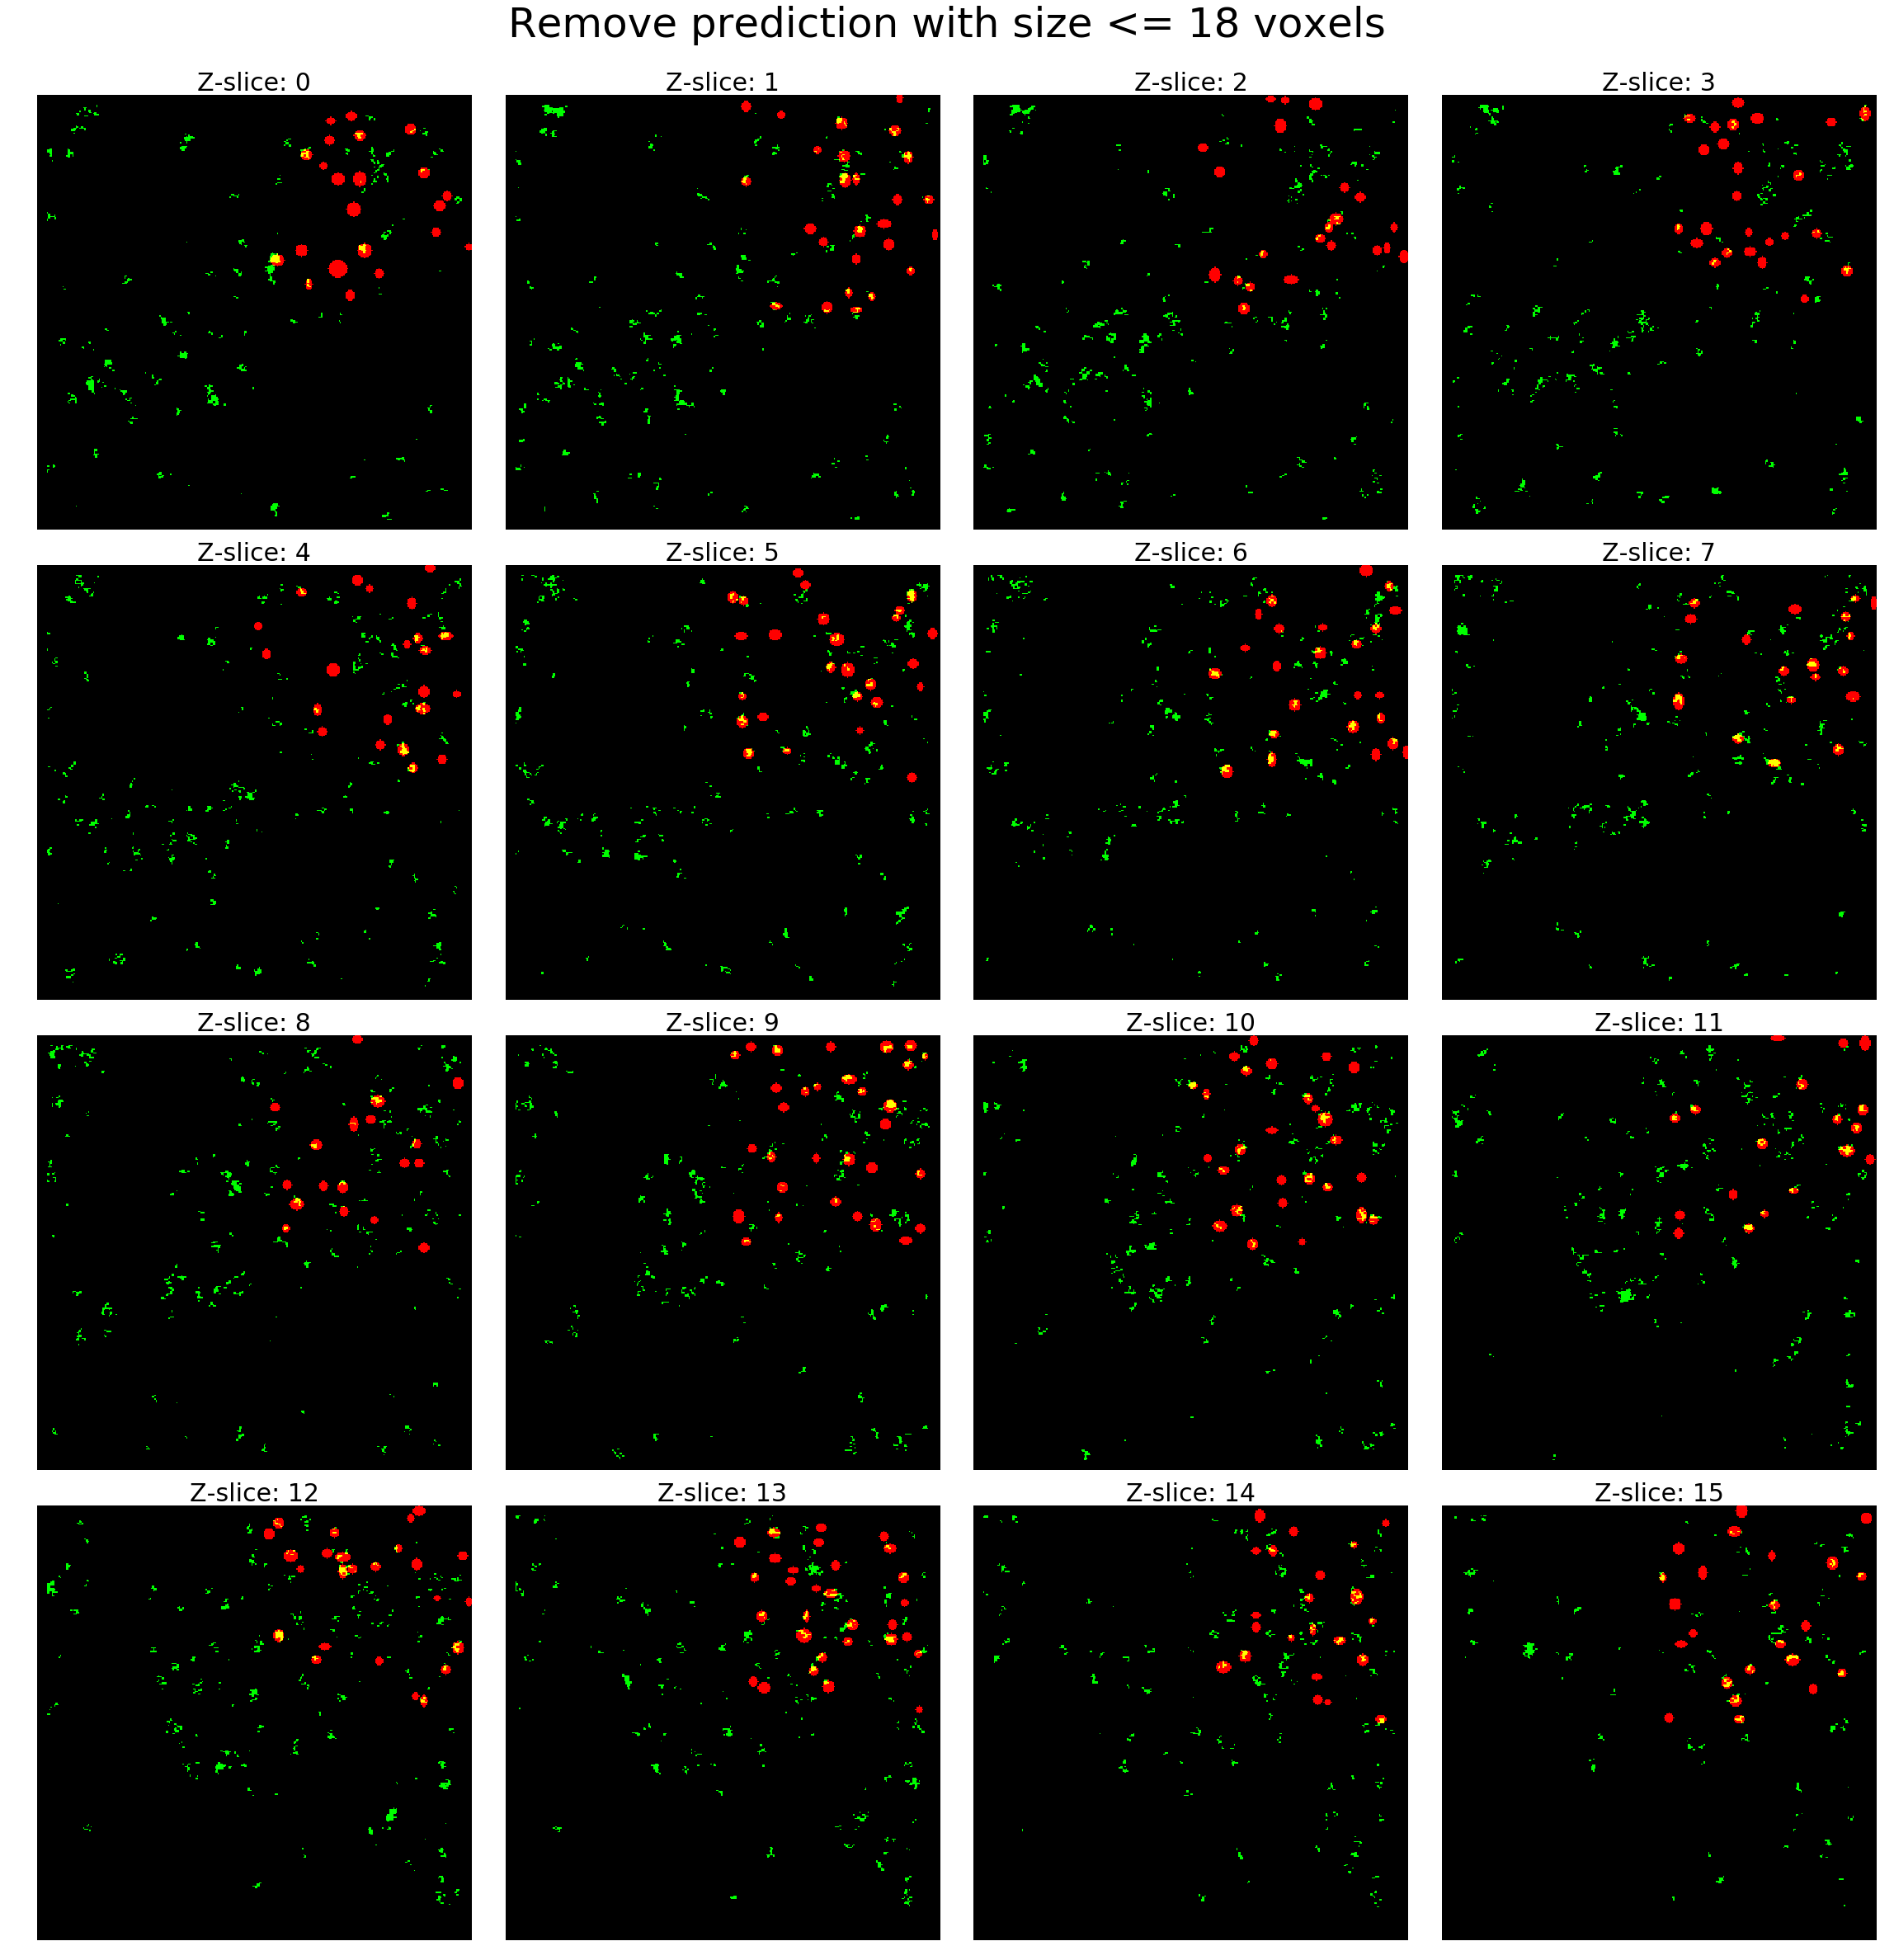

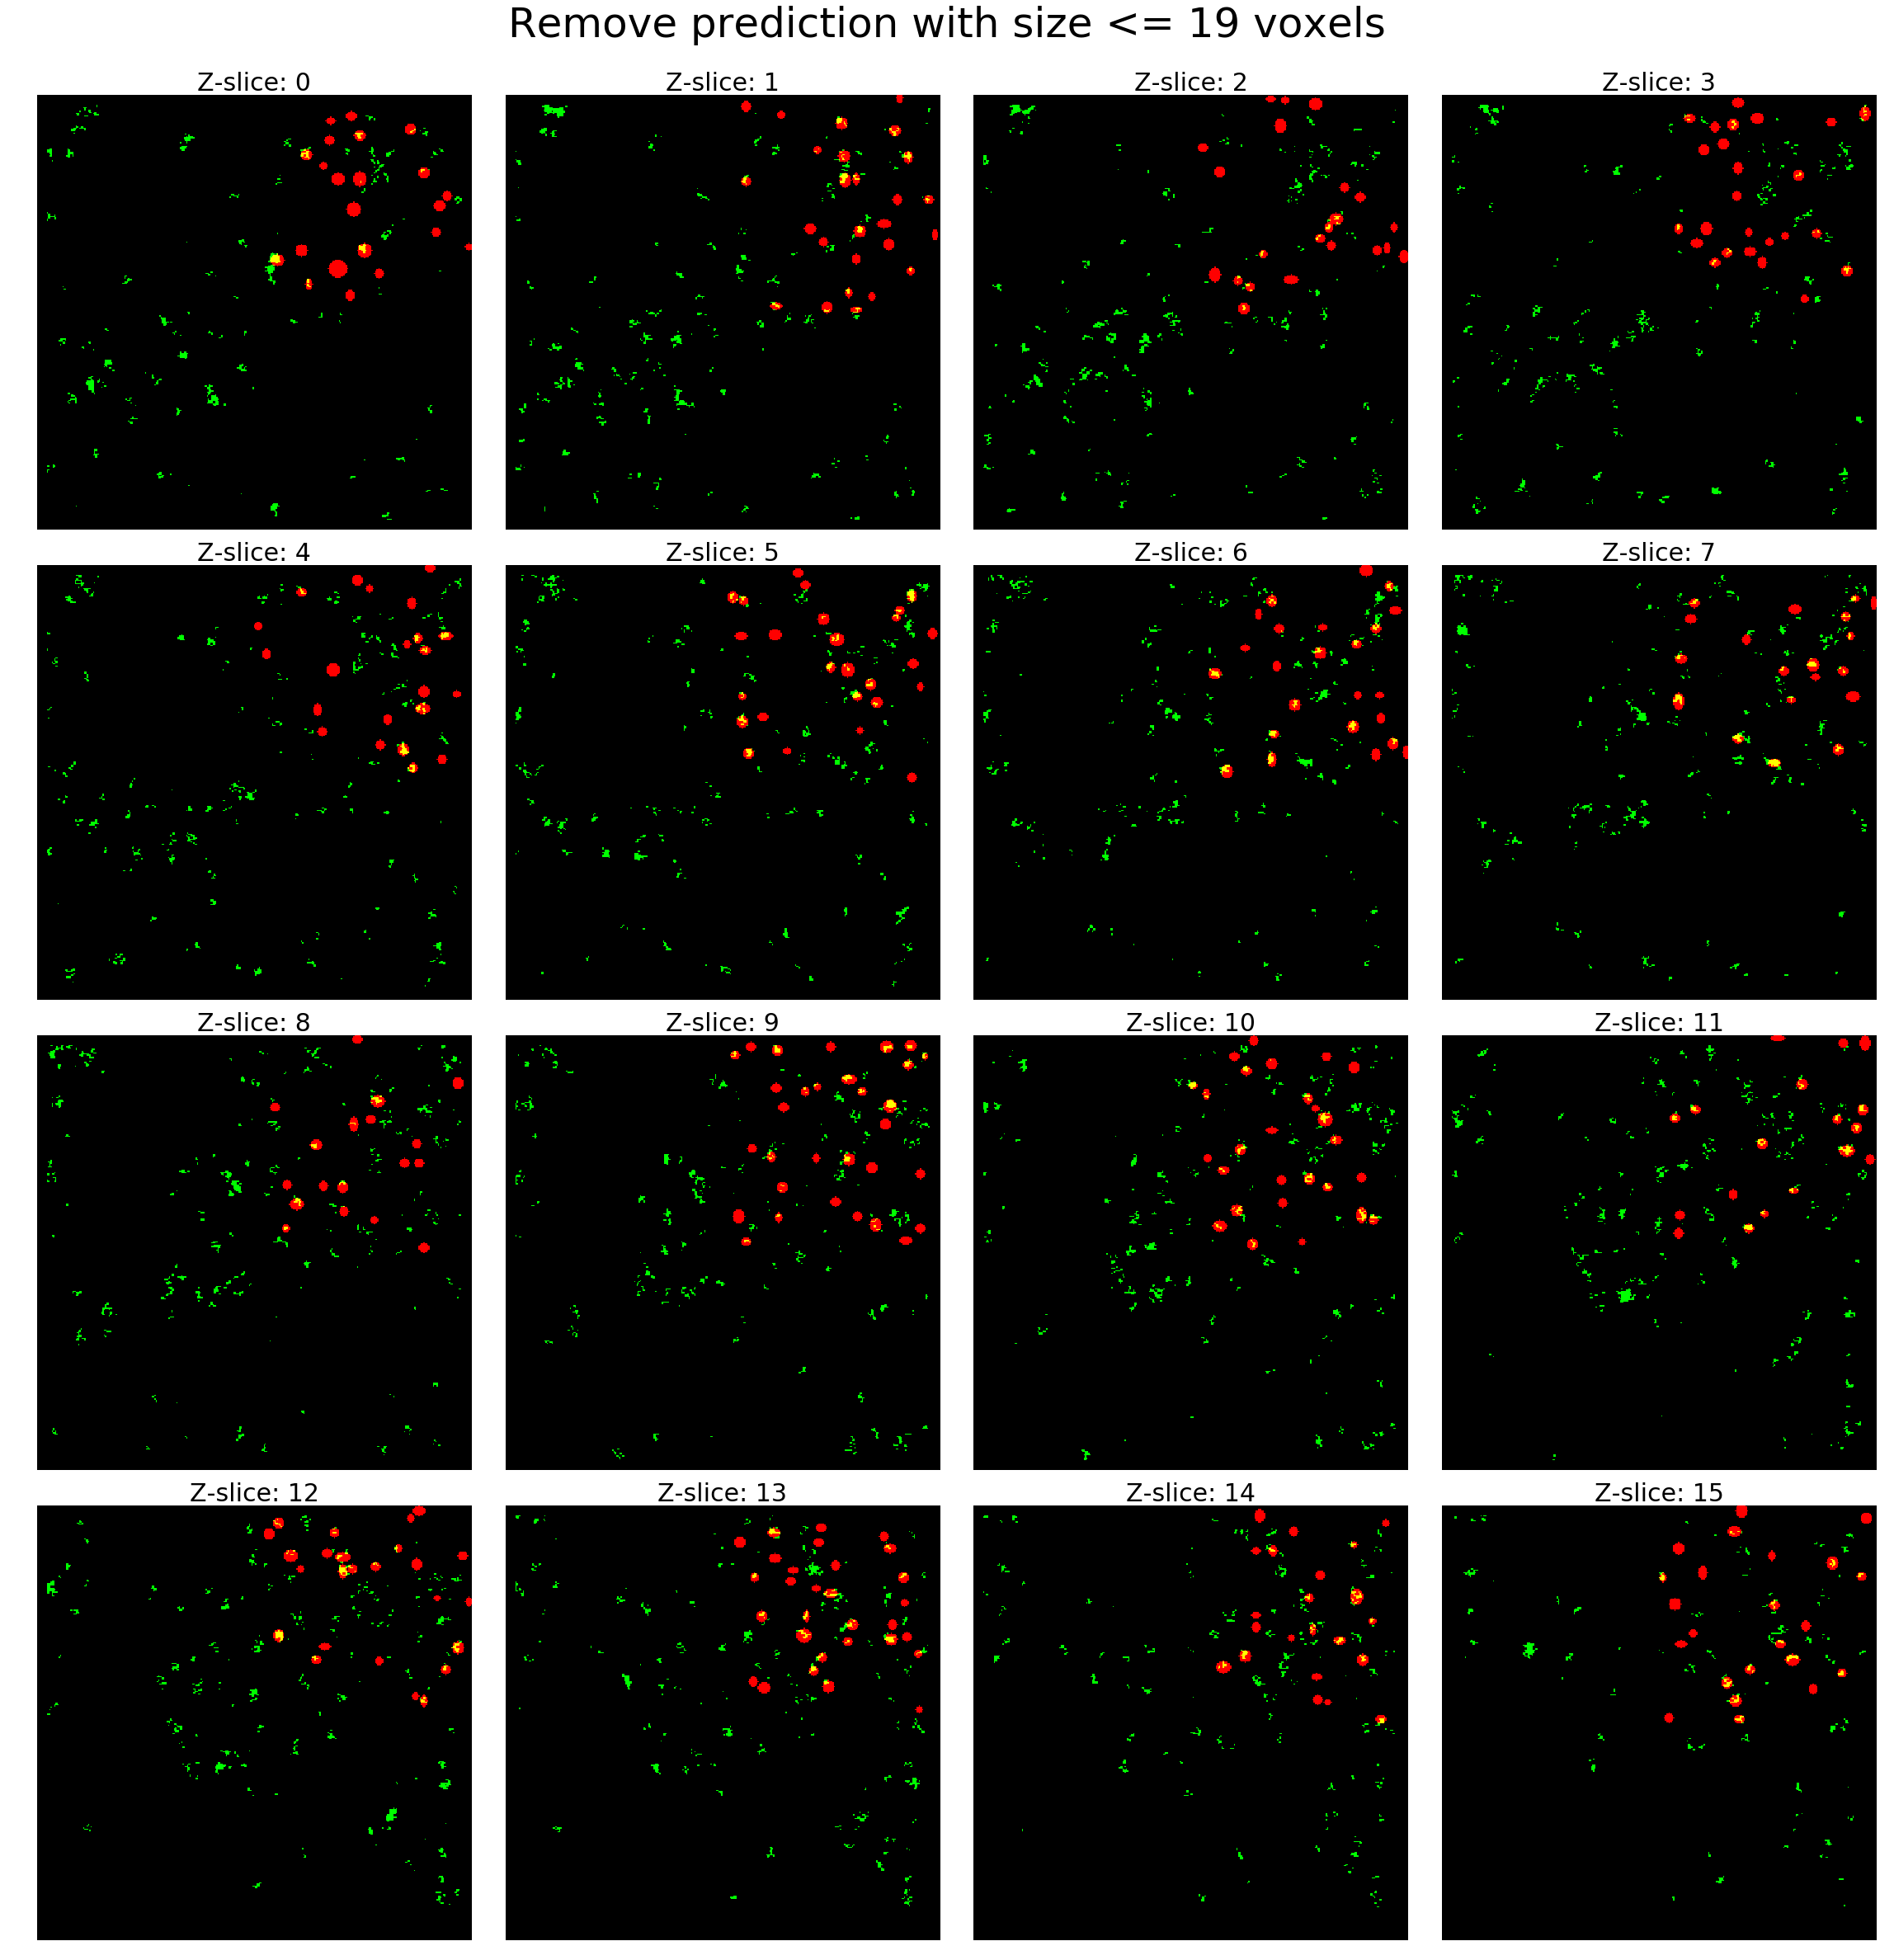

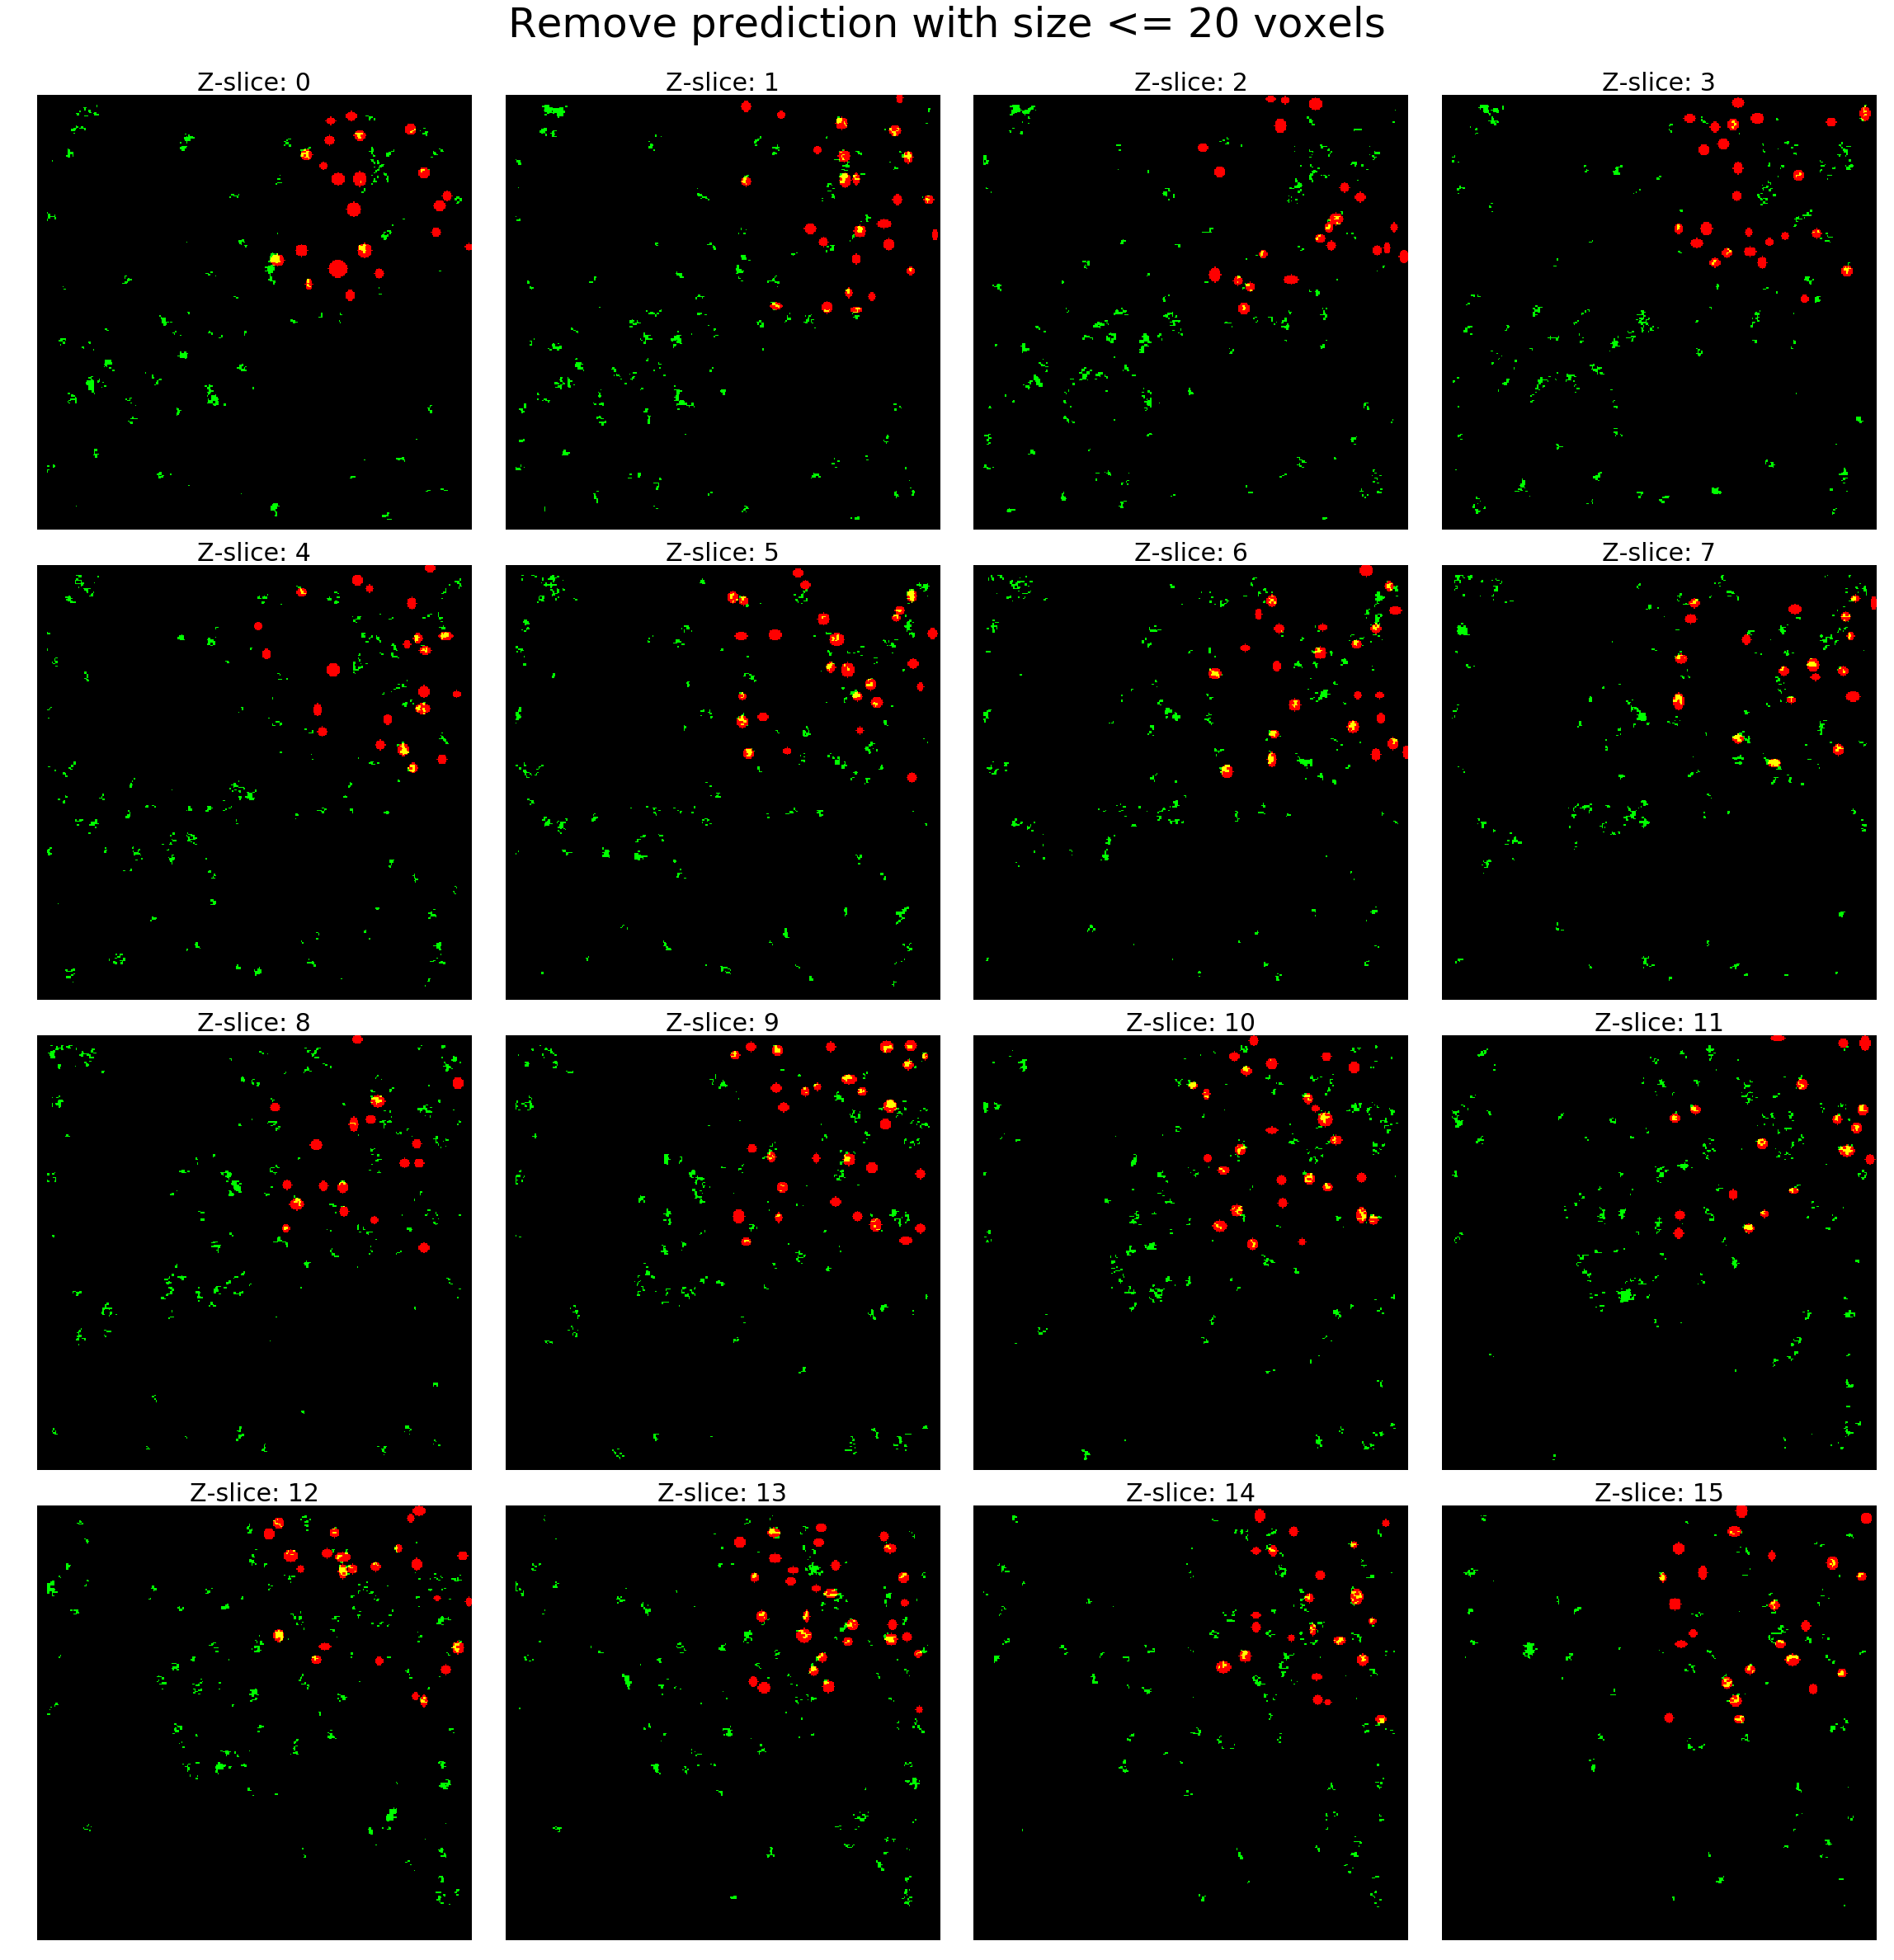

In [15]:
for idx, img in enumerate(img_arr):
    title = 'Remove prediction with size <= {} voxels'.format(idx + 1)
    overlay = overlay_images(annotation, img)
    fig = plot_volume(overlay, title=title)
    display.display(fig)

In [16]:
plt.close('all')